https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772

In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from  tqdm import tqdm
import gc
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "../input/"

pd.set_option("display.max_columns", 2000)

In [2]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [4]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [5]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [6]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [7]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [8]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

## 学習データ準備

In [9]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# read the test files 
app_test = pd.read_csv('../input/application_test.csv')


# Remove some rows with values not present in test set
#app_train.drop(app_train[app_train['CODE_GENDER'] == 'XNA'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_INCOME_TYPE'] == 'Maternity leave'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace = True)
app_train['bur NAN num'] = app_train.isnull().sum(axis = 1).values
app_test['bur NAN num'] = app_test.isnull().sum(axis = 1).values


app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

### <a id="0.1">0.1 Prepare - Data Cleaning</a>

In [10]:
    
# Remove some empty features
data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
            'FLAG_DOCUMENT_21'], axis = 1, inplace = True)
    
# Replace some outliers
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
data.loc[data['OWN_CAR_AGE'] > 80, 'OWN_CAR_AGE'] = np.nan
data.loc[data['REGION_RATING_CLIENT_W_CITY'] < 0, 'REGION_RATING_CLIENT_W_CITY'] = np.nan
data.loc[data['AMT_INCOME_TOTAL'] > 1e8, 'AMT_INCOME_TOTAL'] = np.nan
data.loc[data['AMT_REQ_CREDIT_BUREAU_QRT'] > 10, 'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
data.loc[data['OBS_30_CNT_SOCIAL_CIRCLE'] > 40, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan

### <a id="0.2">0.2 Prepare - Categorical Data Processing</a>

In [11]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

## feature engineering

### <a id="1.1">1.1 Feature Engineering - Previous Applications</a>

In [12]:

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['pre SK_ID_PREV_CNT'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])
previous_application.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Days 365.243 values -> nan
previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# nan num
previous_application['pre NAN num'] = previous_application.isnull().sum(axis = 1).values

# Add feature: value ask / value received percentage
previous_application['pre AMT_APPLICATION / AMT_CREDIT'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['pre loan AMT_APPLICATION / AMT_CREDIT'] = previous_application['NAME_CONTRACT_TYPE_Cash loans'] * previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['pre revo AMT_APPLICATION / AMT_CREDIT'] = previous_application['NAME_CONTRACT_TYPE_Revolving loans'] * previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']

previous_application['pre loan AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Cash loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']
previous_application['pre con loan AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Consumer loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']
previous_application['pre revo AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Revolving loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['pre_' + col + '_MEAN' for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')
del prev_apps_avg
gc.collect()

# Previous applications numeric features
num_aggregations = {
        'AMT_ANNUITY': ['max'],
        'AMT_APPLICATION': ['max'],
        'AMT_CREDIT': ['max'],
        'pre AMT_APPLICATION / AMT_CREDIT': ['max'],
        'AMT_DOWN_PAYMENT': ['max'],
        'AMT_GOODS_PRICE': ['max'],
        'HOUR_APPR_PROCESS_START': ['max'],
        'RATE_DOWN_PAYMENT': ['max'],
        'DAYS_DECISION': ['max'],
        'CNT_PAYMENT': ['sum'],
}

cat_aggregations = {}

prev_agg = previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['pre_' + e[0] for e in prev_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = previous_application[previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['pre_APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = previous_application[previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['pre_REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_done = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg
gc.collect()

data = data.merge(right=prev_done.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.2">1.2 Feature Engineering - Bureau Data</a>

In [13]:
bureau['bur NAN num'] = bureau.isnull().sum(axis = 1).values
bureau_balance['bur_bal NAN num'] = bureau_balance.isnull().sum(axis = 1).values

# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['bur CNT'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['bur_' + f_ + 'MEAN' for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')
del bureau_avg
gc.collect()

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del bureau_balance, bb_agg
gc.collect()

# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': [ 'max', 'var'],
    'DAYS_CREDIT_ENDDATE': [ 'max'],
    'DAYS_CREDIT_UPDATE': ['max'],
    'CREDIT_DAY_OVERDUE': ['max'],
    'AMT_CREDIT_MAX_OVERDUE': ['max'],
    'AMT_CREDIT_SUM': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_DEBT': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max'],
    'AMT_CREDIT_SUM_LIMIT': ['max', 'sum'],
    'AMT_ANNUITY': ['max'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['max', 'sum']
}

# Bureau and bureau_balance categorical features
cat_aggregations = {}
 
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['bur_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['bur_ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['bur_CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, bureau
gc.collect()

data = data.merge(right=bureau_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.3">1.3 Feature Engineering - Previous Installments</a>

In [14]:
installments_payments['ins NAN num'] = installments_payments.isnull().sum(axis = 1).values

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['ins_' + f_ + 'MEAN' for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
del avg_inst
gc.collect()

## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['ins_SK_ID_PREV_CNT'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])
installments_payments.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['ins AMT_PAYMENT / AMT_INSTALMENT'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['ins AMT_INSTALMENT / AMT_PAYMENT'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'].apply(lambda x: x if x > 0 else 0)
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'].apply(lambda x: x if x > 0 else 0)

# Features: Perform aggregations
aggregations = {
     'NUM_INSTALMENT_VERSION': ['nunique'],
     'ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT': ['max', 'sum','min','std' ],
     'ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT': ['max', 'sum','min','std'],
     'ins AMT_PAYMENT / AMT_INSTALMENT': [ 'max', 'var','min','std'],
     'ins AMT_INSTALMENT / AMT_PAYMENT': [ 'max', 'var','min','std'],
     'AMT_INSTALMENT': ['max', 'sum','min','std'],
     'AMT_PAYMENT': ['min', 'max', 'sum','std'],
     'DAYS_ENTRY_PAYMENT': ['max', 'sum','std']
}
ins_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['ins_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

# Count installments accounts
ins_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()
del installments_payments
gc.collect()

data = data.merge(right=ins_agg.reset_index(), how='left', on='SK_ID_CURR')



### <a id="1.4">1.4 Feature Engineering - Pos Cash Balance</a>

In [15]:
pcb['pcb NAN num'] = pcb.isnull().sum(axis = 1).values

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')
del pcb_avg
gc.collect()

### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['pcb_SK_ID_PREV_CNT'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])
pcb.drop(['SK_ID_PREV'], axis = 1, inplace = True)

# Features
aggregations = {
     'MONTHS_BALANCE': ['max', 'size'],
     'SK_DPD': ['max'],
     'SK_DPD_DEF': ['max']
}
   
pos_agg = pcb.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['pcb_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

# Count pos cash accounts
pos_agg['POS_COUNT'] = pcb.groupby('SK_ID_CURR').size()
del pcb
gc.collect()

data = data.merge(right=pos_agg.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.5">1.5 Feature Engineering - Credit Card Balance </a>

In [16]:
credit_card_balance['cre NAN num'] = credit_card_balance.isnull().sum(axis = 1).values

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ + 'MEAN' for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
del avg_cc_bal
gc.collect()

### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['cre_SK_ID_PREV_CNT'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)

# General aggregations
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg([ 'max', 'sum', 'var'])
cc_agg.columns = pd.Index(['cre_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
# Count credit card lines
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
del credit_card_balance
gc.collect()

data = data.merge(right=cc_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.6">1.6 Feature Engineering - Domain </a>

In [17]:
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']


# loan 別
data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app AMT_CREDIT / AMT_INCOME_TOTAL'] - data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] - data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app loan AMT_CREDIT / AMT_ANNUITY'] = data['app AMT_CREDIT / AMT_ANNUITY'] - data['app rebo AMT_CREDIT / AMT_ANNUITY']
data['app rebo DAYS_EMPLOYED / DAYS_BIRTH'] = data['NAME_CONTRACT_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['app loan DAYS_EMPLOYED / DAYS_BIRTH'] = data['app DAYS_EMPLOYED / DAYS_BIRTH'] - data['app rebo DAYS_EMPLOYED / DAYS_BIRTH']

# 世帯持ち 別
data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app AMT_CREDIT / AMT_INCOME_TOTAL'] - data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] - data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app loan AMT_CREDIT / AMT_ANNUITY'] = data['app AMT_CREDIT / AMT_ANNUITY'] - data['app rebo AMT_CREDIT / AMT_ANNUITY']
data['app rebo DAYS_EMPLOYED / DAYS_BIRTH'] = data['NAME_CONTRACT_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['app loan DAYS_EMPLOYED / DAYS_BIRTH'] = data['app DAYS_EMPLOYED / DAYS_BIRTH'] - data['app rebo DAYS_EMPLOYED / DAYS_BIRTH']

# NAME_INCOME_TYPE  Maternity leave
data['app  AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']





data['app missing'] = data.isnull().sum(axis = 1).values
    
data['app EXT_SOURCE mean'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
data['app EXT_SOURCE std'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis = 1)
data['app EXT_SOURCE prod'] = data['EXT_SOURCE_1'] * data['EXT_SOURCE_2'] * data['EXT_SOURCE_3']
data['app EXT_SOURCE_1 * DAYS_EMPLOYED'] = data['EXT_SOURCE_1'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_2 * DAYS_EMPLOYED'] = data['EXT_SOURCE_2'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_3 * DAYS_EMPLOYED'] = data['EXT_SOURCE_3'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_1 / DAYS_BIRTH'] = data['EXT_SOURCE_1'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_2 / DAYS_BIRTH'] = data['EXT_SOURCE_2'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_3 / DAYS_BIRTH'] = data['EXT_SOURCE_3'] / data['DAYS_BIRTH']
  
data['app AMT_CREDIT - AMT_GOODS_PRICE'] = data['AMT_CREDIT'] - data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_GOODS_PRICE'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
  
data['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / 12. - data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = data['AMT_INCOME_TOTAL'] - data['AMT_GOODS_PRICE']
data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app AMT_INCOME_TOTAL / CNT_CHILDREN'] = data['AMT_INCOME_TOTAL'] / (1 + data['CNT_CHILDREN'])
    
data['app most popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([225000, 450000, 675000, 900000]).map({True: 1, False: 0})
data['app popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([1125000, 1350000, 1575000, 1800000, 2250000]).map({True: 1, False: 0})
    
data['app OWN_CAR_AGE / DAYS_BIRTH'] = data['OWN_CAR_AGE'] / data['DAYS_BIRTH']
data['app OWN_CAR_AGE / DAYS_EMPLOYED'] = data['OWN_CAR_AGE'] / data['DAYS_EMPLOYED']
    
data['app DAYS_LAST_PHONE_CHANGE / DAYS_BIRTH'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_BIRTH']
data['app DAYS_LAST_PHONE_CHANGE / DAYS_EMPLOYED'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_EMPLOYED']
data['app DAYS_EMPLOYED - DAYS_BIRTH'] = data['DAYS_EMPLOYED'] - data['DAYS_BIRTH']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    
data['app CNT_CHILDREN / CNT_FAM_MEMBERS'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']

data['app OBS_30_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'] - data['DEF_30_CNT_SOCIAL_CIRCLE']
data['app OBS_60_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'] - data['DEF_60_CNT_SOCIAL_CIRCLE']
data['app DAYS_EMPLOYED - DAYS_REGISTRATION'] = data['DAYS_EMPLOYED'] - data['DAYS_REGISTRATION']
data['app DAYS_EMPLOYED - DAYS_ID_PUBLISH'] = data['DAYS_EMPLOYED'] - data['DAYS_ID_PUBLISH']

data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app CNT_CHILDREN / CNT_CHILDREN'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']
    


In [18]:
data.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0            0             0                0   
1      100003                   0            1             0                1   
2      100004                   1            0             1                0   
3      100006                   0            1             0                0   
4      100007                   0            0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                0                 0                    0                   0   
1                1                 1                    1                   1   
2                0                 0                    0                   0   
3                0                 0                    0                   2   
4                0                 0                    0                   0   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801       -9461         -637.0   
1                  0                    0.003541      -16765        -1188.0   
2                  0                    0.010032      -19046         -225.0   
3                  0                    0.008019      -19005        -3039.0   
4                  0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          NaN           1   
1            -1186.0             -291          NaN           1   
2            -4260.0            -2531         26.0           1   
3            -9833.0            -2437          NaN           1   
4            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                1              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                1              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          2.0                           0   
1                          1.0                           1   
2                          2.0                           1   
3                          2.0                           0   
4                          2.0                           2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

### <a id="1.7">1.7 Feature Engineering - PolyFeature </a>

In [19]:
# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

# Create a dataframe of the features 
pd_poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH']))
pd_poly_features = pd_poly_features.drop(columns =['1', 'POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH'])
data_reset = data.reset_index()
pd_poly_features['SK_ID_CURR'] = data_reset['SK_ID_CURR'] 
data = data.merge(pd_poly_features, on = 'SK_ID_CURR', how = 'left')

Polynomial Features shape:  (356255, 35)


### <a id="2.0">2.0 Prepare Final Train and Test data</a>

In [20]:
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

### <a id="2.1">2.1 StratifiedKFold, GridSearch</a>

In [21]:
data.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0            0             0                0   
1      100003                   0            1             0                1   
2      100004                   1            0             1                0   
3      100006                   0            1             0                0   
4      100007                   0            0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                0                 0                    0                   0   
1                1                 1                    1                   1   
2                0                 0                    0                   0   
3                0                 0                    0                   2   
4                0                 0                    0                   0   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801       -9461         -637.0   
1                  0                    0.003541      -16765        -1188.0   
2                  0                    0.010032      -19046         -225.0   
3                  0                    0.008019      -19005        -3039.0   
4                  0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          NaN           1   
1            -1186.0             -291          NaN           1   
2            -4260.0            -2531         26.0           1   
3            -9833.0            -2437          NaN           1   
4            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                1              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                1              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          2.0                           0   
1                          1.0                           1   
2                          2.0                           1   
3                          2.0                           0   
4                          2.0                           2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

In [22]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
max_score = -100
max_params = None

all_params = {'task': ['train'], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'metric': ['auc'], 
          'learning_rate': [0.01], 'num_leaves': [16, 48, 64], 'num_iteration': [5000], 'verbose': [0] ,
          'colsample_bytree':[0.8], 'subsample':[0.9], 'max_depth':[5, 6, 7, 8], 'reg_alpha':[0.1], 'reg_lambda':[0.1], 
          'min_split_gain':[0.01], 'min_child_weight':[1]}

list_auc_score = []
list_preds = []

for params in tqdm(list(ParameterGrid(all_params))):
    for train_idx, valid_idx in cv.split(trainX, Y):
        trn_x = trainX.iloc[train_idx, :]
        val_x = trainX.iloc[valid_idx, :]
    
        trn_y = Y[train_idx]
        val_y = Y[valid_idx]
    
        #lgb_train = lgb.Dataset(data=trn_x, label=trn_y)
        #lgb_eval = lgb.Dataset(data=val_x, label=val_y)
        #model = lgb.train(params, lgb_train,  valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)
        #preds_val = model.predict(val_x)
        #preds = model.predict(testX)       
        
        clf = lgb.sklearn.LGBMClassifier(**params)
        clf.fit(trn_x,
                    trn_y,
                    eval_set=[(val_x, val_y)],
                    early_stopping_rounds=150,
                    eval_metric='auc'
                )        
        preds_val = clf.predict_proba(val_x, num_iteration = clf.best_iteration_)[:, 1]
        preds = clf.predict_proba(testX, num_iteration=clf.best_iteration_)[:, 1]
        
        auc = roc_auc_score(val_y, preds_val)
        list_auc_score.append(auc)
        list_preds.append(preds)
        
        if (max_score < auc):
            max_score = auc
            max_params = params
    
sc_auc_score = np.mean(list_auc_score)
print(sc_auc_score, max_score)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

[1]	valid_0's auc: 0.71762
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.718215
[3]	valid_0's auc: 0.722451
[4]	valid_0's auc: 0.725676
[5]	valid_0's auc: 0.725689
[6]	valid_0's auc: 0.727165
[7]	valid_0's auc: 0.727125
[8]	valid_0's auc: 0.726888
[9]	valid_0's auc: 0.72753
[10]	valid_0's auc: 0.727632
[11]	valid_0's auc: 0.728878
[12]	valid_0's auc: 0.729885
[13]	valid_0's auc: 0.729904
[14]	valid_0's auc: 0.730361
[15]	valid_0's auc: 0.730759
[16]	valid_0's auc: 0.730798
[17]	valid_0's auc: 0.731085
[18]	valid_0's auc: 0.731034
[19]	valid_0's auc: 0.731689
[20]	valid_0's auc: 0.732053
[21]	valid_0's auc: 0.732465
[22]	valid_0's auc: 0.732735
[23]	valid_0's auc: 0.73313
[24]	valid_0's auc: 0.733232
[25]	valid_0's auc: 0.733529
[26]	valid_0's auc: 0.733815
[27]	valid_0's auc: 0.733993
[28]	valid_0's auc: 0.734093
[29]	valid_0's auc: 0.73425
[30]	valid_0's auc: 0.734349
[31]	valid_0's auc: 0.734472
[32]	valid_0's auc: 0.734466
[33]	valid_0's auc: 0.

[277]	valid_0's auc: 0.762802
[278]	valid_0's auc: 0.762878
[279]	valid_0's auc: 0.762925
[280]	valid_0's auc: 0.763011
[281]	valid_0's auc: 0.763087
[282]	valid_0's auc: 0.763176
[283]	valid_0's auc: 0.76324
[284]	valid_0's auc: 0.7633
[285]	valid_0's auc: 0.763363
[286]	valid_0's auc: 0.763436
[287]	valid_0's auc: 0.763524
[288]	valid_0's auc: 0.763594
[289]	valid_0's auc: 0.763657
[290]	valid_0's auc: 0.763732
[291]	valid_0's auc: 0.763797
[292]	valid_0's auc: 0.763868
[293]	valid_0's auc: 0.763949
[294]	valid_0's auc: 0.764036
[295]	valid_0's auc: 0.76411
[296]	valid_0's auc: 0.764173
[297]	valid_0's auc: 0.764255
[298]	valid_0's auc: 0.764315
[299]	valid_0's auc: 0.764401
[300]	valid_0's auc: 0.764472
[301]	valid_0's auc: 0.764534
[302]	valid_0's auc: 0.764614
[303]	valid_0's auc: 0.764692
[304]	valid_0's auc: 0.764736
[305]	valid_0's auc: 0.764796
[306]	valid_0's auc: 0.764855
[307]	valid_0's auc: 0.764915
[308]	valid_0's auc: 0.764991
[309]	valid_0's auc: 0.765066
[310]	valid_0'

[551]	valid_0's auc: 0.775174
[552]	valid_0's auc: 0.775203
[553]	valid_0's auc: 0.775213
[554]	valid_0's auc: 0.775245
[555]	valid_0's auc: 0.775282
[556]	valid_0's auc: 0.775308
[557]	valid_0's auc: 0.775328
[558]	valid_0's auc: 0.775355
[559]	valid_0's auc: 0.775383
[560]	valid_0's auc: 0.775402
[561]	valid_0's auc: 0.775435
[562]	valid_0's auc: 0.775461
[563]	valid_0's auc: 0.775488
[564]	valid_0's auc: 0.775523
[565]	valid_0's auc: 0.775552
[566]	valid_0's auc: 0.775582
[567]	valid_0's auc: 0.775611
[568]	valid_0's auc: 0.775637
[569]	valid_0's auc: 0.775655
[570]	valid_0's auc: 0.775672
[571]	valid_0's auc: 0.775709
[572]	valid_0's auc: 0.775742
[573]	valid_0's auc: 0.775766
[574]	valid_0's auc: 0.775795
[575]	valid_0's auc: 0.775823
[576]	valid_0's auc: 0.775843
[577]	valid_0's auc: 0.775862
[578]	valid_0's auc: 0.775891
[579]	valid_0's auc: 0.775893
[580]	valid_0's auc: 0.77593
[581]	valid_0's auc: 0.775962
[582]	valid_0's auc: 0.775988
[583]	valid_0's auc: 0.776022
[584]	valid

[824]	valid_0's auc: 0.780393
[825]	valid_0's auc: 0.780409
[826]	valid_0's auc: 0.780428
[827]	valid_0's auc: 0.780436
[828]	valid_0's auc: 0.780453
[829]	valid_0's auc: 0.780467
[830]	valid_0's auc: 0.780483
[831]	valid_0's auc: 0.780502
[832]	valid_0's auc: 0.78052
[833]	valid_0's auc: 0.780543
[834]	valid_0's auc: 0.780553
[835]	valid_0's auc: 0.780557
[836]	valid_0's auc: 0.780576
[837]	valid_0's auc: 0.780588
[838]	valid_0's auc: 0.7806
[839]	valid_0's auc: 0.780613
[840]	valid_0's auc: 0.780634
[841]	valid_0's auc: 0.780655
[842]	valid_0's auc: 0.780661
[843]	valid_0's auc: 0.780674
[844]	valid_0's auc: 0.780688
[845]	valid_0's auc: 0.780695
[846]	valid_0's auc: 0.780704
[847]	valid_0's auc: 0.780719
[848]	valid_0's auc: 0.780732
[849]	valid_0's auc: 0.780738
[850]	valid_0's auc: 0.780757
[851]	valid_0's auc: 0.780769
[852]	valid_0's auc: 0.780784
[853]	valid_0's auc: 0.7808
[854]	valid_0's auc: 0.780808
[855]	valid_0's auc: 0.780818
[856]	valid_0's auc: 0.780832
[857]	valid_0's

[1094]	valid_0's auc: 0.783343
[1095]	valid_0's auc: 0.783342
[1096]	valid_0's auc: 0.783346
[1097]	valid_0's auc: 0.783356
[1098]	valid_0's auc: 0.783363
[1099]	valid_0's auc: 0.783377
[1100]	valid_0's auc: 0.783384
[1101]	valid_0's auc: 0.783392
[1102]	valid_0's auc: 0.783408
[1103]	valid_0's auc: 0.783412
[1104]	valid_0's auc: 0.783419
[1105]	valid_0's auc: 0.78343
[1106]	valid_0's auc: 0.783438
[1107]	valid_0's auc: 0.783439
[1108]	valid_0's auc: 0.783444
[1109]	valid_0's auc: 0.783446
[1110]	valid_0's auc: 0.78345
[1111]	valid_0's auc: 0.783458
[1112]	valid_0's auc: 0.783461
[1113]	valid_0's auc: 0.783469
[1114]	valid_0's auc: 0.78348
[1115]	valid_0's auc: 0.783483
[1116]	valid_0's auc: 0.783486
[1117]	valid_0's auc: 0.783502
[1118]	valid_0's auc: 0.783506
[1119]	valid_0's auc: 0.783506
[1120]	valid_0's auc: 0.783519
[1121]	valid_0's auc: 0.783531
[1122]	valid_0's auc: 0.783547
[1123]	valid_0's auc: 0.783555
[1124]	valid_0's auc: 0.783562
[1125]	valid_0's auc: 0.783568
[1126]	vali

[1359]	valid_0's auc: 0.785068
[1360]	valid_0's auc: 0.785076
[1361]	valid_0's auc: 0.785076
[1362]	valid_0's auc: 0.785083
[1363]	valid_0's auc: 0.785092
[1364]	valid_0's auc: 0.7851
[1365]	valid_0's auc: 0.785104
[1366]	valid_0's auc: 0.785098
[1367]	valid_0's auc: 0.785105
[1368]	valid_0's auc: 0.785111
[1369]	valid_0's auc: 0.785121
[1370]	valid_0's auc: 0.785128
[1371]	valid_0's auc: 0.785139
[1372]	valid_0's auc: 0.785142
[1373]	valid_0's auc: 0.785141
[1374]	valid_0's auc: 0.785142
[1375]	valid_0's auc: 0.785149
[1376]	valid_0's auc: 0.785153
[1377]	valid_0's auc: 0.785151
[1378]	valid_0's auc: 0.785166
[1379]	valid_0's auc: 0.785178
[1380]	valid_0's auc: 0.785185
[1381]	valid_0's auc: 0.78519
[1382]	valid_0's auc: 0.785191
[1383]	valid_0's auc: 0.785199
[1384]	valid_0's auc: 0.785208
[1385]	valid_0's auc: 0.785204
[1386]	valid_0's auc: 0.785215
[1387]	valid_0's auc: 0.785212
[1388]	valid_0's auc: 0.785214
[1389]	valid_0's auc: 0.785209
[1390]	valid_0's auc: 0.785216
[1391]	vali

[1624]	valid_0's auc: 0.786167
[1625]	valid_0's auc: 0.786167
[1626]	valid_0's auc: 0.786175
[1627]	valid_0's auc: 0.786183
[1628]	valid_0's auc: 0.786188
[1629]	valid_0's auc: 0.786196
[1630]	valid_0's auc: 0.786197
[1631]	valid_0's auc: 0.786197
[1632]	valid_0's auc: 0.786192
[1633]	valid_0's auc: 0.786198
[1634]	valid_0's auc: 0.786202
[1635]	valid_0's auc: 0.786206
[1636]	valid_0's auc: 0.786212
[1637]	valid_0's auc: 0.786212
[1638]	valid_0's auc: 0.78621
[1639]	valid_0's auc: 0.786213
[1640]	valid_0's auc: 0.78622
[1641]	valid_0's auc: 0.786227
[1642]	valid_0's auc: 0.786235
[1643]	valid_0's auc: 0.786248
[1644]	valid_0's auc: 0.786252
[1645]	valid_0's auc: 0.786254
[1646]	valid_0's auc: 0.786257
[1647]	valid_0's auc: 0.786261
[1648]	valid_0's auc: 0.78627
[1649]	valid_0's auc: 0.786281
[1650]	valid_0's auc: 0.786287
[1651]	valid_0's auc: 0.786288
[1652]	valid_0's auc: 0.786291
[1653]	valid_0's auc: 0.78629
[1654]	valid_0's auc: 0.786311
[1655]	valid_0's auc: 0.786318
[1656]	valid

[1889]	valid_0's auc: 0.786934
[1890]	valid_0's auc: 0.78693
[1891]	valid_0's auc: 0.786929
[1892]	valid_0's auc: 0.786927
[1893]	valid_0's auc: 0.786929
[1894]	valid_0's auc: 0.78693
[1895]	valid_0's auc: 0.786929
[1896]	valid_0's auc: 0.786934
[1897]	valid_0's auc: 0.786936
[1898]	valid_0's auc: 0.786939
[1899]	valid_0's auc: 0.786948
[1900]	valid_0's auc: 0.786947
[1901]	valid_0's auc: 0.786954
[1902]	valid_0's auc: 0.786957
[1903]	valid_0's auc: 0.786956
[1904]	valid_0's auc: 0.786959
[1905]	valid_0's auc: 0.786961
[1906]	valid_0's auc: 0.786963
[1907]	valid_0's auc: 0.786965
[1908]	valid_0's auc: 0.786969
[1909]	valid_0's auc: 0.786966
[1910]	valid_0's auc: 0.786961
[1911]	valid_0's auc: 0.786968
[1912]	valid_0's auc: 0.786962
[1913]	valid_0's auc: 0.786964
[1914]	valid_0's auc: 0.786965
[1915]	valid_0's auc: 0.786973
[1916]	valid_0's auc: 0.786979
[1917]	valid_0's auc: 0.786982
[1918]	valid_0's auc: 0.786981
[1919]	valid_0's auc: 0.786982
[1920]	valid_0's auc: 0.786986
[1921]	val

[2154]	valid_0's auc: 0.787424
[2155]	valid_0's auc: 0.787428
[2156]	valid_0's auc: 0.787435
[2157]	valid_0's auc: 0.787441
[2158]	valid_0's auc: 0.787443
[2159]	valid_0's auc: 0.787444
[2160]	valid_0's auc: 0.787446
[2161]	valid_0's auc: 0.787452
[2162]	valid_0's auc: 0.787454
[2163]	valid_0's auc: 0.787457
[2164]	valid_0's auc: 0.787455
[2165]	valid_0's auc: 0.787458
[2166]	valid_0's auc: 0.787459
[2167]	valid_0's auc: 0.787461
[2168]	valid_0's auc: 0.78747
[2169]	valid_0's auc: 0.787472
[2170]	valid_0's auc: 0.787471
[2171]	valid_0's auc: 0.787468
[2172]	valid_0's auc: 0.787469
[2173]	valid_0's auc: 0.787469
[2174]	valid_0's auc: 0.787472
[2175]	valid_0's auc: 0.787471
[2176]	valid_0's auc: 0.787467
[2177]	valid_0's auc: 0.787468
[2178]	valid_0's auc: 0.787473
[2179]	valid_0's auc: 0.787478
[2180]	valid_0's auc: 0.787489
[2181]	valid_0's auc: 0.787496
[2182]	valid_0's auc: 0.787502
[2183]	valid_0's auc: 0.787506
[2184]	valid_0's auc: 0.787505
[2185]	valid_0's auc: 0.787501
[2186]	va

[2419]	valid_0's auc: 0.787818
[2420]	valid_0's auc: 0.787817
[2421]	valid_0's auc: 0.787816
[2422]	valid_0's auc: 0.787816
[2423]	valid_0's auc: 0.787819
[2424]	valid_0's auc: 0.787821
[2425]	valid_0's auc: 0.787823
[2426]	valid_0's auc: 0.787827
[2427]	valid_0's auc: 0.787824
[2428]	valid_0's auc: 0.787826
[2429]	valid_0's auc: 0.787829
[2430]	valid_0's auc: 0.787827
[2431]	valid_0's auc: 0.787832
[2432]	valid_0's auc: 0.787836
[2433]	valid_0's auc: 0.787839
[2434]	valid_0's auc: 0.787838
[2435]	valid_0's auc: 0.787843
[2436]	valid_0's auc: 0.787844
[2437]	valid_0's auc: 0.787842
[2438]	valid_0's auc: 0.787843
[2439]	valid_0's auc: 0.787844
[2440]	valid_0's auc: 0.787846
[2441]	valid_0's auc: 0.787846
[2442]	valid_0's auc: 0.787847
[2443]	valid_0's auc: 0.787849
[2444]	valid_0's auc: 0.787847
[2445]	valid_0's auc: 0.787847
[2446]	valid_0's auc: 0.787842
[2447]	valid_0's auc: 0.787844
[2448]	valid_0's auc: 0.787847
[2449]	valid_0's auc: 0.787846
[2450]	valid_0's auc: 0.787847
[2451]	v

[2684]	valid_0's auc: 0.788019
[2685]	valid_0's auc: 0.788021
[2686]	valid_0's auc: 0.788021
[2687]	valid_0's auc: 0.788023
[2688]	valid_0's auc: 0.788024
[2689]	valid_0's auc: 0.788021
[2690]	valid_0's auc: 0.788021
[2691]	valid_0's auc: 0.788017
[2692]	valid_0's auc: 0.788017
[2693]	valid_0's auc: 0.788019
[2694]	valid_0's auc: 0.788019
[2695]	valid_0's auc: 0.788014
[2696]	valid_0's auc: 0.788019
[2697]	valid_0's auc: 0.78802
[2698]	valid_0's auc: 0.788023
[2699]	valid_0's auc: 0.788021
[2700]	valid_0's auc: 0.788026
[2701]	valid_0's auc: 0.788033
[2702]	valid_0's auc: 0.788031
[2703]	valid_0's auc: 0.788034
[2704]	valid_0's auc: 0.788032
[2705]	valid_0's auc: 0.788032
[2706]	valid_0's auc: 0.788034
[2707]	valid_0's auc: 0.78803
[2708]	valid_0's auc: 0.78803
[2709]	valid_0's auc: 0.788035
[2710]	valid_0's auc: 0.788031
[2711]	valid_0's auc: 0.788029
[2712]	valid_0's auc: 0.788034
[2713]	valid_0's auc: 0.788034
[2714]	valid_0's auc: 0.788035
[2715]	valid_0's auc: 0.788039
[2716]	vali

[2949]	valid_0's auc: 0.788255
[2950]	valid_0's auc: 0.788255
[2951]	valid_0's auc: 0.788253
[2952]	valid_0's auc: 0.788251
[2953]	valid_0's auc: 0.788247
[2954]	valid_0's auc: 0.788248
[2955]	valid_0's auc: 0.788247
[2956]	valid_0's auc: 0.788247
[2957]	valid_0's auc: 0.788247
[2958]	valid_0's auc: 0.788248
[2959]	valid_0's auc: 0.788253
[2960]	valid_0's auc: 0.788257
[2961]	valid_0's auc: 0.788259
[2962]	valid_0's auc: 0.788259
[2963]	valid_0's auc: 0.78826
[2964]	valid_0's auc: 0.788263
[2965]	valid_0's auc: 0.788262
[2966]	valid_0's auc: 0.788262
[2967]	valid_0's auc: 0.788262
[2968]	valid_0's auc: 0.788269
[2969]	valid_0's auc: 0.788272
[2970]	valid_0's auc: 0.788273
[2971]	valid_0's auc: 0.788271
[2972]	valid_0's auc: 0.788266
[2973]	valid_0's auc: 0.788265
[2974]	valid_0's auc: 0.788268
[2975]	valid_0's auc: 0.788268
[2976]	valid_0's auc: 0.788269
[2977]	valid_0's auc: 0.788267
[2978]	valid_0's auc: 0.788267
[2979]	valid_0's auc: 0.788264
[2980]	valid_0's auc: 0.788264
[2981]	va

[3214]	valid_0's auc: 0.788416
[3215]	valid_0's auc: 0.788417
[3216]	valid_0's auc: 0.788415
[3217]	valid_0's auc: 0.788423
[3218]	valid_0's auc: 0.788421
[3219]	valid_0's auc: 0.788421
[3220]	valid_0's auc: 0.788423
[3221]	valid_0's auc: 0.788424
[3222]	valid_0's auc: 0.788425
[3223]	valid_0's auc: 0.78843
[3224]	valid_0's auc: 0.788436
[3225]	valid_0's auc: 0.788438
[3226]	valid_0's auc: 0.788441
[3227]	valid_0's auc: 0.788445
[3228]	valid_0's auc: 0.788444
[3229]	valid_0's auc: 0.788441
[3230]	valid_0's auc: 0.788441
[3231]	valid_0's auc: 0.788436
[3232]	valid_0's auc: 0.788432
[3233]	valid_0's auc: 0.788435
[3234]	valid_0's auc: 0.788432
[3235]	valid_0's auc: 0.788436
[3236]	valid_0's auc: 0.788438
[3237]	valid_0's auc: 0.788439
[3238]	valid_0's auc: 0.788439
[3239]	valid_0's auc: 0.788447
[3240]	valid_0's auc: 0.788448
[3241]	valid_0's auc: 0.788446
[3242]	valid_0's auc: 0.788442
[3243]	valid_0's auc: 0.788446
[3244]	valid_0's auc: 0.78845
[3245]	valid_0's auc: 0.788449
[3246]	val

[3479]	valid_0's auc: 0.788545
[3480]	valid_0's auc: 0.788551
[3481]	valid_0's auc: 0.788554
[3482]	valid_0's auc: 0.788551
[3483]	valid_0's auc: 0.78855
[3484]	valid_0's auc: 0.788552
[3485]	valid_0's auc: 0.788555
[3486]	valid_0's auc: 0.788555
[3487]	valid_0's auc: 0.788551
[3488]	valid_0's auc: 0.788549
[3489]	valid_0's auc: 0.788547
[3490]	valid_0's auc: 0.788553
[3491]	valid_0's auc: 0.788552
[3492]	valid_0's auc: 0.788552
[3493]	valid_0's auc: 0.788548
[3494]	valid_0's auc: 0.788545
[3495]	valid_0's auc: 0.788537
[3496]	valid_0's auc: 0.788537
[3497]	valid_0's auc: 0.788539
[3498]	valid_0's auc: 0.78854
[3499]	valid_0's auc: 0.788538
[3500]	valid_0's auc: 0.788536
[3501]	valid_0's auc: 0.788532
[3502]	valid_0's auc: 0.788529
[3503]	valid_0's auc: 0.788532
[3504]	valid_0's auc: 0.788532
[3505]	valid_0's auc: 0.788533
[3506]	valid_0's auc: 0.788537
[3507]	valid_0's auc: 0.78854
[3508]	valid_0's auc: 0.788539
[3509]	valid_0's auc: 0.78854
[3510]	valid_0's auc: 0.788539
[3511]	valid

[112]	valid_0's auc: 0.744265
[113]	valid_0's auc: 0.744364
[114]	valid_0's auc: 0.744451
[115]	valid_0's auc: 0.74455
[116]	valid_0's auc: 0.744587
[117]	valid_0's auc: 0.744699
[118]	valid_0's auc: 0.744837
[119]	valid_0's auc: 0.745032
[120]	valid_0's auc: 0.745125
[121]	valid_0's auc: 0.745243
[122]	valid_0's auc: 0.745413
[123]	valid_0's auc: 0.745496
[124]	valid_0's auc: 0.745605
[125]	valid_0's auc: 0.745758
[126]	valid_0's auc: 0.745818
[127]	valid_0's auc: 0.74597
[128]	valid_0's auc: 0.746087
[129]	valid_0's auc: 0.746271
[130]	valid_0's auc: 0.746388
[131]	valid_0's auc: 0.746503
[132]	valid_0's auc: 0.746689
[133]	valid_0's auc: 0.746895
[134]	valid_0's auc: 0.747039
[135]	valid_0's auc: 0.747137
[136]	valid_0's auc: 0.747286
[137]	valid_0's auc: 0.747401
[138]	valid_0's auc: 0.747571
[139]	valid_0's auc: 0.747682
[140]	valid_0's auc: 0.747787
[141]	valid_0's auc: 0.747925
[142]	valid_0's auc: 0.74806
[143]	valid_0's auc: 0.748202
[144]	valid_0's auc: 0.748272
[145]	valid_0

[385]	valid_0's auc: 0.768231
[386]	valid_0's auc: 0.768262
[387]	valid_0's auc: 0.768289
[388]	valid_0's auc: 0.768338
[389]	valid_0's auc: 0.768409
[390]	valid_0's auc: 0.76845
[391]	valid_0's auc: 0.768503
[392]	valid_0's auc: 0.76854
[393]	valid_0's auc: 0.768589
[394]	valid_0's auc: 0.768644
[395]	valid_0's auc: 0.76871
[396]	valid_0's auc: 0.768752
[397]	valid_0's auc: 0.768788
[398]	valid_0's auc: 0.768827
[399]	valid_0's auc: 0.768879
[400]	valid_0's auc: 0.768933
[401]	valid_0's auc: 0.76897
[402]	valid_0's auc: 0.768995
[403]	valid_0's auc: 0.769034
[404]	valid_0's auc: 0.769069
[405]	valid_0's auc: 0.769111
[406]	valid_0's auc: 0.769145
[407]	valid_0's auc: 0.769173
[408]	valid_0's auc: 0.769226
[409]	valid_0's auc: 0.769287
[410]	valid_0's auc: 0.769317
[411]	valid_0's auc: 0.769345
[412]	valid_0's auc: 0.769391
[413]	valid_0's auc: 0.769429
[414]	valid_0's auc: 0.769477
[415]	valid_0's auc: 0.769514
[416]	valid_0's auc: 0.769539
[417]	valid_0's auc: 0.769576
[418]	valid_0'

[659]	valid_0's auc: 0.776022
[660]	valid_0's auc: 0.77604
[661]	valid_0's auc: 0.776055
[662]	valid_0's auc: 0.776078
[663]	valid_0's auc: 0.776105
[664]	valid_0's auc: 0.776144
[665]	valid_0's auc: 0.776166
[666]	valid_0's auc: 0.776189
[667]	valid_0's auc: 0.776201
[668]	valid_0's auc: 0.776216
[669]	valid_0's auc: 0.776227
[670]	valid_0's auc: 0.776244
[671]	valid_0's auc: 0.776282
[672]	valid_0's auc: 0.77629
[673]	valid_0's auc: 0.776304
[674]	valid_0's auc: 0.776327
[675]	valid_0's auc: 0.776346
[676]	valid_0's auc: 0.776366
[677]	valid_0's auc: 0.776389
[678]	valid_0's auc: 0.776405
[679]	valid_0's auc: 0.776411
[680]	valid_0's auc: 0.776437
[681]	valid_0's auc: 0.776445
[682]	valid_0's auc: 0.776472
[683]	valid_0's auc: 0.776475
[684]	valid_0's auc: 0.776487
[685]	valid_0's auc: 0.776503
[686]	valid_0's auc: 0.776511
[687]	valid_0's auc: 0.776551
[688]	valid_0's auc: 0.77657
[689]	valid_0's auc: 0.77659
[690]	valid_0's auc: 0.776601
[691]	valid_0's auc: 0.77662
[692]	valid_0's

[933]	valid_0's auc: 0.77995
[934]	valid_0's auc: 0.779958
[935]	valid_0's auc: 0.779977
[936]	valid_0's auc: 0.779988
[937]	valid_0's auc: 0.780001
[938]	valid_0's auc: 0.78002
[939]	valid_0's auc: 0.780027
[940]	valid_0's auc: 0.780036
[941]	valid_0's auc: 0.78004
[942]	valid_0's auc: 0.78004
[943]	valid_0's auc: 0.780057
[944]	valid_0's auc: 0.780067
[945]	valid_0's auc: 0.780075
[946]	valid_0's auc: 0.780091
[947]	valid_0's auc: 0.780099
[948]	valid_0's auc: 0.780115
[949]	valid_0's auc: 0.780138
[950]	valid_0's auc: 0.780149
[951]	valid_0's auc: 0.780173
[952]	valid_0's auc: 0.780185
[953]	valid_0's auc: 0.780187
[954]	valid_0's auc: 0.780203
[955]	valid_0's auc: 0.780209
[956]	valid_0's auc: 0.780221
[957]	valid_0's auc: 0.780239
[958]	valid_0's auc: 0.780238
[959]	valid_0's auc: 0.780249
[960]	valid_0's auc: 0.780264
[961]	valid_0's auc: 0.780271
[962]	valid_0's auc: 0.780283
[963]	valid_0's auc: 0.780301
[964]	valid_0's auc: 0.780306
[965]	valid_0's auc: 0.780315
[966]	valid_0'

[1200]	valid_0's auc: 0.782444
[1201]	valid_0's auc: 0.78245
[1202]	valid_0's auc: 0.782456
[1203]	valid_0's auc: 0.782462
[1204]	valid_0's auc: 0.782476
[1205]	valid_0's auc: 0.782481
[1206]	valid_0's auc: 0.782485
[1207]	valid_0's auc: 0.782497
[1208]	valid_0's auc: 0.782505
[1209]	valid_0's auc: 0.782508
[1210]	valid_0's auc: 0.782514
[1211]	valid_0's auc: 0.782521
[1212]	valid_0's auc: 0.782538
[1213]	valid_0's auc: 0.782534
[1214]	valid_0's auc: 0.782537
[1215]	valid_0's auc: 0.782546
[1216]	valid_0's auc: 0.782551
[1217]	valid_0's auc: 0.78256
[1218]	valid_0's auc: 0.782567
[1219]	valid_0's auc: 0.782573
[1220]	valid_0's auc: 0.782577
[1221]	valid_0's auc: 0.782589
[1222]	valid_0's auc: 0.782593
[1223]	valid_0's auc: 0.782596
[1224]	valid_0's auc: 0.782608
[1225]	valid_0's auc: 0.782611
[1226]	valid_0's auc: 0.782619
[1227]	valid_0's auc: 0.78262
[1228]	valid_0's auc: 0.782628
[1229]	valid_0's auc: 0.782639
[1230]	valid_0's auc: 0.782662
[1231]	valid_0's auc: 0.78267
[1232]	valid

[1465]	valid_0's auc: 0.784069
[1466]	valid_0's auc: 0.784075
[1467]	valid_0's auc: 0.784078
[1468]	valid_0's auc: 0.784082
[1469]	valid_0's auc: 0.784083
[1470]	valid_0's auc: 0.784096
[1471]	valid_0's auc: 0.7841
[1472]	valid_0's auc: 0.784115
[1473]	valid_0's auc: 0.784118
[1474]	valid_0's auc: 0.784126
[1475]	valid_0's auc: 0.784138
[1476]	valid_0's auc: 0.784138
[1477]	valid_0's auc: 0.784144
[1478]	valid_0's auc: 0.784146
[1479]	valid_0's auc: 0.784146
[1480]	valid_0's auc: 0.784156
[1481]	valid_0's auc: 0.78416
[1482]	valid_0's auc: 0.784169
[1483]	valid_0's auc: 0.784171
[1484]	valid_0's auc: 0.784175
[1485]	valid_0's auc: 0.784188
[1486]	valid_0's auc: 0.784188
[1487]	valid_0's auc: 0.784191
[1488]	valid_0's auc: 0.78419
[1489]	valid_0's auc: 0.784189
[1490]	valid_0's auc: 0.784197
[1491]	valid_0's auc: 0.784204
[1492]	valid_0's auc: 0.784205
[1493]	valid_0's auc: 0.784206
[1494]	valid_0's auc: 0.784211
[1495]	valid_0's auc: 0.784206
[1496]	valid_0's auc: 0.784208
[1497]	valid

[1730]	valid_0's auc: 0.785282
[1731]	valid_0's auc: 0.78528
[1732]	valid_0's auc: 0.78529
[1733]	valid_0's auc: 0.785293
[1734]	valid_0's auc: 0.785299
[1735]	valid_0's auc: 0.785301
[1736]	valid_0's auc: 0.785306
[1737]	valid_0's auc: 0.785309
[1738]	valid_0's auc: 0.785318
[1739]	valid_0's auc: 0.785316
[1740]	valid_0's auc: 0.78532
[1741]	valid_0's auc: 0.785323
[1742]	valid_0's auc: 0.785325
[1743]	valid_0's auc: 0.78534
[1744]	valid_0's auc: 0.785342
[1745]	valid_0's auc: 0.785342
[1746]	valid_0's auc: 0.785339
[1747]	valid_0's auc: 0.785347
[1748]	valid_0's auc: 0.785349
[1749]	valid_0's auc: 0.785346
[1750]	valid_0's auc: 0.785346
[1751]	valid_0's auc: 0.785348
[1752]	valid_0's auc: 0.785346
[1753]	valid_0's auc: 0.785358
[1754]	valid_0's auc: 0.785365
[1755]	valid_0's auc: 0.785369
[1756]	valid_0's auc: 0.785373
[1757]	valid_0's auc: 0.785377
[1758]	valid_0's auc: 0.785382
[1759]	valid_0's auc: 0.785383
[1760]	valid_0's auc: 0.785388
[1761]	valid_0's auc: 0.785398
[1762]	valid

[1995]	valid_0's auc: 0.786164
[1996]	valid_0's auc: 0.786161
[1997]	valid_0's auc: 0.78616
[1998]	valid_0's auc: 0.786164
[1999]	valid_0's auc: 0.786167
[2000]	valid_0's auc: 0.786166
[2001]	valid_0's auc: 0.78617
[2002]	valid_0's auc: 0.786175
[2003]	valid_0's auc: 0.786173
[2004]	valid_0's auc: 0.786171
[2005]	valid_0's auc: 0.786172
[2006]	valid_0's auc: 0.786172
[2007]	valid_0's auc: 0.78617
[2008]	valid_0's auc: 0.786173
[2009]	valid_0's auc: 0.786179
[2010]	valid_0's auc: 0.786178
[2011]	valid_0's auc: 0.786176
[2012]	valid_0's auc: 0.786174
[2013]	valid_0's auc: 0.786173
[2014]	valid_0's auc: 0.786175
[2015]	valid_0's auc: 0.786177
[2016]	valid_0's auc: 0.786174
[2017]	valid_0's auc: 0.786173
[2018]	valid_0's auc: 0.786178
[2019]	valid_0's auc: 0.786175
[2020]	valid_0's auc: 0.786186
[2021]	valid_0's auc: 0.786189
[2022]	valid_0's auc: 0.786189
[2023]	valid_0's auc: 0.786195
[2024]	valid_0's auc: 0.786195
[2025]	valid_0's auc: 0.786195
[2026]	valid_0's auc: 0.786205
[2027]	vali

[2260]	valid_0's auc: 0.786664
[2261]	valid_0's auc: 0.786667
[2262]	valid_0's auc: 0.786668
[2263]	valid_0's auc: 0.786672
[2264]	valid_0's auc: 0.786673
[2265]	valid_0's auc: 0.78667
[2266]	valid_0's auc: 0.786665
[2267]	valid_0's auc: 0.786664
[2268]	valid_0's auc: 0.786665
[2269]	valid_0's auc: 0.786678
[2270]	valid_0's auc: 0.786675
[2271]	valid_0's auc: 0.78668
[2272]	valid_0's auc: 0.786685
[2273]	valid_0's auc: 0.786686
[2274]	valid_0's auc: 0.786689
[2275]	valid_0's auc: 0.786687
[2276]	valid_0's auc: 0.786691
[2277]	valid_0's auc: 0.786698
[2278]	valid_0's auc: 0.7867
[2279]	valid_0's auc: 0.786706
[2280]	valid_0's auc: 0.786705
[2281]	valid_0's auc: 0.786709
[2282]	valid_0's auc: 0.786709
[2283]	valid_0's auc: 0.786716
[2284]	valid_0's auc: 0.786717
[2285]	valid_0's auc: 0.786721
[2286]	valid_0's auc: 0.786721
[2287]	valid_0's auc: 0.786722
[2288]	valid_0's auc: 0.786726
[2289]	valid_0's auc: 0.786732
[2290]	valid_0's auc: 0.786732
[2291]	valid_0's auc: 0.786735
[2292]	valid

[2525]	valid_0's auc: 0.787101
[2526]	valid_0's auc: 0.7871
[2527]	valid_0's auc: 0.787099
[2528]	valid_0's auc: 0.787106
[2529]	valid_0's auc: 0.787112
[2530]	valid_0's auc: 0.787116
[2531]	valid_0's auc: 0.787119
[2532]	valid_0's auc: 0.787134
[2533]	valid_0's auc: 0.787135
[2534]	valid_0's auc: 0.787139
[2535]	valid_0's auc: 0.787141
[2536]	valid_0's auc: 0.787149
[2537]	valid_0's auc: 0.787156
[2538]	valid_0's auc: 0.787157
[2539]	valid_0's auc: 0.78716
[2540]	valid_0's auc: 0.787159
[2541]	valid_0's auc: 0.787162
[2542]	valid_0's auc: 0.787161
[2543]	valid_0's auc: 0.787158
[2544]	valid_0's auc: 0.78715
[2545]	valid_0's auc: 0.787149
[2546]	valid_0's auc: 0.787147
[2547]	valid_0's auc: 0.787153
[2548]	valid_0's auc: 0.787162
[2549]	valid_0's auc: 0.78716
[2550]	valid_0's auc: 0.787154
[2551]	valid_0's auc: 0.787155
[2552]	valid_0's auc: 0.787162
[2553]	valid_0's auc: 0.787171
[2554]	valid_0's auc: 0.787172
[2555]	valid_0's auc: 0.787171
[2556]	valid_0's auc: 0.787173
[2557]	valid_

[2790]	valid_0's auc: 0.787535
[2791]	valid_0's auc: 0.787534
[2792]	valid_0's auc: 0.787533
[2793]	valid_0's auc: 0.787534
[2794]	valid_0's auc: 0.787532
[2795]	valid_0's auc: 0.787538
[2796]	valid_0's auc: 0.78754
[2797]	valid_0's auc: 0.787542
[2798]	valid_0's auc: 0.787541
[2799]	valid_0's auc: 0.787539
[2800]	valid_0's auc: 0.787543
[2801]	valid_0's auc: 0.787537
[2802]	valid_0's auc: 0.787537
[2803]	valid_0's auc: 0.78754
[2804]	valid_0's auc: 0.787541
[2805]	valid_0's auc: 0.787541
[2806]	valid_0's auc: 0.787541
[2807]	valid_0's auc: 0.787542
[2808]	valid_0's auc: 0.787539
[2809]	valid_0's auc: 0.78754
[2810]	valid_0's auc: 0.78754
[2811]	valid_0's auc: 0.787542
[2812]	valid_0's auc: 0.787543
[2813]	valid_0's auc: 0.787546
[2814]	valid_0's auc: 0.787546
[2815]	valid_0's auc: 0.787551
[2816]	valid_0's auc: 0.787547
[2817]	valid_0's auc: 0.787548
[2818]	valid_0's auc: 0.787551
[2819]	valid_0's auc: 0.787556
[2820]	valid_0's auc: 0.78756
[2821]	valid_0's auc: 0.787564
[2822]	valid_

[3055]	valid_0's auc: 0.787736
[3056]	valid_0's auc: 0.78774
[3057]	valid_0's auc: 0.787742
[3058]	valid_0's auc: 0.787746
[3059]	valid_0's auc: 0.787748
[3060]	valid_0's auc: 0.787746
[3061]	valid_0's auc: 0.787745
[3062]	valid_0's auc: 0.787744
[3063]	valid_0's auc: 0.787745
[3064]	valid_0's auc: 0.787752
[3065]	valid_0's auc: 0.787753
[3066]	valid_0's auc: 0.787753
[3067]	valid_0's auc: 0.787748
[3068]	valid_0's auc: 0.787746
[3069]	valid_0's auc: 0.787747
[3070]	valid_0's auc: 0.787751
[3071]	valid_0's auc: 0.787753
[3072]	valid_0's auc: 0.78775
[3073]	valid_0's auc: 0.787744
[3074]	valid_0's auc: 0.787742
[3075]	valid_0's auc: 0.787744
[3076]	valid_0's auc: 0.787744
[3077]	valid_0's auc: 0.787742
[3078]	valid_0's auc: 0.787749
[3079]	valid_0's auc: 0.787751
[3080]	valid_0's auc: 0.787751
[3081]	valid_0's auc: 0.787752
[3082]	valid_0's auc: 0.787761
[3083]	valid_0's auc: 0.78776
[3084]	valid_0's auc: 0.787751
[3085]	valid_0's auc: 0.787754
[3086]	valid_0's auc: 0.787749
[3087]	vali

[3320]	valid_0's auc: 0.788017
[3321]	valid_0's auc: 0.788012
[3322]	valid_0's auc: 0.788016
[3323]	valid_0's auc: 0.788017
[3324]	valid_0's auc: 0.78802
[3325]	valid_0's auc: 0.788019
[3326]	valid_0's auc: 0.788017
[3327]	valid_0's auc: 0.788013
[3328]	valid_0's auc: 0.788016
[3329]	valid_0's auc: 0.788021
[3330]	valid_0's auc: 0.788019
[3331]	valid_0's auc: 0.788019
[3332]	valid_0's auc: 0.78802
[3333]	valid_0's auc: 0.788023
[3334]	valid_0's auc: 0.788022
[3335]	valid_0's auc: 0.788025
[3336]	valid_0's auc: 0.788031
[3337]	valid_0's auc: 0.788033
[3338]	valid_0's auc: 0.788032
[3339]	valid_0's auc: 0.788032
[3340]	valid_0's auc: 0.788036
[3341]	valid_0's auc: 0.788036
[3342]	valid_0's auc: 0.788034
[3343]	valid_0's auc: 0.788037
[3344]	valid_0's auc: 0.788036
[3345]	valid_0's auc: 0.788037
[3346]	valid_0's auc: 0.788042
[3347]	valid_0's auc: 0.788043
[3348]	valid_0's auc: 0.78804
[3349]	valid_0's auc: 0.788046
[3350]	valid_0's auc: 0.78805
[3351]	valid_0's auc: 0.788054
[3352]	valid

[3585]	valid_0's auc: 0.788254
[3586]	valid_0's auc: 0.788256
[3587]	valid_0's auc: 0.788257
[3588]	valid_0's auc: 0.788257
[3589]	valid_0's auc: 0.788255
[3590]	valid_0's auc: 0.788256
[3591]	valid_0's auc: 0.788257
[3592]	valid_0's auc: 0.788258
[3593]	valid_0's auc: 0.788259
[3594]	valid_0's auc: 0.78826
[3595]	valid_0's auc: 0.78826
[3596]	valid_0's auc: 0.788257
[3597]	valid_0's auc: 0.788254
[3598]	valid_0's auc: 0.788252
[3599]	valid_0's auc: 0.788247
[3600]	valid_0's auc: 0.788246
[3601]	valid_0's auc: 0.788242
[3602]	valid_0's auc: 0.788243
[3603]	valid_0's auc: 0.788244
[3604]	valid_0's auc: 0.788241
[3605]	valid_0's auc: 0.788246
[3606]	valid_0's auc: 0.788251
[3607]	valid_0's auc: 0.788248
[3608]	valid_0's auc: 0.788242
[3609]	valid_0's auc: 0.788238
[3610]	valid_0's auc: 0.788238
[3611]	valid_0's auc: 0.788237
[3612]	valid_0's auc: 0.788239
[3613]	valid_0's auc: 0.788239
[3614]	valid_0's auc: 0.788239
[3615]	valid_0's auc: 0.788243
[3616]	valid_0's auc: 0.788245
[3617]	val

[3850]	valid_0's auc: 0.788443
[3851]	valid_0's auc: 0.788441
[3852]	valid_0's auc: 0.78844
[3853]	valid_0's auc: 0.788439
[3854]	valid_0's auc: 0.788437
[3855]	valid_0's auc: 0.788434
[3856]	valid_0's auc: 0.788433
[3857]	valid_0's auc: 0.788432
[3858]	valid_0's auc: 0.788433
[3859]	valid_0's auc: 0.788432
[3860]	valid_0's auc: 0.788434
[3861]	valid_0's auc: 0.788433
[3862]	valid_0's auc: 0.788428
[3863]	valid_0's auc: 0.788426
[3864]	valid_0's auc: 0.78843
[3865]	valid_0's auc: 0.788431
[3866]	valid_0's auc: 0.788434
[3867]	valid_0's auc: 0.788433
[3868]	valid_0's auc: 0.788429
[3869]	valid_0's auc: 0.788431
[3870]	valid_0's auc: 0.788432
[3871]	valid_0's auc: 0.788436
[3872]	valid_0's auc: 0.788441
[3873]	valid_0's auc: 0.788445
[3874]	valid_0's auc: 0.788442
[3875]	valid_0's auc: 0.788444
[3876]	valid_0's auc: 0.788442
[3877]	valid_0's auc: 0.788448
[3878]	valid_0's auc: 0.788447
[3879]	valid_0's auc: 0.788448
[3880]	valid_0's auc: 0.78845
[3881]	valid_0's auc: 0.78845
[3882]	valid

[4115]	valid_0's auc: 0.788527
[4116]	valid_0's auc: 0.788528
[4117]	valid_0's auc: 0.788526
[4118]	valid_0's auc: 0.788529
[4119]	valid_0's auc: 0.788531
[4120]	valid_0's auc: 0.788529
[4121]	valid_0's auc: 0.788525
[4122]	valid_0's auc: 0.788526
[4123]	valid_0's auc: 0.788521
[4124]	valid_0's auc: 0.788519
[4125]	valid_0's auc: 0.788513
[4126]	valid_0's auc: 0.788513
[4127]	valid_0's auc: 0.788515
[4128]	valid_0's auc: 0.788519
[4129]	valid_0's auc: 0.788517
[4130]	valid_0's auc: 0.788516
[4131]	valid_0's auc: 0.78852
[4132]	valid_0's auc: 0.788519
[4133]	valid_0's auc: 0.78852
[4134]	valid_0's auc: 0.788523
[4135]	valid_0's auc: 0.788521
[4136]	valid_0's auc: 0.788524
[4137]	valid_0's auc: 0.788523
[4138]	valid_0's auc: 0.788522
[4139]	valid_0's auc: 0.788521
[4140]	valid_0's auc: 0.788524
[4141]	valid_0's auc: 0.788527
[4142]	valid_0's auc: 0.78853
[4143]	valid_0's auc: 0.78853
[4144]	valid_0's auc: 0.788526
[4145]	valid_0's auc: 0.788524
[4146]	valid_0's auc: 0.788525
[4147]	valid

[4379]	valid_0's auc: 0.788663
[4380]	valid_0's auc: 0.78867
[4381]	valid_0's auc: 0.788669
[4382]	valid_0's auc: 0.788666
[4383]	valid_0's auc: 0.788667
[4384]	valid_0's auc: 0.788665
[4385]	valid_0's auc: 0.788664
[4386]	valid_0's auc: 0.788669
[4387]	valid_0's auc: 0.788665
[4388]	valid_0's auc: 0.788662
[4389]	valid_0's auc: 0.78866
[4390]	valid_0's auc: 0.788657
[4391]	valid_0's auc: 0.788662
[4392]	valid_0's auc: 0.788661
[4393]	valid_0's auc: 0.788663
[4394]	valid_0's auc: 0.788662
[4395]	valid_0's auc: 0.788662
[4396]	valid_0's auc: 0.788666
[4397]	valid_0's auc: 0.788664
[4398]	valid_0's auc: 0.788664
[4399]	valid_0's auc: 0.788669
[4400]	valid_0's auc: 0.788669
[4401]	valid_0's auc: 0.788669
[4402]	valid_0's auc: 0.788672
[4403]	valid_0's auc: 0.78867
[4404]	valid_0's auc: 0.788669
[4405]	valid_0's auc: 0.788671
[4406]	valid_0's auc: 0.788671
[4407]	valid_0's auc: 0.788673
[4408]	valid_0's auc: 0.78868
[4409]	valid_0's auc: 0.78868
[4410]	valid_0's auc: 0.78868
[4411]	valid_0

[4644]	valid_0's auc: 0.788759
[4645]	valid_0's auc: 0.788757
[4646]	valid_0's auc: 0.788756
[4647]	valid_0's auc: 0.788756
[4648]	valid_0's auc: 0.78876
[4649]	valid_0's auc: 0.788759
[4650]	valid_0's auc: 0.788763
[4651]	valid_0's auc: 0.788765
[4652]	valid_0's auc: 0.788763
[4653]	valid_0's auc: 0.788763
[4654]	valid_0's auc: 0.788766
[4655]	valid_0's auc: 0.788769
[4656]	valid_0's auc: 0.788768
[4657]	valid_0's auc: 0.788774
[4658]	valid_0's auc: 0.788773
[4659]	valid_0's auc: 0.788772
[4660]	valid_0's auc: 0.788771
[4661]	valid_0's auc: 0.788772
[4662]	valid_0's auc: 0.788773
[4663]	valid_0's auc: 0.788772
[4664]	valid_0's auc: 0.78877
[4665]	valid_0's auc: 0.788772
[4666]	valid_0's auc: 0.788765
[4667]	valid_0's auc: 0.788765
[4668]	valid_0's auc: 0.788768
[4669]	valid_0's auc: 0.788773
[4670]	valid_0's auc: 0.788772
[4671]	valid_0's auc: 0.788776
[4672]	valid_0's auc: 0.788773
[4673]	valid_0's auc: 0.788772
[4674]	valid_0's auc: 0.788772
[4675]	valid_0's auc: 0.788774
[4676]	val

[4909]	valid_0's auc: 0.788868
[4910]	valid_0's auc: 0.788867
[4911]	valid_0's auc: 0.788864
[4912]	valid_0's auc: 0.788865
[4913]	valid_0's auc: 0.788867
[4914]	valid_0's auc: 0.78887
[4915]	valid_0's auc: 0.788869
[4916]	valid_0's auc: 0.78887
[4917]	valid_0's auc: 0.788871
[4918]	valid_0's auc: 0.788872
[4919]	valid_0's auc: 0.788877
[4920]	valid_0's auc: 0.788877
[4921]	valid_0's auc: 0.788875
[4922]	valid_0's auc: 0.788874
[4923]	valid_0's auc: 0.788873
[4924]	valid_0's auc: 0.788871
[4925]	valid_0's auc: 0.788869
[4926]	valid_0's auc: 0.788867
[4927]	valid_0's auc: 0.788864
[4928]	valid_0's auc: 0.788862
[4929]	valid_0's auc: 0.788867
[4930]	valid_0's auc: 0.788865
[4931]	valid_0's auc: 0.78887
[4932]	valid_0's auc: 0.788867
[4933]	valid_0's auc: 0.788867
[4934]	valid_0's auc: 0.788872
[4935]	valid_0's auc: 0.788873
[4936]	valid_0's auc: 0.788871
[4937]	valid_0's auc: 0.788874
[4938]	valid_0's auc: 0.788876
[4939]	valid_0's auc: 0.788875
[4940]	valid_0's auc: 0.788879
[4941]	vali

[178]	valid_0's auc: 0.752758
[179]	valid_0's auc: 0.752897
[180]	valid_0's auc: 0.753003
[181]	valid_0's auc: 0.753136
[182]	valid_0's auc: 0.753272
[183]	valid_0's auc: 0.753427
[184]	valid_0's auc: 0.753566
[185]	valid_0's auc: 0.753687
[186]	valid_0's auc: 0.753804
[187]	valid_0's auc: 0.753908
[188]	valid_0's auc: 0.754053
[189]	valid_0's auc: 0.754149
[190]	valid_0's auc: 0.754278
[191]	valid_0's auc: 0.754379
[192]	valid_0's auc: 0.754533
[193]	valid_0's auc: 0.754601
[194]	valid_0's auc: 0.754719
[195]	valid_0's auc: 0.754843
[196]	valid_0's auc: 0.755
[197]	valid_0's auc: 0.755082
[198]	valid_0's auc: 0.75521
[199]	valid_0's auc: 0.75531
[200]	valid_0's auc: 0.755429
[201]	valid_0's auc: 0.755511
[202]	valid_0's auc: 0.755598
[203]	valid_0's auc: 0.755695
[204]	valid_0's auc: 0.755831
[205]	valid_0's auc: 0.755936
[206]	valid_0's auc: 0.756021
[207]	valid_0's auc: 0.756153
[208]	valid_0's auc: 0.756278
[209]	valid_0's auc: 0.756351
[210]	valid_0's auc: 0.756441
[211]	valid_0's

[452]	valid_0's auc: 0.772228
[453]	valid_0's auc: 0.772247
[454]	valid_0's auc: 0.7723
[455]	valid_0's auc: 0.772337
[456]	valid_0's auc: 0.772377
[457]	valid_0's auc: 0.772406
[458]	valid_0's auc: 0.772438
[459]	valid_0's auc: 0.772454
[460]	valid_0's auc: 0.772483
[461]	valid_0's auc: 0.772523
[462]	valid_0's auc: 0.772569
[463]	valid_0's auc: 0.772602
[464]	valid_0's auc: 0.772654
[465]	valid_0's auc: 0.772698
[466]	valid_0's auc: 0.772738
[467]	valid_0's auc: 0.772774
[468]	valid_0's auc: 0.772786
[469]	valid_0's auc: 0.77284
[470]	valid_0's auc: 0.772887
[471]	valid_0's auc: 0.772911
[472]	valid_0's auc: 0.772953
[473]	valid_0's auc: 0.772981
[474]	valid_0's auc: 0.77301
[475]	valid_0's auc: 0.773065
[476]	valid_0's auc: 0.773111
[477]	valid_0's auc: 0.773159
[478]	valid_0's auc: 0.773209
[479]	valid_0's auc: 0.773238
[480]	valid_0's auc: 0.773275
[481]	valid_0's auc: 0.773311
[482]	valid_0's auc: 0.773346
[483]	valid_0's auc: 0.773373
[484]	valid_0's auc: 0.77342
[485]	valid_0's

[725]	valid_0's auc: 0.779269
[726]	valid_0's auc: 0.779285
[727]	valid_0's auc: 0.779305
[728]	valid_0's auc: 0.77933
[729]	valid_0's auc: 0.779332
[730]	valid_0's auc: 0.779352
[731]	valid_0's auc: 0.779366
[732]	valid_0's auc: 0.77938
[733]	valid_0's auc: 0.779396
[734]	valid_0's auc: 0.779407
[735]	valid_0's auc: 0.779428
[736]	valid_0's auc: 0.779452
[737]	valid_0's auc: 0.779467
[738]	valid_0's auc: 0.779492
[739]	valid_0's auc: 0.77952
[740]	valid_0's auc: 0.779536
[741]	valid_0's auc: 0.779554
[742]	valid_0's auc: 0.779574
[743]	valid_0's auc: 0.779617
[744]	valid_0's auc: 0.779639
[745]	valid_0's auc: 0.779664
[746]	valid_0's auc: 0.779676
[747]	valid_0's auc: 0.77969
[748]	valid_0's auc: 0.779706
[749]	valid_0's auc: 0.779724
[750]	valid_0's auc: 0.779749
[751]	valid_0's auc: 0.779768
[752]	valid_0's auc: 0.779776
[753]	valid_0's auc: 0.779792
[754]	valid_0's auc: 0.7798
[755]	valid_0's auc: 0.779819
[756]	valid_0's auc: 0.779837
[757]	valid_0's auc: 0.779861
[758]	valid_0's 

[999]	valid_0's auc: 0.783369
[1000]	valid_0's auc: 0.783374
[1001]	valid_0's auc: 0.783392
[1002]	valid_0's auc: 0.783404
[1003]	valid_0's auc: 0.783421
[1004]	valid_0's auc: 0.783438
[1005]	valid_0's auc: 0.783459
[1006]	valid_0's auc: 0.783461
[1007]	valid_0's auc: 0.783467
[1008]	valid_0's auc: 0.78348
[1009]	valid_0's auc: 0.783483
[1010]	valid_0's auc: 0.783494
[1011]	valid_0's auc: 0.783493
[1012]	valid_0's auc: 0.783497
[1013]	valid_0's auc: 0.783506
[1014]	valid_0's auc: 0.783515
[1015]	valid_0's auc: 0.783531
[1016]	valid_0's auc: 0.783535
[1017]	valid_0's auc: 0.783548
[1018]	valid_0's auc: 0.783564
[1019]	valid_0's auc: 0.783575
[1020]	valid_0's auc: 0.783574
[1021]	valid_0's auc: 0.783588
[1022]	valid_0's auc: 0.783595
[1023]	valid_0's auc: 0.783599
[1024]	valid_0's auc: 0.783611
[1025]	valid_0's auc: 0.783623
[1026]	valid_0's auc: 0.783636
[1027]	valid_0's auc: 0.783655
[1028]	valid_0's auc: 0.783668
[1029]	valid_0's auc: 0.783668
[1030]	valid_0's auc: 0.783681
[1031]	val

[1264]	valid_0's auc: 0.785772
[1265]	valid_0's auc: 0.785786
[1266]	valid_0's auc: 0.78579
[1267]	valid_0's auc: 0.785795
[1268]	valid_0's auc: 0.785797
[1269]	valid_0's auc: 0.785811
[1270]	valid_0's auc: 0.785816
[1271]	valid_0's auc: 0.785814
[1272]	valid_0's auc: 0.785818
[1273]	valid_0's auc: 0.785825
[1274]	valid_0's auc: 0.785832
[1275]	valid_0's auc: 0.785831
[1276]	valid_0's auc: 0.785839
[1277]	valid_0's auc: 0.785845
[1278]	valid_0's auc: 0.785846
[1279]	valid_0's auc: 0.785852
[1280]	valid_0's auc: 0.785863
[1281]	valid_0's auc: 0.785874
[1282]	valid_0's auc: 0.785881
[1283]	valid_0's auc: 0.785891
[1284]	valid_0's auc: 0.785891
[1285]	valid_0's auc: 0.785898
[1286]	valid_0's auc: 0.785901
[1287]	valid_0's auc: 0.785919
[1288]	valid_0's auc: 0.785935
[1289]	valid_0's auc: 0.785943
[1290]	valid_0's auc: 0.785963
[1291]	valid_0's auc: 0.785968
[1292]	valid_0's auc: 0.785978
[1293]	valid_0's auc: 0.785989
[1294]	valid_0's auc: 0.785988
[1295]	valid_0's auc: 0.785994
[1296]	va

[1529]	valid_0's auc: 0.78711
[1530]	valid_0's auc: 0.787115
[1531]	valid_0's auc: 0.78712
[1532]	valid_0's auc: 0.787121
[1533]	valid_0's auc: 0.787124
[1534]	valid_0's auc: 0.78713
[1535]	valid_0's auc: 0.787139
[1536]	valid_0's auc: 0.787139
[1537]	valid_0's auc: 0.787138
[1538]	valid_0's auc: 0.787144
[1539]	valid_0's auc: 0.787149
[1540]	valid_0's auc: 0.787152
[1541]	valid_0's auc: 0.78716
[1542]	valid_0's auc: 0.787159
[1543]	valid_0's auc: 0.78716
[1544]	valid_0's auc: 0.787163
[1545]	valid_0's auc: 0.787159
[1546]	valid_0's auc: 0.787164
[1547]	valid_0's auc: 0.787168
[1548]	valid_0's auc: 0.787169
[1549]	valid_0's auc: 0.787171
[1550]	valid_0's auc: 0.787171
[1551]	valid_0's auc: 0.787176
[1552]	valid_0's auc: 0.787176
[1553]	valid_0's auc: 0.787197
[1554]	valid_0's auc: 0.7872
[1555]	valid_0's auc: 0.787197
[1556]	valid_0's auc: 0.787202
[1557]	valid_0's auc: 0.787207
[1558]	valid_0's auc: 0.787206
[1559]	valid_0's auc: 0.787212
[1560]	valid_0's auc: 0.787218
[1561]	valid_0'

[1794]	valid_0's auc: 0.787982
[1795]	valid_0's auc: 0.787987
[1796]	valid_0's auc: 0.787991
[1797]	valid_0's auc: 0.787994
[1798]	valid_0's auc: 0.787997
[1799]	valid_0's auc: 0.788002
[1800]	valid_0's auc: 0.788
[1801]	valid_0's auc: 0.788006
[1802]	valid_0's auc: 0.788005
[1803]	valid_0's auc: 0.787998
[1804]	valid_0's auc: 0.788009
[1805]	valid_0's auc: 0.788006
[1806]	valid_0's auc: 0.788023
[1807]	valid_0's auc: 0.788027
[1808]	valid_0's auc: 0.788035
[1809]	valid_0's auc: 0.788035
[1810]	valid_0's auc: 0.788033
[1811]	valid_0's auc: 0.788032
[1812]	valid_0's auc: 0.788032
[1813]	valid_0's auc: 0.78803
[1814]	valid_0's auc: 0.78803
[1815]	valid_0's auc: 0.788032
[1816]	valid_0's auc: 0.788029
[1817]	valid_0's auc: 0.788028
[1818]	valid_0's auc: 0.78803
[1819]	valid_0's auc: 0.78803
[1820]	valid_0's auc: 0.788038
[1821]	valid_0's auc: 0.788042
[1822]	valid_0's auc: 0.788051
[1823]	valid_0's auc: 0.788053
[1824]	valid_0's auc: 0.78805
[1825]	valid_0's auc: 0.788052
[1826]	valid_0's

[2059]	valid_0's auc: 0.788568
[2060]	valid_0's auc: 0.788569
[2061]	valid_0's auc: 0.788569
[2062]	valid_0's auc: 0.788569
[2063]	valid_0's auc: 0.788571
[2064]	valid_0's auc: 0.788574
[2065]	valid_0's auc: 0.788576
[2066]	valid_0's auc: 0.788573
[2067]	valid_0's auc: 0.788576
[2068]	valid_0's auc: 0.788582
[2069]	valid_0's auc: 0.788578
[2070]	valid_0's auc: 0.78858
[2071]	valid_0's auc: 0.788585
[2072]	valid_0's auc: 0.788588
[2073]	valid_0's auc: 0.788591
[2074]	valid_0's auc: 0.788596
[2075]	valid_0's auc: 0.788596
[2076]	valid_0's auc: 0.788596
[2077]	valid_0's auc: 0.788601
[2078]	valid_0's auc: 0.788604
[2079]	valid_0's auc: 0.788602
[2080]	valid_0's auc: 0.788605
[2081]	valid_0's auc: 0.788606
[2082]	valid_0's auc: 0.788609
[2083]	valid_0's auc: 0.788614
[2084]	valid_0's auc: 0.788614
[2085]	valid_0's auc: 0.788615
[2086]	valid_0's auc: 0.788615
[2087]	valid_0's auc: 0.788621
[2088]	valid_0's auc: 0.788628
[2089]	valid_0's auc: 0.788631
[2090]	valid_0's auc: 0.788638
[2091]	va

[2323]	valid_0's auc: 0.789036
[2324]	valid_0's auc: 0.789044
[2325]	valid_0's auc: 0.789043
[2326]	valid_0's auc: 0.789055
[2327]	valid_0's auc: 0.789057
[2328]	valid_0's auc: 0.789054
[2329]	valid_0's auc: 0.789053
[2330]	valid_0's auc: 0.789059
[2331]	valid_0's auc: 0.789059
[2332]	valid_0's auc: 0.789062
[2333]	valid_0's auc: 0.789058
[2334]	valid_0's auc: 0.789052
[2335]	valid_0's auc: 0.789056
[2336]	valid_0's auc: 0.789052
[2337]	valid_0's auc: 0.789044
[2338]	valid_0's auc: 0.789044
[2339]	valid_0's auc: 0.789046
[2340]	valid_0's auc: 0.789048
[2341]	valid_0's auc: 0.78905
[2342]	valid_0's auc: 0.789052
[2343]	valid_0's auc: 0.789053
[2344]	valid_0's auc: 0.789048
[2345]	valid_0's auc: 0.789045
[2346]	valid_0's auc: 0.789044
[2347]	valid_0's auc: 0.789042
[2348]	valid_0's auc: 0.789041
[2349]	valid_0's auc: 0.789038
[2350]	valid_0's auc: 0.789036
[2351]	valid_0's auc: 0.789039
[2352]	valid_0's auc: 0.789044
[2353]	valid_0's auc: 0.78904
[2354]	valid_0's auc: 0.789038
[2355]	val

[2588]	valid_0's auc: 0.789254
[2589]	valid_0's auc: 0.789255
[2590]	valid_0's auc: 0.789252
[2591]	valid_0's auc: 0.789252
[2592]	valid_0's auc: 0.789253
[2593]	valid_0's auc: 0.789257
[2594]	valid_0's auc: 0.789253
[2595]	valid_0's auc: 0.789259
[2596]	valid_0's auc: 0.789266
[2597]	valid_0's auc: 0.789269
[2598]	valid_0's auc: 0.789272
[2599]	valid_0's auc: 0.789272
[2600]	valid_0's auc: 0.789276
[2601]	valid_0's auc: 0.789279
[2602]	valid_0's auc: 0.789281
[2603]	valid_0's auc: 0.789273
[2604]	valid_0's auc: 0.789272
[2605]	valid_0's auc: 0.789278
[2606]	valid_0's auc: 0.78928
[2607]	valid_0's auc: 0.78928
[2608]	valid_0's auc: 0.789279
[2609]	valid_0's auc: 0.78928
[2610]	valid_0's auc: 0.789282
[2611]	valid_0's auc: 0.789279
[2612]	valid_0's auc: 0.789276
[2613]	valid_0's auc: 0.789278
[2614]	valid_0's auc: 0.789278
[2615]	valid_0's auc: 0.78928
[2616]	valid_0's auc: 0.78928
[2617]	valid_0's auc: 0.789283
[2618]	valid_0's auc: 0.789287
[2619]	valid_0's auc: 0.78929
[2620]	valid_0

[2853]	valid_0's auc: 0.789506
[2854]	valid_0's auc: 0.78951
[2855]	valid_0's auc: 0.789513
[2856]	valid_0's auc: 0.789518
[2857]	valid_0's auc: 0.789521
[2858]	valid_0's auc: 0.789521
[2859]	valid_0's auc: 0.78952
[2860]	valid_0's auc: 0.789521
[2861]	valid_0's auc: 0.789521
[2862]	valid_0's auc: 0.789527
[2863]	valid_0's auc: 0.789529
[2864]	valid_0's auc: 0.789529
[2865]	valid_0's auc: 0.789531
[2866]	valid_0's auc: 0.78953
[2867]	valid_0's auc: 0.789538
[2868]	valid_0's auc: 0.789539
[2869]	valid_0's auc: 0.78954
[2870]	valid_0's auc: 0.789541
[2871]	valid_0's auc: 0.789546
[2872]	valid_0's auc: 0.789544
[2873]	valid_0's auc: 0.789542
[2874]	valid_0's auc: 0.789541
[2875]	valid_0's auc: 0.789539
[2876]	valid_0's auc: 0.789538
[2877]	valid_0's auc: 0.789535
[2878]	valid_0's auc: 0.789535
[2879]	valid_0's auc: 0.789536
[2880]	valid_0's auc: 0.789546
[2881]	valid_0's auc: 0.789544
[2882]	valid_0's auc: 0.789544
[2883]	valid_0's auc: 0.789543
[2884]	valid_0's auc: 0.789543
[2885]	valid

[3117]	valid_0's auc: 0.789755
[3118]	valid_0's auc: 0.789754
[3119]	valid_0's auc: 0.78975
[3120]	valid_0's auc: 0.789746
[3121]	valid_0's auc: 0.789749
[3122]	valid_0's auc: 0.789748
[3123]	valid_0's auc: 0.789748
[3124]	valid_0's auc: 0.789745
[3125]	valid_0's auc: 0.789744
[3126]	valid_0's auc: 0.789745
[3127]	valid_0's auc: 0.789749
[3128]	valid_0's auc: 0.789747
[3129]	valid_0's auc: 0.789752
[3130]	valid_0's auc: 0.789754
[3131]	valid_0's auc: 0.789753
[3132]	valid_0's auc: 0.789755
[3133]	valid_0's auc: 0.789755
[3134]	valid_0's auc: 0.789757
[3135]	valid_0's auc: 0.789757
[3136]	valid_0's auc: 0.789758
[3137]	valid_0's auc: 0.789756
[3138]	valid_0's auc: 0.789762
[3139]	valid_0's auc: 0.789763
[3140]	valid_0's auc: 0.789757
[3141]	valid_0's auc: 0.789759
[3142]	valid_0's auc: 0.789758
[3143]	valid_0's auc: 0.789761
[3144]	valid_0's auc: 0.789761
[3145]	valid_0's auc: 0.789758
[3146]	valid_0's auc: 0.789761
[3147]	valid_0's auc: 0.789758
[3148]	valid_0's auc: 0.789754
[3149]	va

[3382]	valid_0's auc: 0.789895
[3383]	valid_0's auc: 0.789893
[3384]	valid_0's auc: 0.789895
[3385]	valid_0's auc: 0.789894
[3386]	valid_0's auc: 0.789899
[3387]	valid_0's auc: 0.789896
[3388]	valid_0's auc: 0.789897
[3389]	valid_0's auc: 0.789896
[3390]	valid_0's auc: 0.789893
[3391]	valid_0's auc: 0.789892
[3392]	valid_0's auc: 0.789891
[3393]	valid_0's auc: 0.789888
[3394]	valid_0's auc: 0.789891
[3395]	valid_0's auc: 0.789889
[3396]	valid_0's auc: 0.789891
[3397]	valid_0's auc: 0.78989
[3398]	valid_0's auc: 0.789889
[3399]	valid_0's auc: 0.78989
[3400]	valid_0's auc: 0.789889
[3401]	valid_0's auc: 0.789889
[3402]	valid_0's auc: 0.789892
[3403]	valid_0's auc: 0.789893
[3404]	valid_0's auc: 0.789898
[3405]	valid_0's auc: 0.789904
[3406]	valid_0's auc: 0.789906
[3407]	valid_0's auc: 0.789908
[3408]	valid_0's auc: 0.789909
[3409]	valid_0's auc: 0.78991
[3410]	valid_0's auc: 0.78991
[3411]	valid_0's auc: 0.789911
[3412]	valid_0's auc: 0.789907
[3413]	valid_0's auc: 0.789909
[3414]	valid

[3647]	valid_0's auc: 0.789959
[3648]	valid_0's auc: 0.789964
[3649]	valid_0's auc: 0.789967
[3650]	valid_0's auc: 0.78997
[3651]	valid_0's auc: 0.789969
[3652]	valid_0's auc: 0.789967
[3653]	valid_0's auc: 0.789965
[3654]	valid_0's auc: 0.789962
[3655]	valid_0's auc: 0.789959
[3656]	valid_0's auc: 0.78996
[3657]	valid_0's auc: 0.789959
[3658]	valid_0's auc: 0.789961
[3659]	valid_0's auc: 0.789959
[3660]	valid_0's auc: 0.789957
[3661]	valid_0's auc: 0.789961
[3662]	valid_0's auc: 0.78996
[3663]	valid_0's auc: 0.789957
[3664]	valid_0's auc: 0.789958
[3665]	valid_0's auc: 0.789958
[3666]	valid_0's auc: 0.78996
[3667]	valid_0's auc: 0.789963
[3668]	valid_0's auc: 0.789961
[3669]	valid_0's auc: 0.789956
[3670]	valid_0's auc: 0.789957
[3671]	valid_0's auc: 0.789958
[3672]	valid_0's auc: 0.789959
[3673]	valid_0's auc: 0.789956
[3674]	valid_0's auc: 0.789956
[3675]	valid_0's auc: 0.789956
[3676]	valid_0's auc: 0.789958
[3677]	valid_0's auc: 0.78996
[3678]	valid_0's auc: 0.789963
[3679]	valid_

[3912]	valid_0's auc: 0.790042
[3913]	valid_0's auc: 0.79004
[3914]	valid_0's auc: 0.79004
[3915]	valid_0's auc: 0.790035
[3916]	valid_0's auc: 0.790034
[3917]	valid_0's auc: 0.790035
[3918]	valid_0's auc: 0.790042
[3919]	valid_0's auc: 0.790038
[3920]	valid_0's auc: 0.790039
[3921]	valid_0's auc: 0.790036
[3922]	valid_0's auc: 0.790035
[3923]	valid_0's auc: 0.790043
[3924]	valid_0's auc: 0.790043
[3925]	valid_0's auc: 0.790047
[3926]	valid_0's auc: 0.790047
[3927]	valid_0's auc: 0.790048
[3928]	valid_0's auc: 0.790051
[3929]	valid_0's auc: 0.790049
[3930]	valid_0's auc: 0.790047
[3931]	valid_0's auc: 0.790043
[3932]	valid_0's auc: 0.790038
[3933]	valid_0's auc: 0.790039
[3934]	valid_0's auc: 0.790037
[3935]	valid_0's auc: 0.790037
[3936]	valid_0's auc: 0.790041
[3937]	valid_0's auc: 0.790038
[3938]	valid_0's auc: 0.790037
[3939]	valid_0's auc: 0.790038
[3940]	valid_0's auc: 0.790038
[3941]	valid_0's auc: 0.790037
[3942]	valid_0's auc: 0.790034
[3943]	valid_0's auc: 0.790035
[3944]	val

[4177]	valid_0's auc: 0.790051
[4178]	valid_0's auc: 0.790047
[4179]	valid_0's auc: 0.790048
[4180]	valid_0's auc: 0.790049
[4181]	valid_0's auc: 0.790055
[4182]	valid_0's auc: 0.790051
[4183]	valid_0's auc: 0.790049
[4184]	valid_0's auc: 0.790056
[4185]	valid_0's auc: 0.790058
[4186]	valid_0's auc: 0.790062
[4187]	valid_0's auc: 0.790059
[4188]	valid_0's auc: 0.790055
[4189]	valid_0's auc: 0.79006
[4190]	valid_0's auc: 0.790061
[4191]	valid_0's auc: 0.790062
[4192]	valid_0's auc: 0.790065
[4193]	valid_0's auc: 0.790069
[4194]	valid_0's auc: 0.790065
[4195]	valid_0's auc: 0.790066
[4196]	valid_0's auc: 0.790069
[4197]	valid_0's auc: 0.790066
[4198]	valid_0's auc: 0.79007
[4199]	valid_0's auc: 0.790071
[4200]	valid_0's auc: 0.790075
[4201]	valid_0's auc: 0.790077
[4202]	valid_0's auc: 0.790079
[4203]	valid_0's auc: 0.790079
[4204]	valid_0's auc: 0.79008
[4205]	valid_0's auc: 0.790084
[4206]	valid_0's auc: 0.790079
[4207]	valid_0's auc: 0.790082
[4208]	valid_0's auc: 0.790082
[4209]	vali

  8%|██████▌                                                                        | 1/12 [17:33<3:13:08, 1053.47s/it]

[1]	valid_0's auc: 0.725093
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.725423
[3]	valid_0's auc: 0.729653
[4]	valid_0's auc: 0.733206
[5]	valid_0's auc: 0.733453
[6]	valid_0's auc: 0.73386
[7]	valid_0's auc: 0.733466
[8]	valid_0's auc: 0.734407
[9]	valid_0's auc: 0.734604
[10]	valid_0's auc: 0.734643
[11]	valid_0's auc: 0.735499
[12]	valid_0's auc: 0.736187
[13]	valid_0's auc: 0.736428
[14]	valid_0's auc: 0.736612
[15]	valid_0's auc: 0.736782
[16]	valid_0's auc: 0.736993
[17]	valid_0's auc: 0.737212
[18]	valid_0's auc: 0.737593
[19]	valid_0's auc: 0.738044
[20]	valid_0's auc: 0.738563
[21]	valid_0's auc: 0.738892
[22]	valid_0's auc: 0.739173
[23]	valid_0's auc: 0.739487
[24]	valid_0's auc: 0.739695
[25]	valid_0's auc: 0.739813
[26]	valid_0's auc: 0.739974
[27]	valid_0's auc: 0.740084
[28]	valid_0's auc: 0.740173
[29]	valid_0's auc: 0.740267
[30]	valid_0's auc: 0.740516
[31]	valid_0's auc: 0.740612
[32]	valid_0's auc: 0.740778
[33]	valid_0's auc:

[276]	valid_0's auc: 0.76662
[277]	valid_0's auc: 0.766687
[278]	valid_0's auc: 0.766756
[279]	valid_0's auc: 0.766812
[280]	valid_0's auc: 0.766889
[281]	valid_0's auc: 0.766962
[282]	valid_0's auc: 0.767061
[283]	valid_0's auc: 0.767089
[284]	valid_0's auc: 0.767175
[285]	valid_0's auc: 0.767246
[286]	valid_0's auc: 0.767299
[287]	valid_0's auc: 0.767362
[288]	valid_0's auc: 0.767465
[289]	valid_0's auc: 0.767519
[290]	valid_0's auc: 0.767566
[291]	valid_0's auc: 0.767623
[292]	valid_0's auc: 0.767686
[293]	valid_0's auc: 0.767747
[294]	valid_0's auc: 0.76781
[295]	valid_0's auc: 0.767874
[296]	valid_0's auc: 0.767926
[297]	valid_0's auc: 0.768019
[298]	valid_0's auc: 0.768065
[299]	valid_0's auc: 0.768131
[300]	valid_0's auc: 0.768175
[301]	valid_0's auc: 0.768262
[302]	valid_0's auc: 0.768317
[303]	valid_0's auc: 0.768374
[304]	valid_0's auc: 0.768466
[305]	valid_0's auc: 0.768535
[306]	valid_0's auc: 0.768598
[307]	valid_0's auc: 0.768672
[308]	valid_0's auc: 0.768726
[309]	valid_

[549]	valid_0's auc: 0.77762
[550]	valid_0's auc: 0.777642
[551]	valid_0's auc: 0.777677
[552]	valid_0's auc: 0.7777
[553]	valid_0's auc: 0.777715
[554]	valid_0's auc: 0.777746
[555]	valid_0's auc: 0.777772
[556]	valid_0's auc: 0.777802
[557]	valid_0's auc: 0.777818
[558]	valid_0's auc: 0.777848
[559]	valid_0's auc: 0.777873
[560]	valid_0's auc: 0.7779
[561]	valid_0's auc: 0.777917
[562]	valid_0's auc: 0.77796
[563]	valid_0's auc: 0.777997
[564]	valid_0's auc: 0.778024
[565]	valid_0's auc: 0.778027
[566]	valid_0's auc: 0.778054
[567]	valid_0's auc: 0.778087
[568]	valid_0's auc: 0.778105
[569]	valid_0's auc: 0.778137
[570]	valid_0's auc: 0.778152
[571]	valid_0's auc: 0.778177
[572]	valid_0's auc: 0.778207
[573]	valid_0's auc: 0.778234
[574]	valid_0's auc: 0.77826
[575]	valid_0's auc: 0.778281
[576]	valid_0's auc: 0.778304
[577]	valid_0's auc: 0.778322
[578]	valid_0's auc: 0.778339
[579]	valid_0's auc: 0.778368
[580]	valid_0's auc: 0.77839
[581]	valid_0's auc: 0.778409
[582]	valid_0's au

[823]	valid_0's auc: 0.782231
[824]	valid_0's auc: 0.782237
[825]	valid_0's auc: 0.782252
[826]	valid_0's auc: 0.782262
[827]	valid_0's auc: 0.782281
[828]	valid_0's auc: 0.782294
[829]	valid_0's auc: 0.782315
[830]	valid_0's auc: 0.782319
[831]	valid_0's auc: 0.782331
[832]	valid_0's auc: 0.782341
[833]	valid_0's auc: 0.782355
[834]	valid_0's auc: 0.782369
[835]	valid_0's auc: 0.782387
[836]	valid_0's auc: 0.782402
[837]	valid_0's auc: 0.782415
[838]	valid_0's auc: 0.782429
[839]	valid_0's auc: 0.782433
[840]	valid_0's auc: 0.782447
[841]	valid_0's auc: 0.782465
[842]	valid_0's auc: 0.782482
[843]	valid_0's auc: 0.782483
[844]	valid_0's auc: 0.782503
[845]	valid_0's auc: 0.782516
[846]	valid_0's auc: 0.78253
[847]	valid_0's auc: 0.782549
[848]	valid_0's auc: 0.782567
[849]	valid_0's auc: 0.782576
[850]	valid_0's auc: 0.782596
[851]	valid_0's auc: 0.782598
[852]	valid_0's auc: 0.782617
[853]	valid_0's auc: 0.782635
[854]	valid_0's auc: 0.782636
[855]	valid_0's auc: 0.782634
[856]	valid

[1093]	valid_0's auc: 0.784581
[1094]	valid_0's auc: 0.784589
[1095]	valid_0's auc: 0.784594
[1096]	valid_0's auc: 0.7846
[1097]	valid_0's auc: 0.784606
[1098]	valid_0's auc: 0.784617
[1099]	valid_0's auc: 0.784623
[1100]	valid_0's auc: 0.784639
[1101]	valid_0's auc: 0.784644
[1102]	valid_0's auc: 0.784649
[1103]	valid_0's auc: 0.784659
[1104]	valid_0's auc: 0.784668
[1105]	valid_0's auc: 0.784681
[1106]	valid_0's auc: 0.784691
[1107]	valid_0's auc: 0.784695
[1108]	valid_0's auc: 0.7847
[1109]	valid_0's auc: 0.784702
[1110]	valid_0's auc: 0.784717
[1111]	valid_0's auc: 0.784722
[1112]	valid_0's auc: 0.784723
[1113]	valid_0's auc: 0.784727
[1114]	valid_0's auc: 0.784734
[1115]	valid_0's auc: 0.78474
[1116]	valid_0's auc: 0.784745
[1117]	valid_0's auc: 0.784758
[1118]	valid_0's auc: 0.784752
[1119]	valid_0's auc: 0.784761
[1120]	valid_0's auc: 0.78477
[1121]	valid_0's auc: 0.784779
[1122]	valid_0's auc: 0.784791
[1123]	valid_0's auc: 0.784802
[1124]	valid_0's auc: 0.784816
[1125]	valid_0

[1358]	valid_0's auc: 0.786094
[1359]	valid_0's auc: 0.786095
[1360]	valid_0's auc: 0.786095
[1361]	valid_0's auc: 0.786097
[1362]	valid_0's auc: 0.786098
[1363]	valid_0's auc: 0.7861
[1364]	valid_0's auc: 0.786101
[1365]	valid_0's auc: 0.786111
[1366]	valid_0's auc: 0.786117
[1367]	valid_0's auc: 0.786135
[1368]	valid_0's auc: 0.786141
[1369]	valid_0's auc: 0.786147
[1370]	valid_0's auc: 0.786149
[1371]	valid_0's auc: 0.786157
[1372]	valid_0's auc: 0.786159
[1373]	valid_0's auc: 0.786163
[1374]	valid_0's auc: 0.786166
[1375]	valid_0's auc: 0.786168
[1376]	valid_0's auc: 0.786181
[1377]	valid_0's auc: 0.786189
[1378]	valid_0's auc: 0.78619
[1379]	valid_0's auc: 0.786187
[1380]	valid_0's auc: 0.786191
[1381]	valid_0's auc: 0.786208
[1382]	valid_0's auc: 0.786209
[1383]	valid_0's auc: 0.78621
[1384]	valid_0's auc: 0.786211
[1385]	valid_0's auc: 0.786212
[1386]	valid_0's auc: 0.78622
[1387]	valid_0's auc: 0.786221
[1388]	valid_0's auc: 0.786222
[1389]	valid_0's auc: 0.786224
[1390]	valid_

[1623]	valid_0's auc: 0.78721
[1624]	valid_0's auc: 0.787213
[1625]	valid_0's auc: 0.787212
[1626]	valid_0's auc: 0.787213
[1627]	valid_0's auc: 0.787218
[1628]	valid_0's auc: 0.787222
[1629]	valid_0's auc: 0.787224
[1630]	valid_0's auc: 0.787223
[1631]	valid_0's auc: 0.787227
[1632]	valid_0's auc: 0.787227
[1633]	valid_0's auc: 0.787231
[1634]	valid_0's auc: 0.787236
[1635]	valid_0's auc: 0.787235
[1636]	valid_0's auc: 0.787237
[1637]	valid_0's auc: 0.787243
[1638]	valid_0's auc: 0.787248
[1639]	valid_0's auc: 0.787239
[1640]	valid_0's auc: 0.787247
[1641]	valid_0's auc: 0.787253
[1642]	valid_0's auc: 0.787251
[1643]	valid_0's auc: 0.787256
[1644]	valid_0's auc: 0.787259
[1645]	valid_0's auc: 0.787259
[1646]	valid_0's auc: 0.787269
[1647]	valid_0's auc: 0.787268
[1648]	valid_0's auc: 0.787274
[1649]	valid_0's auc: 0.787281
[1650]	valid_0's auc: 0.787281
[1651]	valid_0's auc: 0.787278
[1652]	valid_0's auc: 0.787284
[1653]	valid_0's auc: 0.787293
[1654]	valid_0's auc: 0.787291
[1655]	va

[1888]	valid_0's auc: 0.787846
[1889]	valid_0's auc: 0.787841
[1890]	valid_0's auc: 0.787838
[1891]	valid_0's auc: 0.787839
[1892]	valid_0's auc: 0.78784
[1893]	valid_0's auc: 0.787845
[1894]	valid_0's auc: 0.787849
[1895]	valid_0's auc: 0.787853
[1896]	valid_0's auc: 0.78785
[1897]	valid_0's auc: 0.787848
[1898]	valid_0's auc: 0.787847
[1899]	valid_0's auc: 0.787847
[1900]	valid_0's auc: 0.787847
[1901]	valid_0's auc: 0.787854
[1902]	valid_0's auc: 0.787867
[1903]	valid_0's auc: 0.787866
[1904]	valid_0's auc: 0.78786
[1905]	valid_0's auc: 0.78786
[1906]	valid_0's auc: 0.787859
[1907]	valid_0's auc: 0.787872
[1908]	valid_0's auc: 0.787873
[1909]	valid_0's auc: 0.787877
[1910]	valid_0's auc: 0.787877
[1911]	valid_0's auc: 0.787879
[1912]	valid_0's auc: 0.787874
[1913]	valid_0's auc: 0.787876
[1914]	valid_0's auc: 0.787873
[1915]	valid_0's auc: 0.78787
[1916]	valid_0's auc: 0.787883
[1917]	valid_0's auc: 0.787891
[1918]	valid_0's auc: 0.787893
[1919]	valid_0's auc: 0.787894
[1920]	valid_

[2153]	valid_0's auc: 0.788286
[2154]	valid_0's auc: 0.788288
[2155]	valid_0's auc: 0.788287
[2156]	valid_0's auc: 0.788289
[2157]	valid_0's auc: 0.78829
[2158]	valid_0's auc: 0.788288
[2159]	valid_0's auc: 0.788288
[2160]	valid_0's auc: 0.78829
[2161]	valid_0's auc: 0.788291
[2162]	valid_0's auc: 0.788287
[2163]	valid_0's auc: 0.788292
[2164]	valid_0's auc: 0.78829
[2165]	valid_0's auc: 0.788293
[2166]	valid_0's auc: 0.7883
[2167]	valid_0's auc: 0.788299
[2168]	valid_0's auc: 0.788299
[2169]	valid_0's auc: 0.788295
[2170]	valid_0's auc: 0.788297
[2171]	valid_0's auc: 0.788292
[2172]	valid_0's auc: 0.788295
[2173]	valid_0's auc: 0.78829
[2174]	valid_0's auc: 0.788304
[2175]	valid_0's auc: 0.788303
[2176]	valid_0's auc: 0.788295
[2177]	valid_0's auc: 0.788305
[2178]	valid_0's auc: 0.788312
[2179]	valid_0's auc: 0.788314
[2180]	valid_0's auc: 0.788323
[2181]	valid_0's auc: 0.788322
[2182]	valid_0's auc: 0.788327
[2183]	valid_0's auc: 0.788326
[2184]	valid_0's auc: 0.788324
[2185]	valid_0

[2418]	valid_0's auc: 0.788531
[2419]	valid_0's auc: 0.788532
[2420]	valid_0's auc: 0.788532
[2421]	valid_0's auc: 0.788536
[2422]	valid_0's auc: 0.78854
[2423]	valid_0's auc: 0.788542
[2424]	valid_0's auc: 0.788546
[2425]	valid_0's auc: 0.788543
[2426]	valid_0's auc: 0.788541
[2427]	valid_0's auc: 0.788545
[2428]	valid_0's auc: 0.788547
[2429]	valid_0's auc: 0.788548
[2430]	valid_0's auc: 0.788546
[2431]	valid_0's auc: 0.788546
[2432]	valid_0's auc: 0.788544
[2433]	valid_0's auc: 0.788544
[2434]	valid_0's auc: 0.788542
[2435]	valid_0's auc: 0.788543
[2436]	valid_0's auc: 0.788548
[2437]	valid_0's auc: 0.788551
[2438]	valid_0's auc: 0.78855
[2439]	valid_0's auc: 0.788552
[2440]	valid_0's auc: 0.788553
[2441]	valid_0's auc: 0.788554
[2442]	valid_0's auc: 0.788553
[2443]	valid_0's auc: 0.78855
[2444]	valid_0's auc: 0.788546
[2445]	valid_0's auc: 0.788547
[2446]	valid_0's auc: 0.788545
[2447]	valid_0's auc: 0.788553
[2448]	valid_0's auc: 0.788552
[2449]	valid_0's auc: 0.788555
[2450]	vali

[2683]	valid_0's auc: 0.788651
[2684]	valid_0's auc: 0.788657
[2685]	valid_0's auc: 0.78866
[2686]	valid_0's auc: 0.788654
[2687]	valid_0's auc: 0.788653
[2688]	valid_0's auc: 0.788656
[2689]	valid_0's auc: 0.788654
[2690]	valid_0's auc: 0.788657
[2691]	valid_0's auc: 0.788665
[2692]	valid_0's auc: 0.788667
[2693]	valid_0's auc: 0.788666
[2694]	valid_0's auc: 0.788667
[2695]	valid_0's auc: 0.788668
[2696]	valid_0's auc: 0.788674
[2697]	valid_0's auc: 0.788672
[2698]	valid_0's auc: 0.788668
[2699]	valid_0's auc: 0.788664
[2700]	valid_0's auc: 0.788666
[2701]	valid_0's auc: 0.788666
[2702]	valid_0's auc: 0.788667
[2703]	valid_0's auc: 0.788666
[2704]	valid_0's auc: 0.788667
[2705]	valid_0's auc: 0.78866
[2706]	valid_0's auc: 0.788655
[2707]	valid_0's auc: 0.788653
[2708]	valid_0's auc: 0.788651
[2709]	valid_0's auc: 0.788651
[2710]	valid_0's auc: 0.788654
[2711]	valid_0's auc: 0.78865
[2712]	valid_0's auc: 0.788649
[2713]	valid_0's auc: 0.788643
[2714]	valid_0's auc: 0.788642
[2715]	vali

[2948]	valid_0's auc: 0.78867
[2949]	valid_0's auc: 0.788672
[2950]	valid_0's auc: 0.788668
[2951]	valid_0's auc: 0.78867
[2952]	valid_0's auc: 0.788667
[2953]	valid_0's auc: 0.788668
[2954]	valid_0's auc: 0.788674
[2955]	valid_0's auc: 0.788668
[2956]	valid_0's auc: 0.788662
[2957]	valid_0's auc: 0.788663
[2958]	valid_0's auc: 0.78866
[2959]	valid_0's auc: 0.788662
[2960]	valid_0's auc: 0.788661
[2961]	valid_0's auc: 0.788663
[2962]	valid_0's auc: 0.788659
[2963]	valid_0's auc: 0.788661
[2964]	valid_0's auc: 0.788661
[2965]	valid_0's auc: 0.788664
[2966]	valid_0's auc: 0.788664
[2967]	valid_0's auc: 0.788662
[2968]	valid_0's auc: 0.788661
[2969]	valid_0's auc: 0.788661
[2970]	valid_0's auc: 0.788663
[2971]	valid_0's auc: 0.788657
[2972]	valid_0's auc: 0.788652
[2973]	valid_0's auc: 0.78865
[2974]	valid_0's auc: 0.788651
[2975]	valid_0's auc: 0.78865
[2976]	valid_0's auc: 0.788649
[2977]	valid_0's auc: 0.788646
[2978]	valid_0's auc: 0.788648
[2979]	valid_0's auc: 0.78865
[2980]	valid_0

[206]	valid_0's auc: 0.7598
[207]	valid_0's auc: 0.759895
[208]	valid_0's auc: 0.759984
[209]	valid_0's auc: 0.760109
[210]	valid_0's auc: 0.760198
[211]	valid_0's auc: 0.760303
[212]	valid_0's auc: 0.760389
[213]	valid_0's auc: 0.760489
[214]	valid_0's auc: 0.760586
[215]	valid_0's auc: 0.760679
[216]	valid_0's auc: 0.760766
[217]	valid_0's auc: 0.760845
[218]	valid_0's auc: 0.76094
[219]	valid_0's auc: 0.761015
[220]	valid_0's auc: 0.761091
[221]	valid_0's auc: 0.761163
[222]	valid_0's auc: 0.761245
[223]	valid_0's auc: 0.761353
[224]	valid_0's auc: 0.76145
[225]	valid_0's auc: 0.761519
[226]	valid_0's auc: 0.761614
[227]	valid_0's auc: 0.761697
[228]	valid_0's auc: 0.761789
[229]	valid_0's auc: 0.761892
[230]	valid_0's auc: 0.761994
[231]	valid_0's auc: 0.762061
[232]	valid_0's auc: 0.762136
[233]	valid_0's auc: 0.762196
[234]	valid_0's auc: 0.762273
[235]	valid_0's auc: 0.762383
[236]	valid_0's auc: 0.762475
[237]	valid_0's auc: 0.762553
[238]	valid_0's auc: 0.762635
[239]	valid_0'

[480]	valid_0's auc: 0.774408
[481]	valid_0's auc: 0.774447
[482]	valid_0's auc: 0.774474
[483]	valid_0's auc: 0.774492
[484]	valid_0's auc: 0.77452
[485]	valid_0's auc: 0.774547
[486]	valid_0's auc: 0.774582
[487]	valid_0's auc: 0.77461
[488]	valid_0's auc: 0.774623
[489]	valid_0's auc: 0.774643
[490]	valid_0's auc: 0.774647
[491]	valid_0's auc: 0.774678
[492]	valid_0's auc: 0.774704
[493]	valid_0's auc: 0.774725
[494]	valid_0's auc: 0.77476
[495]	valid_0's auc: 0.774769
[496]	valid_0's auc: 0.774813
[497]	valid_0's auc: 0.774834
[498]	valid_0's auc: 0.774865
[499]	valid_0's auc: 0.774899
[500]	valid_0's auc: 0.774918
[501]	valid_0's auc: 0.774945
[502]	valid_0's auc: 0.774977
[503]	valid_0's auc: 0.774987
[504]	valid_0's auc: 0.77501
[505]	valid_0's auc: 0.775045
[506]	valid_0's auc: 0.775058
[507]	valid_0's auc: 0.775078
[508]	valid_0's auc: 0.775092
[509]	valid_0's auc: 0.775103
[510]	valid_0's auc: 0.775155
[511]	valid_0's auc: 0.77517
[512]	valid_0's auc: 0.775209
[513]	valid_0's

[754]	valid_0's auc: 0.779258
[755]	valid_0's auc: 0.779257
[756]	valid_0's auc: 0.779268
[757]	valid_0's auc: 0.779283
[758]	valid_0's auc: 0.779289
[759]	valid_0's auc: 0.779305
[760]	valid_0's auc: 0.779315
[761]	valid_0's auc: 0.779322
[762]	valid_0's auc: 0.779333
[763]	valid_0's auc: 0.779339
[764]	valid_0's auc: 0.77934
[765]	valid_0's auc: 0.779358
[766]	valid_0's auc: 0.779371
[767]	valid_0's auc: 0.779377
[768]	valid_0's auc: 0.779382
[769]	valid_0's auc: 0.779401
[770]	valid_0's auc: 0.779433
[771]	valid_0's auc: 0.779458
[772]	valid_0's auc: 0.779466
[773]	valid_0's auc: 0.779481
[774]	valid_0's auc: 0.779496
[775]	valid_0's auc: 0.779516
[776]	valid_0's auc: 0.779521
[777]	valid_0's auc: 0.779539
[778]	valid_0's auc: 0.779548
[779]	valid_0's auc: 0.779559
[780]	valid_0's auc: 0.779576
[781]	valid_0's auc: 0.779584
[782]	valid_0's auc: 0.779591
[783]	valid_0's auc: 0.779593
[784]	valid_0's auc: 0.779607
[785]	valid_0's auc: 0.779615
[786]	valid_0's auc: 0.779613
[787]	valid

[1027]	valid_0's auc: 0.782218
[1028]	valid_0's auc: 0.782231
[1029]	valid_0's auc: 0.782236
[1030]	valid_0's auc: 0.782245
[1031]	valid_0's auc: 0.782252
[1032]	valid_0's auc: 0.782261
[1033]	valid_0's auc: 0.782268
[1034]	valid_0's auc: 0.782286
[1035]	valid_0's auc: 0.782301
[1036]	valid_0's auc: 0.782319
[1037]	valid_0's auc: 0.782328
[1038]	valid_0's auc: 0.782326
[1039]	valid_0's auc: 0.782337
[1040]	valid_0's auc: 0.782343
[1041]	valid_0's auc: 0.782347
[1042]	valid_0's auc: 0.782352
[1043]	valid_0's auc: 0.782349
[1044]	valid_0's auc: 0.78236
[1045]	valid_0's auc: 0.782367
[1046]	valid_0's auc: 0.782373
[1047]	valid_0's auc: 0.782376
[1048]	valid_0's auc: 0.782395
[1049]	valid_0's auc: 0.782407
[1050]	valid_0's auc: 0.782417
[1051]	valid_0's auc: 0.78242
[1052]	valid_0's auc: 0.782424
[1053]	valid_0's auc: 0.782434
[1054]	valid_0's auc: 0.782438
[1055]	valid_0's auc: 0.782446
[1056]	valid_0's auc: 0.782452
[1057]	valid_0's auc: 0.782456
[1058]	valid_0's auc: 0.782469
[1059]	val

[1292]	valid_0's auc: 0.784243
[1293]	valid_0's auc: 0.784245
[1294]	valid_0's auc: 0.784257
[1295]	valid_0's auc: 0.784262
[1296]	valid_0's auc: 0.784265
[1297]	valid_0's auc: 0.784269
[1298]	valid_0's auc: 0.78427
[1299]	valid_0's auc: 0.784282
[1300]	valid_0's auc: 0.784289
[1301]	valid_0's auc: 0.784294
[1302]	valid_0's auc: 0.784305
[1303]	valid_0's auc: 0.784311
[1304]	valid_0's auc: 0.784333
[1305]	valid_0's auc: 0.784346
[1306]	valid_0's auc: 0.784357
[1307]	valid_0's auc: 0.784365
[1308]	valid_0's auc: 0.784375
[1309]	valid_0's auc: 0.784383
[1310]	valid_0's auc: 0.784402
[1311]	valid_0's auc: 0.78441
[1312]	valid_0's auc: 0.784414
[1313]	valid_0's auc: 0.784422
[1314]	valid_0's auc: 0.784432
[1315]	valid_0's auc: 0.784434
[1316]	valid_0's auc: 0.784439
[1317]	valid_0's auc: 0.784439
[1318]	valid_0's auc: 0.784442
[1319]	valid_0's auc: 0.784449
[1320]	valid_0's auc: 0.784462
[1321]	valid_0's auc: 0.784461
[1322]	valid_0's auc: 0.78446
[1323]	valid_0's auc: 0.784467
[1324]	vali

[1557]	valid_0's auc: 0.785632
[1558]	valid_0's auc: 0.785635
[1559]	valid_0's auc: 0.785633
[1560]	valid_0's auc: 0.785638
[1561]	valid_0's auc: 0.785641
[1562]	valid_0's auc: 0.785643
[1563]	valid_0's auc: 0.785652
[1564]	valid_0's auc: 0.78565
[1565]	valid_0's auc: 0.785652
[1566]	valid_0's auc: 0.785659
[1567]	valid_0's auc: 0.785669
[1568]	valid_0's auc: 0.785673
[1569]	valid_0's auc: 0.785679
[1570]	valid_0's auc: 0.785686
[1571]	valid_0's auc: 0.785686
[1572]	valid_0's auc: 0.785703
[1573]	valid_0's auc: 0.785706
[1574]	valid_0's auc: 0.785718
[1575]	valid_0's auc: 0.785718
[1576]	valid_0's auc: 0.785721
[1577]	valid_0's auc: 0.785733
[1578]	valid_0's auc: 0.785737
[1579]	valid_0's auc: 0.785739
[1580]	valid_0's auc: 0.785751
[1581]	valid_0's auc: 0.78576
[1582]	valid_0's auc: 0.785766
[1583]	valid_0's auc: 0.785774
[1584]	valid_0's auc: 0.785779
[1585]	valid_0's auc: 0.785785
[1586]	valid_0's auc: 0.785788
[1587]	valid_0's auc: 0.785793
[1588]	valid_0's auc: 0.785792
[1589]	val

[1822]	valid_0's auc: 0.786531
[1823]	valid_0's auc: 0.786531
[1824]	valid_0's auc: 0.78653
[1825]	valid_0's auc: 0.786532
[1826]	valid_0's auc: 0.78653
[1827]	valid_0's auc: 0.786528
[1828]	valid_0's auc: 0.786529
[1829]	valid_0's auc: 0.786533
[1830]	valid_0's auc: 0.786532
[1831]	valid_0's auc: 0.786536
[1832]	valid_0's auc: 0.786542
[1833]	valid_0's auc: 0.786539
[1834]	valid_0's auc: 0.786547
[1835]	valid_0's auc: 0.78655
[1836]	valid_0's auc: 0.786554
[1837]	valid_0's auc: 0.786557
[1838]	valid_0's auc: 0.78656
[1839]	valid_0's auc: 0.786562
[1840]	valid_0's auc: 0.786568
[1841]	valid_0's auc: 0.786575
[1842]	valid_0's auc: 0.786577
[1843]	valid_0's auc: 0.786586
[1844]	valid_0's auc: 0.786589
[1845]	valid_0's auc: 0.786587
[1846]	valid_0's auc: 0.786585
[1847]	valid_0's auc: 0.786583
[1848]	valid_0's auc: 0.786581
[1849]	valid_0's auc: 0.786586
[1850]	valid_0's auc: 0.78659
[1851]	valid_0's auc: 0.78659
[1852]	valid_0's auc: 0.786585
[1853]	valid_0's auc: 0.786585
[1854]	valid_0

[2087]	valid_0's auc: 0.787246
[2088]	valid_0's auc: 0.787246
[2089]	valid_0's auc: 0.787254
[2090]	valid_0's auc: 0.787254
[2091]	valid_0's auc: 0.787261
[2092]	valid_0's auc: 0.787263
[2093]	valid_0's auc: 0.787268
[2094]	valid_0's auc: 0.787263
[2095]	valid_0's auc: 0.787263
[2096]	valid_0's auc: 0.787262
[2097]	valid_0's auc: 0.787261
[2098]	valid_0's auc: 0.787265
[2099]	valid_0's auc: 0.787274
[2100]	valid_0's auc: 0.78728
[2101]	valid_0's auc: 0.787276
[2102]	valid_0's auc: 0.787285
[2103]	valid_0's auc: 0.787288
[2104]	valid_0's auc: 0.787291
[2105]	valid_0's auc: 0.787297
[2106]	valid_0's auc: 0.787298
[2107]	valid_0's auc: 0.7873
[2108]	valid_0's auc: 0.787302
[2109]	valid_0's auc: 0.787304
[2110]	valid_0's auc: 0.787307
[2111]	valid_0's auc: 0.787306
[2112]	valid_0's auc: 0.787309
[2113]	valid_0's auc: 0.787318
[2114]	valid_0's auc: 0.787325
[2115]	valid_0's auc: 0.787328
[2116]	valid_0's auc: 0.787328
[2117]	valid_0's auc: 0.787335
[2118]	valid_0's auc: 0.787336
[2119]	vali

[2351]	valid_0's auc: 0.787834
[2352]	valid_0's auc: 0.787838
[2353]	valid_0's auc: 0.787845
[2354]	valid_0's auc: 0.787846
[2355]	valid_0's auc: 0.787857
[2356]	valid_0's auc: 0.787864
[2357]	valid_0's auc: 0.787861
[2358]	valid_0's auc: 0.787863
[2359]	valid_0's auc: 0.787868
[2360]	valid_0's auc: 0.78787
[2361]	valid_0's auc: 0.787873
[2362]	valid_0's auc: 0.787873
[2363]	valid_0's auc: 0.787878
[2364]	valid_0's auc: 0.787876
[2365]	valid_0's auc: 0.78788
[2366]	valid_0's auc: 0.787884
[2367]	valid_0's auc: 0.787886
[2368]	valid_0's auc: 0.787885
[2369]	valid_0's auc: 0.78789
[2370]	valid_0's auc: 0.787891
[2371]	valid_0's auc: 0.787893
[2372]	valid_0's auc: 0.787896
[2373]	valid_0's auc: 0.787901
[2374]	valid_0's auc: 0.787907
[2375]	valid_0's auc: 0.787911
[2376]	valid_0's auc: 0.787913
[2377]	valid_0's auc: 0.787922
[2378]	valid_0's auc: 0.78792
[2379]	valid_0's auc: 0.787919
[2380]	valid_0's auc: 0.78792
[2381]	valid_0's auc: 0.787922
[2382]	valid_0's auc: 0.787923
[2383]	valid_

[2616]	valid_0's auc: 0.7884
[2617]	valid_0's auc: 0.788406
[2618]	valid_0's auc: 0.788412
[2619]	valid_0's auc: 0.788413
[2620]	valid_0's auc: 0.788416
[2621]	valid_0's auc: 0.788416
[2622]	valid_0's auc: 0.788415
[2623]	valid_0's auc: 0.788414
[2624]	valid_0's auc: 0.788417
[2625]	valid_0's auc: 0.788416
[2626]	valid_0's auc: 0.788416
[2627]	valid_0's auc: 0.788419
[2628]	valid_0's auc: 0.78842
[2629]	valid_0's auc: 0.788414
[2630]	valid_0's auc: 0.788411
[2631]	valid_0's auc: 0.78841
[2632]	valid_0's auc: 0.788415
[2633]	valid_0's auc: 0.788416
[2634]	valid_0's auc: 0.788415
[2635]	valid_0's auc: 0.78841
[2636]	valid_0's auc: 0.788412
[2637]	valid_0's auc: 0.788407
[2638]	valid_0's auc: 0.788409
[2639]	valid_0's auc: 0.78841
[2640]	valid_0's auc: 0.788414
[2641]	valid_0's auc: 0.788419
[2642]	valid_0's auc: 0.788422
[2643]	valid_0's auc: 0.788423
[2644]	valid_0's auc: 0.788422
[2645]	valid_0's auc: 0.788423
[2646]	valid_0's auc: 0.788418
[2647]	valid_0's auc: 0.788428
[2648]	valid_0

[2881]	valid_0's auc: 0.788662
[2882]	valid_0's auc: 0.788658
[2883]	valid_0's auc: 0.788662
[2884]	valid_0's auc: 0.788663
[2885]	valid_0's auc: 0.788666
[2886]	valid_0's auc: 0.788669
[2887]	valid_0's auc: 0.788676
[2888]	valid_0's auc: 0.788679
[2889]	valid_0's auc: 0.788684
[2890]	valid_0's auc: 0.788683
[2891]	valid_0's auc: 0.788682
[2892]	valid_0's auc: 0.788682
[2893]	valid_0's auc: 0.788681
[2894]	valid_0's auc: 0.788682
[2895]	valid_0's auc: 0.788682
[2896]	valid_0's auc: 0.788683
[2897]	valid_0's auc: 0.788682
[2898]	valid_0's auc: 0.788679
[2899]	valid_0's auc: 0.78868
[2900]	valid_0's auc: 0.788682
[2901]	valid_0's auc: 0.788681
[2902]	valid_0's auc: 0.788678
[2903]	valid_0's auc: 0.788681
[2904]	valid_0's auc: 0.788686
[2905]	valid_0's auc: 0.788682
[2906]	valid_0's auc: 0.788682
[2907]	valid_0's auc: 0.788682
[2908]	valid_0's auc: 0.788683
[2909]	valid_0's auc: 0.788682
[2910]	valid_0's auc: 0.788683
[2911]	valid_0's auc: 0.788681
[2912]	valid_0's auc: 0.788682
[2913]	va

[3146]	valid_0's auc: 0.788851
[3147]	valid_0's auc: 0.788852
[3148]	valid_0's auc: 0.788856
[3149]	valid_0's auc: 0.788858
[3150]	valid_0's auc: 0.788854
[3151]	valid_0's auc: 0.788857
[3152]	valid_0's auc: 0.788857
[3153]	valid_0's auc: 0.78886
[3154]	valid_0's auc: 0.788856
[3155]	valid_0's auc: 0.788852
[3156]	valid_0's auc: 0.788849
[3157]	valid_0's auc: 0.788848
[3158]	valid_0's auc: 0.788846
[3159]	valid_0's auc: 0.788849
[3160]	valid_0's auc: 0.788846
[3161]	valid_0's auc: 0.788844
[3162]	valid_0's auc: 0.788842
[3163]	valid_0's auc: 0.788841
[3164]	valid_0's auc: 0.78884
[3165]	valid_0's auc: 0.78884
[3166]	valid_0's auc: 0.788838
[3167]	valid_0's auc: 0.788841
[3168]	valid_0's auc: 0.788842
[3169]	valid_0's auc: 0.788842
[3170]	valid_0's auc: 0.788843
[3171]	valid_0's auc: 0.78884
[3172]	valid_0's auc: 0.78884
[3173]	valid_0's auc: 0.788843
[3174]	valid_0's auc: 0.788846
[3175]	valid_0's auc: 0.788846
[3176]	valid_0's auc: 0.788846
[3177]	valid_0's auc: 0.788846
[3178]	valid_

[161]	valid_0's auc: 0.755684
[162]	valid_0's auc: 0.755805
[163]	valid_0's auc: 0.755921
[164]	valid_0's auc: 0.756018
[165]	valid_0's auc: 0.756143
[166]	valid_0's auc: 0.756239
[167]	valid_0's auc: 0.756344
[168]	valid_0's auc: 0.756473
[169]	valid_0's auc: 0.756553
[170]	valid_0's auc: 0.756621
[171]	valid_0's auc: 0.756717
[172]	valid_0's auc: 0.756789
[173]	valid_0's auc: 0.756918
[174]	valid_0's auc: 0.757004
[175]	valid_0's auc: 0.757129
[176]	valid_0's auc: 0.757281
[177]	valid_0's auc: 0.757368
[178]	valid_0's auc: 0.757443
[179]	valid_0's auc: 0.757579
[180]	valid_0's auc: 0.757655
[181]	valid_0's auc: 0.757734
[182]	valid_0's auc: 0.757873
[183]	valid_0's auc: 0.758008
[184]	valid_0's auc: 0.758084
[185]	valid_0's auc: 0.758187
[186]	valid_0's auc: 0.758287
[187]	valid_0's auc: 0.758402
[188]	valid_0's auc: 0.758486
[189]	valid_0's auc: 0.758581
[190]	valid_0's auc: 0.758724
[191]	valid_0's auc: 0.758852
[192]	valid_0's auc: 0.758947
[193]	valid_0's auc: 0.759037
[194]	vali

[435]	valid_0's auc: 0.774567
[436]	valid_0's auc: 0.774606
[437]	valid_0's auc: 0.77464
[438]	valid_0's auc: 0.774671
[439]	valid_0's auc: 0.774728
[440]	valid_0's auc: 0.774766
[441]	valid_0's auc: 0.774807
[442]	valid_0's auc: 0.774849
[443]	valid_0's auc: 0.77488
[444]	valid_0's auc: 0.774924
[445]	valid_0's auc: 0.774966
[446]	valid_0's auc: 0.774984
[447]	valid_0's auc: 0.775013
[448]	valid_0's auc: 0.775065
[449]	valid_0's auc: 0.775099
[450]	valid_0's auc: 0.77512
[451]	valid_0's auc: 0.775147
[452]	valid_0's auc: 0.775192
[453]	valid_0's auc: 0.775239
[454]	valid_0's auc: 0.775291
[455]	valid_0's auc: 0.775319
[456]	valid_0's auc: 0.775361
[457]	valid_0's auc: 0.775395
[458]	valid_0's auc: 0.775423
[459]	valid_0's auc: 0.775462
[460]	valid_0's auc: 0.77549
[461]	valid_0's auc: 0.775538
[462]	valid_0's auc: 0.775575
[463]	valid_0's auc: 0.775597
[464]	valid_0's auc: 0.775636
[465]	valid_0's auc: 0.775669
[466]	valid_0's auc: 0.775695
[467]	valid_0's auc: 0.77572
[468]	valid_0's

[709]	valid_0's auc: 0.781268
[710]	valid_0's auc: 0.781282
[711]	valid_0's auc: 0.7813
[712]	valid_0's auc: 0.781312
[713]	valid_0's auc: 0.781334
[714]	valid_0's auc: 0.781352
[715]	valid_0's auc: 0.781368
[716]	valid_0's auc: 0.781378
[717]	valid_0's auc: 0.781398
[718]	valid_0's auc: 0.781411
[719]	valid_0's auc: 0.781431
[720]	valid_0's auc: 0.781436
[721]	valid_0's auc: 0.781457
[722]	valid_0's auc: 0.78148
[723]	valid_0's auc: 0.781483
[724]	valid_0's auc: 0.781498
[725]	valid_0's auc: 0.781517
[726]	valid_0's auc: 0.78155
[727]	valid_0's auc: 0.781566
[728]	valid_0's auc: 0.781582
[729]	valid_0's auc: 0.781601
[730]	valid_0's auc: 0.781622
[731]	valid_0's auc: 0.781646
[732]	valid_0's auc: 0.78166
[733]	valid_0's auc: 0.78168
[734]	valid_0's auc: 0.781687
[735]	valid_0's auc: 0.781705
[736]	valid_0's auc: 0.781738
[737]	valid_0's auc: 0.781755
[738]	valid_0's auc: 0.781766
[739]	valid_0's auc: 0.781773
[740]	valid_0's auc: 0.78179
[741]	valid_0's auc: 0.781813
[742]	valid_0's a

[983]	valid_0's auc: 0.785074
[984]	valid_0's auc: 0.785095
[985]	valid_0's auc: 0.785105
[986]	valid_0's auc: 0.785116
[987]	valid_0's auc: 0.785113
[988]	valid_0's auc: 0.785129
[989]	valid_0's auc: 0.785136
[990]	valid_0's auc: 0.785136
[991]	valid_0's auc: 0.785143
[992]	valid_0's auc: 0.785161
[993]	valid_0's auc: 0.785167
[994]	valid_0's auc: 0.785181
[995]	valid_0's auc: 0.785182
[996]	valid_0's auc: 0.785194
[997]	valid_0's auc: 0.785202
[998]	valid_0's auc: 0.7852
[999]	valid_0's auc: 0.785217
[1000]	valid_0's auc: 0.785224
[1001]	valid_0's auc: 0.785234
[1002]	valid_0's auc: 0.785237
[1003]	valid_0's auc: 0.785265
[1004]	valid_0's auc: 0.785264
[1005]	valid_0's auc: 0.785275
[1006]	valid_0's auc: 0.785275
[1007]	valid_0's auc: 0.785285
[1008]	valid_0's auc: 0.785292
[1009]	valid_0's auc: 0.785302
[1010]	valid_0's auc: 0.785313
[1011]	valid_0's auc: 0.785325
[1012]	valid_0's auc: 0.78535
[1013]	valid_0's auc: 0.785363
[1014]	valid_0's auc: 0.785376
[1015]	valid_0's auc: 0.7853

[1248]	valid_0's auc: 0.787065
[1249]	valid_0's auc: 0.78707
[1250]	valid_0's auc: 0.787074
[1251]	valid_0's auc: 0.787083
[1252]	valid_0's auc: 0.78708
[1253]	valid_0's auc: 0.787087
[1254]	valid_0's auc: 0.787088
[1255]	valid_0's auc: 0.787091
[1256]	valid_0's auc: 0.787094
[1257]	valid_0's auc: 0.7871
[1258]	valid_0's auc: 0.787104
[1259]	valid_0's auc: 0.787106
[1260]	valid_0's auc: 0.787108
[1261]	valid_0's auc: 0.787105
[1262]	valid_0's auc: 0.787111
[1263]	valid_0's auc: 0.78712
[1264]	valid_0's auc: 0.787132
[1265]	valid_0's auc: 0.787157
[1266]	valid_0's auc: 0.787155
[1267]	valid_0's auc: 0.787171
[1268]	valid_0's auc: 0.787178
[1269]	valid_0's auc: 0.787184
[1270]	valid_0's auc: 0.787189
[1271]	valid_0's auc: 0.787192
[1272]	valid_0's auc: 0.787195
[1273]	valid_0's auc: 0.787196
[1274]	valid_0's auc: 0.78721
[1275]	valid_0's auc: 0.787208
[1276]	valid_0's auc: 0.787222
[1277]	valid_0's auc: 0.787226
[1278]	valid_0's auc: 0.78724
[1279]	valid_0's auc: 0.787242
[1280]	valid_0'

[1513]	valid_0's auc: 0.788414
[1514]	valid_0's auc: 0.788422
[1515]	valid_0's auc: 0.788431
[1516]	valid_0's auc: 0.788433
[1517]	valid_0's auc: 0.788437
[1518]	valid_0's auc: 0.788435
[1519]	valid_0's auc: 0.78844
[1520]	valid_0's auc: 0.788443
[1521]	valid_0's auc: 0.78845
[1522]	valid_0's auc: 0.788448
[1523]	valid_0's auc: 0.788452
[1524]	valid_0's auc: 0.788448
[1525]	valid_0's auc: 0.788448
[1526]	valid_0's auc: 0.788463
[1527]	valid_0's auc: 0.788466
[1528]	valid_0's auc: 0.788471
[1529]	valid_0's auc: 0.78848
[1530]	valid_0's auc: 0.78849
[1531]	valid_0's auc: 0.788497
[1532]	valid_0's auc: 0.788498
[1533]	valid_0's auc: 0.788497
[1534]	valid_0's auc: 0.788494
[1535]	valid_0's auc: 0.788495
[1536]	valid_0's auc: 0.788508
[1537]	valid_0's auc: 0.78852
[1538]	valid_0's auc: 0.788521
[1539]	valid_0's auc: 0.788527
[1540]	valid_0's auc: 0.78853
[1541]	valid_0's auc: 0.788532
[1542]	valid_0's auc: 0.788539
[1543]	valid_0's auc: 0.788547
[1544]	valid_0's auc: 0.788549
[1545]	valid_0

[1778]	valid_0's auc: 0.789222
[1779]	valid_0's auc: 0.789219
[1780]	valid_0's auc: 0.78923
[1781]	valid_0's auc: 0.789224
[1782]	valid_0's auc: 0.789232
[1783]	valid_0's auc: 0.789235
[1784]	valid_0's auc: 0.789244
[1785]	valid_0's auc: 0.789241
[1786]	valid_0's auc: 0.789247
[1787]	valid_0's auc: 0.789244
[1788]	valid_0's auc: 0.789248
[1789]	valid_0's auc: 0.789256
[1790]	valid_0's auc: 0.789261
[1791]	valid_0's auc: 0.789264
[1792]	valid_0's auc: 0.789257
[1793]	valid_0's auc: 0.789264
[1794]	valid_0's auc: 0.789276
[1795]	valid_0's auc: 0.789276
[1796]	valid_0's auc: 0.789275
[1797]	valid_0's auc: 0.789282
[1798]	valid_0's auc: 0.789286
[1799]	valid_0's auc: 0.789297
[1800]	valid_0's auc: 0.789297
[1801]	valid_0's auc: 0.789299
[1802]	valid_0's auc: 0.789297
[1803]	valid_0's auc: 0.789304
[1804]	valid_0's auc: 0.789306
[1805]	valid_0's auc: 0.789308
[1806]	valid_0's auc: 0.789309
[1807]	valid_0's auc: 0.789319
[1808]	valid_0's auc: 0.789323
[1809]	valid_0's auc: 0.789326
[1810]	va

[2043]	valid_0's auc: 0.789835
[2044]	valid_0's auc: 0.789831
[2045]	valid_0's auc: 0.789832
[2046]	valid_0's auc: 0.789833
[2047]	valid_0's auc: 0.789836
[2048]	valid_0's auc: 0.789844
[2049]	valid_0's auc: 0.789847
[2050]	valid_0's auc: 0.789849
[2051]	valid_0's auc: 0.789847
[2052]	valid_0's auc: 0.789846
[2053]	valid_0's auc: 0.789846
[2054]	valid_0's auc: 0.789849
[2055]	valid_0's auc: 0.789847
[2056]	valid_0's auc: 0.789854
[2057]	valid_0's auc: 0.789861
[2058]	valid_0's auc: 0.789861
[2059]	valid_0's auc: 0.789867
[2060]	valid_0's auc: 0.789875
[2061]	valid_0's auc: 0.789876
[2062]	valid_0's auc: 0.789892
[2063]	valid_0's auc: 0.789891
[2064]	valid_0's auc: 0.789889
[2065]	valid_0's auc: 0.78989
[2066]	valid_0's auc: 0.789893
[2067]	valid_0's auc: 0.789897
[2068]	valid_0's auc: 0.789898
[2069]	valid_0's auc: 0.789898
[2070]	valid_0's auc: 0.789891
[2071]	valid_0's auc: 0.789892
[2072]	valid_0's auc: 0.789889
[2073]	valid_0's auc: 0.789887
[2074]	valid_0's auc: 0.78989
[2075]	val

[2308]	valid_0's auc: 0.790114
[2309]	valid_0's auc: 0.790126
[2310]	valid_0's auc: 0.790124
[2311]	valid_0's auc: 0.790126
[2312]	valid_0's auc: 0.790131
[2313]	valid_0's auc: 0.790131
[2314]	valid_0's auc: 0.790133
[2315]	valid_0's auc: 0.790147
[2316]	valid_0's auc: 0.790148
[2317]	valid_0's auc: 0.790147
[2318]	valid_0's auc: 0.790146
[2319]	valid_0's auc: 0.790146
[2320]	valid_0's auc: 0.790145
[2321]	valid_0's auc: 0.790146
[2322]	valid_0's auc: 0.790147
[2323]	valid_0's auc: 0.790145
[2324]	valid_0's auc: 0.790152
[2325]	valid_0's auc: 0.79015
[2326]	valid_0's auc: 0.790151
[2327]	valid_0's auc: 0.790153
[2328]	valid_0's auc: 0.790155
[2329]	valid_0's auc: 0.790162
[2330]	valid_0's auc: 0.790169
[2331]	valid_0's auc: 0.790171
[2332]	valid_0's auc: 0.790169
[2333]	valid_0's auc: 0.790166
[2334]	valid_0's auc: 0.790171
[2335]	valid_0's auc: 0.790166
[2336]	valid_0's auc: 0.790166
[2337]	valid_0's auc: 0.790168
[2338]	valid_0's auc: 0.790165
[2339]	valid_0's auc: 0.790166
[2340]	va

[2573]	valid_0's auc: 0.790385
[2574]	valid_0's auc: 0.790385
[2575]	valid_0's auc: 0.790386
[2576]	valid_0's auc: 0.790391
[2577]	valid_0's auc: 0.790393
[2578]	valid_0's auc: 0.790396
[2579]	valid_0's auc: 0.79039
[2580]	valid_0's auc: 0.790386
[2581]	valid_0's auc: 0.790384
[2582]	valid_0's auc: 0.790381
[2583]	valid_0's auc: 0.790381
[2584]	valid_0's auc: 0.790382
[2585]	valid_0's auc: 0.790382
[2586]	valid_0's auc: 0.790386
[2587]	valid_0's auc: 0.790385
[2588]	valid_0's auc: 0.790384
[2589]	valid_0's auc: 0.790387
[2590]	valid_0's auc: 0.790391
[2591]	valid_0's auc: 0.790387
[2592]	valid_0's auc: 0.790389
[2593]	valid_0's auc: 0.790386
[2594]	valid_0's auc: 0.790388
[2595]	valid_0's auc: 0.790389
[2596]	valid_0's auc: 0.790385
[2597]	valid_0's auc: 0.790383
[2598]	valid_0's auc: 0.790383
[2599]	valid_0's auc: 0.79038
[2600]	valid_0's auc: 0.790379
[2601]	valid_0's auc: 0.790377
[2602]	valid_0's auc: 0.790379
[2603]	valid_0's auc: 0.790375
[2604]	valid_0's auc: 0.790377
[2605]	val

[2838]	valid_0's auc: 0.790477
[2839]	valid_0's auc: 0.790476
[2840]	valid_0's auc: 0.790477
[2841]	valid_0's auc: 0.790474
[2842]	valid_0's auc: 0.790477
[2843]	valid_0's auc: 0.790479
[2844]	valid_0's auc: 0.790481
[2845]	valid_0's auc: 0.790485
[2846]	valid_0's auc: 0.790486
[2847]	valid_0's auc: 0.790483
[2848]	valid_0's auc: 0.790484
[2849]	valid_0's auc: 0.79049
[2850]	valid_0's auc: 0.790492
[2851]	valid_0's auc: 0.790493
[2852]	valid_0's auc: 0.79049
[2853]	valid_0's auc: 0.790487
[2854]	valid_0's auc: 0.790487
[2855]	valid_0's auc: 0.790484
[2856]	valid_0's auc: 0.790485
[2857]	valid_0's auc: 0.790489
[2858]	valid_0's auc: 0.790498
[2859]	valid_0's auc: 0.790495
[2860]	valid_0's auc: 0.790513
[2861]	valid_0's auc: 0.790512
[2862]	valid_0's auc: 0.790516
[2863]	valid_0's auc: 0.790519
[2864]	valid_0's auc: 0.790515
[2865]	valid_0's auc: 0.79052
[2866]	valid_0's auc: 0.790519
[2867]	valid_0's auc: 0.790517
[2868]	valid_0's auc: 0.790513
[2869]	valid_0's auc: 0.790515
[2870]	vali

[3103]	valid_0's auc: 0.79066
[3104]	valid_0's auc: 0.790663
[3105]	valid_0's auc: 0.790665
[3106]	valid_0's auc: 0.790671
[3107]	valid_0's auc: 0.790672
[3108]	valid_0's auc: 0.790677
[3109]	valid_0's auc: 0.790675
[3110]	valid_0's auc: 0.790677
[3111]	valid_0's auc: 0.79068
[3112]	valid_0's auc: 0.790681
[3113]	valid_0's auc: 0.79068
[3114]	valid_0's auc: 0.79068
[3115]	valid_0's auc: 0.790683
[3116]	valid_0's auc: 0.790691
[3117]	valid_0's auc: 0.790693
[3118]	valid_0's auc: 0.790699
[3119]	valid_0's auc: 0.790693
[3120]	valid_0's auc: 0.790692
[3121]	valid_0's auc: 0.790691
[3122]	valid_0's auc: 0.790689
[3123]	valid_0's auc: 0.790692
[3124]	valid_0's auc: 0.790693
[3125]	valid_0's auc: 0.790694
[3126]	valid_0's auc: 0.790695
[3127]	valid_0's auc: 0.790693
[3128]	valid_0's auc: 0.790694
[3129]	valid_0's auc: 0.790693
[3130]	valid_0's auc: 0.79069
[3131]	valid_0's auc: 0.79069
[3132]	valid_0's auc: 0.790688
[3133]	valid_0's auc: 0.790689
[3134]	valid_0's auc: 0.790689
[3135]	valid_0

[3368]	valid_0's auc: 0.790782
[3369]	valid_0's auc: 0.790783
[3370]	valid_0's auc: 0.790783
[3371]	valid_0's auc: 0.790787
[3372]	valid_0's auc: 0.790786
[3373]	valid_0's auc: 0.790784
[3374]	valid_0's auc: 0.790783
[3375]	valid_0's auc: 0.790781
[3376]	valid_0's auc: 0.79078
[3377]	valid_0's auc: 0.79078
[3378]	valid_0's auc: 0.790779
[3379]	valid_0's auc: 0.790777
[3380]	valid_0's auc: 0.790777
[3381]	valid_0's auc: 0.790777
[3382]	valid_0's auc: 0.790771
[3383]	valid_0's auc: 0.79077
[3384]	valid_0's auc: 0.790768
[3385]	valid_0's auc: 0.790765
[3386]	valid_0's auc: 0.790767
[3387]	valid_0's auc: 0.790762
[3388]	valid_0's auc: 0.79076
[3389]	valid_0's auc: 0.790764
[3390]	valid_0's auc: 0.790763
[3391]	valid_0's auc: 0.790766
[3392]	valid_0's auc: 0.790762
[3393]	valid_0's auc: 0.790763
[3394]	valid_0's auc: 0.790764
[3395]	valid_0's auc: 0.790766
[3396]	valid_0's auc: 0.790768
[3397]	valid_0's auc: 0.790771
[3398]	valid_0's auc: 0.790771
[3399]	valid_0's auc: 0.790777
[3400]	valid

 17%|█████████████▎                                                                  | 2/12 [33:10<2:45:54, 995.45s/it]

[1]	valid_0's auc: 0.725093
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.725423
[3]	valid_0's auc: 0.729653
[4]	valid_0's auc: 0.733206
[5]	valid_0's auc: 0.733453
[6]	valid_0's auc: 0.73386
[7]	valid_0's auc: 0.733466
[8]	valid_0's auc: 0.734407
[9]	valid_0's auc: 0.734604
[10]	valid_0's auc: 0.734643
[11]	valid_0's auc: 0.735499
[12]	valid_0's auc: 0.736187
[13]	valid_0's auc: 0.736428
[14]	valid_0's auc: 0.736612
[15]	valid_0's auc: 0.736782
[16]	valid_0's auc: 0.736993
[17]	valid_0's auc: 0.737212
[18]	valid_0's auc: 0.737593
[19]	valid_0's auc: 0.738044
[20]	valid_0's auc: 0.738563
[21]	valid_0's auc: 0.738892
[22]	valid_0's auc: 0.739173
[23]	valid_0's auc: 0.739487
[24]	valid_0's auc: 0.739695
[25]	valid_0's auc: 0.739813
[26]	valid_0's auc: 0.739974
[27]	valid_0's auc: 0.740084
[28]	valid_0's auc: 0.740173
[29]	valid_0's auc: 0.740267
[30]	valid_0's auc: 0.740516
[31]	valid_0's auc: 0.740612
[32]	valid_0's auc: 0.740778
[33]	valid_0's auc:

[276]	valid_0's auc: 0.76662
[277]	valid_0's auc: 0.766687
[278]	valid_0's auc: 0.766756
[279]	valid_0's auc: 0.766812
[280]	valid_0's auc: 0.766889
[281]	valid_0's auc: 0.766962
[282]	valid_0's auc: 0.767061
[283]	valid_0's auc: 0.767089
[284]	valid_0's auc: 0.767175
[285]	valid_0's auc: 0.767246
[286]	valid_0's auc: 0.767299
[287]	valid_0's auc: 0.767362
[288]	valid_0's auc: 0.767465
[289]	valid_0's auc: 0.767519
[290]	valid_0's auc: 0.767566
[291]	valid_0's auc: 0.767623
[292]	valid_0's auc: 0.767686
[293]	valid_0's auc: 0.767747
[294]	valid_0's auc: 0.76781
[295]	valid_0's auc: 0.767874
[296]	valid_0's auc: 0.767926
[297]	valid_0's auc: 0.768019
[298]	valid_0's auc: 0.768065
[299]	valid_0's auc: 0.768131
[300]	valid_0's auc: 0.768175
[301]	valid_0's auc: 0.768262
[302]	valid_0's auc: 0.768317
[303]	valid_0's auc: 0.768374
[304]	valid_0's auc: 0.768466
[305]	valid_0's auc: 0.768535
[306]	valid_0's auc: 0.768598
[307]	valid_0's auc: 0.768672
[308]	valid_0's auc: 0.768726
[309]	valid_

[549]	valid_0's auc: 0.77762
[550]	valid_0's auc: 0.777642
[551]	valid_0's auc: 0.777677
[552]	valid_0's auc: 0.7777
[553]	valid_0's auc: 0.777715
[554]	valid_0's auc: 0.777746
[555]	valid_0's auc: 0.777772
[556]	valid_0's auc: 0.777802
[557]	valid_0's auc: 0.777818
[558]	valid_0's auc: 0.777848
[559]	valid_0's auc: 0.777873
[560]	valid_0's auc: 0.7779
[561]	valid_0's auc: 0.777917
[562]	valid_0's auc: 0.77796
[563]	valid_0's auc: 0.777997
[564]	valid_0's auc: 0.778024
[565]	valid_0's auc: 0.778027
[566]	valid_0's auc: 0.778054
[567]	valid_0's auc: 0.778087
[568]	valid_0's auc: 0.778105
[569]	valid_0's auc: 0.778137
[570]	valid_0's auc: 0.778152
[571]	valid_0's auc: 0.778177
[572]	valid_0's auc: 0.778207
[573]	valid_0's auc: 0.778234
[574]	valid_0's auc: 0.77826
[575]	valid_0's auc: 0.778281
[576]	valid_0's auc: 0.778304
[577]	valid_0's auc: 0.778322
[578]	valid_0's auc: 0.778339
[579]	valid_0's auc: 0.778368
[580]	valid_0's auc: 0.77839
[581]	valid_0's auc: 0.778409
[582]	valid_0's au

[823]	valid_0's auc: 0.782231
[824]	valid_0's auc: 0.782237
[825]	valid_0's auc: 0.782252
[826]	valid_0's auc: 0.782262
[827]	valid_0's auc: 0.782281
[828]	valid_0's auc: 0.782294
[829]	valid_0's auc: 0.782315
[830]	valid_0's auc: 0.782319
[831]	valid_0's auc: 0.782331
[832]	valid_0's auc: 0.782341
[833]	valid_0's auc: 0.782355
[834]	valid_0's auc: 0.782369
[835]	valid_0's auc: 0.782387
[836]	valid_0's auc: 0.782402
[837]	valid_0's auc: 0.782415
[838]	valid_0's auc: 0.782429
[839]	valid_0's auc: 0.782433
[840]	valid_0's auc: 0.782447
[841]	valid_0's auc: 0.782465
[842]	valid_0's auc: 0.782482
[843]	valid_0's auc: 0.782483
[844]	valid_0's auc: 0.782503
[845]	valid_0's auc: 0.782516
[846]	valid_0's auc: 0.78253
[847]	valid_0's auc: 0.782549
[848]	valid_0's auc: 0.782567
[849]	valid_0's auc: 0.782576
[850]	valid_0's auc: 0.782596
[851]	valid_0's auc: 0.782598
[852]	valid_0's auc: 0.782617
[853]	valid_0's auc: 0.782635
[854]	valid_0's auc: 0.782636
[855]	valid_0's auc: 0.782634
[856]	valid

[1093]	valid_0's auc: 0.784581
[1094]	valid_0's auc: 0.784589
[1095]	valid_0's auc: 0.784594
[1096]	valid_0's auc: 0.7846
[1097]	valid_0's auc: 0.784606
[1098]	valid_0's auc: 0.784617
[1099]	valid_0's auc: 0.784623
[1100]	valid_0's auc: 0.784639
[1101]	valid_0's auc: 0.784644
[1102]	valid_0's auc: 0.784649
[1103]	valid_0's auc: 0.784659
[1104]	valid_0's auc: 0.784668
[1105]	valid_0's auc: 0.784681
[1106]	valid_0's auc: 0.784691
[1107]	valid_0's auc: 0.784695
[1108]	valid_0's auc: 0.7847
[1109]	valid_0's auc: 0.784702
[1110]	valid_0's auc: 0.784717
[1111]	valid_0's auc: 0.784722
[1112]	valid_0's auc: 0.784723
[1113]	valid_0's auc: 0.784727
[1114]	valid_0's auc: 0.784734
[1115]	valid_0's auc: 0.78474
[1116]	valid_0's auc: 0.784745
[1117]	valid_0's auc: 0.784758
[1118]	valid_0's auc: 0.784752
[1119]	valid_0's auc: 0.784761
[1120]	valid_0's auc: 0.78477
[1121]	valid_0's auc: 0.784779
[1122]	valid_0's auc: 0.784791
[1123]	valid_0's auc: 0.784802
[1124]	valid_0's auc: 0.784816
[1125]	valid_0

[1358]	valid_0's auc: 0.786094
[1359]	valid_0's auc: 0.786095
[1360]	valid_0's auc: 0.786095
[1361]	valid_0's auc: 0.786097
[1362]	valid_0's auc: 0.786098
[1363]	valid_0's auc: 0.7861
[1364]	valid_0's auc: 0.786101
[1365]	valid_0's auc: 0.786111
[1366]	valid_0's auc: 0.786117
[1367]	valid_0's auc: 0.786135
[1368]	valid_0's auc: 0.786141
[1369]	valid_0's auc: 0.786147
[1370]	valid_0's auc: 0.786149
[1371]	valid_0's auc: 0.786157
[1372]	valid_0's auc: 0.786159
[1373]	valid_0's auc: 0.786163
[1374]	valid_0's auc: 0.786166
[1375]	valid_0's auc: 0.786168
[1376]	valid_0's auc: 0.786181
[1377]	valid_0's auc: 0.786189
[1378]	valid_0's auc: 0.78619
[1379]	valid_0's auc: 0.786187
[1380]	valid_0's auc: 0.786191
[1381]	valid_0's auc: 0.786208
[1382]	valid_0's auc: 0.786209
[1383]	valid_0's auc: 0.78621
[1384]	valid_0's auc: 0.786211
[1385]	valid_0's auc: 0.786212
[1386]	valid_0's auc: 0.78622
[1387]	valid_0's auc: 0.786221
[1388]	valid_0's auc: 0.786222
[1389]	valid_0's auc: 0.786224
[1390]	valid_

[1623]	valid_0's auc: 0.78721
[1624]	valid_0's auc: 0.787213
[1625]	valid_0's auc: 0.787212
[1626]	valid_0's auc: 0.787213
[1627]	valid_0's auc: 0.787218
[1628]	valid_0's auc: 0.787222
[1629]	valid_0's auc: 0.787224
[1630]	valid_0's auc: 0.787223
[1631]	valid_0's auc: 0.787227
[1632]	valid_0's auc: 0.787227
[1633]	valid_0's auc: 0.787231
[1634]	valid_0's auc: 0.787236
[1635]	valid_0's auc: 0.787235
[1636]	valid_0's auc: 0.787237
[1637]	valid_0's auc: 0.787243
[1638]	valid_0's auc: 0.787248
[1639]	valid_0's auc: 0.787239
[1640]	valid_0's auc: 0.787247
[1641]	valid_0's auc: 0.787253
[1642]	valid_0's auc: 0.787251
[1643]	valid_0's auc: 0.787256
[1644]	valid_0's auc: 0.787259
[1645]	valid_0's auc: 0.787259
[1646]	valid_0's auc: 0.787269
[1647]	valid_0's auc: 0.787268
[1648]	valid_0's auc: 0.787274
[1649]	valid_0's auc: 0.787281
[1650]	valid_0's auc: 0.787281
[1651]	valid_0's auc: 0.787278
[1652]	valid_0's auc: 0.787284
[1653]	valid_0's auc: 0.787293
[1654]	valid_0's auc: 0.787291
[1655]	va

[1888]	valid_0's auc: 0.787846
[1889]	valid_0's auc: 0.787841
[1890]	valid_0's auc: 0.787838
[1891]	valid_0's auc: 0.787839
[1892]	valid_0's auc: 0.78784
[1893]	valid_0's auc: 0.787845
[1894]	valid_0's auc: 0.787849
[1895]	valid_0's auc: 0.787853
[1896]	valid_0's auc: 0.78785
[1897]	valid_0's auc: 0.787848
[1898]	valid_0's auc: 0.787847
[1899]	valid_0's auc: 0.787847
[1900]	valid_0's auc: 0.787847
[1901]	valid_0's auc: 0.787854
[1902]	valid_0's auc: 0.787867
[1903]	valid_0's auc: 0.787866
[1904]	valid_0's auc: 0.78786
[1905]	valid_0's auc: 0.78786
[1906]	valid_0's auc: 0.787859
[1907]	valid_0's auc: 0.787872
[1908]	valid_0's auc: 0.787873
[1909]	valid_0's auc: 0.787877
[1910]	valid_0's auc: 0.787877
[1911]	valid_0's auc: 0.787879
[1912]	valid_0's auc: 0.787874
[1913]	valid_0's auc: 0.787876
[1914]	valid_0's auc: 0.787873
[1915]	valid_0's auc: 0.78787
[1916]	valid_0's auc: 0.787883
[1917]	valid_0's auc: 0.787891
[1918]	valid_0's auc: 0.787893
[1919]	valid_0's auc: 0.787894
[1920]	valid_

[2153]	valid_0's auc: 0.788286
[2154]	valid_0's auc: 0.788288
[2155]	valid_0's auc: 0.788287
[2156]	valid_0's auc: 0.788289
[2157]	valid_0's auc: 0.78829
[2158]	valid_0's auc: 0.788288
[2159]	valid_0's auc: 0.788288
[2160]	valid_0's auc: 0.78829
[2161]	valid_0's auc: 0.788291
[2162]	valid_0's auc: 0.788287
[2163]	valid_0's auc: 0.788292
[2164]	valid_0's auc: 0.78829
[2165]	valid_0's auc: 0.788293
[2166]	valid_0's auc: 0.7883
[2167]	valid_0's auc: 0.788299
[2168]	valid_0's auc: 0.788299
[2169]	valid_0's auc: 0.788295
[2170]	valid_0's auc: 0.788297
[2171]	valid_0's auc: 0.788292
[2172]	valid_0's auc: 0.788295
[2173]	valid_0's auc: 0.78829
[2174]	valid_0's auc: 0.788304
[2175]	valid_0's auc: 0.788303
[2176]	valid_0's auc: 0.788295
[2177]	valid_0's auc: 0.788305
[2178]	valid_0's auc: 0.788312
[2179]	valid_0's auc: 0.788314
[2180]	valid_0's auc: 0.788323
[2181]	valid_0's auc: 0.788322
[2182]	valid_0's auc: 0.788327
[2183]	valid_0's auc: 0.788326
[2184]	valid_0's auc: 0.788324
[2185]	valid_0

[2418]	valid_0's auc: 0.788531
[2419]	valid_0's auc: 0.788532
[2420]	valid_0's auc: 0.788532
[2421]	valid_0's auc: 0.788536
[2422]	valid_0's auc: 0.78854
[2423]	valid_0's auc: 0.788542
[2424]	valid_0's auc: 0.788546
[2425]	valid_0's auc: 0.788543
[2426]	valid_0's auc: 0.788541
[2427]	valid_0's auc: 0.788545
[2428]	valid_0's auc: 0.788547
[2429]	valid_0's auc: 0.788548
[2430]	valid_0's auc: 0.788546
[2431]	valid_0's auc: 0.788546
[2432]	valid_0's auc: 0.788544
[2433]	valid_0's auc: 0.788544
[2434]	valid_0's auc: 0.788542
[2435]	valid_0's auc: 0.788543
[2436]	valid_0's auc: 0.788548
[2437]	valid_0's auc: 0.788551
[2438]	valid_0's auc: 0.78855
[2439]	valid_0's auc: 0.788552
[2440]	valid_0's auc: 0.788553
[2441]	valid_0's auc: 0.788554
[2442]	valid_0's auc: 0.788553
[2443]	valid_0's auc: 0.78855
[2444]	valid_0's auc: 0.788546
[2445]	valid_0's auc: 0.788547
[2446]	valid_0's auc: 0.788545
[2447]	valid_0's auc: 0.788553
[2448]	valid_0's auc: 0.788552
[2449]	valid_0's auc: 0.788555
[2450]	vali

[2683]	valid_0's auc: 0.788651
[2684]	valid_0's auc: 0.788657
[2685]	valid_0's auc: 0.78866
[2686]	valid_0's auc: 0.788654
[2687]	valid_0's auc: 0.788653
[2688]	valid_0's auc: 0.788656
[2689]	valid_0's auc: 0.788654
[2690]	valid_0's auc: 0.788657
[2691]	valid_0's auc: 0.788665
[2692]	valid_0's auc: 0.788667
[2693]	valid_0's auc: 0.788666
[2694]	valid_0's auc: 0.788667
[2695]	valid_0's auc: 0.788668
[2696]	valid_0's auc: 0.788674
[2697]	valid_0's auc: 0.788672
[2698]	valid_0's auc: 0.788668
[2699]	valid_0's auc: 0.788664
[2700]	valid_0's auc: 0.788666
[2701]	valid_0's auc: 0.788666
[2702]	valid_0's auc: 0.788667
[2703]	valid_0's auc: 0.788666
[2704]	valid_0's auc: 0.788667
[2705]	valid_0's auc: 0.78866
[2706]	valid_0's auc: 0.788655
[2707]	valid_0's auc: 0.788653
[2708]	valid_0's auc: 0.788651
[2709]	valid_0's auc: 0.788651
[2710]	valid_0's auc: 0.788654
[2711]	valid_0's auc: 0.78865
[2712]	valid_0's auc: 0.788649
[2713]	valid_0's auc: 0.788643
[2714]	valid_0's auc: 0.788642
[2715]	vali

[2948]	valid_0's auc: 0.78867
[2949]	valid_0's auc: 0.788672
[2950]	valid_0's auc: 0.788668
[2951]	valid_0's auc: 0.78867
[2952]	valid_0's auc: 0.788667
[2953]	valid_0's auc: 0.788668
[2954]	valid_0's auc: 0.788674
[2955]	valid_0's auc: 0.788668
[2956]	valid_0's auc: 0.788662
[2957]	valid_0's auc: 0.788663
[2958]	valid_0's auc: 0.78866
[2959]	valid_0's auc: 0.788662
[2960]	valid_0's auc: 0.788661
[2961]	valid_0's auc: 0.788663
[2962]	valid_0's auc: 0.788659
[2963]	valid_0's auc: 0.788661
[2964]	valid_0's auc: 0.788661
[2965]	valid_0's auc: 0.788664
[2966]	valid_0's auc: 0.788664
[2967]	valid_0's auc: 0.788662
[2968]	valid_0's auc: 0.788661
[2969]	valid_0's auc: 0.788661
[2970]	valid_0's auc: 0.788663
[2971]	valid_0's auc: 0.788657
[2972]	valid_0's auc: 0.788652
[2973]	valid_0's auc: 0.78865
[2974]	valid_0's auc: 0.788651
[2975]	valid_0's auc: 0.78865
[2976]	valid_0's auc: 0.788649
[2977]	valid_0's auc: 0.788646
[2978]	valid_0's auc: 0.788648
[2979]	valid_0's auc: 0.78865
[2980]	valid_0

[206]	valid_0's auc: 0.7598
[207]	valid_0's auc: 0.759895
[208]	valid_0's auc: 0.759984
[209]	valid_0's auc: 0.760109
[210]	valid_0's auc: 0.760198
[211]	valid_0's auc: 0.760303
[212]	valid_0's auc: 0.760389
[213]	valid_0's auc: 0.760489
[214]	valid_0's auc: 0.760586
[215]	valid_0's auc: 0.760679
[216]	valid_0's auc: 0.760766
[217]	valid_0's auc: 0.760845
[218]	valid_0's auc: 0.76094
[219]	valid_0's auc: 0.761015
[220]	valid_0's auc: 0.761091
[221]	valid_0's auc: 0.761163
[222]	valid_0's auc: 0.761245
[223]	valid_0's auc: 0.761353
[224]	valid_0's auc: 0.76145
[225]	valid_0's auc: 0.761519
[226]	valid_0's auc: 0.761614
[227]	valid_0's auc: 0.761697
[228]	valid_0's auc: 0.761789
[229]	valid_0's auc: 0.761892
[230]	valid_0's auc: 0.761994
[231]	valid_0's auc: 0.762061
[232]	valid_0's auc: 0.762136
[233]	valid_0's auc: 0.762196
[234]	valid_0's auc: 0.762273
[235]	valid_0's auc: 0.762383
[236]	valid_0's auc: 0.762475
[237]	valid_0's auc: 0.762553
[238]	valid_0's auc: 0.762635
[239]	valid_0'

[480]	valid_0's auc: 0.774408
[481]	valid_0's auc: 0.774447
[482]	valid_0's auc: 0.774474
[483]	valid_0's auc: 0.774492
[484]	valid_0's auc: 0.77452
[485]	valid_0's auc: 0.774547
[486]	valid_0's auc: 0.774582
[487]	valid_0's auc: 0.77461
[488]	valid_0's auc: 0.774623
[489]	valid_0's auc: 0.774643
[490]	valid_0's auc: 0.774647
[491]	valid_0's auc: 0.774678
[492]	valid_0's auc: 0.774704
[493]	valid_0's auc: 0.774725
[494]	valid_0's auc: 0.77476
[495]	valid_0's auc: 0.774769
[496]	valid_0's auc: 0.774813
[497]	valid_0's auc: 0.774834
[498]	valid_0's auc: 0.774865
[499]	valid_0's auc: 0.774899
[500]	valid_0's auc: 0.774918
[501]	valid_0's auc: 0.774945
[502]	valid_0's auc: 0.774977
[503]	valid_0's auc: 0.774987
[504]	valid_0's auc: 0.77501
[505]	valid_0's auc: 0.775045
[506]	valid_0's auc: 0.775058
[507]	valid_0's auc: 0.775078
[508]	valid_0's auc: 0.775092
[509]	valid_0's auc: 0.775103
[510]	valid_0's auc: 0.775155
[511]	valid_0's auc: 0.77517
[512]	valid_0's auc: 0.775209
[513]	valid_0's

[754]	valid_0's auc: 0.779258
[755]	valid_0's auc: 0.779257
[756]	valid_0's auc: 0.779268
[757]	valid_0's auc: 0.779283
[758]	valid_0's auc: 0.779289
[759]	valid_0's auc: 0.779305
[760]	valid_0's auc: 0.779315
[761]	valid_0's auc: 0.779322
[762]	valid_0's auc: 0.779333
[763]	valid_0's auc: 0.779339
[764]	valid_0's auc: 0.77934
[765]	valid_0's auc: 0.779358
[766]	valid_0's auc: 0.779371
[767]	valid_0's auc: 0.779377
[768]	valid_0's auc: 0.779382
[769]	valid_0's auc: 0.779401
[770]	valid_0's auc: 0.779433
[771]	valid_0's auc: 0.779458
[772]	valid_0's auc: 0.779466
[773]	valid_0's auc: 0.779481
[774]	valid_0's auc: 0.779496
[775]	valid_0's auc: 0.779516
[776]	valid_0's auc: 0.779521
[777]	valid_0's auc: 0.779539
[778]	valid_0's auc: 0.779548
[779]	valid_0's auc: 0.779559
[780]	valid_0's auc: 0.779576
[781]	valid_0's auc: 0.779584
[782]	valid_0's auc: 0.779591
[783]	valid_0's auc: 0.779593
[784]	valid_0's auc: 0.779607
[785]	valid_0's auc: 0.779615
[786]	valid_0's auc: 0.779613
[787]	valid

[1027]	valid_0's auc: 0.782218
[1028]	valid_0's auc: 0.782231
[1029]	valid_0's auc: 0.782236
[1030]	valid_0's auc: 0.782245
[1031]	valid_0's auc: 0.782252
[1032]	valid_0's auc: 0.782261
[1033]	valid_0's auc: 0.782268
[1034]	valid_0's auc: 0.782286
[1035]	valid_0's auc: 0.782301
[1036]	valid_0's auc: 0.782319
[1037]	valid_0's auc: 0.782328
[1038]	valid_0's auc: 0.782326
[1039]	valid_0's auc: 0.782337
[1040]	valid_0's auc: 0.782343
[1041]	valid_0's auc: 0.782347
[1042]	valid_0's auc: 0.782352
[1043]	valid_0's auc: 0.782349
[1044]	valid_0's auc: 0.78236
[1045]	valid_0's auc: 0.782367
[1046]	valid_0's auc: 0.782373
[1047]	valid_0's auc: 0.782376
[1048]	valid_0's auc: 0.782395
[1049]	valid_0's auc: 0.782407
[1050]	valid_0's auc: 0.782417
[1051]	valid_0's auc: 0.78242
[1052]	valid_0's auc: 0.782424
[1053]	valid_0's auc: 0.782434
[1054]	valid_0's auc: 0.782438
[1055]	valid_0's auc: 0.782446
[1056]	valid_0's auc: 0.782452
[1057]	valid_0's auc: 0.782456
[1058]	valid_0's auc: 0.782469
[1059]	val

[1292]	valid_0's auc: 0.784243
[1293]	valid_0's auc: 0.784245
[1294]	valid_0's auc: 0.784257
[1295]	valid_0's auc: 0.784262
[1296]	valid_0's auc: 0.784265
[1297]	valid_0's auc: 0.784269
[1298]	valid_0's auc: 0.78427
[1299]	valid_0's auc: 0.784282
[1300]	valid_0's auc: 0.784289
[1301]	valid_0's auc: 0.784294
[1302]	valid_0's auc: 0.784305
[1303]	valid_0's auc: 0.784311
[1304]	valid_0's auc: 0.784333
[1305]	valid_0's auc: 0.784346
[1306]	valid_0's auc: 0.784357
[1307]	valid_0's auc: 0.784365
[1308]	valid_0's auc: 0.784375
[1309]	valid_0's auc: 0.784383
[1310]	valid_0's auc: 0.784402
[1311]	valid_0's auc: 0.78441
[1312]	valid_0's auc: 0.784414
[1313]	valid_0's auc: 0.784422
[1314]	valid_0's auc: 0.784432
[1315]	valid_0's auc: 0.784434
[1316]	valid_0's auc: 0.784439
[1317]	valid_0's auc: 0.784439
[1318]	valid_0's auc: 0.784442
[1319]	valid_0's auc: 0.784449
[1320]	valid_0's auc: 0.784462
[1321]	valid_0's auc: 0.784461
[1322]	valid_0's auc: 0.78446
[1323]	valid_0's auc: 0.784467
[1324]	vali

[1557]	valid_0's auc: 0.785632
[1558]	valid_0's auc: 0.785635
[1559]	valid_0's auc: 0.785633
[1560]	valid_0's auc: 0.785638
[1561]	valid_0's auc: 0.785641
[1562]	valid_0's auc: 0.785643
[1563]	valid_0's auc: 0.785652
[1564]	valid_0's auc: 0.78565
[1565]	valid_0's auc: 0.785652
[1566]	valid_0's auc: 0.785659
[1567]	valid_0's auc: 0.785669
[1568]	valid_0's auc: 0.785673
[1569]	valid_0's auc: 0.785679
[1570]	valid_0's auc: 0.785686
[1571]	valid_0's auc: 0.785686
[1572]	valid_0's auc: 0.785703
[1573]	valid_0's auc: 0.785706
[1574]	valid_0's auc: 0.785718
[1575]	valid_0's auc: 0.785718
[1576]	valid_0's auc: 0.785721
[1577]	valid_0's auc: 0.785733
[1578]	valid_0's auc: 0.785737
[1579]	valid_0's auc: 0.785739
[1580]	valid_0's auc: 0.785751
[1581]	valid_0's auc: 0.78576
[1582]	valid_0's auc: 0.785766
[1583]	valid_0's auc: 0.785774
[1584]	valid_0's auc: 0.785779
[1585]	valid_0's auc: 0.785785
[1586]	valid_0's auc: 0.785788
[1587]	valid_0's auc: 0.785793
[1588]	valid_0's auc: 0.785792
[1589]	val

[1822]	valid_0's auc: 0.786531
[1823]	valid_0's auc: 0.786531
[1824]	valid_0's auc: 0.78653
[1825]	valid_0's auc: 0.786532
[1826]	valid_0's auc: 0.78653
[1827]	valid_0's auc: 0.786528
[1828]	valid_0's auc: 0.786529
[1829]	valid_0's auc: 0.786533
[1830]	valid_0's auc: 0.786532
[1831]	valid_0's auc: 0.786536
[1832]	valid_0's auc: 0.786542
[1833]	valid_0's auc: 0.786539
[1834]	valid_0's auc: 0.786547
[1835]	valid_0's auc: 0.78655
[1836]	valid_0's auc: 0.786554
[1837]	valid_0's auc: 0.786557
[1838]	valid_0's auc: 0.78656
[1839]	valid_0's auc: 0.786562
[1840]	valid_0's auc: 0.786568
[1841]	valid_0's auc: 0.786575
[1842]	valid_0's auc: 0.786577
[1843]	valid_0's auc: 0.786586
[1844]	valid_0's auc: 0.786589
[1845]	valid_0's auc: 0.786587
[1846]	valid_0's auc: 0.786585
[1847]	valid_0's auc: 0.786583
[1848]	valid_0's auc: 0.786581
[1849]	valid_0's auc: 0.786586
[1850]	valid_0's auc: 0.78659
[1851]	valid_0's auc: 0.78659
[1852]	valid_0's auc: 0.786585
[1853]	valid_0's auc: 0.786585
[1854]	valid_0

[2087]	valid_0's auc: 0.787246
[2088]	valid_0's auc: 0.787246
[2089]	valid_0's auc: 0.787254
[2090]	valid_0's auc: 0.787254
[2091]	valid_0's auc: 0.787261
[2092]	valid_0's auc: 0.787263
[2093]	valid_0's auc: 0.787268
[2094]	valid_0's auc: 0.787263
[2095]	valid_0's auc: 0.787263
[2096]	valid_0's auc: 0.787262
[2097]	valid_0's auc: 0.787261
[2098]	valid_0's auc: 0.787265
[2099]	valid_0's auc: 0.787274
[2100]	valid_0's auc: 0.78728
[2101]	valid_0's auc: 0.787276
[2102]	valid_0's auc: 0.787285
[2103]	valid_0's auc: 0.787288
[2104]	valid_0's auc: 0.787291
[2105]	valid_0's auc: 0.787297
[2106]	valid_0's auc: 0.787298
[2107]	valid_0's auc: 0.7873
[2108]	valid_0's auc: 0.787302
[2109]	valid_0's auc: 0.787304
[2110]	valid_0's auc: 0.787307
[2111]	valid_0's auc: 0.787306
[2112]	valid_0's auc: 0.787309
[2113]	valid_0's auc: 0.787318
[2114]	valid_0's auc: 0.787325
[2115]	valid_0's auc: 0.787328
[2116]	valid_0's auc: 0.787328
[2117]	valid_0's auc: 0.787335
[2118]	valid_0's auc: 0.787336
[2119]	vali

[2351]	valid_0's auc: 0.787834
[2352]	valid_0's auc: 0.787838
[2353]	valid_0's auc: 0.787845
[2354]	valid_0's auc: 0.787846
[2355]	valid_0's auc: 0.787857
[2356]	valid_0's auc: 0.787864
[2357]	valid_0's auc: 0.787861
[2358]	valid_0's auc: 0.787863
[2359]	valid_0's auc: 0.787868
[2360]	valid_0's auc: 0.78787
[2361]	valid_0's auc: 0.787873
[2362]	valid_0's auc: 0.787873
[2363]	valid_0's auc: 0.787878
[2364]	valid_0's auc: 0.787876
[2365]	valid_0's auc: 0.78788
[2366]	valid_0's auc: 0.787884
[2367]	valid_0's auc: 0.787886
[2368]	valid_0's auc: 0.787885
[2369]	valid_0's auc: 0.78789
[2370]	valid_0's auc: 0.787891
[2371]	valid_0's auc: 0.787893
[2372]	valid_0's auc: 0.787896
[2373]	valid_0's auc: 0.787901
[2374]	valid_0's auc: 0.787907
[2375]	valid_0's auc: 0.787911
[2376]	valid_0's auc: 0.787913
[2377]	valid_0's auc: 0.787922
[2378]	valid_0's auc: 0.78792
[2379]	valid_0's auc: 0.787919
[2380]	valid_0's auc: 0.78792
[2381]	valid_0's auc: 0.787922
[2382]	valid_0's auc: 0.787923
[2383]	valid_

[2616]	valid_0's auc: 0.7884
[2617]	valid_0's auc: 0.788406
[2618]	valid_0's auc: 0.788412
[2619]	valid_0's auc: 0.788413
[2620]	valid_0's auc: 0.788416
[2621]	valid_0's auc: 0.788416
[2622]	valid_0's auc: 0.788415
[2623]	valid_0's auc: 0.788414
[2624]	valid_0's auc: 0.788417
[2625]	valid_0's auc: 0.788416
[2626]	valid_0's auc: 0.788416
[2627]	valid_0's auc: 0.788419
[2628]	valid_0's auc: 0.78842
[2629]	valid_0's auc: 0.788414
[2630]	valid_0's auc: 0.788411
[2631]	valid_0's auc: 0.78841
[2632]	valid_0's auc: 0.788415
[2633]	valid_0's auc: 0.788416
[2634]	valid_0's auc: 0.788415
[2635]	valid_0's auc: 0.78841
[2636]	valid_0's auc: 0.788412
[2637]	valid_0's auc: 0.788407
[2638]	valid_0's auc: 0.788409
[2639]	valid_0's auc: 0.78841
[2640]	valid_0's auc: 0.788414
[2641]	valid_0's auc: 0.788419
[2642]	valid_0's auc: 0.788422
[2643]	valid_0's auc: 0.788423
[2644]	valid_0's auc: 0.788422
[2645]	valid_0's auc: 0.788423
[2646]	valid_0's auc: 0.788418
[2647]	valid_0's auc: 0.788428
[2648]	valid_0

[2881]	valid_0's auc: 0.788662
[2882]	valid_0's auc: 0.788658
[2883]	valid_0's auc: 0.788662
[2884]	valid_0's auc: 0.788663
[2885]	valid_0's auc: 0.788666
[2886]	valid_0's auc: 0.788669
[2887]	valid_0's auc: 0.788676
[2888]	valid_0's auc: 0.788679
[2889]	valid_0's auc: 0.788684
[2890]	valid_0's auc: 0.788683
[2891]	valid_0's auc: 0.788682
[2892]	valid_0's auc: 0.788682
[2893]	valid_0's auc: 0.788681
[2894]	valid_0's auc: 0.788682
[2895]	valid_0's auc: 0.788682
[2896]	valid_0's auc: 0.788683
[2897]	valid_0's auc: 0.788682
[2898]	valid_0's auc: 0.788679
[2899]	valid_0's auc: 0.78868
[2900]	valid_0's auc: 0.788682
[2901]	valid_0's auc: 0.788681
[2902]	valid_0's auc: 0.788678
[2903]	valid_0's auc: 0.788681
[2904]	valid_0's auc: 0.788686
[2905]	valid_0's auc: 0.788682
[2906]	valid_0's auc: 0.788682
[2907]	valid_0's auc: 0.788682
[2908]	valid_0's auc: 0.788683
[2909]	valid_0's auc: 0.788682
[2910]	valid_0's auc: 0.788683
[2911]	valid_0's auc: 0.788681
[2912]	valid_0's auc: 0.788682
[2913]	va

[3146]	valid_0's auc: 0.788851
[3147]	valid_0's auc: 0.788852
[3148]	valid_0's auc: 0.788856
[3149]	valid_0's auc: 0.788858
[3150]	valid_0's auc: 0.788854
[3151]	valid_0's auc: 0.788857
[3152]	valid_0's auc: 0.788857
[3153]	valid_0's auc: 0.78886
[3154]	valid_0's auc: 0.788856
[3155]	valid_0's auc: 0.788852
[3156]	valid_0's auc: 0.788849
[3157]	valid_0's auc: 0.788848
[3158]	valid_0's auc: 0.788846
[3159]	valid_0's auc: 0.788849
[3160]	valid_0's auc: 0.788846
[3161]	valid_0's auc: 0.788844
[3162]	valid_0's auc: 0.788842
[3163]	valid_0's auc: 0.788841
[3164]	valid_0's auc: 0.78884
[3165]	valid_0's auc: 0.78884
[3166]	valid_0's auc: 0.788838
[3167]	valid_0's auc: 0.788841
[3168]	valid_0's auc: 0.788842
[3169]	valid_0's auc: 0.788842
[3170]	valid_0's auc: 0.788843
[3171]	valid_0's auc: 0.78884
[3172]	valid_0's auc: 0.78884
[3173]	valid_0's auc: 0.788843
[3174]	valid_0's auc: 0.788846
[3175]	valid_0's auc: 0.788846
[3176]	valid_0's auc: 0.788846
[3177]	valid_0's auc: 0.788846
[3178]	valid_

[161]	valid_0's auc: 0.755684
[162]	valid_0's auc: 0.755805
[163]	valid_0's auc: 0.755921
[164]	valid_0's auc: 0.756018
[165]	valid_0's auc: 0.756143
[166]	valid_0's auc: 0.756239
[167]	valid_0's auc: 0.756344
[168]	valid_0's auc: 0.756473
[169]	valid_0's auc: 0.756553
[170]	valid_0's auc: 0.756621
[171]	valid_0's auc: 0.756717
[172]	valid_0's auc: 0.756789
[173]	valid_0's auc: 0.756918
[174]	valid_0's auc: 0.757004
[175]	valid_0's auc: 0.757129
[176]	valid_0's auc: 0.757281
[177]	valid_0's auc: 0.757368
[178]	valid_0's auc: 0.757443
[179]	valid_0's auc: 0.757579
[180]	valid_0's auc: 0.757655
[181]	valid_0's auc: 0.757734
[182]	valid_0's auc: 0.757873
[183]	valid_0's auc: 0.758008
[184]	valid_0's auc: 0.758084
[185]	valid_0's auc: 0.758187
[186]	valid_0's auc: 0.758287
[187]	valid_0's auc: 0.758402
[188]	valid_0's auc: 0.758486
[189]	valid_0's auc: 0.758581
[190]	valid_0's auc: 0.758724
[191]	valid_0's auc: 0.758852
[192]	valid_0's auc: 0.758947
[193]	valid_0's auc: 0.759037
[194]	vali

[435]	valid_0's auc: 0.774567
[436]	valid_0's auc: 0.774606
[437]	valid_0's auc: 0.77464
[438]	valid_0's auc: 0.774671
[439]	valid_0's auc: 0.774728
[440]	valid_0's auc: 0.774766
[441]	valid_0's auc: 0.774807
[442]	valid_0's auc: 0.774849
[443]	valid_0's auc: 0.77488
[444]	valid_0's auc: 0.774924
[445]	valid_0's auc: 0.774966
[446]	valid_0's auc: 0.774984
[447]	valid_0's auc: 0.775013
[448]	valid_0's auc: 0.775065
[449]	valid_0's auc: 0.775099
[450]	valid_0's auc: 0.77512
[451]	valid_0's auc: 0.775147
[452]	valid_0's auc: 0.775192
[453]	valid_0's auc: 0.775239
[454]	valid_0's auc: 0.775291
[455]	valid_0's auc: 0.775319
[456]	valid_0's auc: 0.775361
[457]	valid_0's auc: 0.775395
[458]	valid_0's auc: 0.775423
[459]	valid_0's auc: 0.775462
[460]	valid_0's auc: 0.77549
[461]	valid_0's auc: 0.775538
[462]	valid_0's auc: 0.775575
[463]	valid_0's auc: 0.775597
[464]	valid_0's auc: 0.775636
[465]	valid_0's auc: 0.775669
[466]	valid_0's auc: 0.775695
[467]	valid_0's auc: 0.77572
[468]	valid_0's

[709]	valid_0's auc: 0.781268
[710]	valid_0's auc: 0.781282
[711]	valid_0's auc: 0.7813
[712]	valid_0's auc: 0.781312
[713]	valid_0's auc: 0.781334
[714]	valid_0's auc: 0.781352
[715]	valid_0's auc: 0.781368
[716]	valid_0's auc: 0.781378
[717]	valid_0's auc: 0.781398
[718]	valid_0's auc: 0.781411
[719]	valid_0's auc: 0.781431
[720]	valid_0's auc: 0.781436
[721]	valid_0's auc: 0.781457
[722]	valid_0's auc: 0.78148
[723]	valid_0's auc: 0.781483
[724]	valid_0's auc: 0.781498
[725]	valid_0's auc: 0.781517
[726]	valid_0's auc: 0.78155
[727]	valid_0's auc: 0.781566
[728]	valid_0's auc: 0.781582
[729]	valid_0's auc: 0.781601
[730]	valid_0's auc: 0.781622
[731]	valid_0's auc: 0.781646
[732]	valid_0's auc: 0.78166
[733]	valid_0's auc: 0.78168
[734]	valid_0's auc: 0.781687
[735]	valid_0's auc: 0.781705
[736]	valid_0's auc: 0.781738
[737]	valid_0's auc: 0.781755
[738]	valid_0's auc: 0.781766
[739]	valid_0's auc: 0.781773
[740]	valid_0's auc: 0.78179
[741]	valid_0's auc: 0.781813
[742]	valid_0's a

[983]	valid_0's auc: 0.785074
[984]	valid_0's auc: 0.785095
[985]	valid_0's auc: 0.785105
[986]	valid_0's auc: 0.785116
[987]	valid_0's auc: 0.785113
[988]	valid_0's auc: 0.785129
[989]	valid_0's auc: 0.785136
[990]	valid_0's auc: 0.785136
[991]	valid_0's auc: 0.785143
[992]	valid_0's auc: 0.785161
[993]	valid_0's auc: 0.785167
[994]	valid_0's auc: 0.785181
[995]	valid_0's auc: 0.785182
[996]	valid_0's auc: 0.785194
[997]	valid_0's auc: 0.785202
[998]	valid_0's auc: 0.7852
[999]	valid_0's auc: 0.785217
[1000]	valid_0's auc: 0.785224
[1001]	valid_0's auc: 0.785234
[1002]	valid_0's auc: 0.785237
[1003]	valid_0's auc: 0.785265
[1004]	valid_0's auc: 0.785264
[1005]	valid_0's auc: 0.785275
[1006]	valid_0's auc: 0.785275
[1007]	valid_0's auc: 0.785285
[1008]	valid_0's auc: 0.785292
[1009]	valid_0's auc: 0.785302
[1010]	valid_0's auc: 0.785313
[1011]	valid_0's auc: 0.785325
[1012]	valid_0's auc: 0.78535
[1013]	valid_0's auc: 0.785363
[1014]	valid_0's auc: 0.785376
[1015]	valid_0's auc: 0.7853

[1248]	valid_0's auc: 0.787065
[1249]	valid_0's auc: 0.78707
[1250]	valid_0's auc: 0.787074
[1251]	valid_0's auc: 0.787083
[1252]	valid_0's auc: 0.78708
[1253]	valid_0's auc: 0.787087
[1254]	valid_0's auc: 0.787088
[1255]	valid_0's auc: 0.787091
[1256]	valid_0's auc: 0.787094
[1257]	valid_0's auc: 0.7871
[1258]	valid_0's auc: 0.787104
[1259]	valid_0's auc: 0.787106
[1260]	valid_0's auc: 0.787108
[1261]	valid_0's auc: 0.787105
[1262]	valid_0's auc: 0.787111
[1263]	valid_0's auc: 0.78712
[1264]	valid_0's auc: 0.787132
[1265]	valid_0's auc: 0.787157
[1266]	valid_0's auc: 0.787155
[1267]	valid_0's auc: 0.787171
[1268]	valid_0's auc: 0.787178
[1269]	valid_0's auc: 0.787184
[1270]	valid_0's auc: 0.787189
[1271]	valid_0's auc: 0.787192
[1272]	valid_0's auc: 0.787195
[1273]	valid_0's auc: 0.787196
[1274]	valid_0's auc: 0.78721
[1275]	valid_0's auc: 0.787208
[1276]	valid_0's auc: 0.787222
[1277]	valid_0's auc: 0.787226
[1278]	valid_0's auc: 0.78724
[1279]	valid_0's auc: 0.787242
[1280]	valid_0'

[1513]	valid_0's auc: 0.788414
[1514]	valid_0's auc: 0.788422
[1515]	valid_0's auc: 0.788431
[1516]	valid_0's auc: 0.788433
[1517]	valid_0's auc: 0.788437
[1518]	valid_0's auc: 0.788435
[1519]	valid_0's auc: 0.78844
[1520]	valid_0's auc: 0.788443
[1521]	valid_0's auc: 0.78845
[1522]	valid_0's auc: 0.788448
[1523]	valid_0's auc: 0.788452
[1524]	valid_0's auc: 0.788448
[1525]	valid_0's auc: 0.788448
[1526]	valid_0's auc: 0.788463
[1527]	valid_0's auc: 0.788466
[1528]	valid_0's auc: 0.788471
[1529]	valid_0's auc: 0.78848
[1530]	valid_0's auc: 0.78849
[1531]	valid_0's auc: 0.788497
[1532]	valid_0's auc: 0.788498
[1533]	valid_0's auc: 0.788497
[1534]	valid_0's auc: 0.788494
[1535]	valid_0's auc: 0.788495
[1536]	valid_0's auc: 0.788508
[1537]	valid_0's auc: 0.78852
[1538]	valid_0's auc: 0.788521
[1539]	valid_0's auc: 0.788527
[1540]	valid_0's auc: 0.78853
[1541]	valid_0's auc: 0.788532
[1542]	valid_0's auc: 0.788539
[1543]	valid_0's auc: 0.788547
[1544]	valid_0's auc: 0.788549
[1545]	valid_0

[1778]	valid_0's auc: 0.789222
[1779]	valid_0's auc: 0.789219
[1780]	valid_0's auc: 0.78923
[1781]	valid_0's auc: 0.789224
[1782]	valid_0's auc: 0.789232
[1783]	valid_0's auc: 0.789235
[1784]	valid_0's auc: 0.789244
[1785]	valid_0's auc: 0.789241
[1786]	valid_0's auc: 0.789247
[1787]	valid_0's auc: 0.789244
[1788]	valid_0's auc: 0.789248
[1789]	valid_0's auc: 0.789256
[1790]	valid_0's auc: 0.789261
[1791]	valid_0's auc: 0.789264
[1792]	valid_0's auc: 0.789257
[1793]	valid_0's auc: 0.789264
[1794]	valid_0's auc: 0.789276
[1795]	valid_0's auc: 0.789276
[1796]	valid_0's auc: 0.789275
[1797]	valid_0's auc: 0.789282
[1798]	valid_0's auc: 0.789286
[1799]	valid_0's auc: 0.789297
[1800]	valid_0's auc: 0.789297
[1801]	valid_0's auc: 0.789299
[1802]	valid_0's auc: 0.789297
[1803]	valid_0's auc: 0.789304
[1804]	valid_0's auc: 0.789306
[1805]	valid_0's auc: 0.789308
[1806]	valid_0's auc: 0.789309
[1807]	valid_0's auc: 0.789319
[1808]	valid_0's auc: 0.789323
[1809]	valid_0's auc: 0.789326
[1810]	va

[2043]	valid_0's auc: 0.789835
[2044]	valid_0's auc: 0.789831
[2045]	valid_0's auc: 0.789832
[2046]	valid_0's auc: 0.789833
[2047]	valid_0's auc: 0.789836
[2048]	valid_0's auc: 0.789844
[2049]	valid_0's auc: 0.789847
[2050]	valid_0's auc: 0.789849
[2051]	valid_0's auc: 0.789847
[2052]	valid_0's auc: 0.789846
[2053]	valid_0's auc: 0.789846
[2054]	valid_0's auc: 0.789849
[2055]	valid_0's auc: 0.789847
[2056]	valid_0's auc: 0.789854
[2057]	valid_0's auc: 0.789861
[2058]	valid_0's auc: 0.789861
[2059]	valid_0's auc: 0.789867
[2060]	valid_0's auc: 0.789875
[2061]	valid_0's auc: 0.789876
[2062]	valid_0's auc: 0.789892
[2063]	valid_0's auc: 0.789891
[2064]	valid_0's auc: 0.789889
[2065]	valid_0's auc: 0.78989
[2066]	valid_0's auc: 0.789893
[2067]	valid_0's auc: 0.789897
[2068]	valid_0's auc: 0.789898
[2069]	valid_0's auc: 0.789898
[2070]	valid_0's auc: 0.789891
[2071]	valid_0's auc: 0.789892
[2072]	valid_0's auc: 0.789889
[2073]	valid_0's auc: 0.789887
[2074]	valid_0's auc: 0.78989
[2075]	val

[2308]	valid_0's auc: 0.790114
[2309]	valid_0's auc: 0.790126
[2310]	valid_0's auc: 0.790124
[2311]	valid_0's auc: 0.790126
[2312]	valid_0's auc: 0.790131
[2313]	valid_0's auc: 0.790131
[2314]	valid_0's auc: 0.790133
[2315]	valid_0's auc: 0.790147
[2316]	valid_0's auc: 0.790148
[2317]	valid_0's auc: 0.790147
[2318]	valid_0's auc: 0.790146
[2319]	valid_0's auc: 0.790146
[2320]	valid_0's auc: 0.790145
[2321]	valid_0's auc: 0.790146
[2322]	valid_0's auc: 0.790147
[2323]	valid_0's auc: 0.790145
[2324]	valid_0's auc: 0.790152
[2325]	valid_0's auc: 0.79015
[2326]	valid_0's auc: 0.790151
[2327]	valid_0's auc: 0.790153
[2328]	valid_0's auc: 0.790155
[2329]	valid_0's auc: 0.790162
[2330]	valid_0's auc: 0.790169
[2331]	valid_0's auc: 0.790171
[2332]	valid_0's auc: 0.790169
[2333]	valid_0's auc: 0.790166
[2334]	valid_0's auc: 0.790171
[2335]	valid_0's auc: 0.790166
[2336]	valid_0's auc: 0.790166
[2337]	valid_0's auc: 0.790168
[2338]	valid_0's auc: 0.790165
[2339]	valid_0's auc: 0.790166
[2340]	va

[2573]	valid_0's auc: 0.790385
[2574]	valid_0's auc: 0.790385
[2575]	valid_0's auc: 0.790386
[2576]	valid_0's auc: 0.790391
[2577]	valid_0's auc: 0.790393
[2578]	valid_0's auc: 0.790396
[2579]	valid_0's auc: 0.79039
[2580]	valid_0's auc: 0.790386
[2581]	valid_0's auc: 0.790384
[2582]	valid_0's auc: 0.790381
[2583]	valid_0's auc: 0.790381
[2584]	valid_0's auc: 0.790382
[2585]	valid_0's auc: 0.790382
[2586]	valid_0's auc: 0.790386
[2587]	valid_0's auc: 0.790385
[2588]	valid_0's auc: 0.790384
[2589]	valid_0's auc: 0.790387
[2590]	valid_0's auc: 0.790391
[2591]	valid_0's auc: 0.790387
[2592]	valid_0's auc: 0.790389
[2593]	valid_0's auc: 0.790386
[2594]	valid_0's auc: 0.790388
[2595]	valid_0's auc: 0.790389
[2596]	valid_0's auc: 0.790385
[2597]	valid_0's auc: 0.790383
[2598]	valid_0's auc: 0.790383
[2599]	valid_0's auc: 0.79038
[2600]	valid_0's auc: 0.790379
[2601]	valid_0's auc: 0.790377
[2602]	valid_0's auc: 0.790379
[2603]	valid_0's auc: 0.790375
[2604]	valid_0's auc: 0.790377
[2605]	val

[2838]	valid_0's auc: 0.790477
[2839]	valid_0's auc: 0.790476
[2840]	valid_0's auc: 0.790477
[2841]	valid_0's auc: 0.790474
[2842]	valid_0's auc: 0.790477
[2843]	valid_0's auc: 0.790479
[2844]	valid_0's auc: 0.790481
[2845]	valid_0's auc: 0.790485
[2846]	valid_0's auc: 0.790486
[2847]	valid_0's auc: 0.790483
[2848]	valid_0's auc: 0.790484
[2849]	valid_0's auc: 0.79049
[2850]	valid_0's auc: 0.790492
[2851]	valid_0's auc: 0.790493
[2852]	valid_0's auc: 0.79049
[2853]	valid_0's auc: 0.790487
[2854]	valid_0's auc: 0.790487
[2855]	valid_0's auc: 0.790484
[2856]	valid_0's auc: 0.790485
[2857]	valid_0's auc: 0.790489
[2858]	valid_0's auc: 0.790498
[2859]	valid_0's auc: 0.790495
[2860]	valid_0's auc: 0.790513
[2861]	valid_0's auc: 0.790512
[2862]	valid_0's auc: 0.790516
[2863]	valid_0's auc: 0.790519
[2864]	valid_0's auc: 0.790515
[2865]	valid_0's auc: 0.79052
[2866]	valid_0's auc: 0.790519
[2867]	valid_0's auc: 0.790517
[2868]	valid_0's auc: 0.790513
[2869]	valid_0's auc: 0.790515
[2870]	vali

[3103]	valid_0's auc: 0.79066
[3104]	valid_0's auc: 0.790663
[3105]	valid_0's auc: 0.790665
[3106]	valid_0's auc: 0.790671
[3107]	valid_0's auc: 0.790672
[3108]	valid_0's auc: 0.790677
[3109]	valid_0's auc: 0.790675
[3110]	valid_0's auc: 0.790677
[3111]	valid_0's auc: 0.79068
[3112]	valid_0's auc: 0.790681
[3113]	valid_0's auc: 0.79068
[3114]	valid_0's auc: 0.79068
[3115]	valid_0's auc: 0.790683
[3116]	valid_0's auc: 0.790691
[3117]	valid_0's auc: 0.790693
[3118]	valid_0's auc: 0.790699
[3119]	valid_0's auc: 0.790693
[3120]	valid_0's auc: 0.790692
[3121]	valid_0's auc: 0.790691
[3122]	valid_0's auc: 0.790689
[3123]	valid_0's auc: 0.790692
[3124]	valid_0's auc: 0.790693
[3125]	valid_0's auc: 0.790694
[3126]	valid_0's auc: 0.790695
[3127]	valid_0's auc: 0.790693
[3128]	valid_0's auc: 0.790694
[3129]	valid_0's auc: 0.790693
[3130]	valid_0's auc: 0.79069
[3131]	valid_0's auc: 0.79069
[3132]	valid_0's auc: 0.790688
[3133]	valid_0's auc: 0.790689
[3134]	valid_0's auc: 0.790689
[3135]	valid_0

[3368]	valid_0's auc: 0.790782
[3369]	valid_0's auc: 0.790783
[3370]	valid_0's auc: 0.790783
[3371]	valid_0's auc: 0.790787
[3372]	valid_0's auc: 0.790786
[3373]	valid_0's auc: 0.790784
[3374]	valid_0's auc: 0.790783
[3375]	valid_0's auc: 0.790781
[3376]	valid_0's auc: 0.79078
[3377]	valid_0's auc: 0.79078
[3378]	valid_0's auc: 0.790779
[3379]	valid_0's auc: 0.790777
[3380]	valid_0's auc: 0.790777
[3381]	valid_0's auc: 0.790777
[3382]	valid_0's auc: 0.790771
[3383]	valid_0's auc: 0.79077
[3384]	valid_0's auc: 0.790768
[3385]	valid_0's auc: 0.790765
[3386]	valid_0's auc: 0.790767
[3387]	valid_0's auc: 0.790762
[3388]	valid_0's auc: 0.79076
[3389]	valid_0's auc: 0.790764
[3390]	valid_0's auc: 0.790763
[3391]	valid_0's auc: 0.790766
[3392]	valid_0's auc: 0.790762
[3393]	valid_0's auc: 0.790763
[3394]	valid_0's auc: 0.790764
[3395]	valid_0's auc: 0.790766
[3396]	valid_0's auc: 0.790768
[3397]	valid_0's auc: 0.790771
[3398]	valid_0's auc: 0.790771
[3399]	valid_0's auc: 0.790777
[3400]	valid

 25%|████████████████████                                                            | 3/12 [48:55<2:26:45, 978.39s/it]

[1]	valid_0's auc: 0.71692
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.718148
[3]	valid_0's auc: 0.722576
[4]	valid_0's auc: 0.72575
[5]	valid_0's auc: 0.725437
[6]	valid_0's auc: 0.72684
[7]	valid_0's auc: 0.726982
[8]	valid_0's auc: 0.726881
[9]	valid_0's auc: 0.726627
[10]	valid_0's auc: 0.726772
[11]	valid_0's auc: 0.728433
[12]	valid_0's auc: 0.729136
[13]	valid_0's auc: 0.729184
[14]	valid_0's auc: 0.729685
[15]	valid_0's auc: 0.730123
[16]	valid_0's auc: 0.730348
[17]	valid_0's auc: 0.730531
[18]	valid_0's auc: 0.730767
[19]	valid_0's auc: 0.73108
[20]	valid_0's auc: 0.731505
[21]	valid_0's auc: 0.731889
[22]	valid_0's auc: 0.732262
[23]	valid_0's auc: 0.732631
[24]	valid_0's auc: 0.732832
[25]	valid_0's auc: 0.733172
[26]	valid_0's auc: 0.733448
[27]	valid_0's auc: 0.733641
[28]	valid_0's auc: 0.733776
[29]	valid_0's auc: 0.734005
[30]	valid_0's auc: 0.73412
[31]	valid_0's auc: 0.734294
[32]	valid_0's auc: 0.734322
[33]	valid_0's auc: 0.7

[276]	valid_0's auc: 0.762967
[277]	valid_0's auc: 0.76303
[278]	valid_0's auc: 0.76311
[279]	valid_0's auc: 0.763202
[280]	valid_0's auc: 0.76328
[281]	valid_0's auc: 0.763369
[282]	valid_0's auc: 0.763443
[283]	valid_0's auc: 0.763489
[284]	valid_0's auc: 0.763535
[285]	valid_0's auc: 0.763622
[286]	valid_0's auc: 0.763708
[287]	valid_0's auc: 0.763761
[288]	valid_0's auc: 0.763823
[289]	valid_0's auc: 0.76389
[290]	valid_0's auc: 0.76396
[291]	valid_0's auc: 0.764022
[292]	valid_0's auc: 0.764081
[293]	valid_0's auc: 0.764146
[294]	valid_0's auc: 0.764208
[295]	valid_0's auc: 0.764287
[296]	valid_0's auc: 0.764358
[297]	valid_0's auc: 0.764424
[298]	valid_0's auc: 0.764491
[299]	valid_0's auc: 0.764563
[300]	valid_0's auc: 0.76465
[301]	valid_0's auc: 0.764713
[302]	valid_0's auc: 0.764779
[303]	valid_0's auc: 0.764856
[304]	valid_0's auc: 0.764928
[305]	valid_0's auc: 0.764977
[306]	valid_0's auc: 0.765034
[307]	valid_0's auc: 0.765094
[308]	valid_0's auc: 0.765173
[309]	valid_0's 

[550]	valid_0's auc: 0.775689
[551]	valid_0's auc: 0.775726
[552]	valid_0's auc: 0.775751
[553]	valid_0's auc: 0.775781
[554]	valid_0's auc: 0.775797
[555]	valid_0's auc: 0.775829
[556]	valid_0's auc: 0.775844
[557]	valid_0's auc: 0.775875
[558]	valid_0's auc: 0.775905
[559]	valid_0's auc: 0.775927
[560]	valid_0's auc: 0.775963
[561]	valid_0's auc: 0.775992
[562]	valid_0's auc: 0.776022
[563]	valid_0's auc: 0.776052
[564]	valid_0's auc: 0.776084
[565]	valid_0's auc: 0.776102
[566]	valid_0's auc: 0.776131
[567]	valid_0's auc: 0.776166
[568]	valid_0's auc: 0.776195
[569]	valid_0's auc: 0.776216
[570]	valid_0's auc: 0.776229
[571]	valid_0's auc: 0.776258
[572]	valid_0's auc: 0.776278
[573]	valid_0's auc: 0.776306
[574]	valid_0's auc: 0.776333
[575]	valid_0's auc: 0.77636
[576]	valid_0's auc: 0.776389
[577]	valid_0's auc: 0.77642
[578]	valid_0's auc: 0.776449
[579]	valid_0's auc: 0.776485
[580]	valid_0's auc: 0.776515
[581]	valid_0's auc: 0.776537
[582]	valid_0's auc: 0.776564
[583]	valid_

[824]	valid_0's auc: 0.780879
[825]	valid_0's auc: 0.780891
[826]	valid_0's auc: 0.780911
[827]	valid_0's auc: 0.780929
[828]	valid_0's auc: 0.780945
[829]	valid_0's auc: 0.780957
[830]	valid_0's auc: 0.780973
[831]	valid_0's auc: 0.780987
[832]	valid_0's auc: 0.781005
[833]	valid_0's auc: 0.781017
[834]	valid_0's auc: 0.781029
[835]	valid_0's auc: 0.781034
[836]	valid_0's auc: 0.781051
[837]	valid_0's auc: 0.781066
[838]	valid_0's auc: 0.781074
[839]	valid_0's auc: 0.781088
[840]	valid_0's auc: 0.781093
[841]	valid_0's auc: 0.781113
[842]	valid_0's auc: 0.781126
[843]	valid_0's auc: 0.78113
[844]	valid_0's auc: 0.781142
[845]	valid_0's auc: 0.781145
[846]	valid_0's auc: 0.781155
[847]	valid_0's auc: 0.781169
[848]	valid_0's auc: 0.781182
[849]	valid_0's auc: 0.781193
[850]	valid_0's auc: 0.781213
[851]	valid_0's auc: 0.78123
[852]	valid_0's auc: 0.781242
[853]	valid_0's auc: 0.781244
[854]	valid_0's auc: 0.781254
[855]	valid_0's auc: 0.781264
[856]	valid_0's auc: 0.78127
[857]	valid_0

[1094]	valid_0's auc: 0.783563
[1095]	valid_0's auc: 0.78357
[1096]	valid_0's auc: 0.783583
[1097]	valid_0's auc: 0.783598
[1098]	valid_0's auc: 0.783607
[1099]	valid_0's auc: 0.78361
[1100]	valid_0's auc: 0.783616
[1101]	valid_0's auc: 0.783633
[1102]	valid_0's auc: 0.783643
[1103]	valid_0's auc: 0.783648
[1104]	valid_0's auc: 0.783655
[1105]	valid_0's auc: 0.783662
[1106]	valid_0's auc: 0.783657
[1107]	valid_0's auc: 0.783665
[1108]	valid_0's auc: 0.783678
[1109]	valid_0's auc: 0.78369
[1110]	valid_0's auc: 0.783698
[1111]	valid_0's auc: 0.783707
[1112]	valid_0's auc: 0.783712
[1113]	valid_0's auc: 0.783723
[1114]	valid_0's auc: 0.783731
[1115]	valid_0's auc: 0.783733
[1116]	valid_0's auc: 0.783737
[1117]	valid_0's auc: 0.783741
[1118]	valid_0's auc: 0.783743
[1119]	valid_0's auc: 0.783738
[1120]	valid_0's auc: 0.78375
[1121]	valid_0's auc: 0.783757
[1122]	valid_0's auc: 0.783771
[1123]	valid_0's auc: 0.783781
[1124]	valid_0's auc: 0.783796
[1125]	valid_0's auc: 0.7838
[1126]	valid_0

[1359]	valid_0's auc: 0.785027
[1360]	valid_0's auc: 0.78503
[1361]	valid_0's auc: 0.78504
[1362]	valid_0's auc: 0.785042
[1363]	valid_0's auc: 0.78505
[1364]	valid_0's auc: 0.785051
[1365]	valid_0's auc: 0.785051
[1366]	valid_0's auc: 0.785057
[1367]	valid_0's auc: 0.785064
[1368]	valid_0's auc: 0.785064
[1369]	valid_0's auc: 0.785061
[1370]	valid_0's auc: 0.785074
[1371]	valid_0's auc: 0.785079
[1372]	valid_0's auc: 0.785078
[1373]	valid_0's auc: 0.785079
[1374]	valid_0's auc: 0.785089
[1375]	valid_0's auc: 0.785089
[1376]	valid_0's auc: 0.785095
[1377]	valid_0's auc: 0.785103
[1378]	valid_0's auc: 0.785098
[1379]	valid_0's auc: 0.785092
[1380]	valid_0's auc: 0.785095
[1381]	valid_0's auc: 0.785098
[1382]	valid_0's auc: 0.785113
[1383]	valid_0's auc: 0.785113
[1384]	valid_0's auc: 0.785122
[1385]	valid_0's auc: 0.785129
[1386]	valid_0's auc: 0.785131
[1387]	valid_0's auc: 0.785135
[1388]	valid_0's auc: 0.785134
[1389]	valid_0's auc: 0.785141
[1390]	valid_0's auc: 0.78515
[1391]	valid

[1624]	valid_0's auc: 0.785995
[1625]	valid_0's auc: 0.786001
[1626]	valid_0's auc: 0.786005
[1627]	valid_0's auc: 0.78601
[1628]	valid_0's auc: 0.786014
[1629]	valid_0's auc: 0.786015
[1630]	valid_0's auc: 0.786016
[1631]	valid_0's auc: 0.786007
[1632]	valid_0's auc: 0.786013
[1633]	valid_0's auc: 0.786013
[1634]	valid_0's auc: 0.786018
[1635]	valid_0's auc: 0.786028
[1636]	valid_0's auc: 0.786028
[1637]	valid_0's auc: 0.786035
[1638]	valid_0's auc: 0.786038
[1639]	valid_0's auc: 0.786037
[1640]	valid_0's auc: 0.786041
[1641]	valid_0's auc: 0.786039
[1642]	valid_0's auc: 0.786043
[1643]	valid_0's auc: 0.786043
[1644]	valid_0's auc: 0.786048
[1645]	valid_0's auc: 0.786047
[1646]	valid_0's auc: 0.786046
[1647]	valid_0's auc: 0.786047
[1648]	valid_0's auc: 0.786047
[1649]	valid_0's auc: 0.786044
[1650]	valid_0's auc: 0.786048
[1651]	valid_0's auc: 0.786054
[1652]	valid_0's auc: 0.786056
[1653]	valid_0's auc: 0.786055
[1654]	valid_0's auc: 0.786073
[1655]	valid_0's auc: 0.786071
[1656]	va

[1889]	valid_0's auc: 0.786602
[1890]	valid_0's auc: 0.786609
[1891]	valid_0's auc: 0.78661
[1892]	valid_0's auc: 0.786603
[1893]	valid_0's auc: 0.78661
[1894]	valid_0's auc: 0.786609
[1895]	valid_0's auc: 0.786609
[1896]	valid_0's auc: 0.786613
[1897]	valid_0's auc: 0.786611
[1898]	valid_0's auc: 0.786607
[1899]	valid_0's auc: 0.786608
[1900]	valid_0's auc: 0.78661
[1901]	valid_0's auc: 0.786614
[1902]	valid_0's auc: 0.786611
[1903]	valid_0's auc: 0.786618
[1904]	valid_0's auc: 0.786621
[1905]	valid_0's auc: 0.786625
[1906]	valid_0's auc: 0.786633
[1907]	valid_0's auc: 0.786636
[1908]	valid_0's auc: 0.786636
[1909]	valid_0's auc: 0.786632
[1910]	valid_0's auc: 0.786634
[1911]	valid_0's auc: 0.78663
[1912]	valid_0's auc: 0.786635
[1913]	valid_0's auc: 0.786634
[1914]	valid_0's auc: 0.786633
[1915]	valid_0's auc: 0.786633
[1916]	valid_0's auc: 0.786639
[1917]	valid_0's auc: 0.786646
[1918]	valid_0's auc: 0.786645
[1919]	valid_0's auc: 0.786648
[1920]	valid_0's auc: 0.786649
[1921]	valid

[2154]	valid_0's auc: 0.787104
[2155]	valid_0's auc: 0.787104
[2156]	valid_0's auc: 0.7871
[2157]	valid_0's auc: 0.787097
[2158]	valid_0's auc: 0.787096
[2159]	valid_0's auc: 0.787091
[2160]	valid_0's auc: 0.787089
[2161]	valid_0's auc: 0.787088
[2162]	valid_0's auc: 0.787093
[2163]	valid_0's auc: 0.787097
[2164]	valid_0's auc: 0.787101
[2165]	valid_0's auc: 0.787105
[2166]	valid_0's auc: 0.787104
[2167]	valid_0's auc: 0.787101
[2168]	valid_0's auc: 0.787105
[2169]	valid_0's auc: 0.787113
[2170]	valid_0's auc: 0.787114
[2171]	valid_0's auc: 0.787113
[2172]	valid_0's auc: 0.787118
[2173]	valid_0's auc: 0.787117
[2174]	valid_0's auc: 0.78712
[2175]	valid_0's auc: 0.787122
[2176]	valid_0's auc: 0.787123
[2177]	valid_0's auc: 0.787126
[2178]	valid_0's auc: 0.787129
[2179]	valid_0's auc: 0.787135
[2180]	valid_0's auc: 0.78714
[2181]	valid_0's auc: 0.78714
[2182]	valid_0's auc: 0.787137
[2183]	valid_0's auc: 0.787132
[2184]	valid_0's auc: 0.787133
[2185]	valid_0's auc: 0.787135
[2186]	valid_

[2419]	valid_0's auc: 0.787454
[2420]	valid_0's auc: 0.787455
[2421]	valid_0's auc: 0.787454
[2422]	valid_0's auc: 0.787453
[2423]	valid_0's auc: 0.787452
[2424]	valid_0's auc: 0.787452
[2425]	valid_0's auc: 0.78745
[2426]	valid_0's auc: 0.787452
[2427]	valid_0's auc: 0.787453
[2428]	valid_0's auc: 0.787452
[2429]	valid_0's auc: 0.787451
[2430]	valid_0's auc: 0.787457
[2431]	valid_0's auc: 0.78746
[2432]	valid_0's auc: 0.787466
[2433]	valid_0's auc: 0.787466
[2434]	valid_0's auc: 0.787466
[2435]	valid_0's auc: 0.787465
[2436]	valid_0's auc: 0.787468
[2437]	valid_0's auc: 0.787474
[2438]	valid_0's auc: 0.78748
[2439]	valid_0's auc: 0.787477
[2440]	valid_0's auc: 0.787477
[2441]	valid_0's auc: 0.787479
[2442]	valid_0's auc: 0.787484
[2443]	valid_0's auc: 0.787487
[2444]	valid_0's auc: 0.787483
[2445]	valid_0's auc: 0.787478
[2446]	valid_0's auc: 0.787472
[2447]	valid_0's auc: 0.787469
[2448]	valid_0's auc: 0.787471
[2449]	valid_0's auc: 0.787473
[2450]	valid_0's auc: 0.787473
[2451]	vali

[2684]	valid_0's auc: 0.787708
[2685]	valid_0's auc: 0.787708
[2686]	valid_0's auc: 0.78771
[2687]	valid_0's auc: 0.787707
[2688]	valid_0's auc: 0.787704
[2689]	valid_0's auc: 0.787703
[2690]	valid_0's auc: 0.787701
[2691]	valid_0's auc: 0.787707
[2692]	valid_0's auc: 0.787708
[2693]	valid_0's auc: 0.787708
[2694]	valid_0's auc: 0.787706
[2695]	valid_0's auc: 0.787707
[2696]	valid_0's auc: 0.787707
[2697]	valid_0's auc: 0.787711
[2698]	valid_0's auc: 0.78771
[2699]	valid_0's auc: 0.787711
[2700]	valid_0's auc: 0.787713
[2701]	valid_0's auc: 0.787716
[2702]	valid_0's auc: 0.787717
[2703]	valid_0's auc: 0.787718
[2704]	valid_0's auc: 0.787719
[2705]	valid_0's auc: 0.787719
[2706]	valid_0's auc: 0.787718
[2707]	valid_0's auc: 0.787719
[2708]	valid_0's auc: 0.787726
[2709]	valid_0's auc: 0.787728
[2710]	valid_0's auc: 0.787729
[2711]	valid_0's auc: 0.787727
[2712]	valid_0's auc: 0.787728
[2713]	valid_0's auc: 0.78773
[2714]	valid_0's auc: 0.787732
[2715]	valid_0's auc: 0.787736
[2716]	vali

[2949]	valid_0's auc: 0.78796
[2950]	valid_0's auc: 0.787966
[2951]	valid_0's auc: 0.787967
[2952]	valid_0's auc: 0.787968
[2953]	valid_0's auc: 0.787972
[2954]	valid_0's auc: 0.787972
[2955]	valid_0's auc: 0.787969
[2956]	valid_0's auc: 0.787969
[2957]	valid_0's auc: 0.787969
[2958]	valid_0's auc: 0.787966
[2959]	valid_0's auc: 0.787966
[2960]	valid_0's auc: 0.787965
[2961]	valid_0's auc: 0.78796
[2962]	valid_0's auc: 0.787958
[2963]	valid_0's auc: 0.787956
[2964]	valid_0's auc: 0.787962
[2965]	valid_0's auc: 0.787971
[2966]	valid_0's auc: 0.787975
[2967]	valid_0's auc: 0.787974
[2968]	valid_0's auc: 0.787973
[2969]	valid_0's auc: 0.787974
[2970]	valid_0's auc: 0.787977
[2971]	valid_0's auc: 0.787983
[2972]	valid_0's auc: 0.787985
[2973]	valid_0's auc: 0.787981
[2974]	valid_0's auc: 0.787983
[2975]	valid_0's auc: 0.787982
[2976]	valid_0's auc: 0.787983
[2977]	valid_0's auc: 0.787981
[2978]	valid_0's auc: 0.787984
[2979]	valid_0's auc: 0.787985
[2980]	valid_0's auc: 0.787986
[2981]	val

[3214]	valid_0's auc: 0.78815
[3215]	valid_0's auc: 0.788152
[3216]	valid_0's auc: 0.788151
[3217]	valid_0's auc: 0.788151
[3218]	valid_0's auc: 0.788152
[3219]	valid_0's auc: 0.788145
[3220]	valid_0's auc: 0.788149
[3221]	valid_0's auc: 0.788152
[3222]	valid_0's auc: 0.788148
[3223]	valid_0's auc: 0.78816
[3224]	valid_0's auc: 0.788161
[3225]	valid_0's auc: 0.788166
[3226]	valid_0's auc: 0.788171
[3227]	valid_0's auc: 0.788173
[3228]	valid_0's auc: 0.788172
[3229]	valid_0's auc: 0.788168
[3230]	valid_0's auc: 0.788171
[3231]	valid_0's auc: 0.788168
[3232]	valid_0's auc: 0.78817
[3233]	valid_0's auc: 0.78817
[3234]	valid_0's auc: 0.788168
[3235]	valid_0's auc: 0.78817
[3236]	valid_0's auc: 0.788163
[3237]	valid_0's auc: 0.788164
[3238]	valid_0's auc: 0.788162
[3239]	valid_0's auc: 0.788161
[3240]	valid_0's auc: 0.788158
[3241]	valid_0's auc: 0.788162
[3242]	valid_0's auc: 0.788162
[3243]	valid_0's auc: 0.788161
[3244]	valid_0's auc: 0.788159
[3245]	valid_0's auc: 0.788164
[3246]	valid_

[3479]	valid_0's auc: 0.788303
[3480]	valid_0's auc: 0.788304
[3481]	valid_0's auc: 0.788311
[3482]	valid_0's auc: 0.788309
[3483]	valid_0's auc: 0.788309
[3484]	valid_0's auc: 0.788308
[3485]	valid_0's auc: 0.788314
[3486]	valid_0's auc: 0.788311
[3487]	valid_0's auc: 0.788308
[3488]	valid_0's auc: 0.788314
[3489]	valid_0's auc: 0.788315
[3490]	valid_0's auc: 0.788317
[3491]	valid_0's auc: 0.788317
[3492]	valid_0's auc: 0.788317
[3493]	valid_0's auc: 0.788324
[3494]	valid_0's auc: 0.788324
[3495]	valid_0's auc: 0.788322
[3496]	valid_0's auc: 0.788322
[3497]	valid_0's auc: 0.788328
[3498]	valid_0's auc: 0.788326
[3499]	valid_0's auc: 0.788324
[3500]	valid_0's auc: 0.788329
[3501]	valid_0's auc: 0.788333
[3502]	valid_0's auc: 0.78833
[3503]	valid_0's auc: 0.788336
[3504]	valid_0's auc: 0.788336
[3505]	valid_0's auc: 0.788338
[3506]	valid_0's auc: 0.788341
[3507]	valid_0's auc: 0.788343
[3508]	valid_0's auc: 0.788344
[3509]	valid_0's auc: 0.788341
[3510]	valid_0's auc: 0.78834
[3511]	val

[3744]	valid_0's auc: 0.788413
[3745]	valid_0's auc: 0.788412
[3746]	valid_0's auc: 0.788413
[3747]	valid_0's auc: 0.788411
[3748]	valid_0's auc: 0.788409
[3749]	valid_0's auc: 0.788409
[3750]	valid_0's auc: 0.78841
[3751]	valid_0's auc: 0.788409
[3752]	valid_0's auc: 0.788409
[3753]	valid_0's auc: 0.788406
[3754]	valid_0's auc: 0.788408
[3755]	valid_0's auc: 0.788407
[3756]	valid_0's auc: 0.788409
[3757]	valid_0's auc: 0.788409
[3758]	valid_0's auc: 0.78841
[3759]	valid_0's auc: 0.788409
[3760]	valid_0's auc: 0.78841
[3761]	valid_0's auc: 0.788409
[3762]	valid_0's auc: 0.788413
[3763]	valid_0's auc: 0.788419
[3764]	valid_0's auc: 0.788419
[3765]	valid_0's auc: 0.788422
[3766]	valid_0's auc: 0.788426
[3767]	valid_0's auc: 0.78843
[3768]	valid_0's auc: 0.788432
[3769]	valid_0's auc: 0.788428
[3770]	valid_0's auc: 0.788434
[3771]	valid_0's auc: 0.788435
[3772]	valid_0's auc: 0.788435
[3773]	valid_0's auc: 0.788439
[3774]	valid_0's auc: 0.788439
[3775]	valid_0's auc: 0.788437
[3776]	valid

[4009]	valid_0's auc: 0.788507
[4010]	valid_0's auc: 0.788512
[4011]	valid_0's auc: 0.788512
[4012]	valid_0's auc: 0.788512
[4013]	valid_0's auc: 0.788514
[4014]	valid_0's auc: 0.788516
[4015]	valid_0's auc: 0.788516
[4016]	valid_0's auc: 0.788519
[4017]	valid_0's auc: 0.788517
[4018]	valid_0's auc: 0.788514
[4019]	valid_0's auc: 0.788521
[4020]	valid_0's auc: 0.788517
[4021]	valid_0's auc: 0.788518
[4022]	valid_0's auc: 0.788511
[4023]	valid_0's auc: 0.788512
[4024]	valid_0's auc: 0.78851
[4025]	valid_0's auc: 0.788508
[4026]	valid_0's auc: 0.788508
[4027]	valid_0's auc: 0.788505
[4028]	valid_0's auc: 0.788507
[4029]	valid_0's auc: 0.78851
[4030]	valid_0's auc: 0.788508
[4031]	valid_0's auc: 0.788507
[4032]	valid_0's auc: 0.788504
[4033]	valid_0's auc: 0.788503
[4034]	valid_0's auc: 0.788509
[4035]	valid_0's auc: 0.788506
[4036]	valid_0's auc: 0.788508
[4037]	valid_0's auc: 0.788507
[4038]	valid_0's auc: 0.788508
[4039]	valid_0's auc: 0.788506
[4040]	valid_0's auc: 0.788506
[4041]	val

[4274]	valid_0's auc: 0.78852
[4275]	valid_0's auc: 0.788517
[4276]	valid_0's auc: 0.788516
[4277]	valid_0's auc: 0.788518
[4278]	valid_0's auc: 0.78852
[4279]	valid_0's auc: 0.788523
[4280]	valid_0's auc: 0.788523
[4281]	valid_0's auc: 0.788527
[4282]	valid_0's auc: 0.788529
[4283]	valid_0's auc: 0.78853
[4284]	valid_0's auc: 0.78853
[4285]	valid_0's auc: 0.788534
[4286]	valid_0's auc: 0.788533
[4287]	valid_0's auc: 0.788535
[4288]	valid_0's auc: 0.788533
[4289]	valid_0's auc: 0.78853
[4290]	valid_0's auc: 0.788526
[4291]	valid_0's auc: 0.78853
[4292]	valid_0's auc: 0.788528
[4293]	valid_0's auc: 0.788528
[4294]	valid_0's auc: 0.788529
[4295]	valid_0's auc: 0.788529
[4296]	valid_0's auc: 0.788528
[4297]	valid_0's auc: 0.788528
[4298]	valid_0's auc: 0.788528
[4299]	valid_0's auc: 0.788532
[4300]	valid_0's auc: 0.788528
[4301]	valid_0's auc: 0.788527
[4302]	valid_0's auc: 0.788526
[4303]	valid_0's auc: 0.788526
[4304]	valid_0's auc: 0.788526
[4305]	valid_0's auc: 0.788527
[4306]	valid_0

[4539]	valid_0's auc: 0.788615
[4540]	valid_0's auc: 0.788615
[4541]	valid_0's auc: 0.788614
[4542]	valid_0's auc: 0.788614
[4543]	valid_0's auc: 0.788614
[4544]	valid_0's auc: 0.788615
[4545]	valid_0's auc: 0.788615
[4546]	valid_0's auc: 0.788617
[4547]	valid_0's auc: 0.788617
[4548]	valid_0's auc: 0.788619
[4549]	valid_0's auc: 0.788621
[4550]	valid_0's auc: 0.788619
[4551]	valid_0's auc: 0.788618
[4552]	valid_0's auc: 0.788615
[4553]	valid_0's auc: 0.788612
[4554]	valid_0's auc: 0.788614
[4555]	valid_0's auc: 0.788613
[4556]	valid_0's auc: 0.788612
[4557]	valid_0's auc: 0.788614
[4558]	valid_0's auc: 0.788614
[4559]	valid_0's auc: 0.788613
[4560]	valid_0's auc: 0.788617
[4561]	valid_0's auc: 0.788615
[4562]	valid_0's auc: 0.788614
[4563]	valid_0's auc: 0.788615
[4564]	valid_0's auc: 0.788611
[4565]	valid_0's auc: 0.788613
[4566]	valid_0's auc: 0.788611
[4567]	valid_0's auc: 0.78861
[4568]	valid_0's auc: 0.788609
[4569]	valid_0's auc: 0.788609
[4570]	valid_0's auc: 0.788604
[4571]	va

[108]	valid_0's auc: 0.743692
[109]	valid_0's auc: 0.743777
[110]	valid_0's auc: 0.744163
[111]	valid_0's auc: 0.744277
[112]	valid_0's auc: 0.744271
[113]	valid_0's auc: 0.744359
[114]	valid_0's auc: 0.744432
[115]	valid_0's auc: 0.744576
[116]	valid_0's auc: 0.744616
[117]	valid_0's auc: 0.744697
[118]	valid_0's auc: 0.744832
[119]	valid_0's auc: 0.745031
[120]	valid_0's auc: 0.74512
[121]	valid_0's auc: 0.745259
[122]	valid_0's auc: 0.745428
[123]	valid_0's auc: 0.745536
[124]	valid_0's auc: 0.745671
[125]	valid_0's auc: 0.74576
[126]	valid_0's auc: 0.745825
[127]	valid_0's auc: 0.745952
[128]	valid_0's auc: 0.746065
[129]	valid_0's auc: 0.746157
[130]	valid_0's auc: 0.746239
[131]	valid_0's auc: 0.74634
[132]	valid_0's auc: 0.74653
[133]	valid_0's auc: 0.746747
[134]	valid_0's auc: 0.746899
[135]	valid_0's auc: 0.747012
[136]	valid_0's auc: 0.74717
[137]	valid_0's auc: 0.747277
[138]	valid_0's auc: 0.7474
[139]	valid_0's auc: 0.747537
[140]	valid_0's auc: 0.747685
[141]	valid_0's a

[382]	valid_0's auc: 0.768515
[383]	valid_0's auc: 0.76857
[384]	valid_0's auc: 0.768626
[385]	valid_0's auc: 0.768669
[386]	valid_0's auc: 0.768713
[387]	valid_0's auc: 0.76877
[388]	valid_0's auc: 0.768824
[389]	valid_0's auc: 0.768857
[390]	valid_0's auc: 0.768896
[391]	valid_0's auc: 0.76893
[392]	valid_0's auc: 0.768978
[393]	valid_0's auc: 0.769049
[394]	valid_0's auc: 0.769079
[395]	valid_0's auc: 0.769129
[396]	valid_0's auc: 0.769168
[397]	valid_0's auc: 0.769233
[398]	valid_0's auc: 0.769267
[399]	valid_0's auc: 0.76931
[400]	valid_0's auc: 0.76935
[401]	valid_0's auc: 0.7694
[402]	valid_0's auc: 0.769446
[403]	valid_0's auc: 0.7695
[404]	valid_0's auc: 0.769536
[405]	valid_0's auc: 0.769599
[406]	valid_0's auc: 0.769633
[407]	valid_0's auc: 0.76968
[408]	valid_0's auc: 0.769743
[409]	valid_0's auc: 0.769782
[410]	valid_0's auc: 0.76981
[411]	valid_0's auc: 0.769871
[412]	valid_0's auc: 0.769913
[413]	valid_0's auc: 0.76994
[414]	valid_0's auc: 0.769992
[415]	valid_0's auc: 0

[656]	valid_0's auc: 0.776652
[657]	valid_0's auc: 0.776686
[658]	valid_0's auc: 0.776705
[659]	valid_0's auc: 0.776737
[660]	valid_0's auc: 0.776751
[661]	valid_0's auc: 0.776769
[662]	valid_0's auc: 0.776788
[663]	valid_0's auc: 0.776805
[664]	valid_0's auc: 0.776823
[665]	valid_0's auc: 0.776869
[666]	valid_0's auc: 0.776889
[667]	valid_0's auc: 0.7769
[668]	valid_0's auc: 0.776911
[669]	valid_0's auc: 0.776931
[670]	valid_0's auc: 0.776953
[671]	valid_0's auc: 0.776968
[672]	valid_0's auc: 0.776993
[673]	valid_0's auc: 0.776999
[674]	valid_0's auc: 0.777017
[675]	valid_0's auc: 0.77705
[676]	valid_0's auc: 0.777065
[677]	valid_0's auc: 0.777088
[678]	valid_0's auc: 0.777109
[679]	valid_0's auc: 0.777112
[680]	valid_0's auc: 0.777134
[681]	valid_0's auc: 0.777147
[682]	valid_0's auc: 0.777153
[683]	valid_0's auc: 0.777164
[684]	valid_0's auc: 0.777183
[685]	valid_0's auc: 0.777197
[686]	valid_0's auc: 0.777217
[687]	valid_0's auc: 0.777229
[688]	valid_0's auc: 0.777261
[689]	valid_0

[929]	valid_0's auc: 0.780484
[930]	valid_0's auc: 0.780488
[931]	valid_0's auc: 0.780503
[932]	valid_0's auc: 0.780519
[933]	valid_0's auc: 0.780522
[934]	valid_0's auc: 0.780531
[935]	valid_0's auc: 0.780537
[936]	valid_0's auc: 0.780553
[937]	valid_0's auc: 0.780571
[938]	valid_0's auc: 0.780584
[939]	valid_0's auc: 0.780591
[940]	valid_0's auc: 0.780597
[941]	valid_0's auc: 0.780596
[942]	valid_0's auc: 0.780607
[943]	valid_0's auc: 0.780616
[944]	valid_0's auc: 0.780625
[945]	valid_0's auc: 0.780645
[946]	valid_0's auc: 0.780654
[947]	valid_0's auc: 0.78067
[948]	valid_0's auc: 0.78068
[949]	valid_0's auc: 0.780689
[950]	valid_0's auc: 0.780696
[951]	valid_0's auc: 0.780704
[952]	valid_0's auc: 0.780715
[953]	valid_0's auc: 0.780729
[954]	valid_0's auc: 0.780738
[955]	valid_0's auc: 0.780745
[956]	valid_0's auc: 0.780756
[957]	valid_0's auc: 0.780769
[958]	valid_0's auc: 0.780775
[959]	valid_0's auc: 0.780772
[960]	valid_0's auc: 0.780786
[961]	valid_0's auc: 0.780795
[962]	valid_

[1196]	valid_0's auc: 0.782778
[1197]	valid_0's auc: 0.782794
[1198]	valid_0's auc: 0.782799
[1199]	valid_0's auc: 0.782808
[1200]	valid_0's auc: 0.782818
[1201]	valid_0's auc: 0.782825
[1202]	valid_0's auc: 0.782825
[1203]	valid_0's auc: 0.782832
[1204]	valid_0's auc: 0.782833
[1205]	valid_0's auc: 0.782843
[1206]	valid_0's auc: 0.78285
[1207]	valid_0's auc: 0.782849
[1208]	valid_0's auc: 0.78285
[1209]	valid_0's auc: 0.782859
[1210]	valid_0's auc: 0.78286
[1211]	valid_0's auc: 0.782866
[1212]	valid_0's auc: 0.782877
[1213]	valid_0's auc: 0.782886
[1214]	valid_0's auc: 0.782898
[1215]	valid_0's auc: 0.782897
[1216]	valid_0's auc: 0.782904
[1217]	valid_0's auc: 0.782909
[1218]	valid_0's auc: 0.782913
[1219]	valid_0's auc: 0.782921
[1220]	valid_0's auc: 0.782927
[1221]	valid_0's auc: 0.782943
[1222]	valid_0's auc: 0.782944
[1223]	valid_0's auc: 0.782945
[1224]	valid_0's auc: 0.782951
[1225]	valid_0's auc: 0.782954
[1226]	valid_0's auc: 0.782955
[1227]	valid_0's auc: 0.782953
[1228]	vali

[1461]	valid_0's auc: 0.78406
[1462]	valid_0's auc: 0.784058
[1463]	valid_0's auc: 0.784058
[1464]	valid_0's auc: 0.784056
[1465]	valid_0's auc: 0.784055
[1466]	valid_0's auc: 0.784051
[1467]	valid_0's auc: 0.784055
[1468]	valid_0's auc: 0.784057
[1469]	valid_0's auc: 0.784052
[1470]	valid_0's auc: 0.784067
[1471]	valid_0's auc: 0.784072
[1472]	valid_0's auc: 0.78408
[1473]	valid_0's auc: 0.784086
[1474]	valid_0's auc: 0.784088
[1475]	valid_0's auc: 0.784092
[1476]	valid_0's auc: 0.784097
[1477]	valid_0's auc: 0.784105
[1478]	valid_0's auc: 0.784107
[1479]	valid_0's auc: 0.784102
[1480]	valid_0's auc: 0.784107
[1481]	valid_0's auc: 0.784103
[1482]	valid_0's auc: 0.784107
[1483]	valid_0's auc: 0.784107
[1484]	valid_0's auc: 0.784116
[1485]	valid_0's auc: 0.784123
[1486]	valid_0's auc: 0.784121
[1487]	valid_0's auc: 0.784124
[1488]	valid_0's auc: 0.784132
[1489]	valid_0's auc: 0.784134
[1490]	valid_0's auc: 0.784135
[1491]	valid_0's auc: 0.784141
[1492]	valid_0's auc: 0.784152
[1493]	val

[1726]	valid_0's auc: 0.784892
[1727]	valid_0's auc: 0.7849
[1728]	valid_0's auc: 0.784903
[1729]	valid_0's auc: 0.784902
[1730]	valid_0's auc: 0.7849
[1731]	valid_0's auc: 0.784909
[1732]	valid_0's auc: 0.784917
[1733]	valid_0's auc: 0.78492
[1734]	valid_0's auc: 0.784929
[1735]	valid_0's auc: 0.784931
[1736]	valid_0's auc: 0.784935
[1737]	valid_0's auc: 0.784932
[1738]	valid_0's auc: 0.784931
[1739]	valid_0's auc: 0.784932
[1740]	valid_0's auc: 0.78493
[1741]	valid_0's auc: 0.784936
[1742]	valid_0's auc: 0.784931
[1743]	valid_0's auc: 0.784941
[1744]	valid_0's auc: 0.784948
[1745]	valid_0's auc: 0.784957
[1746]	valid_0's auc: 0.784969
[1747]	valid_0's auc: 0.784979
[1748]	valid_0's auc: 0.784981
[1749]	valid_0's auc: 0.784984
[1750]	valid_0's auc: 0.784988
[1751]	valid_0's auc: 0.784994
[1752]	valid_0's auc: 0.784996
[1753]	valid_0's auc: 0.785007
[1754]	valid_0's auc: 0.785001
[1755]	valid_0's auc: 0.785
[1756]	valid_0's auc: 0.785012
[1757]	valid_0's auc: 0.785016
[1758]	valid_0's 

[1991]	valid_0's auc: 0.78561
[1992]	valid_0's auc: 0.785609
[1993]	valid_0's auc: 0.785614
[1994]	valid_0's auc: 0.785614
[1995]	valid_0's auc: 0.785614
[1996]	valid_0's auc: 0.785621
[1997]	valid_0's auc: 0.785621
[1998]	valid_0's auc: 0.785629
[1999]	valid_0's auc: 0.785624
[2000]	valid_0's auc: 0.785621
[2001]	valid_0's auc: 0.785621
[2002]	valid_0's auc: 0.785621
[2003]	valid_0's auc: 0.785623
[2004]	valid_0's auc: 0.785629
[2005]	valid_0's auc: 0.785628
[2006]	valid_0's auc: 0.785631
[2007]	valid_0's auc: 0.785631
[2008]	valid_0's auc: 0.785633
[2009]	valid_0's auc: 0.785641
[2010]	valid_0's auc: 0.785642
[2011]	valid_0's auc: 0.785646
[2012]	valid_0's auc: 0.785656
[2013]	valid_0's auc: 0.785659
[2014]	valid_0's auc: 0.785658
[2015]	valid_0's auc: 0.785666
[2016]	valid_0's auc: 0.785664
[2017]	valid_0's auc: 0.785667
[2018]	valid_0's auc: 0.785668
[2019]	valid_0's auc: 0.785666
[2020]	valid_0's auc: 0.785669
[2021]	valid_0's auc: 0.785676
[2022]	valid_0's auc: 0.78568
[2023]	val

[2256]	valid_0's auc: 0.786094
[2257]	valid_0's auc: 0.7861
[2258]	valid_0's auc: 0.786101
[2259]	valid_0's auc: 0.786105
[2260]	valid_0's auc: 0.786105
[2261]	valid_0's auc: 0.786105
[2262]	valid_0's auc: 0.786104
[2263]	valid_0's auc: 0.786123
[2264]	valid_0's auc: 0.786121
[2265]	valid_0's auc: 0.786128
[2266]	valid_0's auc: 0.786129
[2267]	valid_0's auc: 0.78613
[2268]	valid_0's auc: 0.786129
[2269]	valid_0's auc: 0.786131
[2270]	valid_0's auc: 0.786138
[2271]	valid_0's auc: 0.786145
[2272]	valid_0's auc: 0.786142
[2273]	valid_0's auc: 0.786154
[2274]	valid_0's auc: 0.786155
[2275]	valid_0's auc: 0.786155
[2276]	valid_0's auc: 0.786155
[2277]	valid_0's auc: 0.786153
[2278]	valid_0's auc: 0.78616
[2279]	valid_0's auc: 0.78616
[2280]	valid_0's auc: 0.786157
[2281]	valid_0's auc: 0.78616
[2282]	valid_0's auc: 0.786163
[2283]	valid_0's auc: 0.786162
[2284]	valid_0's auc: 0.786163
[2285]	valid_0's auc: 0.786165
[2286]	valid_0's auc: 0.786167
[2287]	valid_0's auc: 0.786166
[2288]	valid_0

[2521]	valid_0's auc: 0.786591
[2522]	valid_0's auc: 0.786592
[2523]	valid_0's auc: 0.786589
[2524]	valid_0's auc: 0.786592
[2525]	valid_0's auc: 0.786597
[2526]	valid_0's auc: 0.786594
[2527]	valid_0's auc: 0.786594
[2528]	valid_0's auc: 0.786598
[2529]	valid_0's auc: 0.786599
[2530]	valid_0's auc: 0.786595
[2531]	valid_0's auc: 0.786595
[2532]	valid_0's auc: 0.786595
[2533]	valid_0's auc: 0.786597
[2534]	valid_0's auc: 0.786592
[2535]	valid_0's auc: 0.786591
[2536]	valid_0's auc: 0.786592
[2537]	valid_0's auc: 0.786589
[2538]	valid_0's auc: 0.786588
[2539]	valid_0's auc: 0.786587
[2540]	valid_0's auc: 0.786587
[2541]	valid_0's auc: 0.78659
[2542]	valid_0's auc: 0.786592
[2543]	valid_0's auc: 0.786591
[2544]	valid_0's auc: 0.786589
[2545]	valid_0's auc: 0.786594
[2546]	valid_0's auc: 0.786596
[2547]	valid_0's auc: 0.786596
[2548]	valid_0's auc: 0.786594
[2549]	valid_0's auc: 0.786601
[2550]	valid_0's auc: 0.786597
[2551]	valid_0's auc: 0.786601
[2552]	valid_0's auc: 0.786604
[2553]	va

[2786]	valid_0's auc: 0.786885
[2787]	valid_0's auc: 0.786884
[2788]	valid_0's auc: 0.786882
[2789]	valid_0's auc: 0.786884
[2790]	valid_0's auc: 0.786891
[2791]	valid_0's auc: 0.786891
[2792]	valid_0's auc: 0.786894
[2793]	valid_0's auc: 0.786897
[2794]	valid_0's auc: 0.786897
[2795]	valid_0's auc: 0.786897
[2796]	valid_0's auc: 0.786898
[2797]	valid_0's auc: 0.786902
[2798]	valid_0's auc: 0.786904
[2799]	valid_0's auc: 0.786904
[2800]	valid_0's auc: 0.786904
[2801]	valid_0's auc: 0.786907
[2802]	valid_0's auc: 0.786905
[2803]	valid_0's auc: 0.78691
[2804]	valid_0's auc: 0.786912
[2805]	valid_0's auc: 0.786922
[2806]	valid_0's auc: 0.786925
[2807]	valid_0's auc: 0.786924
[2808]	valid_0's auc: 0.786927
[2809]	valid_0's auc: 0.786929
[2810]	valid_0's auc: 0.786927
[2811]	valid_0's auc: 0.786923
[2812]	valid_0's auc: 0.786925
[2813]	valid_0's auc: 0.786927
[2814]	valid_0's auc: 0.786928
[2815]	valid_0's auc: 0.786935
[2816]	valid_0's auc: 0.786935
[2817]	valid_0's auc: 0.786943
[2818]	va

[3051]	valid_0's auc: 0.787214
[3052]	valid_0's auc: 0.787218
[3053]	valid_0's auc: 0.78722
[3054]	valid_0's auc: 0.787216
[3055]	valid_0's auc: 0.787218
[3056]	valid_0's auc: 0.787217
[3057]	valid_0's auc: 0.787222
[3058]	valid_0's auc: 0.787223
[3059]	valid_0's auc: 0.787225
[3060]	valid_0's auc: 0.787228
[3061]	valid_0's auc: 0.787232
[3062]	valid_0's auc: 0.787229
[3063]	valid_0's auc: 0.787234
[3064]	valid_0's auc: 0.787233
[3065]	valid_0's auc: 0.787239
[3066]	valid_0's auc: 0.787236
[3067]	valid_0's auc: 0.787233
[3068]	valid_0's auc: 0.787239
[3069]	valid_0's auc: 0.787238
[3070]	valid_0's auc: 0.787236
[3071]	valid_0's auc: 0.787239
[3072]	valid_0's auc: 0.787247
[3073]	valid_0's auc: 0.787247
[3074]	valid_0's auc: 0.787247
[3075]	valid_0's auc: 0.787248
[3076]	valid_0's auc: 0.78725
[3077]	valid_0's auc: 0.787248
[3078]	valid_0's auc: 0.787249
[3079]	valid_0's auc: 0.78725
[3080]	valid_0's auc: 0.787252
[3081]	valid_0's auc: 0.787257
[3082]	valid_0's auc: 0.787261
[3083]	vali

[3315]	valid_0's auc: 0.787408
[3316]	valid_0's auc: 0.787412
[3317]	valid_0's auc: 0.787413
[3318]	valid_0's auc: 0.787416
[3319]	valid_0's auc: 0.787418
[3320]	valid_0's auc: 0.787418
[3321]	valid_0's auc: 0.787422
[3322]	valid_0's auc: 0.787417
[3323]	valid_0's auc: 0.787417
[3324]	valid_0's auc: 0.787415
[3325]	valid_0's auc: 0.787416
[3326]	valid_0's auc: 0.787415
[3327]	valid_0's auc: 0.787415
[3328]	valid_0's auc: 0.787422
[3329]	valid_0's auc: 0.787426
[3330]	valid_0's auc: 0.787432
[3331]	valid_0's auc: 0.787432
[3332]	valid_0's auc: 0.787432
[3333]	valid_0's auc: 0.787427
[3334]	valid_0's auc: 0.78743
[3335]	valid_0's auc: 0.787432
[3336]	valid_0's auc: 0.787428
[3337]	valid_0's auc: 0.787432
[3338]	valid_0's auc: 0.787435
[3339]	valid_0's auc: 0.78744
[3340]	valid_0's auc: 0.787443
[3341]	valid_0's auc: 0.787444
[3342]	valid_0's auc: 0.787438
[3343]	valid_0's auc: 0.78744
[3344]	valid_0's auc: 0.787447
[3345]	valid_0's auc: 0.787451
[3346]	valid_0's auc: 0.787455
[3347]	vali

[3580]	valid_0's auc: 0.787696
[3581]	valid_0's auc: 0.787698
[3582]	valid_0's auc: 0.787702
[3583]	valid_0's auc: 0.787706
[3584]	valid_0's auc: 0.787708
[3585]	valid_0's auc: 0.787706
[3586]	valid_0's auc: 0.787706
[3587]	valid_0's auc: 0.787707
[3588]	valid_0's auc: 0.787715
[3589]	valid_0's auc: 0.787712
[3590]	valid_0's auc: 0.787713
[3591]	valid_0's auc: 0.787711
[3592]	valid_0's auc: 0.787711
[3593]	valid_0's auc: 0.787715
[3594]	valid_0's auc: 0.787719
[3595]	valid_0's auc: 0.787721
[3596]	valid_0's auc: 0.787723
[3597]	valid_0's auc: 0.787721
[3598]	valid_0's auc: 0.787723
[3599]	valid_0's auc: 0.787724
[3600]	valid_0's auc: 0.787728
[3601]	valid_0's auc: 0.787728
[3602]	valid_0's auc: 0.78773
[3603]	valid_0's auc: 0.787729
[3604]	valid_0's auc: 0.787729
[3605]	valid_0's auc: 0.787731
[3606]	valid_0's auc: 0.787734
[3607]	valid_0's auc: 0.78773
[3608]	valid_0's auc: 0.787726
[3609]	valid_0's auc: 0.787733
[3610]	valid_0's auc: 0.787732
[3611]	valid_0's auc: 0.787729
[3612]	val

[3845]	valid_0's auc: 0.787912
[3846]	valid_0's auc: 0.787912
[3847]	valid_0's auc: 0.787909
[3848]	valid_0's auc: 0.787913
[3849]	valid_0's auc: 0.787915
[3850]	valid_0's auc: 0.787914
[3851]	valid_0's auc: 0.787908
[3852]	valid_0's auc: 0.787907
[3853]	valid_0's auc: 0.787908
[3854]	valid_0's auc: 0.787908
[3855]	valid_0's auc: 0.787911
[3856]	valid_0's auc: 0.787912
[3857]	valid_0's auc: 0.787914
[3858]	valid_0's auc: 0.787914
[3859]	valid_0's auc: 0.787914
[3860]	valid_0's auc: 0.787916
[3861]	valid_0's auc: 0.787916
[3862]	valid_0's auc: 0.787915
[3863]	valid_0's auc: 0.787921
[3864]	valid_0's auc: 0.787921
[3865]	valid_0's auc: 0.787924
[3866]	valid_0's auc: 0.787928
[3867]	valid_0's auc: 0.787928
[3868]	valid_0's auc: 0.787929
[3869]	valid_0's auc: 0.787927
[3870]	valid_0's auc: 0.787927
[3871]	valid_0's auc: 0.787932
[3872]	valid_0's auc: 0.787931
[3873]	valid_0's auc: 0.787927
[3874]	valid_0's auc: 0.787925
[3875]	valid_0's auc: 0.787929
[3876]	valid_0's auc: 0.787934
[3877]	v

[4109]	valid_0's auc: 0.788089
[4110]	valid_0's auc: 0.788088
[4111]	valid_0's auc: 0.788086
[4112]	valid_0's auc: 0.788084
[4113]	valid_0's auc: 0.788086
[4114]	valid_0's auc: 0.788087
[4115]	valid_0's auc: 0.78809
[4116]	valid_0's auc: 0.788089
[4117]	valid_0's auc: 0.788088
[4118]	valid_0's auc: 0.788096
[4119]	valid_0's auc: 0.788094
[4120]	valid_0's auc: 0.788094
[4121]	valid_0's auc: 0.788094
[4122]	valid_0's auc: 0.788093
[4123]	valid_0's auc: 0.788093
[4124]	valid_0's auc: 0.78809
[4125]	valid_0's auc: 0.788093
[4126]	valid_0's auc: 0.788094
[4127]	valid_0's auc: 0.788093
[4128]	valid_0's auc: 0.788091
[4129]	valid_0's auc: 0.788092
[4130]	valid_0's auc: 0.788091
[4131]	valid_0's auc: 0.788088
[4132]	valid_0's auc: 0.788087
[4133]	valid_0's auc: 0.788087
[4134]	valid_0's auc: 0.788087
[4135]	valid_0's auc: 0.788091
[4136]	valid_0's auc: 0.788094
[4137]	valid_0's auc: 0.788093
[4138]	valid_0's auc: 0.788093
[4139]	valid_0's auc: 0.788093
[4140]	valid_0's auc: 0.788092
[4141]	val

[4373]	valid_0's auc: 0.788181
[4374]	valid_0's auc: 0.788183
[4375]	valid_0's auc: 0.788181
[4376]	valid_0's auc: 0.788189
[4377]	valid_0's auc: 0.788197
[4378]	valid_0's auc: 0.788195
[4379]	valid_0's auc: 0.788199
[4380]	valid_0's auc: 0.788198
[4381]	valid_0's auc: 0.788197
[4382]	valid_0's auc: 0.78819
[4383]	valid_0's auc: 0.788191
[4384]	valid_0's auc: 0.788188
[4385]	valid_0's auc: 0.788187
[4386]	valid_0's auc: 0.788187
[4387]	valid_0's auc: 0.788186
[4388]	valid_0's auc: 0.788185
[4389]	valid_0's auc: 0.788187
[4390]	valid_0's auc: 0.788187
[4391]	valid_0's auc: 0.788189
[4392]	valid_0's auc: 0.788183
[4393]	valid_0's auc: 0.788182
[4394]	valid_0's auc: 0.78818
[4395]	valid_0's auc: 0.788178
[4396]	valid_0's auc: 0.788179
[4397]	valid_0's auc: 0.788179
[4398]	valid_0's auc: 0.788175
[4399]	valid_0's auc: 0.788179
[4400]	valid_0's auc: 0.788175
[4401]	valid_0's auc: 0.788175
[4402]	valid_0's auc: 0.788174
[4403]	valid_0's auc: 0.788171
[4404]	valid_0's auc: 0.788174
[4405]	val

[4638]	valid_0's auc: 0.788256
[4639]	valid_0's auc: 0.788256
[4640]	valid_0's auc: 0.788254
[4641]	valid_0's auc: 0.788253
[4642]	valid_0's auc: 0.788255
[4643]	valid_0's auc: 0.788256
[4644]	valid_0's auc: 0.788256
[4645]	valid_0's auc: 0.788257
[4646]	valid_0's auc: 0.788258
[4647]	valid_0's auc: 0.788256
[4648]	valid_0's auc: 0.788258
[4649]	valid_0's auc: 0.78826
[4650]	valid_0's auc: 0.788262
[4651]	valid_0's auc: 0.788259
[4652]	valid_0's auc: 0.788257
[4653]	valid_0's auc: 0.788259
[4654]	valid_0's auc: 0.788256
[4655]	valid_0's auc: 0.788257
[4656]	valid_0's auc: 0.788252
[4657]	valid_0's auc: 0.788253
[4658]	valid_0's auc: 0.788257
[4659]	valid_0's auc: 0.788256
[4660]	valid_0's auc: 0.788259
[4661]	valid_0's auc: 0.788259
[4662]	valid_0's auc: 0.788257
[4663]	valid_0's auc: 0.788257
[4664]	valid_0's auc: 0.788254
[4665]	valid_0's auc: 0.788252
[4666]	valid_0's auc: 0.788251
[4667]	valid_0's auc: 0.788247
[4668]	valid_0's auc: 0.788247
[4669]	valid_0's auc: 0.788246
[4670]	va

[4903]	valid_0's auc: 0.788349
[4904]	valid_0's auc: 0.78835
[4905]	valid_0's auc: 0.78835
[4906]	valid_0's auc: 0.78835
[4907]	valid_0's auc: 0.788349
[4908]	valid_0's auc: 0.788351
[4909]	valid_0's auc: 0.788352
[4910]	valid_0's auc: 0.788353
[4911]	valid_0's auc: 0.788354
[4912]	valid_0's auc: 0.788354
[4913]	valid_0's auc: 0.788356
[4914]	valid_0's auc: 0.788365
[4915]	valid_0's auc: 0.788366
[4916]	valid_0's auc: 0.788364
[4917]	valid_0's auc: 0.78836
[4918]	valid_0's auc: 0.788362
[4919]	valid_0's auc: 0.788362
[4920]	valid_0's auc: 0.788365
[4921]	valid_0's auc: 0.788368
[4922]	valid_0's auc: 0.788369
[4923]	valid_0's auc: 0.788374
[4924]	valid_0's auc: 0.78837
[4925]	valid_0's auc: 0.788373
[4926]	valid_0's auc: 0.788377
[4927]	valid_0's auc: 0.788379
[4928]	valid_0's auc: 0.788381
[4929]	valid_0's auc: 0.788376
[4930]	valid_0's auc: 0.788374
[4931]	valid_0's auc: 0.788375
[4932]	valid_0's auc: 0.788378
[4933]	valid_0's auc: 0.78837
[4934]	valid_0's auc: 0.78837
[4935]	valid_0'

[172]	valid_0's auc: 0.752216
[173]	valid_0's auc: 0.752357
[174]	valid_0's auc: 0.752491
[175]	valid_0's auc: 0.752653
[176]	valid_0's auc: 0.75281
[177]	valid_0's auc: 0.752881
[178]	valid_0's auc: 0.753001
[179]	valid_0's auc: 0.753129
[180]	valid_0's auc: 0.753277
[181]	valid_0's auc: 0.753353
[182]	valid_0's auc: 0.753481
[183]	valid_0's auc: 0.753615
[184]	valid_0's auc: 0.753768
[185]	valid_0's auc: 0.753906
[186]	valid_0's auc: 0.754024
[187]	valid_0's auc: 0.75415
[188]	valid_0's auc: 0.754249
[189]	valid_0's auc: 0.754375
[190]	valid_0's auc: 0.754543
[191]	valid_0's auc: 0.754631
[192]	valid_0's auc: 0.754776
[193]	valid_0's auc: 0.754843
[194]	valid_0's auc: 0.754981
[195]	valid_0's auc: 0.755071
[196]	valid_0's auc: 0.755179
[197]	valid_0's auc: 0.755273
[198]	valid_0's auc: 0.755413
[199]	valid_0's auc: 0.75551
[200]	valid_0's auc: 0.755633
[201]	valid_0's auc: 0.755714
[202]	valid_0's auc: 0.755813
[203]	valid_0's auc: 0.755925
[204]	valid_0's auc: 0.756059
[205]	valid_0

[446]	valid_0's auc: 0.772149
[447]	valid_0's auc: 0.772185
[448]	valid_0's auc: 0.772232
[449]	valid_0's auc: 0.772262
[450]	valid_0's auc: 0.772308
[451]	valid_0's auc: 0.772358
[452]	valid_0's auc: 0.772411
[453]	valid_0's auc: 0.772438
[454]	valid_0's auc: 0.772494
[455]	valid_0's auc: 0.772518
[456]	valid_0's auc: 0.77256
[457]	valid_0's auc: 0.772611
[458]	valid_0's auc: 0.772667
[459]	valid_0's auc: 0.772699
[460]	valid_0's auc: 0.772738
[461]	valid_0's auc: 0.772783
[462]	valid_0's auc: 0.772832
[463]	valid_0's auc: 0.772853
[464]	valid_0's auc: 0.772894
[465]	valid_0's auc: 0.77293
[466]	valid_0's auc: 0.772954
[467]	valid_0's auc: 0.772994
[468]	valid_0's auc: 0.77306
[469]	valid_0's auc: 0.773089
[470]	valid_0's auc: 0.773112
[471]	valid_0's auc: 0.773159
[472]	valid_0's auc: 0.773197
[473]	valid_0's auc: 0.773247
[474]	valid_0's auc: 0.773293
[475]	valid_0's auc: 0.773329
[476]	valid_0's auc: 0.773362
[477]	valid_0's auc: 0.773403
[478]	valid_0's auc: 0.773424
[479]	valid_0

[719]	valid_0's auc: 0.779632
[720]	valid_0's auc: 0.779642
[721]	valid_0's auc: 0.779683
[722]	valid_0's auc: 0.779698
[723]	valid_0's auc: 0.779717
[724]	valid_0's auc: 0.779738
[725]	valid_0's auc: 0.779764
[726]	valid_0's auc: 0.77978
[727]	valid_0's auc: 0.779797
[728]	valid_0's auc: 0.779825
[729]	valid_0's auc: 0.77984
[730]	valid_0's auc: 0.779856
[731]	valid_0's auc: 0.779875
[732]	valid_0's auc: 0.779894
[733]	valid_0's auc: 0.779911
[734]	valid_0's auc: 0.77993
[735]	valid_0's auc: 0.779949
[736]	valid_0's auc: 0.77996
[737]	valid_0's auc: 0.779981
[738]	valid_0's auc: 0.780005
[739]	valid_0's auc: 0.780032
[740]	valid_0's auc: 0.780064
[741]	valid_0's auc: 0.780083
[742]	valid_0's auc: 0.780103
[743]	valid_0's auc: 0.78011
[744]	valid_0's auc: 0.780138
[745]	valid_0's auc: 0.780141
[746]	valid_0's auc: 0.78016
[747]	valid_0's auc: 0.780194
[748]	valid_0's auc: 0.780209
[749]	valid_0's auc: 0.780214
[750]	valid_0's auc: 0.780227
[751]	valid_0's auc: 0.780241
[752]	valid_0's 

[993]	valid_0's auc: 0.783799
[994]	valid_0's auc: 0.783815
[995]	valid_0's auc: 0.783822
[996]	valid_0's auc: 0.783828
[997]	valid_0's auc: 0.783842
[998]	valid_0's auc: 0.783849
[999]	valid_0's auc: 0.783869
[1000]	valid_0's auc: 0.783884
[1001]	valid_0's auc: 0.783889
[1002]	valid_0's auc: 0.7839
[1003]	valid_0's auc: 0.783916
[1004]	valid_0's auc: 0.783938
[1005]	valid_0's auc: 0.783954
[1006]	valid_0's auc: 0.783956
[1007]	valid_0's auc: 0.783966
[1008]	valid_0's auc: 0.783974
[1009]	valid_0's auc: 0.783985
[1010]	valid_0's auc: 0.783999
[1011]	valid_0's auc: 0.784007
[1012]	valid_0's auc: 0.784013
[1013]	valid_0's auc: 0.784019
[1014]	valid_0's auc: 0.78403
[1015]	valid_0's auc: 0.784042
[1016]	valid_0's auc: 0.78405
[1017]	valid_0's auc: 0.784065
[1018]	valid_0's auc: 0.784072
[1019]	valid_0's auc: 0.784099
[1020]	valid_0's auc: 0.7841
[1021]	valid_0's auc: 0.784122
[1022]	valid_0's auc: 0.78413
[1023]	valid_0's auc: 0.784147
[1024]	valid_0's auc: 0.78416
[1025]	valid_0's auc: 0

[1258]	valid_0's auc: 0.785957
[1259]	valid_0's auc: 0.785971
[1260]	valid_0's auc: 0.785975
[1261]	valid_0's auc: 0.785976
[1262]	valid_0's auc: 0.785981
[1263]	valid_0's auc: 0.785986
[1264]	valid_0's auc: 0.785988
[1265]	valid_0's auc: 0.786004
[1266]	valid_0's auc: 0.786005
[1267]	valid_0's auc: 0.786009
[1268]	valid_0's auc: 0.786012
[1269]	valid_0's auc: 0.786021
[1270]	valid_0's auc: 0.786024
[1271]	valid_0's auc: 0.786039
[1272]	valid_0's auc: 0.786049
[1273]	valid_0's auc: 0.786052
[1274]	valid_0's auc: 0.786056
[1275]	valid_0's auc: 0.786066
[1276]	valid_0's auc: 0.786074
[1277]	valid_0's auc: 0.786081
[1278]	valid_0's auc: 0.786086
[1279]	valid_0's auc: 0.786095
[1280]	valid_0's auc: 0.786101
[1281]	valid_0's auc: 0.786111
[1282]	valid_0's auc: 0.786115
[1283]	valid_0's auc: 0.786116
[1284]	valid_0's auc: 0.786124
[1285]	valid_0's auc: 0.786134
[1286]	valid_0's auc: 0.786134
[1287]	valid_0's auc: 0.786137
[1288]	valid_0's auc: 0.786139
[1289]	valid_0's auc: 0.786142
[1290]	v

[1523]	valid_0's auc: 0.787066
[1524]	valid_0's auc: 0.787066
[1525]	valid_0's auc: 0.787069
[1526]	valid_0's auc: 0.787085
[1527]	valid_0's auc: 0.787092
[1528]	valid_0's auc: 0.78709
[1529]	valid_0's auc: 0.787089
[1530]	valid_0's auc: 0.787094
[1531]	valid_0's auc: 0.7871
[1532]	valid_0's auc: 0.78711
[1533]	valid_0's auc: 0.787111
[1534]	valid_0's auc: 0.787116
[1535]	valid_0's auc: 0.787122
[1536]	valid_0's auc: 0.787122
[1537]	valid_0's auc: 0.787123
[1538]	valid_0's auc: 0.78713
[1539]	valid_0's auc: 0.787133
[1540]	valid_0's auc: 0.787129
[1541]	valid_0's auc: 0.787136
[1542]	valid_0's auc: 0.787139
[1543]	valid_0's auc: 0.787145
[1544]	valid_0's auc: 0.787153
[1545]	valid_0's auc: 0.78715
[1546]	valid_0's auc: 0.787155
[1547]	valid_0's auc: 0.787153
[1548]	valid_0's auc: 0.787151
[1549]	valid_0's auc: 0.78715
[1550]	valid_0's auc: 0.787155
[1551]	valid_0's auc: 0.787153
[1552]	valid_0's auc: 0.787153
[1553]	valid_0's auc: 0.787159
[1554]	valid_0's auc: 0.787166
[1555]	valid_0'

[1788]	valid_0's auc: 0.787684
[1789]	valid_0's auc: 0.787686
[1790]	valid_0's auc: 0.787695
[1791]	valid_0's auc: 0.787698
[1792]	valid_0's auc: 0.7877
[1793]	valid_0's auc: 0.787694
[1794]	valid_0's auc: 0.787694
[1795]	valid_0's auc: 0.78769
[1796]	valid_0's auc: 0.787688
[1797]	valid_0's auc: 0.787685
[1798]	valid_0's auc: 0.787683
[1799]	valid_0's auc: 0.787686
[1800]	valid_0's auc: 0.787688
[1801]	valid_0's auc: 0.78769
[1802]	valid_0's auc: 0.787686
[1803]	valid_0's auc: 0.787692
[1804]	valid_0's auc: 0.787694
[1805]	valid_0's auc: 0.787698
[1806]	valid_0's auc: 0.787707
[1807]	valid_0's auc: 0.787706
[1808]	valid_0's auc: 0.787709
[1809]	valid_0's auc: 0.787716
[1810]	valid_0's auc: 0.787728
[1811]	valid_0's auc: 0.787726
[1812]	valid_0's auc: 0.78773
[1813]	valid_0's auc: 0.787731
[1814]	valid_0's auc: 0.787734
[1815]	valid_0's auc: 0.787737
[1816]	valid_0's auc: 0.787735
[1817]	valid_0's auc: 0.787738
[1818]	valid_0's auc: 0.787744
[1819]	valid_0's auc: 0.787745
[1820]	valid_

[2053]	valid_0's auc: 0.788256
[2054]	valid_0's auc: 0.788259
[2055]	valid_0's auc: 0.788261
[2056]	valid_0's auc: 0.788258
[2057]	valid_0's auc: 0.788258
[2058]	valid_0's auc: 0.788263
[2059]	valid_0's auc: 0.788259
[2060]	valid_0's auc: 0.788265
[2061]	valid_0's auc: 0.788263
[2062]	valid_0's auc: 0.788264
[2063]	valid_0's auc: 0.788271
[2064]	valid_0's auc: 0.788273
[2065]	valid_0's auc: 0.788272
[2066]	valid_0's auc: 0.788273
[2067]	valid_0's auc: 0.788276
[2068]	valid_0's auc: 0.788272
[2069]	valid_0's auc: 0.788275
[2070]	valid_0's auc: 0.788276
[2071]	valid_0's auc: 0.788276
[2072]	valid_0's auc: 0.788278
[2073]	valid_0's auc: 0.788285
[2074]	valid_0's auc: 0.788286
[2075]	valid_0's auc: 0.788285
[2076]	valid_0's auc: 0.788287
[2077]	valid_0's auc: 0.788289
[2078]	valid_0's auc: 0.788291
[2079]	valid_0's auc: 0.788292
[2080]	valid_0's auc: 0.788287
[2081]	valid_0's auc: 0.788293
[2082]	valid_0's auc: 0.788299
[2083]	valid_0's auc: 0.788301
[2084]	valid_0's auc: 0.788304
[2085]	v

[2318]	valid_0's auc: 0.7887
[2319]	valid_0's auc: 0.788702
[2320]	valid_0's auc: 0.788703
[2321]	valid_0's auc: 0.788705
[2322]	valid_0's auc: 0.788705
[2323]	valid_0's auc: 0.788707
[2324]	valid_0's auc: 0.788707
[2325]	valid_0's auc: 0.788707
[2326]	valid_0's auc: 0.788705
[2327]	valid_0's auc: 0.788706
[2328]	valid_0's auc: 0.788706
[2329]	valid_0's auc: 0.788707
[2330]	valid_0's auc: 0.788708
[2331]	valid_0's auc: 0.78871
[2332]	valid_0's auc: 0.788708
[2333]	valid_0's auc: 0.788702
[2334]	valid_0's auc: 0.788697
[2335]	valid_0's auc: 0.788697
[2336]	valid_0's auc: 0.788697
[2337]	valid_0's auc: 0.788701
[2338]	valid_0's auc: 0.788703
[2339]	valid_0's auc: 0.788705
[2340]	valid_0's auc: 0.788705
[2341]	valid_0's auc: 0.788707
[2342]	valid_0's auc: 0.788705
[2343]	valid_0's auc: 0.78871
[2344]	valid_0's auc: 0.788708
[2345]	valid_0's auc: 0.788708
[2346]	valid_0's auc: 0.788708
[2347]	valid_0's auc: 0.788701
[2348]	valid_0's auc: 0.788702
[2349]	valid_0's auc: 0.78871
[2350]	valid_

[2583]	valid_0's auc: 0.789002
[2584]	valid_0's auc: 0.789007
[2585]	valid_0's auc: 0.789005
[2586]	valid_0's auc: 0.789008
[2587]	valid_0's auc: 0.789005
[2588]	valid_0's auc: 0.789005
[2589]	valid_0's auc: 0.789004
[2590]	valid_0's auc: 0.789005
[2591]	valid_0's auc: 0.789001
[2592]	valid_0's auc: 0.789002
[2593]	valid_0's auc: 0.789005
[2594]	valid_0's auc: 0.789014
[2595]	valid_0's auc: 0.789013
[2596]	valid_0's auc: 0.789015
[2597]	valid_0's auc: 0.789015
[2598]	valid_0's auc: 0.789013
[2599]	valid_0's auc: 0.789017
[2600]	valid_0's auc: 0.789021
[2601]	valid_0's auc: 0.789022
[2602]	valid_0's auc: 0.789023
[2603]	valid_0's auc: 0.789025
[2604]	valid_0's auc: 0.789024
[2605]	valid_0's auc: 0.789029
[2606]	valid_0's auc: 0.789031
[2607]	valid_0's auc: 0.789036
[2608]	valid_0's auc: 0.789037
[2609]	valid_0's auc: 0.789044
[2610]	valid_0's auc: 0.789052
[2611]	valid_0's auc: 0.789046
[2612]	valid_0's auc: 0.789047
[2613]	valid_0's auc: 0.78905
[2614]	valid_0's auc: 0.789051
[2615]	va

[2848]	valid_0's auc: 0.789284
[2849]	valid_0's auc: 0.789289
[2850]	valid_0's auc: 0.789292
[2851]	valid_0's auc: 0.789288
[2852]	valid_0's auc: 0.789289
[2853]	valid_0's auc: 0.789294
[2854]	valid_0's auc: 0.789298
[2855]	valid_0's auc: 0.789296
[2856]	valid_0's auc: 0.789297
[2857]	valid_0's auc: 0.789295
[2858]	valid_0's auc: 0.789293
[2859]	valid_0's auc: 0.789294
[2860]	valid_0's auc: 0.789291
[2861]	valid_0's auc: 0.789294
[2862]	valid_0's auc: 0.789297
[2863]	valid_0's auc: 0.789299
[2864]	valid_0's auc: 0.789295
[2865]	valid_0's auc: 0.789305
[2866]	valid_0's auc: 0.789307
[2867]	valid_0's auc: 0.789311
[2868]	valid_0's auc: 0.78932
[2869]	valid_0's auc: 0.789317
[2870]	valid_0's auc: 0.789319
[2871]	valid_0's auc: 0.789318
[2872]	valid_0's auc: 0.789318
[2873]	valid_0's auc: 0.789321
[2874]	valid_0's auc: 0.789322
[2875]	valid_0's auc: 0.789323
[2876]	valid_0's auc: 0.789323
[2877]	valid_0's auc: 0.789325
[2878]	valid_0's auc: 0.789329
[2879]	valid_0's auc: 0.789331
[2880]	va

[3113]	valid_0's auc: 0.789431
[3114]	valid_0's auc: 0.78943
[3115]	valid_0's auc: 0.789427
[3116]	valid_0's auc: 0.789423
[3117]	valid_0's auc: 0.789422
[3118]	valid_0's auc: 0.789426
[3119]	valid_0's auc: 0.789427
[3120]	valid_0's auc: 0.789428
[3121]	valid_0's auc: 0.789435
[3122]	valid_0's auc: 0.789434
[3123]	valid_0's auc: 0.789433
[3124]	valid_0's auc: 0.789433
[3125]	valid_0's auc: 0.789434
[3126]	valid_0's auc: 0.789432
[3127]	valid_0's auc: 0.789433
[3128]	valid_0's auc: 0.789434
[3129]	valid_0's auc: 0.789431
[3130]	valid_0's auc: 0.789433
[3131]	valid_0's auc: 0.789433
[3132]	valid_0's auc: 0.789431
[3133]	valid_0's auc: 0.789429
[3134]	valid_0's auc: 0.789428
[3135]	valid_0's auc: 0.789423
[3136]	valid_0's auc: 0.789422
[3137]	valid_0's auc: 0.789423
[3138]	valid_0's auc: 0.789422
[3139]	valid_0's auc: 0.789418
[3140]	valid_0's auc: 0.789413
[3141]	valid_0's auc: 0.789412
[3142]	valid_0's auc: 0.789413
Early stopping, best iteration is:
[2992]	valid_0's auc: 0.789442


 33%|██████████████████████████                                                    | 4/12 [1:06:28<2:12:57, 997.20s/it]

[1]	valid_0's auc: 0.725158
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.727489
[3]	valid_0's auc: 0.732794
[4]	valid_0's auc: 0.735738
[5]	valid_0's auc: 0.736263
[6]	valid_0's auc: 0.736915
[7]	valid_0's auc: 0.736708
[8]	valid_0's auc: 0.737334
[9]	valid_0's auc: 0.737413
[10]	valid_0's auc: 0.73766
[11]	valid_0's auc: 0.737548
[12]	valid_0's auc: 0.738435
[13]	valid_0's auc: 0.738925
[14]	valid_0's auc: 0.739218
[15]	valid_0's auc: 0.739685
[16]	valid_0's auc: 0.740163
[17]	valid_0's auc: 0.740279
[18]	valid_0's auc: 0.740679
[19]	valid_0's auc: 0.741233
[20]	valid_0's auc: 0.74181
[21]	valid_0's auc: 0.742336
[22]	valid_0's auc: 0.742484
[23]	valid_0's auc: 0.743042
[24]	valid_0's auc: 0.743327
[25]	valid_0's auc: 0.743564
[26]	valid_0's auc: 0.743735
[27]	valid_0's auc: 0.743808
[28]	valid_0's auc: 0.743914
[29]	valid_0's auc: 0.744106
[30]	valid_0's auc: 0.744454
[31]	valid_0's auc: 0.74464
[32]	valid_0's auc: 0.744743
[33]	valid_0's auc: 0

[276]	valid_0's auc: 0.769547
[277]	valid_0's auc: 0.769622
[278]	valid_0's auc: 0.769682
[279]	valid_0's auc: 0.769714
[280]	valid_0's auc: 0.769777
[281]	valid_0's auc: 0.769859
[282]	valid_0's auc: 0.769954
[283]	valid_0's auc: 0.769977
[284]	valid_0's auc: 0.77003
[285]	valid_0's auc: 0.770081
[286]	valid_0's auc: 0.770123
[287]	valid_0's auc: 0.770206
[288]	valid_0's auc: 0.770283
[289]	valid_0's auc: 0.770338
[290]	valid_0's auc: 0.770374
[291]	valid_0's auc: 0.770427
[292]	valid_0's auc: 0.770485
[293]	valid_0's auc: 0.770541
[294]	valid_0's auc: 0.770596
[295]	valid_0's auc: 0.770679
[296]	valid_0's auc: 0.770737
[297]	valid_0's auc: 0.77082
[298]	valid_0's auc: 0.770863
[299]	valid_0's auc: 0.770945
[300]	valid_0's auc: 0.771004
[301]	valid_0's auc: 0.771054
[302]	valid_0's auc: 0.771089
[303]	valid_0's auc: 0.771156
[304]	valid_0's auc: 0.771199
[305]	valid_0's auc: 0.771245
[306]	valid_0's auc: 0.771287
[307]	valid_0's auc: 0.771349
[308]	valid_0's auc: 0.771428
[309]	valid_

[550]	valid_0's auc: 0.779797
[551]	valid_0's auc: 0.779805
[552]	valid_0's auc: 0.779837
[553]	valid_0's auc: 0.779865
[554]	valid_0's auc: 0.779885
[555]	valid_0's auc: 0.779918
[556]	valid_0's auc: 0.779942
[557]	valid_0's auc: 0.779961
[558]	valid_0's auc: 0.779975
[559]	valid_0's auc: 0.779996
[560]	valid_0's auc: 0.780015
[561]	valid_0's auc: 0.780042
[562]	valid_0's auc: 0.780058
[563]	valid_0's auc: 0.780085
[564]	valid_0's auc: 0.780104
[565]	valid_0's auc: 0.780136
[566]	valid_0's auc: 0.780152
[567]	valid_0's auc: 0.78018
[568]	valid_0's auc: 0.780193
[569]	valid_0's auc: 0.780209
[570]	valid_0's auc: 0.780247
[571]	valid_0's auc: 0.780269
[572]	valid_0's auc: 0.780299
[573]	valid_0's auc: 0.780322
[574]	valid_0's auc: 0.780331
[575]	valid_0's auc: 0.780342
[576]	valid_0's auc: 0.780369
[577]	valid_0's auc: 0.780384
[578]	valid_0's auc: 0.780407
[579]	valid_0's auc: 0.780418
[580]	valid_0's auc: 0.780446
[581]	valid_0's auc: 0.780465
[582]	valid_0's auc: 0.78048
[583]	valid_

[824]	valid_0's auc: 0.783775
[825]	valid_0's auc: 0.783785
[826]	valid_0's auc: 0.783791
[827]	valid_0's auc: 0.783806
[828]	valid_0's auc: 0.783821
[829]	valid_0's auc: 0.783826
[830]	valid_0's auc: 0.783829
[831]	valid_0's auc: 0.783839
[832]	valid_0's auc: 0.783847
[833]	valid_0's auc: 0.783856
[834]	valid_0's auc: 0.783873
[835]	valid_0's auc: 0.783882
[836]	valid_0's auc: 0.783872
[837]	valid_0's auc: 0.783879
[838]	valid_0's auc: 0.783885
[839]	valid_0's auc: 0.783895
[840]	valid_0's auc: 0.78391
[841]	valid_0's auc: 0.783922
[842]	valid_0's auc: 0.783933
[843]	valid_0's auc: 0.783947
[844]	valid_0's auc: 0.783969
[845]	valid_0's auc: 0.783958
[846]	valid_0's auc: 0.783973
[847]	valid_0's auc: 0.78398
[848]	valid_0's auc: 0.783992
[849]	valid_0's auc: 0.784001
[850]	valid_0's auc: 0.784013
[851]	valid_0's auc: 0.784016
[852]	valid_0's auc: 0.784032
[853]	valid_0's auc: 0.78404
[854]	valid_0's auc: 0.784042
[855]	valid_0's auc: 0.784043
[856]	valid_0's auc: 0.784056
[857]	valid_0

[1095]	valid_0's auc: 0.785604
[1096]	valid_0's auc: 0.785615
[1097]	valid_0's auc: 0.78562
[1098]	valid_0's auc: 0.785633
[1099]	valid_0's auc: 0.78564
[1100]	valid_0's auc: 0.785651
[1101]	valid_0's auc: 0.785648
[1102]	valid_0's auc: 0.785653
[1103]	valid_0's auc: 0.785656
[1104]	valid_0's auc: 0.785654
[1105]	valid_0's auc: 0.785663
[1106]	valid_0's auc: 0.785659
[1107]	valid_0's auc: 0.785667
[1108]	valid_0's auc: 0.78567
[1109]	valid_0's auc: 0.785678
[1110]	valid_0's auc: 0.785679
[1111]	valid_0's auc: 0.785685
[1112]	valid_0's auc: 0.785692
[1113]	valid_0's auc: 0.785689
[1114]	valid_0's auc: 0.785698
[1115]	valid_0's auc: 0.78571
[1116]	valid_0's auc: 0.785717
[1117]	valid_0's auc: 0.785719
[1118]	valid_0's auc: 0.78573
[1119]	valid_0's auc: 0.785731
[1120]	valid_0's auc: 0.785734
[1121]	valid_0's auc: 0.785747
[1122]	valid_0's auc: 0.785749
[1123]	valid_0's auc: 0.785762
[1124]	valid_0's auc: 0.785772
[1125]	valid_0's auc: 0.785774
[1126]	valid_0's auc: 0.785768
[1127]	valid_

[1360]	valid_0's auc: 0.786902
[1361]	valid_0's auc: 0.786908
[1362]	valid_0's auc: 0.786921
[1363]	valid_0's auc: 0.786923
[1364]	valid_0's auc: 0.78692
[1365]	valid_0's auc: 0.786924
[1366]	valid_0's auc: 0.786917
[1367]	valid_0's auc: 0.78693
[1368]	valid_0's auc: 0.786935
[1369]	valid_0's auc: 0.786933
[1370]	valid_0's auc: 0.786942
[1371]	valid_0's auc: 0.786937
[1372]	valid_0's auc: 0.786949
[1373]	valid_0's auc: 0.786951
[1374]	valid_0's auc: 0.786956
[1375]	valid_0's auc: 0.786956
[1376]	valid_0's auc: 0.786964
[1377]	valid_0's auc: 0.786963
[1378]	valid_0's auc: 0.786966
[1379]	valid_0's auc: 0.786975
[1380]	valid_0's auc: 0.786967
[1381]	valid_0's auc: 0.786974
[1382]	valid_0's auc: 0.786979
[1383]	valid_0's auc: 0.78699
[1384]	valid_0's auc: 0.787
[1385]	valid_0's auc: 0.787006
[1386]	valid_0's auc: 0.787008
[1387]	valid_0's auc: 0.787006
[1388]	valid_0's auc: 0.787012
[1389]	valid_0's auc: 0.787014
[1390]	valid_0's auc: 0.787022
[1391]	valid_0's auc: 0.787025
[1392]	valid_0

[1625]	valid_0's auc: 0.787679
[1626]	valid_0's auc: 0.787679
[1627]	valid_0's auc: 0.787681
[1628]	valid_0's auc: 0.78768
[1629]	valid_0's auc: 0.787685
[1630]	valid_0's auc: 0.787686
[1631]	valid_0's auc: 0.787686
[1632]	valid_0's auc: 0.787685
[1633]	valid_0's auc: 0.787694
[1634]	valid_0's auc: 0.787703
[1635]	valid_0's auc: 0.787707
[1636]	valid_0's auc: 0.787704
[1637]	valid_0's auc: 0.787704
[1638]	valid_0's auc: 0.787704
[1639]	valid_0's auc: 0.787698
[1640]	valid_0's auc: 0.787698
[1641]	valid_0's auc: 0.787703
[1642]	valid_0's auc: 0.787711
[1643]	valid_0's auc: 0.787725
[1644]	valid_0's auc: 0.787726
[1645]	valid_0's auc: 0.787724
[1646]	valid_0's auc: 0.78773
[1647]	valid_0's auc: 0.787727
[1648]	valid_0's auc: 0.787734
[1649]	valid_0's auc: 0.787735
[1650]	valid_0's auc: 0.787738
[1651]	valid_0's auc: 0.787741
[1652]	valid_0's auc: 0.787749
[1653]	valid_0's auc: 0.787752
[1654]	valid_0's auc: 0.78776
[1655]	valid_0's auc: 0.787769
[1656]	valid_0's auc: 0.787768
[1657]	vali

[1890]	valid_0's auc: 0.788142
[1891]	valid_0's auc: 0.788143
[1892]	valid_0's auc: 0.788142
[1893]	valid_0's auc: 0.788141
[1894]	valid_0's auc: 0.788143
[1895]	valid_0's auc: 0.788143
[1896]	valid_0's auc: 0.78814
[1897]	valid_0's auc: 0.788134
[1898]	valid_0's auc: 0.788136
[1899]	valid_0's auc: 0.788135
[1900]	valid_0's auc: 0.78814
[1901]	valid_0's auc: 0.788133
[1902]	valid_0's auc: 0.788141
[1903]	valid_0's auc: 0.788141
[1904]	valid_0's auc: 0.78814
[1905]	valid_0's auc: 0.788141
[1906]	valid_0's auc: 0.788131
[1907]	valid_0's auc: 0.788129
[1908]	valid_0's auc: 0.788126
[1909]	valid_0's auc: 0.788116
[1910]	valid_0's auc: 0.78812
[1911]	valid_0's auc: 0.788119
[1912]	valid_0's auc: 0.788124
[1913]	valid_0's auc: 0.788117
[1914]	valid_0's auc: 0.788113
[1915]	valid_0's auc: 0.788112
[1916]	valid_0's auc: 0.788121
[1917]	valid_0's auc: 0.788117
[1918]	valid_0's auc: 0.788118
[1919]	valid_0's auc: 0.788122
[1920]	valid_0's auc: 0.788122
[1921]	valid_0's auc: 0.788132
[1922]	valid

[2155]	valid_0's auc: 0.788225
[2156]	valid_0's auc: 0.788223
[2157]	valid_0's auc: 0.788225
[2158]	valid_0's auc: 0.788227
[2159]	valid_0's auc: 0.788233
[2160]	valid_0's auc: 0.788229
[2161]	valid_0's auc: 0.78823
[2162]	valid_0's auc: 0.788233
[2163]	valid_0's auc: 0.788232
[2164]	valid_0's auc: 0.788226
[2165]	valid_0's auc: 0.788226
[2166]	valid_0's auc: 0.788223
[2167]	valid_0's auc: 0.788214
[2168]	valid_0's auc: 0.788213
[2169]	valid_0's auc: 0.788211
[2170]	valid_0's auc: 0.788209
[2171]	valid_0's auc: 0.788212
[2172]	valid_0's auc: 0.788219
[2173]	valid_0's auc: 0.788223
[2174]	valid_0's auc: 0.788229
[2175]	valid_0's auc: 0.788228
[2176]	valid_0's auc: 0.788224
[2177]	valid_0's auc: 0.788224
[2178]	valid_0's auc: 0.788221
[2179]	valid_0's auc: 0.788226
[2180]	valid_0's auc: 0.788225
[2181]	valid_0's auc: 0.788232
[2182]	valid_0's auc: 0.788232
[2183]	valid_0's auc: 0.788231
[2184]	valid_0's auc: 0.788233
[2185]	valid_0's auc: 0.788231
[2186]	valid_0's auc: 0.788232
[2187]	va

[2420]	valid_0's auc: 0.788291
[2421]	valid_0's auc: 0.78829
[2422]	valid_0's auc: 0.788285
[2423]	valid_0's auc: 0.788283
[2424]	valid_0's auc: 0.78828
[2425]	valid_0's auc: 0.788283
[2426]	valid_0's auc: 0.788285
[2427]	valid_0's auc: 0.788285
[2428]	valid_0's auc: 0.788286
[2429]	valid_0's auc: 0.788289
[2430]	valid_0's auc: 0.78829
[2431]	valid_0's auc: 0.788289
[2432]	valid_0's auc: 0.788283
[2433]	valid_0's auc: 0.788281
[2434]	valid_0's auc: 0.78828
[2435]	valid_0's auc: 0.788279
[2436]	valid_0's auc: 0.788283
[2437]	valid_0's auc: 0.788283
[2438]	valid_0's auc: 0.788274
[2439]	valid_0's auc: 0.788273
[2440]	valid_0's auc: 0.788272
[2441]	valid_0's auc: 0.788275
[2442]	valid_0's auc: 0.788267
[2443]	valid_0's auc: 0.788264
[2444]	valid_0's auc: 0.788266
[2445]	valid_0's auc: 0.78827
[2446]	valid_0's auc: 0.788271
[2447]	valid_0's auc: 0.788271
[2448]	valid_0's auc: 0.788269
[2449]	valid_0's auc: 0.788268
[2450]	valid_0's auc: 0.788261
[2451]	valid_0's auc: 0.788254
[2452]	valid_

[169]	valid_0's auc: 0.760134
[170]	valid_0's auc: 0.760222
[171]	valid_0's auc: 0.760311
[172]	valid_0's auc: 0.760402
[173]	valid_0's auc: 0.760502
[174]	valid_0's auc: 0.760613
[175]	valid_0's auc: 0.760729
[176]	valid_0's auc: 0.760828
[177]	valid_0's auc: 0.760919
[178]	valid_0's auc: 0.761034
[179]	valid_0's auc: 0.761131
[180]	valid_0's auc: 0.761197
[181]	valid_0's auc: 0.761255
[182]	valid_0's auc: 0.761353
[183]	valid_0's auc: 0.761463
[184]	valid_0's auc: 0.761572
[185]	valid_0's auc: 0.761658
[186]	valid_0's auc: 0.761758
[187]	valid_0's auc: 0.761834
[188]	valid_0's auc: 0.76194
[189]	valid_0's auc: 0.762047
[190]	valid_0's auc: 0.762127
[191]	valid_0's auc: 0.762223
[192]	valid_0's auc: 0.762287
[193]	valid_0's auc: 0.762378
[194]	valid_0's auc: 0.7625
[195]	valid_0's auc: 0.762597
[196]	valid_0's auc: 0.76268
[197]	valid_0's auc: 0.762768
[198]	valid_0's auc: 0.762846
[199]	valid_0's auc: 0.76295
[200]	valid_0's auc: 0.763029
[201]	valid_0's auc: 0.763114
[202]	valid_0's

[443]	valid_0's auc: 0.775792
[444]	valid_0's auc: 0.775825
[445]	valid_0's auc: 0.775845
[446]	valid_0's auc: 0.775853
[447]	valid_0's auc: 0.775911
[448]	valid_0's auc: 0.775955
[449]	valid_0's auc: 0.775986
[450]	valid_0's auc: 0.776029
[451]	valid_0's auc: 0.776039
[452]	valid_0's auc: 0.776062
[453]	valid_0's auc: 0.776105
[454]	valid_0's auc: 0.776137
[455]	valid_0's auc: 0.776162
[456]	valid_0's auc: 0.776166
[457]	valid_0's auc: 0.776204
[458]	valid_0's auc: 0.77623
[459]	valid_0's auc: 0.776248
[460]	valid_0's auc: 0.776281
[461]	valid_0's auc: 0.776294
[462]	valid_0's auc: 0.776323
[463]	valid_0's auc: 0.776373
[464]	valid_0's auc: 0.776401
[465]	valid_0's auc: 0.776436
[466]	valid_0's auc: 0.776458
[467]	valid_0's auc: 0.776491
[468]	valid_0's auc: 0.776523
[469]	valid_0's auc: 0.776529
[470]	valid_0's auc: 0.776568
[471]	valid_0's auc: 0.776603
[472]	valid_0's auc: 0.776616
[473]	valid_0's auc: 0.776639
[474]	valid_0's auc: 0.776681
[475]	valid_0's auc: 0.776709
[476]	valid

[717]	valid_0's auc: 0.781029
[718]	valid_0's auc: 0.781036
[719]	valid_0's auc: 0.781037
[720]	valid_0's auc: 0.781058
[721]	valid_0's auc: 0.781072
[722]	valid_0's auc: 0.781082
[723]	valid_0's auc: 0.781088
[724]	valid_0's auc: 0.781098
[725]	valid_0's auc: 0.781107
[726]	valid_0's auc: 0.781121
[727]	valid_0's auc: 0.781134
[728]	valid_0's auc: 0.78114
[729]	valid_0's auc: 0.781162
[730]	valid_0's auc: 0.781179
[731]	valid_0's auc: 0.781191
[732]	valid_0's auc: 0.781207
[733]	valid_0's auc: 0.781231
[734]	valid_0's auc: 0.781241
[735]	valid_0's auc: 0.781253
[736]	valid_0's auc: 0.781271
[737]	valid_0's auc: 0.781273
[738]	valid_0's auc: 0.781281
[739]	valid_0's auc: 0.78129
[740]	valid_0's auc: 0.781299
[741]	valid_0's auc: 0.781326
[742]	valid_0's auc: 0.781339
[743]	valid_0's auc: 0.78135
[744]	valid_0's auc: 0.781355
[745]	valid_0's auc: 0.781356
[746]	valid_0's auc: 0.781383
[747]	valid_0's auc: 0.781394
[748]	valid_0's auc: 0.781397
[749]	valid_0's auc: 0.781401
[750]	valid_0

[990]	valid_0's auc: 0.783797
[991]	valid_0's auc: 0.783801
[992]	valid_0's auc: 0.783807
[993]	valid_0's auc: 0.783828
[994]	valid_0's auc: 0.783835
[995]	valid_0's auc: 0.78384
[996]	valid_0's auc: 0.783846
[997]	valid_0's auc: 0.783847
[998]	valid_0's auc: 0.783861
[999]	valid_0's auc: 0.783872
[1000]	valid_0's auc: 0.783877
[1001]	valid_0's auc: 0.783891
[1002]	valid_0's auc: 0.783897
[1003]	valid_0's auc: 0.7839
[1004]	valid_0's auc: 0.783906
[1005]	valid_0's auc: 0.783908
[1006]	valid_0's auc: 0.783917
[1007]	valid_0's auc: 0.783924
[1008]	valid_0's auc: 0.783926
[1009]	valid_0's auc: 0.783929
[1010]	valid_0's auc: 0.783934
[1011]	valid_0's auc: 0.783945
[1012]	valid_0's auc: 0.783953
[1013]	valid_0's auc: 0.783953
[1014]	valid_0's auc: 0.783968
[1015]	valid_0's auc: 0.783972
[1016]	valid_0's auc: 0.783972
[1017]	valid_0's auc: 0.783984
[1018]	valid_0's auc: 0.783989
[1019]	valid_0's auc: 0.783999
[1020]	valid_0's auc: 0.784006
[1021]	valid_0's auc: 0.784014
[1022]	valid_0's auc:

[1255]	valid_0's auc: 0.785625
[1256]	valid_0's auc: 0.785629
[1257]	valid_0's auc: 0.78563
[1258]	valid_0's auc: 0.785633
[1259]	valid_0's auc: 0.785646
[1260]	valid_0's auc: 0.785648
[1261]	valid_0's auc: 0.785654
[1262]	valid_0's auc: 0.785657
[1263]	valid_0's auc: 0.785659
[1264]	valid_0's auc: 0.785668
[1265]	valid_0's auc: 0.785671
[1266]	valid_0's auc: 0.785672
[1267]	valid_0's auc: 0.785675
[1268]	valid_0's auc: 0.785677
[1269]	valid_0's auc: 0.785681
[1270]	valid_0's auc: 0.785688
[1271]	valid_0's auc: 0.785692
[1272]	valid_0's auc: 0.785703
[1273]	valid_0's auc: 0.78571
[1274]	valid_0's auc: 0.78572
[1275]	valid_0's auc: 0.785726
[1276]	valid_0's auc: 0.785729
[1277]	valid_0's auc: 0.785745
[1278]	valid_0's auc: 0.785751
[1279]	valid_0's auc: 0.785763
[1280]	valid_0's auc: 0.785775
[1281]	valid_0's auc: 0.785777
[1282]	valid_0's auc: 0.785785
[1283]	valid_0's auc: 0.785784
[1284]	valid_0's auc: 0.785793
[1285]	valid_0's auc: 0.78579
[1286]	valid_0's auc: 0.785785
[1287]	valid

[1520]	valid_0's auc: 0.786717
[1521]	valid_0's auc: 0.786724
[1522]	valid_0's auc: 0.786723
[1523]	valid_0's auc: 0.78673
[1524]	valid_0's auc: 0.786729
[1525]	valid_0's auc: 0.786734
[1526]	valid_0's auc: 0.786741
[1527]	valid_0's auc: 0.786742
[1528]	valid_0's auc: 0.786743
[1529]	valid_0's auc: 0.786752
[1530]	valid_0's auc: 0.786742
[1531]	valid_0's auc: 0.786751
[1532]	valid_0's auc: 0.786755
[1533]	valid_0's auc: 0.786758
[1534]	valid_0's auc: 0.78677
[1535]	valid_0's auc: 0.786773
[1536]	valid_0's auc: 0.786769
[1537]	valid_0's auc: 0.786775
[1538]	valid_0's auc: 0.786777
[1539]	valid_0's auc: 0.786793
[1540]	valid_0's auc: 0.786798
[1541]	valid_0's auc: 0.786809
[1542]	valid_0's auc: 0.786805
[1543]	valid_0's auc: 0.78681
[1544]	valid_0's auc: 0.786808
[1545]	valid_0's auc: 0.786803
[1546]	valid_0's auc: 0.786801
[1547]	valid_0's auc: 0.7868
[1548]	valid_0's auc: 0.786801
[1549]	valid_0's auc: 0.7868
[1550]	valid_0's auc: 0.786802
[1551]	valid_0's auc: 0.7868
[1552]	valid_0's 

[1785]	valid_0's auc: 0.787452
[1786]	valid_0's auc: 0.787454
[1787]	valid_0's auc: 0.787453
[1788]	valid_0's auc: 0.787459
[1789]	valid_0's auc: 0.787459
[1790]	valid_0's auc: 0.787454
[1791]	valid_0's auc: 0.787454
[1792]	valid_0's auc: 0.787453
[1793]	valid_0's auc: 0.78745
[1794]	valid_0's auc: 0.787452
[1795]	valid_0's auc: 0.787456
[1796]	valid_0's auc: 0.787458
[1797]	valid_0's auc: 0.787461
[1798]	valid_0's auc: 0.787457
[1799]	valid_0's auc: 0.787457
[1800]	valid_0's auc: 0.787458
[1801]	valid_0's auc: 0.787464
[1802]	valid_0's auc: 0.787464
[1803]	valid_0's auc: 0.787459
[1804]	valid_0's auc: 0.787462
[1805]	valid_0's auc: 0.787465
[1806]	valid_0's auc: 0.787469
[1807]	valid_0's auc: 0.787467
[1808]	valid_0's auc: 0.787472
[1809]	valid_0's auc: 0.787481
[1810]	valid_0's auc: 0.787484
[1811]	valid_0's auc: 0.787486
[1812]	valid_0's auc: 0.787479
[1813]	valid_0's auc: 0.787482
[1814]	valid_0's auc: 0.787489
[1815]	valid_0's auc: 0.787493
[1816]	valid_0's auc: 0.787495
[1817]	va

[2050]	valid_0's auc: 0.788052
[2051]	valid_0's auc: 0.788049
[2052]	valid_0's auc: 0.788051
[2053]	valid_0's auc: 0.788054
[2054]	valid_0's auc: 0.788055
[2055]	valid_0's auc: 0.788053
[2056]	valid_0's auc: 0.788055
[2057]	valid_0's auc: 0.788052
[2058]	valid_0's auc: 0.788046
[2059]	valid_0's auc: 0.788047
[2060]	valid_0's auc: 0.788047
[2061]	valid_0's auc: 0.788053
[2062]	valid_0's auc: 0.788065
[2063]	valid_0's auc: 0.788067
[2064]	valid_0's auc: 0.788069
[2065]	valid_0's auc: 0.788066
[2066]	valid_0's auc: 0.788071
[2067]	valid_0's auc: 0.788069
[2068]	valid_0's auc: 0.788069
[2069]	valid_0's auc: 0.788068
[2070]	valid_0's auc: 0.788074
[2071]	valid_0's auc: 0.788078
[2072]	valid_0's auc: 0.788081
[2073]	valid_0's auc: 0.788077
[2074]	valid_0's auc: 0.788079
[2075]	valid_0's auc: 0.788081
[2076]	valid_0's auc: 0.78808
[2077]	valid_0's auc: 0.788088
[2078]	valid_0's auc: 0.788088
[2079]	valid_0's auc: 0.788086
[2080]	valid_0's auc: 0.788089
[2081]	valid_0's auc: 0.788091
[2082]	va

[2315]	valid_0's auc: 0.788312
[2316]	valid_0's auc: 0.788318
[2317]	valid_0's auc: 0.788318
[2318]	valid_0's auc: 0.788324
[2319]	valid_0's auc: 0.788325
[2320]	valid_0's auc: 0.788326
[2321]	valid_0's auc: 0.788322
[2322]	valid_0's auc: 0.788328
[2323]	valid_0's auc: 0.788331
[2324]	valid_0's auc: 0.788328
[2325]	valid_0's auc: 0.788333
[2326]	valid_0's auc: 0.788331
[2327]	valid_0's auc: 0.788331
[2328]	valid_0's auc: 0.788328
[2329]	valid_0's auc: 0.788326
[2330]	valid_0's auc: 0.788325
[2331]	valid_0's auc: 0.788321
[2332]	valid_0's auc: 0.788317
[2333]	valid_0's auc: 0.788311
[2334]	valid_0's auc: 0.788313
[2335]	valid_0's auc: 0.788305
[2336]	valid_0's auc: 0.788307
[2337]	valid_0's auc: 0.788311
[2338]	valid_0's auc: 0.788314
[2339]	valid_0's auc: 0.78832
[2340]	valid_0's auc: 0.788324
[2341]	valid_0's auc: 0.788327
[2342]	valid_0's auc: 0.788336
[2343]	valid_0's auc: 0.788344
[2344]	valid_0's auc: 0.788344
[2345]	valid_0's auc: 0.788352
[2346]	valid_0's auc: 0.788352
[2347]	va

[2580]	valid_0's auc: 0.788411
[2581]	valid_0's auc: 0.788405
[2582]	valid_0's auc: 0.788398
[2583]	valid_0's auc: 0.788402
[2584]	valid_0's auc: 0.788404
[2585]	valid_0's auc: 0.788408
[2586]	valid_0's auc: 0.788406
[2587]	valid_0's auc: 0.788403
[2588]	valid_0's auc: 0.788403
[2589]	valid_0's auc: 0.788403
[2590]	valid_0's auc: 0.788404
[2591]	valid_0's auc: 0.788406
[2592]	valid_0's auc: 0.788405
[2593]	valid_0's auc: 0.788399
[2594]	valid_0's auc: 0.788399
[2595]	valid_0's auc: 0.788392
[2596]	valid_0's auc: 0.78839
[2597]	valid_0's auc: 0.788391
[2598]	valid_0's auc: 0.788395
[2599]	valid_0's auc: 0.788391
[2600]	valid_0's auc: 0.788392
[2601]	valid_0's auc: 0.788392
[2602]	valid_0's auc: 0.7884
[2603]	valid_0's auc: 0.788399
[2604]	valid_0's auc: 0.788404
[2605]	valid_0's auc: 0.788407
[2606]	valid_0's auc: 0.788408
[2607]	valid_0's auc: 0.788409
[2608]	valid_0's auc: 0.788401
[2609]	valid_0's auc: 0.7884
[2610]	valid_0's auc: 0.788406
[2611]	valid_0's auc: 0.788411
[2612]	valid_

[169]	valid_0's auc: 0.76084
[170]	valid_0's auc: 0.760976
[171]	valid_0's auc: 0.761078
[172]	valid_0's auc: 0.761181
[173]	valid_0's auc: 0.761298
[174]	valid_0's auc: 0.761422
[175]	valid_0's auc: 0.761525
[176]	valid_0's auc: 0.761582
[177]	valid_0's auc: 0.761656
[178]	valid_0's auc: 0.761724
[179]	valid_0's auc: 0.761775
[180]	valid_0's auc: 0.761822
[181]	valid_0's auc: 0.761941
[182]	valid_0's auc: 0.762034
[183]	valid_0's auc: 0.762133
[184]	valid_0's auc: 0.762225
[185]	valid_0's auc: 0.762359
[186]	valid_0's auc: 0.762451
[187]	valid_0's auc: 0.762574
[188]	valid_0's auc: 0.762663
[189]	valid_0's auc: 0.762747
[190]	valid_0's auc: 0.762829
[191]	valid_0's auc: 0.762944
[192]	valid_0's auc: 0.763034
[193]	valid_0's auc: 0.763115
[194]	valid_0's auc: 0.76319
[195]	valid_0's auc: 0.763267
[196]	valid_0's auc: 0.763368
[197]	valid_0's auc: 0.763454
[198]	valid_0's auc: 0.763519
[199]	valid_0's auc: 0.763605
[200]	valid_0's auc: 0.763707
[201]	valid_0's auc: 0.763773
[202]	valid_

[442]	valid_0's auc: 0.777861
[443]	valid_0's auc: 0.777883
[444]	valid_0's auc: 0.777906
[445]	valid_0's auc: 0.777937
[446]	valid_0's auc: 0.777968
[447]	valid_0's auc: 0.777985
[448]	valid_0's auc: 0.778043
[449]	valid_0's auc: 0.778093
[450]	valid_0's auc: 0.778109
[451]	valid_0's auc: 0.77813
[452]	valid_0's auc: 0.778167
[453]	valid_0's auc: 0.778216
[454]	valid_0's auc: 0.778251
[455]	valid_0's auc: 0.778279
[456]	valid_0's auc: 0.778309
[457]	valid_0's auc: 0.778333
[458]	valid_0's auc: 0.77838
[459]	valid_0's auc: 0.778389
[460]	valid_0's auc: 0.778431
[461]	valid_0's auc: 0.77845
[462]	valid_0's auc: 0.778481
[463]	valid_0's auc: 0.778507
[464]	valid_0's auc: 0.778529
[465]	valid_0's auc: 0.778573
[466]	valid_0's auc: 0.778609
[467]	valid_0's auc: 0.778652
[468]	valid_0's auc: 0.778689
[469]	valid_0's auc: 0.778707
[470]	valid_0's auc: 0.77874
[471]	valid_0's auc: 0.778767
[472]	valid_0's auc: 0.77879
[473]	valid_0's auc: 0.778815
[474]	valid_0's auc: 0.778858
[475]	valid_0's

[715]	valid_0's auc: 0.7841
[716]	valid_0's auc: 0.784127
[717]	valid_0's auc: 0.784139
[718]	valid_0's auc: 0.784145
[719]	valid_0's auc: 0.78416
[720]	valid_0's auc: 0.78417
[721]	valid_0's auc: 0.784193
[722]	valid_0's auc: 0.784194
[723]	valid_0's auc: 0.784206
[724]	valid_0's auc: 0.784222
[725]	valid_0's auc: 0.78424
[726]	valid_0's auc: 0.784269
[727]	valid_0's auc: 0.784289
[728]	valid_0's auc: 0.7843
[729]	valid_0's auc: 0.784307
[730]	valid_0's auc: 0.784334
[731]	valid_0's auc: 0.784342
[732]	valid_0's auc: 0.784371
[733]	valid_0's auc: 0.784385
[734]	valid_0's auc: 0.784398
[735]	valid_0's auc: 0.784413
[736]	valid_0's auc: 0.784421
[737]	valid_0's auc: 0.784424
[738]	valid_0's auc: 0.784439
[739]	valid_0's auc: 0.784464
[740]	valid_0's auc: 0.784488
[741]	valid_0's auc: 0.784519
[742]	valid_0's auc: 0.784542
[743]	valid_0's auc: 0.784553
[744]	valid_0's auc: 0.784562
[745]	valid_0's auc: 0.784583
[746]	valid_0's auc: 0.784589
[747]	valid_0's auc: 0.784599
[748]	valid_0's a

[989]	valid_0's auc: 0.786875
[990]	valid_0's auc: 0.786895
[991]	valid_0's auc: 0.786899
[992]	valid_0's auc: 0.786897
[993]	valid_0's auc: 0.786904
[994]	valid_0's auc: 0.786912
[995]	valid_0's auc: 0.786908
[996]	valid_0's auc: 0.786907
[997]	valid_0's auc: 0.786915
[998]	valid_0's auc: 0.78692
[999]	valid_0's auc: 0.786921
[1000]	valid_0's auc: 0.786936
[1001]	valid_0's auc: 0.786937
[1002]	valid_0's auc: 0.786946
[1003]	valid_0's auc: 0.786952
[1004]	valid_0's auc: 0.786958
[1005]	valid_0's auc: 0.786971
[1006]	valid_0's auc: 0.786976
[1007]	valid_0's auc: 0.786993
[1008]	valid_0's auc: 0.786998
[1009]	valid_0's auc: 0.787009
[1010]	valid_0's auc: 0.787021
[1011]	valid_0's auc: 0.787027
[1012]	valid_0's auc: 0.787029
[1013]	valid_0's auc: 0.787032
[1014]	valid_0's auc: 0.787042
[1015]	valid_0's auc: 0.787051
[1016]	valid_0's auc: 0.787057
[1017]	valid_0's auc: 0.787065
[1018]	valid_0's auc: 0.787086
[1019]	valid_0's auc: 0.787083
[1020]	valid_0's auc: 0.787089
[1021]	valid_0's auc

[1254]	valid_0's auc: 0.788295
[1255]	valid_0's auc: 0.7883
[1256]	valid_0's auc: 0.788309
[1257]	valid_0's auc: 0.788321
[1258]	valid_0's auc: 0.788325
[1259]	valid_0's auc: 0.788331
[1260]	valid_0's auc: 0.788342
[1261]	valid_0's auc: 0.788351
[1262]	valid_0's auc: 0.788363
[1263]	valid_0's auc: 0.788368
[1264]	valid_0's auc: 0.788373
[1265]	valid_0's auc: 0.788374
[1266]	valid_0's auc: 0.788385
[1267]	valid_0's auc: 0.788392
[1268]	valid_0's auc: 0.788397
[1269]	valid_0's auc: 0.788409
[1270]	valid_0's auc: 0.788407
[1271]	valid_0's auc: 0.788413
[1272]	valid_0's auc: 0.78842
[1273]	valid_0's auc: 0.788425
[1274]	valid_0's auc: 0.788422
[1275]	valid_0's auc: 0.788447
[1276]	valid_0's auc: 0.788445
[1277]	valid_0's auc: 0.788442
[1278]	valid_0's auc: 0.788439
[1279]	valid_0's auc: 0.788443
[1280]	valid_0's auc: 0.788442
[1281]	valid_0's auc: 0.788441
[1282]	valid_0's auc: 0.788443
[1283]	valid_0's auc: 0.788445
[1284]	valid_0's auc: 0.788445
[1285]	valid_0's auc: 0.788456
[1286]	vali

[1519]	valid_0's auc: 0.789324
[1520]	valid_0's auc: 0.789324
[1521]	valid_0's auc: 0.789327
[1522]	valid_0's auc: 0.789331
[1523]	valid_0's auc: 0.789331
[1524]	valid_0's auc: 0.789334
[1525]	valid_0's auc: 0.789346
[1526]	valid_0's auc: 0.789349
[1527]	valid_0's auc: 0.789354
[1528]	valid_0's auc: 0.789354
[1529]	valid_0's auc: 0.789347
[1530]	valid_0's auc: 0.789346
[1531]	valid_0's auc: 0.789355
[1532]	valid_0's auc: 0.789362
[1533]	valid_0's auc: 0.789372
[1534]	valid_0's auc: 0.789371
[1535]	valid_0's auc: 0.789376
[1536]	valid_0's auc: 0.789374
[1537]	valid_0's auc: 0.789374
[1538]	valid_0's auc: 0.789372
[1539]	valid_0's auc: 0.78937
[1540]	valid_0's auc: 0.789376
[1541]	valid_0's auc: 0.789382
[1542]	valid_0's auc: 0.789379
[1543]	valid_0's auc: 0.789383
[1544]	valid_0's auc: 0.789393
[1545]	valid_0's auc: 0.789394
[1546]	valid_0's auc: 0.789398
[1547]	valid_0's auc: 0.789401
[1548]	valid_0's auc: 0.7894
[1549]	valid_0's auc: 0.789398
[1550]	valid_0's auc: 0.789399
[1551]	vali

[1783]	valid_0's auc: 0.789728
[1784]	valid_0's auc: 0.789729
[1785]	valid_0's auc: 0.789733
[1786]	valid_0's auc: 0.789733
[1787]	valid_0's auc: 0.789734
[1788]	valid_0's auc: 0.789738
[1789]	valid_0's auc: 0.789747
[1790]	valid_0's auc: 0.789756
[1791]	valid_0's auc: 0.789756
[1792]	valid_0's auc: 0.789751
[1793]	valid_0's auc: 0.789751
[1794]	valid_0's auc: 0.789748
[1795]	valid_0's auc: 0.78975
[1796]	valid_0's auc: 0.789749
[1797]	valid_0's auc: 0.789745
[1798]	valid_0's auc: 0.789744
[1799]	valid_0's auc: 0.789753
[1800]	valid_0's auc: 0.789753
[1801]	valid_0's auc: 0.78975
[1802]	valid_0's auc: 0.789748
[1803]	valid_0's auc: 0.789746
[1804]	valid_0's auc: 0.789755
[1805]	valid_0's auc: 0.789761
[1806]	valid_0's auc: 0.789761
[1807]	valid_0's auc: 0.789775
[1808]	valid_0's auc: 0.78977
[1809]	valid_0's auc: 0.789776
[1810]	valid_0's auc: 0.789773
[1811]	valid_0's auc: 0.789769
[1812]	valid_0's auc: 0.789758
[1813]	valid_0's auc: 0.789759
[1814]	valid_0's auc: 0.789766
[1815]	vali

[2048]	valid_0's auc: 0.790059
[2049]	valid_0's auc: 0.790055
[2050]	valid_0's auc: 0.790052
[2051]	valid_0's auc: 0.790046
[2052]	valid_0's auc: 0.790052
[2053]	valid_0's auc: 0.790056
[2054]	valid_0's auc: 0.790056
[2055]	valid_0's auc: 0.790059
[2056]	valid_0's auc: 0.790053
[2057]	valid_0's auc: 0.790047
[2058]	valid_0's auc: 0.790048
[2059]	valid_0's auc: 0.790048
[2060]	valid_0's auc: 0.790051
[2061]	valid_0's auc: 0.790055
[2062]	valid_0's auc: 0.790047
[2063]	valid_0's auc: 0.790053
[2064]	valid_0's auc: 0.790056
[2065]	valid_0's auc: 0.790056
[2066]	valid_0's auc: 0.790054
[2067]	valid_0's auc: 0.790054
[2068]	valid_0's auc: 0.79005
[2069]	valid_0's auc: 0.790054
[2070]	valid_0's auc: 0.790056
[2071]	valid_0's auc: 0.790061
[2072]	valid_0's auc: 0.79006
[2073]	valid_0's auc: 0.790059
[2074]	valid_0's auc: 0.79007
[2075]	valid_0's auc: 0.790075
[2076]	valid_0's auc: 0.790074
[2077]	valid_0's auc: 0.790077
[2078]	valid_0's auc: 0.790069
[2079]	valid_0's auc: 0.790079
[2080]	vali

[2313]	valid_0's auc: 0.790057
[2314]	valid_0's auc: 0.790057
[2315]	valid_0's auc: 0.790073
[2316]	valid_0's auc: 0.790074
[2317]	valid_0's auc: 0.790073
[2318]	valid_0's auc: 0.790076
[2319]	valid_0's auc: 0.790078
[2320]	valid_0's auc: 0.790083
[2321]	valid_0's auc: 0.79009
[2322]	valid_0's auc: 0.790085
[2323]	valid_0's auc: 0.790079
[2324]	valid_0's auc: 0.790078
[2325]	valid_0's auc: 0.790083
[2326]	valid_0's auc: 0.790087
[2327]	valid_0's auc: 0.79009
[2328]	valid_0's auc: 0.790089
[2329]	valid_0's auc: 0.790086
[2330]	valid_0's auc: 0.790086
[2331]	valid_0's auc: 0.790081
[2332]	valid_0's auc: 0.790081
[2333]	valid_0's auc: 0.790089
[2334]	valid_0's auc: 0.790081
[2335]	valid_0's auc: 0.790079
[2336]	valid_0's auc: 0.79008
[2337]	valid_0's auc: 0.790076
[2338]	valid_0's auc: 0.790077
[2339]	valid_0's auc: 0.79007
[2340]	valid_0's auc: 0.790065
[2341]	valid_0's auc: 0.790069
[2342]	valid_0's auc: 0.790065
[2343]	valid_0's auc: 0.790065
[2344]	valid_0's auc: 0.790072
[2345]	valid

 42%|████████████████████████████████▌                                             | 5/12 [1:21:58<1:54:45, 983.68s/it]

[1]	valid_0's auc: 0.72617
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.728103
[3]	valid_0's auc: 0.734619
[4]	valid_0's auc: 0.737352
[5]	valid_0's auc: 0.737924
[6]	valid_0's auc: 0.738568
[7]	valid_0's auc: 0.738325
[8]	valid_0's auc: 0.739096
[9]	valid_0's auc: 0.739229
[10]	valid_0's auc: 0.739585
[11]	valid_0's auc: 0.739703
[12]	valid_0's auc: 0.740619
[13]	valid_0's auc: 0.741171
[14]	valid_0's auc: 0.741479
[15]	valid_0's auc: 0.741962
[16]	valid_0's auc: 0.742354
[17]	valid_0's auc: 0.742605
[18]	valid_0's auc: 0.742996
[19]	valid_0's auc: 0.743176
[20]	valid_0's auc: 0.743547
[21]	valid_0's auc: 0.743949
[22]	valid_0's auc: 0.744205
[23]	valid_0's auc: 0.744599
[24]	valid_0's auc: 0.744991
[25]	valid_0's auc: 0.745118
[26]	valid_0's auc: 0.745251
[27]	valid_0's auc: 0.745348
[28]	valid_0's auc: 0.745476
[29]	valid_0's auc: 0.7456
[30]	valid_0's auc: 0.745904
[31]	valid_0's auc: 0.746045
[32]	valid_0's auc: 0.746141
[33]	valid_0's auc: 0

[276]	valid_0's auc: 0.769848
[277]	valid_0's auc: 0.76993
[278]	valid_0's auc: 0.769977
[279]	valid_0's auc: 0.770056
[280]	valid_0's auc: 0.770124
[281]	valid_0's auc: 0.770193
[282]	valid_0's auc: 0.770239
[283]	valid_0's auc: 0.770318
[284]	valid_0's auc: 0.770397
[285]	valid_0's auc: 0.770441
[286]	valid_0's auc: 0.770483
[287]	valid_0's auc: 0.770536
[288]	valid_0's auc: 0.770612
[289]	valid_0's auc: 0.770664
[290]	valid_0's auc: 0.770696
[291]	valid_0's auc: 0.770767
[292]	valid_0's auc: 0.770839
[293]	valid_0's auc: 0.770883
[294]	valid_0's auc: 0.770955
[295]	valid_0's auc: 0.771034
[296]	valid_0's auc: 0.771091
[297]	valid_0's auc: 0.77117
[298]	valid_0's auc: 0.77121
[299]	valid_0's auc: 0.771245
[300]	valid_0's auc: 0.771301
[301]	valid_0's auc: 0.771358
[302]	valid_0's auc: 0.771429
[303]	valid_0's auc: 0.771474
[304]	valid_0's auc: 0.7715
[305]	valid_0's auc: 0.771542
[306]	valid_0's auc: 0.771586
[307]	valid_0's auc: 0.771626
[308]	valid_0's auc: 0.771667
[309]	valid_0's

[550]	valid_0's auc: 0.779782
[551]	valid_0's auc: 0.779791
[552]	valid_0's auc: 0.77982
[553]	valid_0's auc: 0.779844
[554]	valid_0's auc: 0.779877
[555]	valid_0's auc: 0.779897
[556]	valid_0's auc: 0.779917
[557]	valid_0's auc: 0.779943
[558]	valid_0's auc: 0.779953
[559]	valid_0's auc: 0.779967
[560]	valid_0's auc: 0.779993
[561]	valid_0's auc: 0.780008
[562]	valid_0's auc: 0.780019
[563]	valid_0's auc: 0.780042
[564]	valid_0's auc: 0.780075
[565]	valid_0's auc: 0.780091
[566]	valid_0's auc: 0.780106
[567]	valid_0's auc: 0.780122
[568]	valid_0's auc: 0.780119
[569]	valid_0's auc: 0.780135
[570]	valid_0's auc: 0.780166
[571]	valid_0's auc: 0.780184
[572]	valid_0's auc: 0.7802
[573]	valid_0's auc: 0.780225
[574]	valid_0's auc: 0.780262
[575]	valid_0's auc: 0.780283
[576]	valid_0's auc: 0.780305
[577]	valid_0's auc: 0.780327
[578]	valid_0's auc: 0.780341
[579]	valid_0's auc: 0.780347
[580]	valid_0's auc: 0.78036
[581]	valid_0's auc: 0.780388
[582]	valid_0's auc: 0.780404
[583]	valid_0'

[824]	valid_0's auc: 0.78368
[825]	valid_0's auc: 0.7837
[826]	valid_0's auc: 0.783711
[827]	valid_0's auc: 0.783728
[828]	valid_0's auc: 0.783718
[829]	valid_0's auc: 0.783732
[830]	valid_0's auc: 0.783745
[831]	valid_0's auc: 0.783747
[832]	valid_0's auc: 0.783756
[833]	valid_0's auc: 0.783773
[834]	valid_0's auc: 0.783781
[835]	valid_0's auc: 0.783781
[836]	valid_0's auc: 0.783789
[837]	valid_0's auc: 0.78378
[838]	valid_0's auc: 0.783786
[839]	valid_0's auc: 0.783796
[840]	valid_0's auc: 0.78381
[841]	valid_0's auc: 0.783817
[842]	valid_0's auc: 0.783836
[843]	valid_0's auc: 0.78385
[844]	valid_0's auc: 0.783863
[845]	valid_0's auc: 0.783864
[846]	valid_0's auc: 0.783886
[847]	valid_0's auc: 0.783892
[848]	valid_0's auc: 0.783905
[849]	valid_0's auc: 0.78391
[850]	valid_0's auc: 0.783927
[851]	valid_0's auc: 0.783941
[852]	valid_0's auc: 0.783944
[853]	valid_0's auc: 0.783959
[854]	valid_0's auc: 0.783971
[855]	valid_0's auc: 0.783983
[856]	valid_0's auc: 0.784
[857]	valid_0's auc:

[1095]	valid_0's auc: 0.785631
[1096]	valid_0's auc: 0.78564
[1097]	valid_0's auc: 0.785643
[1098]	valid_0's auc: 0.785647
[1099]	valid_0's auc: 0.78565
[1100]	valid_0's auc: 0.785655
[1101]	valid_0's auc: 0.785659
[1102]	valid_0's auc: 0.785656
[1103]	valid_0's auc: 0.78566
[1104]	valid_0's auc: 0.785663
[1105]	valid_0's auc: 0.785671
[1106]	valid_0's auc: 0.785673
[1107]	valid_0's auc: 0.785684
[1108]	valid_0's auc: 0.785692
[1109]	valid_0's auc: 0.785694
[1110]	valid_0's auc: 0.785707
[1111]	valid_0's auc: 0.785713
[1112]	valid_0's auc: 0.785719
[1113]	valid_0's auc: 0.78572
[1114]	valid_0's auc: 0.785731
[1115]	valid_0's auc: 0.785734
[1116]	valid_0's auc: 0.785727
[1117]	valid_0's auc: 0.785732
[1118]	valid_0's auc: 0.785738
[1119]	valid_0's auc: 0.785741
[1120]	valid_0's auc: 0.785743
[1121]	valid_0's auc: 0.785755
[1122]	valid_0's auc: 0.785767
[1123]	valid_0's auc: 0.785774
[1124]	valid_0's auc: 0.785775
[1125]	valid_0's auc: 0.785786
[1126]	valid_0's auc: 0.785792
[1127]	valid

[1360]	valid_0's auc: 0.786689
[1361]	valid_0's auc: 0.786699
[1362]	valid_0's auc: 0.786699
[1363]	valid_0's auc: 0.786703
[1364]	valid_0's auc: 0.786705
[1365]	valid_0's auc: 0.78671
[1366]	valid_0's auc: 0.786715
[1367]	valid_0's auc: 0.786715
[1368]	valid_0's auc: 0.78672
[1369]	valid_0's auc: 0.786729
[1370]	valid_0's auc: 0.786741
[1371]	valid_0's auc: 0.78674
[1372]	valid_0's auc: 0.78674
[1373]	valid_0's auc: 0.786742
[1374]	valid_0's auc: 0.786747
[1375]	valid_0's auc: 0.786757
[1376]	valid_0's auc: 0.786757
[1377]	valid_0's auc: 0.786774
[1378]	valid_0's auc: 0.786777
[1379]	valid_0's auc: 0.786793
[1380]	valid_0's auc: 0.786796
[1381]	valid_0's auc: 0.786802
[1382]	valid_0's auc: 0.786818
[1383]	valid_0's auc: 0.786817
[1384]	valid_0's auc: 0.786822
[1385]	valid_0's auc: 0.786824
[1386]	valid_0's auc: 0.78683
[1387]	valid_0's auc: 0.786832
[1388]	valid_0's auc: 0.786833
[1389]	valid_0's auc: 0.786837
[1390]	valid_0's auc: 0.786851
[1391]	valid_0's auc: 0.786853
[1392]	valid_

[1625]	valid_0's auc: 0.787556
[1626]	valid_0's auc: 0.787555
[1627]	valid_0's auc: 0.787558
[1628]	valid_0's auc: 0.78756
[1629]	valid_0's auc: 0.787559
[1630]	valid_0's auc: 0.787565
[1631]	valid_0's auc: 0.787574
[1632]	valid_0's auc: 0.787579
[1633]	valid_0's auc: 0.787579
[1634]	valid_0's auc: 0.787573
[1635]	valid_0's auc: 0.787578
[1636]	valid_0's auc: 0.787577
[1637]	valid_0's auc: 0.787577
[1638]	valid_0's auc: 0.787582
[1639]	valid_0's auc: 0.787583
[1640]	valid_0's auc: 0.787591
[1641]	valid_0's auc: 0.787609
[1642]	valid_0's auc: 0.787602
[1643]	valid_0's auc: 0.787604
[1644]	valid_0's auc: 0.787614
[1645]	valid_0's auc: 0.787619
[1646]	valid_0's auc: 0.78763
[1647]	valid_0's auc: 0.787634
[1648]	valid_0's auc: 0.787629
[1649]	valid_0's auc: 0.787629
[1650]	valid_0's auc: 0.787629
[1651]	valid_0's auc: 0.787637
[1652]	valid_0's auc: 0.787633
[1653]	valid_0's auc: 0.787637
[1654]	valid_0's auc: 0.787638
[1655]	valid_0's auc: 0.78764
[1656]	valid_0's auc: 0.787645
[1657]	vali

[1890]	valid_0's auc: 0.788077
[1891]	valid_0's auc: 0.788088
[1892]	valid_0's auc: 0.788085
[1893]	valid_0's auc: 0.788089
[1894]	valid_0's auc: 0.788092
[1895]	valid_0's auc: 0.788089
[1896]	valid_0's auc: 0.788089
[1897]	valid_0's auc: 0.788091
[1898]	valid_0's auc: 0.788099
[1899]	valid_0's auc: 0.788115
[1900]	valid_0's auc: 0.788115
[1901]	valid_0's auc: 0.788124
[1902]	valid_0's auc: 0.788121
[1903]	valid_0's auc: 0.788119
[1904]	valid_0's auc: 0.788122
[1905]	valid_0's auc: 0.788123
[1906]	valid_0's auc: 0.788123
[1907]	valid_0's auc: 0.788123
[1908]	valid_0's auc: 0.788121
[1909]	valid_0's auc: 0.788123
[1910]	valid_0's auc: 0.788119
[1911]	valid_0's auc: 0.788118
[1912]	valid_0's auc: 0.788121
[1913]	valid_0's auc: 0.788126
[1914]	valid_0's auc: 0.788124
[1915]	valid_0's auc: 0.788132
[1916]	valid_0's auc: 0.788135
[1917]	valid_0's auc: 0.788141
[1918]	valid_0's auc: 0.788138
[1919]	valid_0's auc: 0.788141
[1920]	valid_0's auc: 0.788145
[1921]	valid_0's auc: 0.788145
[1922]	v

[2155]	valid_0's auc: 0.788289
[2156]	valid_0's auc: 0.788287
[2157]	valid_0's auc: 0.788291
[2158]	valid_0's auc: 0.788297
[2159]	valid_0's auc: 0.788297
[2160]	valid_0's auc: 0.788307
[2161]	valid_0's auc: 0.788302
[2162]	valid_0's auc: 0.788308
[2163]	valid_0's auc: 0.788308
[2164]	valid_0's auc: 0.788318
[2165]	valid_0's auc: 0.788324
[2166]	valid_0's auc: 0.788322
[2167]	valid_0's auc: 0.788322
[2168]	valid_0's auc: 0.788315
[2169]	valid_0's auc: 0.788317
[2170]	valid_0's auc: 0.788316
[2171]	valid_0's auc: 0.78831
[2172]	valid_0's auc: 0.78831
[2173]	valid_0's auc: 0.788308
[2174]	valid_0's auc: 0.788305
[2175]	valid_0's auc: 0.788304
[2176]	valid_0's auc: 0.788311
[2177]	valid_0's auc: 0.788303
[2178]	valid_0's auc: 0.788297
[2179]	valid_0's auc: 0.788302
[2180]	valid_0's auc: 0.788299
[2181]	valid_0's auc: 0.788306
[2182]	valid_0's auc: 0.78831
[2183]	valid_0's auc: 0.788313
[2184]	valid_0's auc: 0.788313
[2185]	valid_0's auc: 0.78831
[2186]	valid_0's auc: 0.788315
[2187]	valid

[2420]	valid_0's auc: 0.788419
[2421]	valid_0's auc: 0.788417
[2422]	valid_0's auc: 0.788417
[2423]	valid_0's auc: 0.788419
[2424]	valid_0's auc: 0.788421
[2425]	valid_0's auc: 0.788419
[2426]	valid_0's auc: 0.788422
[2427]	valid_0's auc: 0.788421
[2428]	valid_0's auc: 0.788426
[2429]	valid_0's auc: 0.788431
[2430]	valid_0's auc: 0.78844
[2431]	valid_0's auc: 0.788446
[2432]	valid_0's auc: 0.788442
[2433]	valid_0's auc: 0.788441
[2434]	valid_0's auc: 0.788438
[2435]	valid_0's auc: 0.788438
[2436]	valid_0's auc: 0.788434
[2437]	valid_0's auc: 0.788436
[2438]	valid_0's auc: 0.788435
[2439]	valid_0's auc: 0.788437
[2440]	valid_0's auc: 0.788433
[2441]	valid_0's auc: 0.788434
[2442]	valid_0's auc: 0.788432
[2443]	valid_0's auc: 0.788436
[2444]	valid_0's auc: 0.788437
[2445]	valid_0's auc: 0.788435
[2446]	valid_0's auc: 0.78844
[2447]	valid_0's auc: 0.788443
[2448]	valid_0's auc: 0.788444
[2449]	valid_0's auc: 0.788439
[2450]	valid_0's auc: 0.788436
[2451]	valid_0's auc: 0.788434
[2452]	val

[2685]	valid_0's auc: 0.78849
[2686]	valid_0's auc: 0.788489
[2687]	valid_0's auc: 0.788489
[2688]	valid_0's auc: 0.788489
[2689]	valid_0's auc: 0.788487
[2690]	valid_0's auc: 0.788483
[2691]	valid_0's auc: 0.788481
[2692]	valid_0's auc: 0.788482
[2693]	valid_0's auc: 0.788484
[2694]	valid_0's auc: 0.788481
[2695]	valid_0's auc: 0.78848
[2696]	valid_0's auc: 0.788482
[2697]	valid_0's auc: 0.788481
[2698]	valid_0's auc: 0.788478
[2699]	valid_0's auc: 0.788481
[2700]	valid_0's auc: 0.788484
[2701]	valid_0's auc: 0.788481
[2702]	valid_0's auc: 0.788477
[2703]	valid_0's auc: 0.788475
[2704]	valid_0's auc: 0.788478
[2705]	valid_0's auc: 0.788482
[2706]	valid_0's auc: 0.788482
[2707]	valid_0's auc: 0.788472
[2708]	valid_0's auc: 0.788472
[2709]	valid_0's auc: 0.788471
[2710]	valid_0's auc: 0.788479
[2711]	valid_0's auc: 0.788481
[2712]	valid_0's auc: 0.788483
[2713]	valid_0's auc: 0.78848
[2714]	valid_0's auc: 0.78848
[2715]	valid_0's auc: 0.788479
[2716]	valid_0's auc: 0.788479
[2717]	valid

[133]	valid_0's auc: 0.757061
[134]	valid_0's auc: 0.757176
[135]	valid_0's auc: 0.75724
[136]	valid_0's auc: 0.757376
[137]	valid_0's auc: 0.757467
[138]	valid_0's auc: 0.757518
[139]	valid_0's auc: 0.757663
[140]	valid_0's auc: 0.757755
[141]	valid_0's auc: 0.757909
[142]	valid_0's auc: 0.75798
[143]	valid_0's auc: 0.758057
[144]	valid_0's auc: 0.758141
[145]	valid_0's auc: 0.758206
[146]	valid_0's auc: 0.75835
[147]	valid_0's auc: 0.758453
[148]	valid_0's auc: 0.758523
[149]	valid_0's auc: 0.758647
[150]	valid_0's auc: 0.75873
[151]	valid_0's auc: 0.758844
[152]	valid_0's auc: 0.758947
[153]	valid_0's auc: 0.759075
[154]	valid_0's auc: 0.759116
[155]	valid_0's auc: 0.759214
[156]	valid_0's auc: 0.759261
[157]	valid_0's auc: 0.759356
[158]	valid_0's auc: 0.759464
[159]	valid_0's auc: 0.759555
[160]	valid_0's auc: 0.759677
[161]	valid_0's auc: 0.759723
[162]	valid_0's auc: 0.759819
[163]	valid_0's auc: 0.759921
[164]	valid_0's auc: 0.760018
[165]	valid_0's auc: 0.760123
[166]	valid_0'

[407]	valid_0's auc: 0.774997
[408]	valid_0's auc: 0.77503
[409]	valid_0's auc: 0.775059
[410]	valid_0's auc: 0.775094
[411]	valid_0's auc: 0.775122
[412]	valid_0's auc: 0.775143
[413]	valid_0's auc: 0.775201
[414]	valid_0's auc: 0.775226
[415]	valid_0's auc: 0.775259
[416]	valid_0's auc: 0.775288
[417]	valid_0's auc: 0.775315
[418]	valid_0's auc: 0.775342
[419]	valid_0's auc: 0.775358
[420]	valid_0's auc: 0.775376
[421]	valid_0's auc: 0.775433
[422]	valid_0's auc: 0.775458
[423]	valid_0's auc: 0.775465
[424]	valid_0's auc: 0.775485
[425]	valid_0's auc: 0.775502
[426]	valid_0's auc: 0.775532
[427]	valid_0's auc: 0.775555
[428]	valid_0's auc: 0.77559
[429]	valid_0's auc: 0.775613
[430]	valid_0's auc: 0.775642
[431]	valid_0's auc: 0.775691
[432]	valid_0's auc: 0.775722
[433]	valid_0's auc: 0.775749
[434]	valid_0's auc: 0.775779
[435]	valid_0's auc: 0.775782
[436]	valid_0's auc: 0.775816
[437]	valid_0's auc: 0.775862
[438]	valid_0's auc: 0.775892
[439]	valid_0's auc: 0.77593
[440]	valid_0

[681]	valid_0's auc: 0.780503
[682]	valid_0's auc: 0.780522
[683]	valid_0's auc: 0.780544
[684]	valid_0's auc: 0.78056
[685]	valid_0's auc: 0.780573
[686]	valid_0's auc: 0.780602
[687]	valid_0's auc: 0.780621
[688]	valid_0's auc: 0.780623
[689]	valid_0's auc: 0.780634
[690]	valid_0's auc: 0.780636
[691]	valid_0's auc: 0.780638
[692]	valid_0's auc: 0.780654
[693]	valid_0's auc: 0.78067
[694]	valid_0's auc: 0.780679
[695]	valid_0's auc: 0.780702
[696]	valid_0's auc: 0.780721
[697]	valid_0's auc: 0.780743
[698]	valid_0's auc: 0.780759
[699]	valid_0's auc: 0.780781
[700]	valid_0's auc: 0.780772
[701]	valid_0's auc: 0.780776
[702]	valid_0's auc: 0.780789
[703]	valid_0's auc: 0.780804
[704]	valid_0's auc: 0.780813
[705]	valid_0's auc: 0.780814
[706]	valid_0's auc: 0.78083
[707]	valid_0's auc: 0.780834
[708]	valid_0's auc: 0.780844
[709]	valid_0's auc: 0.780853
[710]	valid_0's auc: 0.78086
[711]	valid_0's auc: 0.780879
[712]	valid_0's auc: 0.780884
[713]	valid_0's auc: 0.780905
[714]	valid_0'

[955]	valid_0's auc: 0.783507
[956]	valid_0's auc: 0.783509
[957]	valid_0's auc: 0.783515
[958]	valid_0's auc: 0.78353
[959]	valid_0's auc: 0.783536
[960]	valid_0's auc: 0.783545
[961]	valid_0's auc: 0.783541
[962]	valid_0's auc: 0.783562
[963]	valid_0's auc: 0.78357
[964]	valid_0's auc: 0.783572
[965]	valid_0's auc: 0.783577
[966]	valid_0's auc: 0.783583
[967]	valid_0's auc: 0.783598
[968]	valid_0's auc: 0.783612
[969]	valid_0's auc: 0.783613
[970]	valid_0's auc: 0.783629
[971]	valid_0's auc: 0.783634
[972]	valid_0's auc: 0.783639
[973]	valid_0's auc: 0.783647
[974]	valid_0's auc: 0.783651
[975]	valid_0's auc: 0.783658
[976]	valid_0's auc: 0.783659
[977]	valid_0's auc: 0.783664
[978]	valid_0's auc: 0.78367
[979]	valid_0's auc: 0.78368
[980]	valid_0's auc: 0.783689
[981]	valid_0's auc: 0.783709
[982]	valid_0's auc: 0.783726
[983]	valid_0's auc: 0.78373
[984]	valid_0's auc: 0.78375
[985]	valid_0's auc: 0.783761
[986]	valid_0's auc: 0.783772
[987]	valid_0's auc: 0.783776
[988]	valid_0's 

[1221]	valid_0's auc: 0.785422
[1222]	valid_0's auc: 0.785421
[1223]	valid_0's auc: 0.785422
[1224]	valid_0's auc: 0.785422
[1225]	valid_0's auc: 0.785429
[1226]	valid_0's auc: 0.785432
[1227]	valid_0's auc: 0.785429
[1228]	valid_0's auc: 0.785435
[1229]	valid_0's auc: 0.785436
[1230]	valid_0's auc: 0.785443
[1231]	valid_0's auc: 0.785448
[1232]	valid_0's auc: 0.785449
[1233]	valid_0's auc: 0.785452
[1234]	valid_0's auc: 0.785463
[1235]	valid_0's auc: 0.785472
[1236]	valid_0's auc: 0.785473
[1237]	valid_0's auc: 0.785481
[1238]	valid_0's auc: 0.785487
[1239]	valid_0's auc: 0.785493
[1240]	valid_0's auc: 0.785493
[1241]	valid_0's auc: 0.785495
[1242]	valid_0's auc: 0.785489
[1243]	valid_0's auc: 0.785491
[1244]	valid_0's auc: 0.785495
[1245]	valid_0's auc: 0.785501
[1246]	valid_0's auc: 0.78551
[1247]	valid_0's auc: 0.785523
[1248]	valid_0's auc: 0.785519
[1249]	valid_0's auc: 0.78552
[1250]	valid_0's auc: 0.78552
[1251]	valid_0's auc: 0.78553
[1252]	valid_0's auc: 0.785529
[1253]	valid

[1486]	valid_0's auc: 0.786498
[1487]	valid_0's auc: 0.786508
[1488]	valid_0's auc: 0.786515
[1489]	valid_0's auc: 0.786514
[1490]	valid_0's auc: 0.786518
[1491]	valid_0's auc: 0.78652
[1492]	valid_0's auc: 0.786522
[1493]	valid_0's auc: 0.786542
[1494]	valid_0's auc: 0.786541
[1495]	valid_0's auc: 0.786551
[1496]	valid_0's auc: 0.786557
[1497]	valid_0's auc: 0.78656
[1498]	valid_0's auc: 0.78656
[1499]	valid_0's auc: 0.786578
[1500]	valid_0's auc: 0.786583
[1501]	valid_0's auc: 0.786584
[1502]	valid_0's auc: 0.786586
[1503]	valid_0's auc: 0.786592
[1504]	valid_0's auc: 0.786595
[1505]	valid_0's auc: 0.786596
[1506]	valid_0's auc: 0.786597
[1507]	valid_0's auc: 0.786594
[1508]	valid_0's auc: 0.786599
[1509]	valid_0's auc: 0.786606
[1510]	valid_0's auc: 0.786616
[1511]	valid_0's auc: 0.786619
[1512]	valid_0's auc: 0.786618
[1513]	valid_0's auc: 0.786633
[1514]	valid_0's auc: 0.786633
[1515]	valid_0's auc: 0.786639
[1516]	valid_0's auc: 0.786646
[1517]	valid_0's auc: 0.786649
[1518]	vali

[1750]	valid_0's auc: 0.787289
[1751]	valid_0's auc: 0.787291
[1752]	valid_0's auc: 0.787306
[1753]	valid_0's auc: 0.787305
[1754]	valid_0's auc: 0.787299
[1755]	valid_0's auc: 0.787298
[1756]	valid_0's auc: 0.787295
[1757]	valid_0's auc: 0.787299
[1758]	valid_0's auc: 0.787308
[1759]	valid_0's auc: 0.787306
[1760]	valid_0's auc: 0.787307
[1761]	valid_0's auc: 0.787304
[1762]	valid_0's auc: 0.787305
[1763]	valid_0's auc: 0.787311
[1764]	valid_0's auc: 0.787316
[1765]	valid_0's auc: 0.787321
[1766]	valid_0's auc: 0.787326
[1767]	valid_0's auc: 0.787328
[1768]	valid_0's auc: 0.787328
[1769]	valid_0's auc: 0.787329
[1770]	valid_0's auc: 0.787345
[1771]	valid_0's auc: 0.787347
[1772]	valid_0's auc: 0.787344
[1773]	valid_0's auc: 0.787344
[1774]	valid_0's auc: 0.787355
[1775]	valid_0's auc: 0.787361
[1776]	valid_0's auc: 0.787367
[1777]	valid_0's auc: 0.787366
[1778]	valid_0's auc: 0.787363
[1779]	valid_0's auc: 0.787368
[1780]	valid_0's auc: 0.787368
[1781]	valid_0's auc: 0.787369
[1782]	v

[2015]	valid_0's auc: 0.787727
[2016]	valid_0's auc: 0.787725
[2017]	valid_0's auc: 0.787723
[2018]	valid_0's auc: 0.787729
[2019]	valid_0's auc: 0.787733
[2020]	valid_0's auc: 0.787732
[2021]	valid_0's auc: 0.787725
[2022]	valid_0's auc: 0.787727
[2023]	valid_0's auc: 0.787726
[2024]	valid_0's auc: 0.787722
[2025]	valid_0's auc: 0.787722
[2026]	valid_0's auc: 0.78772
[2027]	valid_0's auc: 0.78772
[2028]	valid_0's auc: 0.787716
[2029]	valid_0's auc: 0.787716
[2030]	valid_0's auc: 0.787721
[2031]	valid_0's auc: 0.78773
[2032]	valid_0's auc: 0.787729
[2033]	valid_0's auc: 0.787726
[2034]	valid_0's auc: 0.787731
[2035]	valid_0's auc: 0.787731
[2036]	valid_0's auc: 0.787733
[2037]	valid_0's auc: 0.78774
[2038]	valid_0's auc: 0.787742
[2039]	valid_0's auc: 0.787746
[2040]	valid_0's auc: 0.787751
[2041]	valid_0's auc: 0.787754
[2042]	valid_0's auc: 0.787755
[2043]	valid_0's auc: 0.787761
[2044]	valid_0's auc: 0.787761
[2045]	valid_0's auc: 0.787758
[2046]	valid_0's auc: 0.787759
[2047]	valid

[2280]	valid_0's auc: 0.787892
[2281]	valid_0's auc: 0.787895
[2282]	valid_0's auc: 0.787897
[2283]	valid_0's auc: 0.787897
[2284]	valid_0's auc: 0.787896
[2285]	valid_0's auc: 0.787892
[2286]	valid_0's auc: 0.787908
[2287]	valid_0's auc: 0.787907
[2288]	valid_0's auc: 0.787911
[2289]	valid_0's auc: 0.787919
[2290]	valid_0's auc: 0.787924
[2291]	valid_0's auc: 0.787919
[2292]	valid_0's auc: 0.78792
[2293]	valid_0's auc: 0.787918
[2294]	valid_0's auc: 0.787915
[2295]	valid_0's auc: 0.787913
[2296]	valid_0's auc: 0.787921
[2297]	valid_0's auc: 0.787919
[2298]	valid_0's auc: 0.787915
[2299]	valid_0's auc: 0.787914
[2300]	valid_0's auc: 0.787917
[2301]	valid_0's auc: 0.787921
[2302]	valid_0's auc: 0.787922
[2303]	valid_0's auc: 0.787922
[2304]	valid_0's auc: 0.787922
[2305]	valid_0's auc: 0.787919
[2306]	valid_0's auc: 0.78792
[2307]	valid_0's auc: 0.787921
[2308]	valid_0's auc: 0.787922
[2309]	valid_0's auc: 0.78792
[2310]	valid_0's auc: 0.787923
[2311]	valid_0's auc: 0.787919
[2312]	vali

[2545]	valid_0's auc: 0.788035
[2546]	valid_0's auc: 0.78804
[2547]	valid_0's auc: 0.788032
[2548]	valid_0's auc: 0.788026
[2549]	valid_0's auc: 0.788022
[2550]	valid_0's auc: 0.788026
[2551]	valid_0's auc: 0.788032
[2552]	valid_0's auc: 0.788031
[2553]	valid_0's auc: 0.788033
[2554]	valid_0's auc: 0.788036
[2555]	valid_0's auc: 0.788034
[2556]	valid_0's auc: 0.78803
[2557]	valid_0's auc: 0.788034
[2558]	valid_0's auc: 0.78803
[2559]	valid_0's auc: 0.78803
[2560]	valid_0's auc: 0.788028
[2561]	valid_0's auc: 0.788028
[2562]	valid_0's auc: 0.788026
[2563]	valid_0's auc: 0.788026
[2564]	valid_0's auc: 0.788025
[2565]	valid_0's auc: 0.788027
[2566]	valid_0's auc: 0.788024
[2567]	valid_0's auc: 0.788026
[2568]	valid_0's auc: 0.788027
[2569]	valid_0's auc: 0.788028
[2570]	valid_0's auc: 0.788024
[2571]	valid_0's auc: 0.788023
[2572]	valid_0's auc: 0.788016
[2573]	valid_0's auc: 0.78801
[2574]	valid_0's auc: 0.788007
[2575]	valid_0's auc: 0.78801
[2576]	valid_0's auc: 0.788011
[2577]	valid_0

[117]	valid_0's auc: 0.756871
[118]	valid_0's auc: 0.756941
[119]	valid_0's auc: 0.757048
[120]	valid_0's auc: 0.757101
[121]	valid_0's auc: 0.757171
[122]	valid_0's auc: 0.757246
[123]	valid_0's auc: 0.757338
[124]	valid_0's auc: 0.757425
[125]	valid_0's auc: 0.757511
[126]	valid_0's auc: 0.75756
[127]	valid_0's auc: 0.757619
[128]	valid_0's auc: 0.757712
[129]	valid_0's auc: 0.757746
[130]	valid_0's auc: 0.757823
[131]	valid_0's auc: 0.757908
[132]	valid_0's auc: 0.758033
[133]	valid_0's auc: 0.758128
[134]	valid_0's auc: 0.758215
[135]	valid_0's auc: 0.758262
[136]	valid_0's auc: 0.758357
[137]	valid_0's auc: 0.75844
[138]	valid_0's auc: 0.758517
[139]	valid_0's auc: 0.758595
[140]	valid_0's auc: 0.758679
[141]	valid_0's auc: 0.758809
[142]	valid_0's auc: 0.758922
[143]	valid_0's auc: 0.759056
[144]	valid_0's auc: 0.75916
[145]	valid_0's auc: 0.759277
[146]	valid_0's auc: 0.759374
[147]	valid_0's auc: 0.75948
[148]	valid_0's auc: 0.759622
[149]	valid_0's auc: 0.759688
[150]	valid_0'

[390]	valid_0's auc: 0.775902
[391]	valid_0's auc: 0.775952
[392]	valid_0's auc: 0.776008
[393]	valid_0's auc: 0.776057
[394]	valid_0's auc: 0.776114
[395]	valid_0's auc: 0.776163
[396]	valid_0's auc: 0.776195
[397]	valid_0's auc: 0.77623
[398]	valid_0's auc: 0.776288
[399]	valid_0's auc: 0.776322
[400]	valid_0's auc: 0.776359
[401]	valid_0's auc: 0.77638
[402]	valid_0's auc: 0.776418
[403]	valid_0's auc: 0.776467
[404]	valid_0's auc: 0.7765
[405]	valid_0's auc: 0.776554
[406]	valid_0's auc: 0.776576
[407]	valid_0's auc: 0.776613
[408]	valid_0's auc: 0.776662
[409]	valid_0's auc: 0.776716
[410]	valid_0's auc: 0.77673
[411]	valid_0's auc: 0.776772
[412]	valid_0's auc: 0.776816
[413]	valid_0's auc: 0.776856
[414]	valid_0's auc: 0.776886
[415]	valid_0's auc: 0.776936
[416]	valid_0's auc: 0.776992
[417]	valid_0's auc: 0.777031
[418]	valid_0's auc: 0.777055
[419]	valid_0's auc: 0.777101
[420]	valid_0's auc: 0.777142
[421]	valid_0's auc: 0.777184
[422]	valid_0's auc: 0.777218
[423]	valid_0's

[664]	valid_0's auc: 0.783177
[665]	valid_0's auc: 0.783192
[666]	valid_0's auc: 0.783224
[667]	valid_0's auc: 0.783249
[668]	valid_0's auc: 0.783275
[669]	valid_0's auc: 0.783294
[670]	valid_0's auc: 0.783297
[671]	valid_0's auc: 0.783311
[672]	valid_0's auc: 0.783336
[673]	valid_0's auc: 0.783346
[674]	valid_0's auc: 0.783371
[675]	valid_0's auc: 0.783388
[676]	valid_0's auc: 0.783409
[677]	valid_0's auc: 0.783418
[678]	valid_0's auc: 0.783428
[679]	valid_0's auc: 0.783432
[680]	valid_0's auc: 0.783486
[681]	valid_0's auc: 0.783502
[682]	valid_0's auc: 0.78352
[683]	valid_0's auc: 0.783553
[684]	valid_0's auc: 0.783563
[685]	valid_0's auc: 0.783567
[686]	valid_0's auc: 0.7836
[687]	valid_0's auc: 0.783617
[688]	valid_0's auc: 0.78364
[689]	valid_0's auc: 0.783647
[690]	valid_0's auc: 0.78368
[691]	valid_0's auc: 0.783694
[692]	valid_0's auc: 0.783705
[693]	valid_0's auc: 0.783723
[694]	valid_0's auc: 0.783759
[695]	valid_0's auc: 0.783776
[696]	valid_0's auc: 0.783791
[697]	valid_0's

[938]	valid_0's auc: 0.786459
[939]	valid_0's auc: 0.786462
[940]	valid_0's auc: 0.786464
[941]	valid_0's auc: 0.786471
[942]	valid_0's auc: 0.786479
[943]	valid_0's auc: 0.786488
[944]	valid_0's auc: 0.786489
[945]	valid_0's auc: 0.786492
[946]	valid_0's auc: 0.786497
[947]	valid_0's auc: 0.786511
[948]	valid_0's auc: 0.786516
[949]	valid_0's auc: 0.786525
[950]	valid_0's auc: 0.786535
[951]	valid_0's auc: 0.786535
[952]	valid_0's auc: 0.786545
[953]	valid_0's auc: 0.786557
[954]	valid_0's auc: 0.786576
[955]	valid_0's auc: 0.78659
[956]	valid_0's auc: 0.786585
[957]	valid_0's auc: 0.786595
[958]	valid_0's auc: 0.786598
[959]	valid_0's auc: 0.78661
[960]	valid_0's auc: 0.786619
[961]	valid_0's auc: 0.786617
[962]	valid_0's auc: 0.786624
[963]	valid_0's auc: 0.786638
[964]	valid_0's auc: 0.786663
[965]	valid_0's auc: 0.786666
[966]	valid_0's auc: 0.786667
[967]	valid_0's auc: 0.786678
[968]	valid_0's auc: 0.786696
[969]	valid_0's auc: 0.786704
[970]	valid_0's auc: 0.786716
[971]	valid_

[1204]	valid_0's auc: 0.788162
[1205]	valid_0's auc: 0.788164
[1206]	valid_0's auc: 0.788165
[1207]	valid_0's auc: 0.788169
[1208]	valid_0's auc: 0.788178
[1209]	valid_0's auc: 0.788188
[1210]	valid_0's auc: 0.788192
[1211]	valid_0's auc: 0.788187
[1212]	valid_0's auc: 0.788188
[1213]	valid_0's auc: 0.788194
[1214]	valid_0's auc: 0.788203
[1215]	valid_0's auc: 0.788205
[1216]	valid_0's auc: 0.788205
[1217]	valid_0's auc: 0.788204
[1218]	valid_0's auc: 0.788222
[1219]	valid_0's auc: 0.788233
[1220]	valid_0's auc: 0.788231
[1221]	valid_0's auc: 0.78823
[1222]	valid_0's auc: 0.788235
[1223]	valid_0's auc: 0.788241
[1224]	valid_0's auc: 0.78824
[1225]	valid_0's auc: 0.788239
[1226]	valid_0's auc: 0.788243
[1227]	valid_0's auc: 0.788254
[1228]	valid_0's auc: 0.78826
[1229]	valid_0's auc: 0.788266
[1230]	valid_0's auc: 0.788271
[1231]	valid_0's auc: 0.788276
[1232]	valid_0's auc: 0.788279
[1233]	valid_0's auc: 0.788285
[1234]	valid_0's auc: 0.788292
[1235]	valid_0's auc: 0.788294
[1236]	vali

[1469]	valid_0's auc: 0.789181
[1470]	valid_0's auc: 0.789186
[1471]	valid_0's auc: 0.789185
[1472]	valid_0's auc: 0.789201
[1473]	valid_0's auc: 0.789208
[1474]	valid_0's auc: 0.789216
[1475]	valid_0's auc: 0.789223
[1476]	valid_0's auc: 0.789226
[1477]	valid_0's auc: 0.789223
[1478]	valid_0's auc: 0.789226
[1479]	valid_0's auc: 0.789229
[1480]	valid_0's auc: 0.789232
[1481]	valid_0's auc: 0.789233
[1482]	valid_0's auc: 0.789239
[1483]	valid_0's auc: 0.789246
[1484]	valid_0's auc: 0.789243
[1485]	valid_0's auc: 0.789239
[1486]	valid_0's auc: 0.789241
[1487]	valid_0's auc: 0.789244
[1488]	valid_0's auc: 0.789239
[1489]	valid_0's auc: 0.789246
[1490]	valid_0's auc: 0.789248
[1491]	valid_0's auc: 0.789256
[1492]	valid_0's auc: 0.78925
[1493]	valid_0's auc: 0.789253
[1494]	valid_0's auc: 0.789257
[1495]	valid_0's auc: 0.789257
[1496]	valid_0's auc: 0.789256
[1497]	valid_0's auc: 0.789255
[1498]	valid_0's auc: 0.78926
[1499]	valid_0's auc: 0.789275
[1500]	valid_0's auc: 0.789285
[1501]	val

[1734]	valid_0's auc: 0.789756
[1735]	valid_0's auc: 0.789765
[1736]	valid_0's auc: 0.789767
[1737]	valid_0's auc: 0.789772
[1738]	valid_0's auc: 0.789778
[1739]	valid_0's auc: 0.789776
[1740]	valid_0's auc: 0.789775
[1741]	valid_0's auc: 0.789772
[1742]	valid_0's auc: 0.789774
[1743]	valid_0's auc: 0.789769
[1744]	valid_0's auc: 0.789759
[1745]	valid_0's auc: 0.78976
[1746]	valid_0's auc: 0.789757
[1747]	valid_0's auc: 0.789752
[1748]	valid_0's auc: 0.789755
[1749]	valid_0's auc: 0.78976
[1750]	valid_0's auc: 0.789761
[1751]	valid_0's auc: 0.78976
[1752]	valid_0's auc: 0.789762
[1753]	valid_0's auc: 0.789772
[1754]	valid_0's auc: 0.789771
[1755]	valid_0's auc: 0.789764
[1756]	valid_0's auc: 0.789768
[1757]	valid_0's auc: 0.789767
[1758]	valid_0's auc: 0.789769
[1759]	valid_0's auc: 0.789771
[1760]	valid_0's auc: 0.789769
[1761]	valid_0's auc: 0.789774
[1762]	valid_0's auc: 0.789777
[1763]	valid_0's auc: 0.789781
[1764]	valid_0's auc: 0.789778
[1765]	valid_0's auc: 0.789775
[1766]	vali

[1999]	valid_0's auc: 0.789965
[2000]	valid_0's auc: 0.789965
[2001]	valid_0's auc: 0.789974
[2002]	valid_0's auc: 0.789969
[2003]	valid_0's auc: 0.789973
[2004]	valid_0's auc: 0.78997
[2005]	valid_0's auc: 0.789965
[2006]	valid_0's auc: 0.789963
[2007]	valid_0's auc: 0.789961
[2008]	valid_0's auc: 0.789961
[2009]	valid_0's auc: 0.789963
[2010]	valid_0's auc: 0.789961
[2011]	valid_0's auc: 0.789966
[2012]	valid_0's auc: 0.789966
[2013]	valid_0's auc: 0.78996
[2014]	valid_0's auc: 0.789961
[2015]	valid_0's auc: 0.789961
[2016]	valid_0's auc: 0.789964
[2017]	valid_0's auc: 0.789968
[2018]	valid_0's auc: 0.789969
[2019]	valid_0's auc: 0.789969
[2020]	valid_0's auc: 0.789968
[2021]	valid_0's auc: 0.789963
[2022]	valid_0's auc: 0.789973
[2023]	valid_0's auc: 0.789973
[2024]	valid_0's auc: 0.789982
[2025]	valid_0's auc: 0.789984
[2026]	valid_0's auc: 0.789987
[2027]	valid_0's auc: 0.789987
[2028]	valid_0's auc: 0.789994
[2029]	valid_0's auc: 0.789992
[2030]	valid_0's auc: 0.789993
[2031]	val

[2264]	valid_0's auc: 0.790048
[2265]	valid_0's auc: 0.790051
[2266]	valid_0's auc: 0.790049
[2267]	valid_0's auc: 0.790053
[2268]	valid_0's auc: 0.790055
[2269]	valid_0's auc: 0.79005
[2270]	valid_0's auc: 0.790049
[2271]	valid_0's auc: 0.790044
[2272]	valid_0's auc: 0.790045
[2273]	valid_0's auc: 0.790044
[2274]	valid_0's auc: 0.790049
[2275]	valid_0's auc: 0.790049
[2276]	valid_0's auc: 0.790052
[2277]	valid_0's auc: 0.790055
[2278]	valid_0's auc: 0.790057
[2279]	valid_0's auc: 0.79006
[2280]	valid_0's auc: 0.790064
[2281]	valid_0's auc: 0.790063
[2282]	valid_0's auc: 0.79006
[2283]	valid_0's auc: 0.790061
[2284]	valid_0's auc: 0.790061
[2285]	valid_0's auc: 0.790058
[2286]	valid_0's auc: 0.790053
[2287]	valid_0's auc: 0.790059
[2288]	valid_0's auc: 0.790057
[2289]	valid_0's auc: 0.790057
[2290]	valid_0's auc: 0.790057
[2291]	valid_0's auc: 0.790059
[2292]	valid_0's auc: 0.790063
[2293]	valid_0's auc: 0.790064
[2294]	valid_0's auc: 0.790059
[2295]	valid_0's auc: 0.790066
[2296]	vali

[2529]	valid_0's auc: 0.790126
[2530]	valid_0's auc: 0.790126
[2531]	valid_0's auc: 0.790123
[2532]	valid_0's auc: 0.790116
[2533]	valid_0's auc: 0.790115
[2534]	valid_0's auc: 0.790118
[2535]	valid_0's auc: 0.790125
[2536]	valid_0's auc: 0.790122
[2537]	valid_0's auc: 0.79012
[2538]	valid_0's auc: 0.790129
[2539]	valid_0's auc: 0.790126
[2540]	valid_0's auc: 0.790126
[2541]	valid_0's auc: 0.790124
[2542]	valid_0's auc: 0.790124
[2543]	valid_0's auc: 0.790121
[2544]	valid_0's auc: 0.790124
[2545]	valid_0's auc: 0.790125
[2546]	valid_0's auc: 0.790117
[2547]	valid_0's auc: 0.790115
[2548]	valid_0's auc: 0.790116
[2549]	valid_0's auc: 0.790109
[2550]	valid_0's auc: 0.790105
[2551]	valid_0's auc: 0.790106
[2552]	valid_0's auc: 0.790118
[2553]	valid_0's auc: 0.790123
[2554]	valid_0's auc: 0.790126
[2555]	valid_0's auc: 0.790122
[2556]	valid_0's auc: 0.79012
[2557]	valid_0's auc: 0.790119
[2558]	valid_0's auc: 0.790119
[2559]	valid_0's auc: 0.790115
[2560]	valid_0's auc: 0.790114
[2561]	val

 50%|███████████████████████████████████████                                       | 6/12 [1:38:39<1:38:39, 986.61s/it]

[1]	valid_0's auc: 0.71692
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.718148
[3]	valid_0's auc: 0.722576
[4]	valid_0's auc: 0.72575
[5]	valid_0's auc: 0.725437
[6]	valid_0's auc: 0.72684
[7]	valid_0's auc: 0.726982
[8]	valid_0's auc: 0.726881
[9]	valid_0's auc: 0.726627
[10]	valid_0's auc: 0.726772
[11]	valid_0's auc: 0.728433
[12]	valid_0's auc: 0.729136
[13]	valid_0's auc: 0.729137
[14]	valid_0's auc: 0.72962
[15]	valid_0's auc: 0.730096
[16]	valid_0's auc: 0.730347
[17]	valid_0's auc: 0.730516
[18]	valid_0's auc: 0.730528
[19]	valid_0's auc: 0.730851
[20]	valid_0's auc: 0.731316
[21]	valid_0's auc: 0.731721
[22]	valid_0's auc: 0.732098
[23]	valid_0's auc: 0.732429
[24]	valid_0's auc: 0.73269
[25]	valid_0's auc: 0.73315
[26]	valid_0's auc: 0.733453
[27]	valid_0's auc: 0.733626
[28]	valid_0's auc: 0.733767
[29]	valid_0's auc: 0.734011
[30]	valid_0's auc: 0.734116
[31]	valid_0's auc: 0.7343
[32]	valid_0's auc: 0.734336
[33]	valid_0's auc: 0.7344

[276]	valid_0's auc: 0.763053
[277]	valid_0's auc: 0.763133
[278]	valid_0's auc: 0.763207
[279]	valid_0's auc: 0.763292
[280]	valid_0's auc: 0.76336
[281]	valid_0's auc: 0.763436
[282]	valid_0's auc: 0.763515
[283]	valid_0's auc: 0.763591
[284]	valid_0's auc: 0.76367
[285]	valid_0's auc: 0.763742
[286]	valid_0's auc: 0.763801
[287]	valid_0's auc: 0.76386
[288]	valid_0's auc: 0.763929
[289]	valid_0's auc: 0.763999
[290]	valid_0's auc: 0.764071
[291]	valid_0's auc: 0.764151
[292]	valid_0's auc: 0.764232
[293]	valid_0's auc: 0.76431
[294]	valid_0's auc: 0.764382
[295]	valid_0's auc: 0.764433
[296]	valid_0's auc: 0.764492
[297]	valid_0's auc: 0.764543
[298]	valid_0's auc: 0.764606
[299]	valid_0's auc: 0.764684
[300]	valid_0's auc: 0.76475
[301]	valid_0's auc: 0.76483
[302]	valid_0's auc: 0.764904
[303]	valid_0's auc: 0.764953
[304]	valid_0's auc: 0.765039
[305]	valid_0's auc: 0.765098
[306]	valid_0's auc: 0.76516
[307]	valid_0's auc: 0.765219
[308]	valid_0's auc: 0.765285
[309]	valid_0's a

[550]	valid_0's auc: 0.775809
[551]	valid_0's auc: 0.775842
[552]	valid_0's auc: 0.77588
[553]	valid_0's auc: 0.775898
[554]	valid_0's auc: 0.775928
[555]	valid_0's auc: 0.77596
[556]	valid_0's auc: 0.775996
[557]	valid_0's auc: 0.776021
[558]	valid_0's auc: 0.776048
[559]	valid_0's auc: 0.776079
[560]	valid_0's auc: 0.776119
[561]	valid_0's auc: 0.776158
[562]	valid_0's auc: 0.776172
[563]	valid_0's auc: 0.776194
[564]	valid_0's auc: 0.776224
[565]	valid_0's auc: 0.77626
[566]	valid_0's auc: 0.776289
[567]	valid_0's auc: 0.77632
[568]	valid_0's auc: 0.776352
[569]	valid_0's auc: 0.776384
[570]	valid_0's auc: 0.776406
[571]	valid_0's auc: 0.776428
[572]	valid_0's auc: 0.776461
[573]	valid_0's auc: 0.776488
[574]	valid_0's auc: 0.776501
[575]	valid_0's auc: 0.776523
[576]	valid_0's auc: 0.776547
[577]	valid_0's auc: 0.776569
[578]	valid_0's auc: 0.77659
[579]	valid_0's auc: 0.776611
[580]	valid_0's auc: 0.776633
[581]	valid_0's auc: 0.77665
[582]	valid_0's auc: 0.776674
[583]	valid_0's 

[824]	valid_0's auc: 0.781185
[825]	valid_0's auc: 0.781193
[826]	valid_0's auc: 0.7812
[827]	valid_0's auc: 0.78121
[828]	valid_0's auc: 0.781217
[829]	valid_0's auc: 0.78123
[830]	valid_0's auc: 0.781244
[831]	valid_0's auc: 0.781247
[832]	valid_0's auc: 0.781249
[833]	valid_0's auc: 0.781255
[834]	valid_0's auc: 0.781266
[835]	valid_0's auc: 0.781276
[836]	valid_0's auc: 0.781289
[837]	valid_0's auc: 0.781302
[838]	valid_0's auc: 0.781326
[839]	valid_0's auc: 0.78134
[840]	valid_0's auc: 0.781349
[841]	valid_0's auc: 0.781363
[842]	valid_0's auc: 0.781383
[843]	valid_0's auc: 0.781393
[844]	valid_0's auc: 0.781403
[845]	valid_0's auc: 0.781405
[846]	valid_0's auc: 0.781417
[847]	valid_0's auc: 0.781429
[848]	valid_0's auc: 0.781446
[849]	valid_0's auc: 0.781458
[850]	valid_0's auc: 0.781471
[851]	valid_0's auc: 0.781476
[852]	valid_0's auc: 0.781496
[853]	valid_0's auc: 0.781506
[854]	valid_0's auc: 0.781525
[855]	valid_0's auc: 0.781532
[856]	valid_0's auc: 0.781548
[857]	valid_0's

[1094]	valid_0's auc: 0.783714
[1095]	valid_0's auc: 0.783715
[1096]	valid_0's auc: 0.783726
[1097]	valid_0's auc: 0.783731
[1098]	valid_0's auc: 0.783737
[1099]	valid_0's auc: 0.783749
[1100]	valid_0's auc: 0.783754
[1101]	valid_0's auc: 0.783761
[1102]	valid_0's auc: 0.783765
[1103]	valid_0's auc: 0.783768
[1104]	valid_0's auc: 0.783782
[1105]	valid_0's auc: 0.783783
[1106]	valid_0's auc: 0.783785
[1107]	valid_0's auc: 0.783795
[1108]	valid_0's auc: 0.783809
[1109]	valid_0's auc: 0.783815
[1110]	valid_0's auc: 0.783825
[1111]	valid_0's auc: 0.78383
[1112]	valid_0's auc: 0.78384
[1113]	valid_0's auc: 0.783839
[1114]	valid_0's auc: 0.783851
[1115]	valid_0's auc: 0.783853
[1116]	valid_0's auc: 0.783859
[1117]	valid_0's auc: 0.783864
[1118]	valid_0's auc: 0.783866
[1119]	valid_0's auc: 0.78387
[1120]	valid_0's auc: 0.783871
[1121]	valid_0's auc: 0.783868
[1122]	valid_0's auc: 0.783869
[1123]	valid_0's auc: 0.783877
[1124]	valid_0's auc: 0.783894
[1125]	valid_0's auc: 0.783905
[1126]	vali

[1359]	valid_0's auc: 0.784922
[1360]	valid_0's auc: 0.784922
[1361]	valid_0's auc: 0.784937
[1362]	valid_0's auc: 0.784933
[1363]	valid_0's auc: 0.784934
[1364]	valid_0's auc: 0.78494
[1365]	valid_0's auc: 0.78494
[1366]	valid_0's auc: 0.784936
[1367]	valid_0's auc: 0.784933
[1368]	valid_0's auc: 0.784937
[1369]	valid_0's auc: 0.784945
[1370]	valid_0's auc: 0.784942
[1371]	valid_0's auc: 0.784939
[1372]	valid_0's auc: 0.784951
[1373]	valid_0's auc: 0.784958
[1374]	valid_0's auc: 0.784968
[1375]	valid_0's auc: 0.784972
[1376]	valid_0's auc: 0.784974
[1377]	valid_0's auc: 0.784974
[1378]	valid_0's auc: 0.784976
[1379]	valid_0's auc: 0.784976
[1380]	valid_0's auc: 0.784979
[1381]	valid_0's auc: 0.78498
[1382]	valid_0's auc: 0.784981
[1383]	valid_0's auc: 0.784979
[1384]	valid_0's auc: 0.784978
[1385]	valid_0's auc: 0.784977
[1386]	valid_0's auc: 0.784974
[1387]	valid_0's auc: 0.784972
[1388]	valid_0's auc: 0.784973
[1389]	valid_0's auc: 0.784978
[1390]	valid_0's auc: 0.784981
[1391]	vali

[1624]	valid_0's auc: 0.785712
[1625]	valid_0's auc: 0.785719
[1626]	valid_0's auc: 0.785723
[1627]	valid_0's auc: 0.785725
[1628]	valid_0's auc: 0.785728
[1629]	valid_0's auc: 0.785738
[1630]	valid_0's auc: 0.785738
[1631]	valid_0's auc: 0.785746
[1632]	valid_0's auc: 0.785746
[1633]	valid_0's auc: 0.785754
[1634]	valid_0's auc: 0.785755
[1635]	valid_0's auc: 0.785762
[1636]	valid_0's auc: 0.785765
[1637]	valid_0's auc: 0.785762
[1638]	valid_0's auc: 0.785761
[1639]	valid_0's auc: 0.78576
[1640]	valid_0's auc: 0.785762
[1641]	valid_0's auc: 0.785767
[1642]	valid_0's auc: 0.785761
[1643]	valid_0's auc: 0.785765
[1644]	valid_0's auc: 0.785765
[1645]	valid_0's auc: 0.785766
[1646]	valid_0's auc: 0.78577
[1647]	valid_0's auc: 0.785772
[1648]	valid_0's auc: 0.785771
[1649]	valid_0's auc: 0.785769
[1650]	valid_0's auc: 0.785771
[1651]	valid_0's auc: 0.785771
[1652]	valid_0's auc: 0.785774
[1653]	valid_0's auc: 0.785782
[1654]	valid_0's auc: 0.785784
[1655]	valid_0's auc: 0.785784
[1656]	val

[1889]	valid_0's auc: 0.78628
[1890]	valid_0's auc: 0.786284
[1891]	valid_0's auc: 0.786287
[1892]	valid_0's auc: 0.786288
[1893]	valid_0's auc: 0.786293
[1894]	valid_0's auc: 0.786289
[1895]	valid_0's auc: 0.786293
[1896]	valid_0's auc: 0.786296
[1897]	valid_0's auc: 0.786303
[1898]	valid_0's auc: 0.786299
[1899]	valid_0's auc: 0.786305
[1900]	valid_0's auc: 0.78631
[1901]	valid_0's auc: 0.786319
[1902]	valid_0's auc: 0.786319
[1903]	valid_0's auc: 0.786322
[1904]	valid_0's auc: 0.786319
[1905]	valid_0's auc: 0.786318
[1906]	valid_0's auc: 0.786323
[1907]	valid_0's auc: 0.786324
[1908]	valid_0's auc: 0.786329
[1909]	valid_0's auc: 0.786328
[1910]	valid_0's auc: 0.786329
[1911]	valid_0's auc: 0.786337
[1912]	valid_0's auc: 0.786342
[1913]	valid_0's auc: 0.78634
[1914]	valid_0's auc: 0.786343
[1915]	valid_0's auc: 0.786345
[1916]	valid_0's auc: 0.786352
[1917]	valid_0's auc: 0.78636
[1918]	valid_0's auc: 0.78636
[1919]	valid_0's auc: 0.78636
[1920]	valid_0's auc: 0.786363
[1921]	valid_0

[2154]	valid_0's auc: 0.786796
[2155]	valid_0's auc: 0.7868
[2156]	valid_0's auc: 0.786803
[2157]	valid_0's auc: 0.7868
[2158]	valid_0's auc: 0.786804
[2159]	valid_0's auc: 0.786804
[2160]	valid_0's auc: 0.786817
[2161]	valid_0's auc: 0.786817
[2162]	valid_0's auc: 0.786823
[2163]	valid_0's auc: 0.786824
[2164]	valid_0's auc: 0.786821
[2165]	valid_0's auc: 0.786821
[2166]	valid_0's auc: 0.786819
[2167]	valid_0's auc: 0.786823
[2168]	valid_0's auc: 0.786817
[2169]	valid_0's auc: 0.786818
[2170]	valid_0's auc: 0.786822
[2171]	valid_0's auc: 0.786825
[2172]	valid_0's auc: 0.786826
[2173]	valid_0's auc: 0.786833
[2174]	valid_0's auc: 0.786828
[2175]	valid_0's auc: 0.78683
[2176]	valid_0's auc: 0.786834
[2177]	valid_0's auc: 0.786839
[2178]	valid_0's auc: 0.786837
[2179]	valid_0's auc: 0.786842
[2180]	valid_0's auc: 0.786844
[2181]	valid_0's auc: 0.786847
[2182]	valid_0's auc: 0.786852
[2183]	valid_0's auc: 0.786856
[2184]	valid_0's auc: 0.786858
[2185]	valid_0's auc: 0.786859
[2186]	valid_

[2419]	valid_0's auc: 0.787201
[2420]	valid_0's auc: 0.7872
[2421]	valid_0's auc: 0.7872
[2422]	valid_0's auc: 0.787205
[2423]	valid_0's auc: 0.787202
[2424]	valid_0's auc: 0.7872
[2425]	valid_0's auc: 0.787209
[2426]	valid_0's auc: 0.787203
[2427]	valid_0's auc: 0.787206
[2428]	valid_0's auc: 0.787202
[2429]	valid_0's auc: 0.787205
[2430]	valid_0's auc: 0.787202
[2431]	valid_0's auc: 0.787202
[2432]	valid_0's auc: 0.787203
[2433]	valid_0's auc: 0.787206
[2434]	valid_0's auc: 0.787202
[2435]	valid_0's auc: 0.787201
[2436]	valid_0's auc: 0.7872
[2437]	valid_0's auc: 0.787198
[2438]	valid_0's auc: 0.787199
[2439]	valid_0's auc: 0.787196
[2440]	valid_0's auc: 0.7872
[2441]	valid_0's auc: 0.787199
[2442]	valid_0's auc: 0.787198
[2443]	valid_0's auc: 0.7872
[2444]	valid_0's auc: 0.787199
[2445]	valid_0's auc: 0.7872
[2446]	valid_0's auc: 0.787201
[2447]	valid_0's auc: 0.787198
[2448]	valid_0's auc: 0.787195
[2449]	valid_0's auc: 0.787195
[2450]	valid_0's auc: 0.787192
[2451]	valid_0's auc: 

[2684]	valid_0's auc: 0.78746
[2685]	valid_0's auc: 0.787464
[2686]	valid_0's auc: 0.787469
[2687]	valid_0's auc: 0.787471
[2688]	valid_0's auc: 0.787472
[2689]	valid_0's auc: 0.78748
[2690]	valid_0's auc: 0.787485
[2691]	valid_0's auc: 0.787486
[2692]	valid_0's auc: 0.787497
[2693]	valid_0's auc: 0.787495
[2694]	valid_0's auc: 0.787494
[2695]	valid_0's auc: 0.787498
[2696]	valid_0's auc: 0.787504
[2697]	valid_0's auc: 0.787506
[2698]	valid_0's auc: 0.787506
[2699]	valid_0's auc: 0.787503
[2700]	valid_0's auc: 0.787503
[2701]	valid_0's auc: 0.787503
[2702]	valid_0's auc: 0.787501
[2703]	valid_0's auc: 0.787505
[2704]	valid_0's auc: 0.787503
[2705]	valid_0's auc: 0.787503
[2706]	valid_0's auc: 0.787505
[2707]	valid_0's auc: 0.787503
[2708]	valid_0's auc: 0.787504
[2709]	valid_0's auc: 0.787506
[2710]	valid_0's auc: 0.787503
[2711]	valid_0's auc: 0.787502
[2712]	valid_0's auc: 0.787504
[2713]	valid_0's auc: 0.787512
[2714]	valid_0's auc: 0.787511
[2715]	valid_0's auc: 0.787511
[2716]	val

[2949]	valid_0's auc: 0.787664
[2950]	valid_0's auc: 0.787668
[2951]	valid_0's auc: 0.787668
[2952]	valid_0's auc: 0.787675
[2953]	valid_0's auc: 0.787683
[2954]	valid_0's auc: 0.787683
[2955]	valid_0's auc: 0.787683
[2956]	valid_0's auc: 0.787683
[2957]	valid_0's auc: 0.78768
[2958]	valid_0's auc: 0.787681
[2959]	valid_0's auc: 0.787679
[2960]	valid_0's auc: 0.787681
[2961]	valid_0's auc: 0.78768
[2962]	valid_0's auc: 0.78768
[2963]	valid_0's auc: 0.787683
[2964]	valid_0's auc: 0.78768
[2965]	valid_0's auc: 0.787682
[2966]	valid_0's auc: 0.78768
[2967]	valid_0's auc: 0.787679
[2968]	valid_0's auc: 0.787675
[2969]	valid_0's auc: 0.787678
[2970]	valid_0's auc: 0.787684
[2971]	valid_0's auc: 0.787685
[2972]	valid_0's auc: 0.787689
[2973]	valid_0's auc: 0.787689
[2974]	valid_0's auc: 0.787696
[2975]	valid_0's auc: 0.7877
[2976]	valid_0's auc: 0.787697
[2977]	valid_0's auc: 0.787693
[2978]	valid_0's auc: 0.787694
[2979]	valid_0's auc: 0.787698
[2980]	valid_0's auc: 0.78771
[2981]	valid_0's

[3214]	valid_0's auc: 0.787866
[3215]	valid_0's auc: 0.787871
[3216]	valid_0's auc: 0.78787
[3217]	valid_0's auc: 0.787869
[3218]	valid_0's auc: 0.787865
[3219]	valid_0's auc: 0.787863
[3220]	valid_0's auc: 0.787867
[3221]	valid_0's auc: 0.787867
[3222]	valid_0's auc: 0.787866
[3223]	valid_0's auc: 0.787868
[3224]	valid_0's auc: 0.787872
[3225]	valid_0's auc: 0.787873
[3226]	valid_0's auc: 0.787871
[3227]	valid_0's auc: 0.787877
[3228]	valid_0's auc: 0.78788
[3229]	valid_0's auc: 0.787886
[3230]	valid_0's auc: 0.787883
[3231]	valid_0's auc: 0.787884
[3232]	valid_0's auc: 0.787883
[3233]	valid_0's auc: 0.787882
[3234]	valid_0's auc: 0.787889
[3235]	valid_0's auc: 0.787891
[3236]	valid_0's auc: 0.787891
[3237]	valid_0's auc: 0.787886
[3238]	valid_0's auc: 0.787886
[3239]	valid_0's auc: 0.787878
[3240]	valid_0's auc: 0.787873
[3241]	valid_0's auc: 0.78787
[3242]	valid_0's auc: 0.787878
[3243]	valid_0's auc: 0.787878
[3244]	valid_0's auc: 0.787882
[3245]	valid_0's auc: 0.787883
[3246]	vali

[3479]	valid_0's auc: 0.788033
[3480]	valid_0's auc: 0.788034
[3481]	valid_0's auc: 0.788041
[3482]	valid_0's auc: 0.788049
[3483]	valid_0's auc: 0.788054
[3484]	valid_0's auc: 0.788052
[3485]	valid_0's auc: 0.788057
[3486]	valid_0's auc: 0.788063
[3487]	valid_0's auc: 0.788063
[3488]	valid_0's auc: 0.788064
[3489]	valid_0's auc: 0.788063
[3490]	valid_0's auc: 0.788069
[3491]	valid_0's auc: 0.788068
[3492]	valid_0's auc: 0.788068
[3493]	valid_0's auc: 0.788071
[3494]	valid_0's auc: 0.788074
[3495]	valid_0's auc: 0.788075
[3496]	valid_0's auc: 0.78807
[3497]	valid_0's auc: 0.78807
[3498]	valid_0's auc: 0.78807
[3499]	valid_0's auc: 0.788066
[3500]	valid_0's auc: 0.788066
[3501]	valid_0's auc: 0.788068
[3502]	valid_0's auc: 0.78807
[3503]	valid_0's auc: 0.788066
[3504]	valid_0's auc: 0.78806
[3505]	valid_0's auc: 0.788058
[3506]	valid_0's auc: 0.788058
[3507]	valid_0's auc: 0.788055
[3508]	valid_0's auc: 0.788057
[3509]	valid_0's auc: 0.78805
[3510]	valid_0's auc: 0.788058
[3511]	valid_0

[3744]	valid_0's auc: 0.788193
[3745]	valid_0's auc: 0.788193
[3746]	valid_0's auc: 0.78819
[3747]	valid_0's auc: 0.788185
[3748]	valid_0's auc: 0.788189
[3749]	valid_0's auc: 0.788186
[3750]	valid_0's auc: 0.788188
[3751]	valid_0's auc: 0.78819
[3752]	valid_0's auc: 0.788186
[3753]	valid_0's auc: 0.788187
[3754]	valid_0's auc: 0.788189
[3755]	valid_0's auc: 0.788191
[3756]	valid_0's auc: 0.788194
[3757]	valid_0's auc: 0.788195
[3758]	valid_0's auc: 0.788196
[3759]	valid_0's auc: 0.788198
[3760]	valid_0's auc: 0.788196
[3761]	valid_0's auc: 0.788196
[3762]	valid_0's auc: 0.788197
[3763]	valid_0's auc: 0.788196
[3764]	valid_0's auc: 0.788199
[3765]	valid_0's auc: 0.788201
[3766]	valid_0's auc: 0.788202
[3767]	valid_0's auc: 0.788198
[3768]	valid_0's auc: 0.788199
[3769]	valid_0's auc: 0.788196
[3770]	valid_0's auc: 0.788194
[3771]	valid_0's auc: 0.788198
[3772]	valid_0's auc: 0.7882
[3773]	valid_0's auc: 0.788202
[3774]	valid_0's auc: 0.788204
[3775]	valid_0's auc: 0.788204
[3776]	valid

[4009]	valid_0's auc: 0.788301
[4010]	valid_0's auc: 0.788298
[4011]	valid_0's auc: 0.788296
[4012]	valid_0's auc: 0.788296
[4013]	valid_0's auc: 0.788298
[4014]	valid_0's auc: 0.788299
[4015]	valid_0's auc: 0.788302
[4016]	valid_0's auc: 0.788299
[4017]	valid_0's auc: 0.788303
[4018]	valid_0's auc: 0.788304
[4019]	valid_0's auc: 0.788307
[4020]	valid_0's auc: 0.788303
[4021]	valid_0's auc: 0.788309
[4022]	valid_0's auc: 0.788308
[4023]	valid_0's auc: 0.788306
[4024]	valid_0's auc: 0.78831
[4025]	valid_0's auc: 0.788312
[4026]	valid_0's auc: 0.788316
[4027]	valid_0's auc: 0.788317
[4028]	valid_0's auc: 0.788313
[4029]	valid_0's auc: 0.788321
[4030]	valid_0's auc: 0.788322
[4031]	valid_0's auc: 0.78832
[4032]	valid_0's auc: 0.788321
[4033]	valid_0's auc: 0.788326
[4034]	valid_0's auc: 0.788325
[4035]	valid_0's auc: 0.788325
[4036]	valid_0's auc: 0.788326
[4037]	valid_0's auc: 0.788322
[4038]	valid_0's auc: 0.788321
[4039]	valid_0's auc: 0.788319
[4040]	valid_0's auc: 0.788317
[4041]	val

[4274]	valid_0's auc: 0.788374
[4275]	valid_0's auc: 0.78837
[4276]	valid_0's auc: 0.788377
[4277]	valid_0's auc: 0.788382
[4278]	valid_0's auc: 0.788383
[4279]	valid_0's auc: 0.788384
[4280]	valid_0's auc: 0.788384
[4281]	valid_0's auc: 0.788391
[4282]	valid_0's auc: 0.788391
[4283]	valid_0's auc: 0.788393
[4284]	valid_0's auc: 0.788393
[4285]	valid_0's auc: 0.788398
[4286]	valid_0's auc: 0.788394
[4287]	valid_0's auc: 0.788394
[4288]	valid_0's auc: 0.788393
[4289]	valid_0's auc: 0.788393
[4290]	valid_0's auc: 0.788391
[4291]	valid_0's auc: 0.788391
[4292]	valid_0's auc: 0.788393
[4293]	valid_0's auc: 0.78839
[4294]	valid_0's auc: 0.788392
[4295]	valid_0's auc: 0.788391
[4296]	valid_0's auc: 0.788396
[4297]	valid_0's auc: 0.788396
[4298]	valid_0's auc: 0.788397
[4299]	valid_0's auc: 0.7884
[4300]	valid_0's auc: 0.788405
[4301]	valid_0's auc: 0.788402
[4302]	valid_0's auc: 0.788403
[4303]	valid_0's auc: 0.788402
[4304]	valid_0's auc: 0.788401
[4305]	valid_0's auc: 0.788398
[4306]	valid

[4539]	valid_0's auc: 0.788444
[4540]	valid_0's auc: 0.788445
[4541]	valid_0's auc: 0.788439
[4542]	valid_0's auc: 0.788439
[4543]	valid_0's auc: 0.788438
[4544]	valid_0's auc: 0.788441
[4545]	valid_0's auc: 0.788442
[4546]	valid_0's auc: 0.788436
[4547]	valid_0's auc: 0.788433
[4548]	valid_0's auc: 0.788433
[4549]	valid_0's auc: 0.788437
[4550]	valid_0's auc: 0.788442
[4551]	valid_0's auc: 0.788441
[4552]	valid_0's auc: 0.788446
[4553]	valid_0's auc: 0.788446
[4554]	valid_0's auc: 0.788448
[4555]	valid_0's auc: 0.788448
[4556]	valid_0's auc: 0.788445
[4557]	valid_0's auc: 0.788443
[4558]	valid_0's auc: 0.788444
[4559]	valid_0's auc: 0.788445
[4560]	valid_0's auc: 0.788446
[4561]	valid_0's auc: 0.788448
[4562]	valid_0's auc: 0.788446
[4563]	valid_0's auc: 0.788447
[4564]	valid_0's auc: 0.788444
[4565]	valid_0's auc: 0.788445
[4566]	valid_0's auc: 0.788444
[4567]	valid_0's auc: 0.788445
[4568]	valid_0's auc: 0.78844
[4569]	valid_0's auc: 0.788441
[4570]	valid_0's auc: 0.78844
[4571]	val

[4804]	valid_0's auc: 0.788467
[4805]	valid_0's auc: 0.788465
[4806]	valid_0's auc: 0.788463
[4807]	valid_0's auc: 0.788464
[4808]	valid_0's auc: 0.788461
[4809]	valid_0's auc: 0.78846
[4810]	valid_0's auc: 0.78846
[4811]	valid_0's auc: 0.788457
[4812]	valid_0's auc: 0.788457
[4813]	valid_0's auc: 0.788456
[4814]	valid_0's auc: 0.788454
[4815]	valid_0's auc: 0.788461
[4816]	valid_0's auc: 0.788459
[4817]	valid_0's auc: 0.788458
[4818]	valid_0's auc: 0.788457
[4819]	valid_0's auc: 0.78846
[4820]	valid_0's auc: 0.78846
[4821]	valid_0's auc: 0.788462
[4822]	valid_0's auc: 0.788464
[4823]	valid_0's auc: 0.788465
[4824]	valid_0's auc: 0.788465
[4825]	valid_0's auc: 0.78847
[4826]	valid_0's auc: 0.788468
[4827]	valid_0's auc: 0.788467
[4828]	valid_0's auc: 0.78847
[4829]	valid_0's auc: 0.788473
[4830]	valid_0's auc: 0.78847
[4831]	valid_0's auc: 0.788471
[4832]	valid_0's auc: 0.788474
[4833]	valid_0's auc: 0.788471
[4834]	valid_0's auc: 0.788469
[4835]	valid_0's auc: 0.788471
[4836]	valid_0'

[69]	valid_0's auc: 0.739561
[70]	valid_0's auc: 0.739648
[71]	valid_0's auc: 0.739775
[72]	valid_0's auc: 0.739854
[73]	valid_0's auc: 0.739904
[74]	valid_0's auc: 0.740021
[75]	valid_0's auc: 0.740115
[76]	valid_0's auc: 0.740225
[77]	valid_0's auc: 0.740311
[78]	valid_0's auc: 0.740455
[79]	valid_0's auc: 0.740548
[80]	valid_0's auc: 0.740652
[81]	valid_0's auc: 0.740771
[82]	valid_0's auc: 0.740898
[83]	valid_0's auc: 0.741027
[84]	valid_0's auc: 0.741079
[85]	valid_0's auc: 0.741192
[86]	valid_0's auc: 0.74133
[87]	valid_0's auc: 0.741478
[88]	valid_0's auc: 0.741647
[89]	valid_0's auc: 0.741778
[90]	valid_0's auc: 0.741844
[91]	valid_0's auc: 0.741981
[92]	valid_0's auc: 0.742049
[93]	valid_0's auc: 0.742168
[94]	valid_0's auc: 0.742237
[95]	valid_0's auc: 0.742379
[96]	valid_0's auc: 0.742563
[97]	valid_0's auc: 0.742628
[98]	valid_0's auc: 0.742756
[99]	valid_0's auc: 0.742829
[100]	valid_0's auc: 0.743045
[101]	valid_0's auc: 0.74314
[102]	valid_0's auc: 0.743226
[103]	valid_0

[344]	valid_0's auc: 0.766665
[345]	valid_0's auc: 0.766716
[346]	valid_0's auc: 0.766764
[347]	valid_0's auc: 0.766802
[348]	valid_0's auc: 0.766887
[349]	valid_0's auc: 0.766935
[350]	valid_0's auc: 0.767012
[351]	valid_0's auc: 0.767055
[352]	valid_0's auc: 0.767131
[353]	valid_0's auc: 0.767175
[354]	valid_0's auc: 0.767254
[355]	valid_0's auc: 0.767298
[356]	valid_0's auc: 0.767338
[357]	valid_0's auc: 0.767379
[358]	valid_0's auc: 0.767458
[359]	valid_0's auc: 0.76751
[360]	valid_0's auc: 0.767566
[361]	valid_0's auc: 0.767642
[362]	valid_0's auc: 0.767676
[363]	valid_0's auc: 0.767727
[364]	valid_0's auc: 0.767762
[365]	valid_0's auc: 0.767801
[366]	valid_0's auc: 0.767858
[367]	valid_0's auc: 0.767927
[368]	valid_0's auc: 0.767995
[369]	valid_0's auc: 0.768032
[370]	valid_0's auc: 0.768084
[371]	valid_0's auc: 0.768133
[372]	valid_0's auc: 0.768187
[373]	valid_0's auc: 0.768244
[374]	valid_0's auc: 0.76827
[375]	valid_0's auc: 0.768315
[376]	valid_0's auc: 0.768365
[377]	valid_

[618]	valid_0's auc: 0.776191
[619]	valid_0's auc: 0.7762
[620]	valid_0's auc: 0.776214
[621]	valid_0's auc: 0.776228
[622]	valid_0's auc: 0.776251
[623]	valid_0's auc: 0.776279
[624]	valid_0's auc: 0.776303
[625]	valid_0's auc: 0.776315
[626]	valid_0's auc: 0.776327
[627]	valid_0's auc: 0.776342
[628]	valid_0's auc: 0.776367
[629]	valid_0's auc: 0.776387
[630]	valid_0's auc: 0.776397
[631]	valid_0's auc: 0.776424
[632]	valid_0's auc: 0.776445
[633]	valid_0's auc: 0.776496
[634]	valid_0's auc: 0.776523
[635]	valid_0's auc: 0.776547
[636]	valid_0's auc: 0.776569
[637]	valid_0's auc: 0.776589
[638]	valid_0's auc: 0.776612
[639]	valid_0's auc: 0.776622
[640]	valid_0's auc: 0.776644
[641]	valid_0's auc: 0.776664
[642]	valid_0's auc: 0.776686
[643]	valid_0's auc: 0.776697
[644]	valid_0's auc: 0.776724
[645]	valid_0's auc: 0.776737
[646]	valid_0's auc: 0.776752
[647]	valid_0's auc: 0.776775
[648]	valid_0's auc: 0.776799
[649]	valid_0's auc: 0.776814
[650]	valid_0's auc: 0.776845
[651]	valid_

[892]	valid_0's auc: 0.780562
[893]	valid_0's auc: 0.780563
[894]	valid_0's auc: 0.780576
[895]	valid_0's auc: 0.780585
[896]	valid_0's auc: 0.78059
[897]	valid_0's auc: 0.780602
[898]	valid_0's auc: 0.780612
[899]	valid_0's auc: 0.78063
[900]	valid_0's auc: 0.78065
[901]	valid_0's auc: 0.780666
[902]	valid_0's auc: 0.780683
[903]	valid_0's auc: 0.780698
[904]	valid_0's auc: 0.780713
[905]	valid_0's auc: 0.780729
[906]	valid_0's auc: 0.780742
[907]	valid_0's auc: 0.780745
[908]	valid_0's auc: 0.780763
[909]	valid_0's auc: 0.780773
[910]	valid_0's auc: 0.780788
[911]	valid_0's auc: 0.780792
[912]	valid_0's auc: 0.78081
[913]	valid_0's auc: 0.780825
[914]	valid_0's auc: 0.780837
[915]	valid_0's auc: 0.780848
[916]	valid_0's auc: 0.780861
[917]	valid_0's auc: 0.780865
[918]	valid_0's auc: 0.780876
[919]	valid_0's auc: 0.780889
[920]	valid_0's auc: 0.780904
[921]	valid_0's auc: 0.78091
[922]	valid_0's auc: 0.780915
[923]	valid_0's auc: 0.780931
[924]	valid_0's auc: 0.780921
[925]	valid_0's

[1161]	valid_0's auc: 0.78283
[1162]	valid_0's auc: 0.782841
[1163]	valid_0's auc: 0.782845
[1164]	valid_0's auc: 0.782853
[1165]	valid_0's auc: 0.782856
[1166]	valid_0's auc: 0.782856
[1167]	valid_0's auc: 0.782862
[1168]	valid_0's auc: 0.782867
[1169]	valid_0's auc: 0.782869
[1170]	valid_0's auc: 0.782872
[1171]	valid_0's auc: 0.782878
[1172]	valid_0's auc: 0.782889
[1173]	valid_0's auc: 0.782887
[1174]	valid_0's auc: 0.782893
[1175]	valid_0's auc: 0.782907
[1176]	valid_0's auc: 0.782918
[1177]	valid_0's auc: 0.782925
[1178]	valid_0's auc: 0.782927
[1179]	valid_0's auc: 0.782927
[1180]	valid_0's auc: 0.782932
[1181]	valid_0's auc: 0.782939
[1182]	valid_0's auc: 0.78294
[1183]	valid_0's auc: 0.782948
[1184]	valid_0's auc: 0.782957
[1185]	valid_0's auc: 0.782966
[1186]	valid_0's auc: 0.782974
[1187]	valid_0's auc: 0.782988
[1188]	valid_0's auc: 0.782991
[1189]	valid_0's auc: 0.783003
[1190]	valid_0's auc: 0.783005
[1191]	valid_0's auc: 0.78302
[1192]	valid_0's auc: 0.783036
[1193]	vali

[1426]	valid_0's auc: 0.784125
[1427]	valid_0's auc: 0.784127
[1428]	valid_0's auc: 0.784136
[1429]	valid_0's auc: 0.78414
[1430]	valid_0's auc: 0.784142
[1431]	valid_0's auc: 0.784141
[1432]	valid_0's auc: 0.784143
[1433]	valid_0's auc: 0.784138
[1434]	valid_0's auc: 0.784136
[1435]	valid_0's auc: 0.784137
[1436]	valid_0's auc: 0.784142
[1437]	valid_0's auc: 0.784151
[1438]	valid_0's auc: 0.784155
[1439]	valid_0's auc: 0.784162
[1440]	valid_0's auc: 0.784169
[1441]	valid_0's auc: 0.784174
[1442]	valid_0's auc: 0.784174
[1443]	valid_0's auc: 0.784172
[1444]	valid_0's auc: 0.784175
[1445]	valid_0's auc: 0.784177
[1446]	valid_0's auc: 0.784179
[1447]	valid_0's auc: 0.784183
[1448]	valid_0's auc: 0.784189
[1449]	valid_0's auc: 0.784189
[1450]	valid_0's auc: 0.784196
[1451]	valid_0's auc: 0.784196
[1452]	valid_0's auc: 0.784201
[1453]	valid_0's auc: 0.784199
[1454]	valid_0's auc: 0.784208
[1455]	valid_0's auc: 0.784206
[1456]	valid_0's auc: 0.784211
[1457]	valid_0's auc: 0.784213
[1458]	va

[1691]	valid_0's auc: 0.784847
[1692]	valid_0's auc: 0.784849
[1693]	valid_0's auc: 0.784851
[1694]	valid_0's auc: 0.78486
[1695]	valid_0's auc: 0.784857
[1696]	valid_0's auc: 0.784854
[1697]	valid_0's auc: 0.784853
[1698]	valid_0's auc: 0.784863
[1699]	valid_0's auc: 0.784862
[1700]	valid_0's auc: 0.78486
[1701]	valid_0's auc: 0.784864
[1702]	valid_0's auc: 0.784869
[1703]	valid_0's auc: 0.784871
[1704]	valid_0's auc: 0.784879
[1705]	valid_0's auc: 0.784885
[1706]	valid_0's auc: 0.784893
[1707]	valid_0's auc: 0.784902
[1708]	valid_0's auc: 0.784904
[1709]	valid_0's auc: 0.784905
[1710]	valid_0's auc: 0.784918
[1711]	valid_0's auc: 0.784919
[1712]	valid_0's auc: 0.784927
[1713]	valid_0's auc: 0.784934
[1714]	valid_0's auc: 0.784935
[1715]	valid_0's auc: 0.784936
[1716]	valid_0's auc: 0.784939
[1717]	valid_0's auc: 0.784942
[1718]	valid_0's auc: 0.784943
[1719]	valid_0's auc: 0.784953
[1720]	valid_0's auc: 0.784952
[1721]	valid_0's auc: 0.784958
[1722]	valid_0's auc: 0.784963
[1723]	val

[1956]	valid_0's auc: 0.785465
[1957]	valid_0's auc: 0.785464
[1958]	valid_0's auc: 0.785467
[1959]	valid_0's auc: 0.785473
[1960]	valid_0's auc: 0.785474
[1961]	valid_0's auc: 0.785475
[1962]	valid_0's auc: 0.785476
[1963]	valid_0's auc: 0.78549
[1964]	valid_0's auc: 0.785494
[1965]	valid_0's auc: 0.785497
[1966]	valid_0's auc: 0.785496
[1967]	valid_0's auc: 0.7855
[1968]	valid_0's auc: 0.785504
[1969]	valid_0's auc: 0.785508
[1970]	valid_0's auc: 0.785508
[1971]	valid_0's auc: 0.785512
[1972]	valid_0's auc: 0.785519
[1973]	valid_0's auc: 0.785525
[1974]	valid_0's auc: 0.785529
[1975]	valid_0's auc: 0.785533
[1976]	valid_0's auc: 0.785537
[1977]	valid_0's auc: 0.78554
[1978]	valid_0's auc: 0.785543
[1979]	valid_0's auc: 0.78554
[1980]	valid_0's auc: 0.785541
[1981]	valid_0's auc: 0.785543
[1982]	valid_0's auc: 0.785549
[1983]	valid_0's auc: 0.785554
[1984]	valid_0's auc: 0.785558
[1985]	valid_0's auc: 0.785558
[1986]	valid_0's auc: 0.785558
[1987]	valid_0's auc: 0.785552
[1988]	valid_

[2221]	valid_0's auc: 0.786051
[2222]	valid_0's auc: 0.786055
[2223]	valid_0's auc: 0.786053
[2224]	valid_0's auc: 0.786053
[2225]	valid_0's auc: 0.786053
[2226]	valid_0's auc: 0.786055
[2227]	valid_0's auc: 0.786056
[2228]	valid_0's auc: 0.786059
[2229]	valid_0's auc: 0.786065
[2230]	valid_0's auc: 0.786065
[2231]	valid_0's auc: 0.786073
[2232]	valid_0's auc: 0.786076
[2233]	valid_0's auc: 0.786078
[2234]	valid_0's auc: 0.786076
[2235]	valid_0's auc: 0.786076
[2236]	valid_0's auc: 0.78607
[2237]	valid_0's auc: 0.786072
[2238]	valid_0's auc: 0.786072
[2239]	valid_0's auc: 0.786072
[2240]	valid_0's auc: 0.786071
[2241]	valid_0's auc: 0.786077
[2242]	valid_0's auc: 0.786075
[2243]	valid_0's auc: 0.786078
[2244]	valid_0's auc: 0.786077
[2245]	valid_0's auc: 0.786077
[2246]	valid_0's auc: 0.786079
[2247]	valid_0's auc: 0.786082
[2248]	valid_0's auc: 0.78609
[2249]	valid_0's auc: 0.78609
[2250]	valid_0's auc: 0.786088
[2251]	valid_0's auc: 0.786091
[2252]	valid_0's auc: 0.786101
[2253]	vali

[2486]	valid_0's auc: 0.786373
[2487]	valid_0's auc: 0.786379
[2488]	valid_0's auc: 0.786375
[2489]	valid_0's auc: 0.786383
[2490]	valid_0's auc: 0.78638
[2491]	valid_0's auc: 0.786389
[2492]	valid_0's auc: 0.786389
[2493]	valid_0's auc: 0.786394
[2494]	valid_0's auc: 0.786397
[2495]	valid_0's auc: 0.786396
[2496]	valid_0's auc: 0.786404
[2497]	valid_0's auc: 0.786404
[2498]	valid_0's auc: 0.786405
[2499]	valid_0's auc: 0.786406
[2500]	valid_0's auc: 0.786411
[2501]	valid_0's auc: 0.786419
[2502]	valid_0's auc: 0.786418
[2503]	valid_0's auc: 0.786416
[2504]	valid_0's auc: 0.786424
[2505]	valid_0's auc: 0.786426
[2506]	valid_0's auc: 0.78642
[2507]	valid_0's auc: 0.78642
[2508]	valid_0's auc: 0.786421
[2509]	valid_0's auc: 0.786422
[2510]	valid_0's auc: 0.786422
[2511]	valid_0's auc: 0.786426
[2512]	valid_0's auc: 0.786423
[2513]	valid_0's auc: 0.786422
[2514]	valid_0's auc: 0.78644
[2515]	valid_0's auc: 0.786443
[2516]	valid_0's auc: 0.786446
[2517]	valid_0's auc: 0.786449
[2518]	valid

[2751]	valid_0's auc: 0.786733
[2752]	valid_0's auc: 0.786737
[2753]	valid_0's auc: 0.786734
[2754]	valid_0's auc: 0.78673
[2755]	valid_0's auc: 0.786735
[2756]	valid_0's auc: 0.786737
[2757]	valid_0's auc: 0.786745
[2758]	valid_0's auc: 0.786748
[2759]	valid_0's auc: 0.786742
[2760]	valid_0's auc: 0.786746
[2761]	valid_0's auc: 0.786747
[2762]	valid_0's auc: 0.786758
[2763]	valid_0's auc: 0.786755
[2764]	valid_0's auc: 0.786751
[2765]	valid_0's auc: 0.786749
[2766]	valid_0's auc: 0.786751
[2767]	valid_0's auc: 0.786752
[2768]	valid_0's auc: 0.786757
[2769]	valid_0's auc: 0.786767
[2770]	valid_0's auc: 0.786764
[2771]	valid_0's auc: 0.78676
[2772]	valid_0's auc: 0.78676
[2773]	valid_0's auc: 0.786764
[2774]	valid_0's auc: 0.786772
[2775]	valid_0's auc: 0.786773
[2776]	valid_0's auc: 0.786774
[2777]	valid_0's auc: 0.786778
[2778]	valid_0's auc: 0.786781
[2779]	valid_0's auc: 0.786784
[2780]	valid_0's auc: 0.786785
[2781]	valid_0's auc: 0.786786
[2782]	valid_0's auc: 0.786789
[2783]	vali

[3016]	valid_0's auc: 0.787032
[3017]	valid_0's auc: 0.787033
[3018]	valid_0's auc: 0.787035
[3019]	valid_0's auc: 0.787034
[3020]	valid_0's auc: 0.787035
[3021]	valid_0's auc: 0.787032
[3022]	valid_0's auc: 0.78703
[3023]	valid_0's auc: 0.787034
[3024]	valid_0's auc: 0.78703
[3025]	valid_0's auc: 0.787029
[3026]	valid_0's auc: 0.787035
[3027]	valid_0's auc: 0.787041
[3028]	valid_0's auc: 0.787038
[3029]	valid_0's auc: 0.787036
[3030]	valid_0's auc: 0.787037
[3031]	valid_0's auc: 0.787042
[3032]	valid_0's auc: 0.787041
[3033]	valid_0's auc: 0.787046
[3034]	valid_0's auc: 0.787057
[3035]	valid_0's auc: 0.787054
[3036]	valid_0's auc: 0.787053
[3037]	valid_0's auc: 0.787056
[3038]	valid_0's auc: 0.787053
[3039]	valid_0's auc: 0.787057
[3040]	valid_0's auc: 0.787059
[3041]	valid_0's auc: 0.787063
[3042]	valid_0's auc: 0.787063
[3043]	valid_0's auc: 0.787062
[3044]	valid_0's auc: 0.787063
[3045]	valid_0's auc: 0.787064
[3046]	valid_0's auc: 0.787066
[3047]	valid_0's auc: 0.787073
[3048]	val

[3281]	valid_0's auc: 0.787227
[3282]	valid_0's auc: 0.787228
[3283]	valid_0's auc: 0.787227
[3284]	valid_0's auc: 0.787226
[3285]	valid_0's auc: 0.78723
[3286]	valid_0's auc: 0.787241
[3287]	valid_0's auc: 0.787238
[3288]	valid_0's auc: 0.787235
[3289]	valid_0's auc: 0.787233
[3290]	valid_0's auc: 0.787236
[3291]	valid_0's auc: 0.78724
[3292]	valid_0's auc: 0.787238
[3293]	valid_0's auc: 0.787233
[3294]	valid_0's auc: 0.787232
[3295]	valid_0's auc: 0.787235
[3296]	valid_0's auc: 0.787236
[3297]	valid_0's auc: 0.787235
[3298]	valid_0's auc: 0.787243
[3299]	valid_0's auc: 0.787242
[3300]	valid_0's auc: 0.787248
[3301]	valid_0's auc: 0.787246
[3302]	valid_0's auc: 0.787254
[3303]	valid_0's auc: 0.787261
[3304]	valid_0's auc: 0.787261
[3305]	valid_0's auc: 0.787264
[3306]	valid_0's auc: 0.787267
[3307]	valid_0's auc: 0.787268
[3308]	valid_0's auc: 0.787278
[3309]	valid_0's auc: 0.787284
[3310]	valid_0's auc: 0.787282
[3311]	valid_0's auc: 0.787282
[3312]	valid_0's auc: 0.787282
[3313]	val

[3546]	valid_0's auc: 0.78752
[3547]	valid_0's auc: 0.787519
[3548]	valid_0's auc: 0.787516
[3549]	valid_0's auc: 0.787524
[3550]	valid_0's auc: 0.787526
[3551]	valid_0's auc: 0.787524
[3552]	valid_0's auc: 0.787526
[3553]	valid_0's auc: 0.787523
[3554]	valid_0's auc: 0.787525
[3555]	valid_0's auc: 0.787523
[3556]	valid_0's auc: 0.78752
[3557]	valid_0's auc: 0.787521
[3558]	valid_0's auc: 0.78752
[3559]	valid_0's auc: 0.78752
[3560]	valid_0's auc: 0.78752
[3561]	valid_0's auc: 0.787524
[3562]	valid_0's auc: 0.787524
[3563]	valid_0's auc: 0.787527
[3564]	valid_0's auc: 0.787529
[3565]	valid_0's auc: 0.787533
[3566]	valid_0's auc: 0.787536
[3567]	valid_0's auc: 0.787541
[3568]	valid_0's auc: 0.787547
[3569]	valid_0's auc: 0.787547
[3570]	valid_0's auc: 0.787547
[3571]	valid_0's auc: 0.787551
[3572]	valid_0's auc: 0.787553
[3573]	valid_0's auc: 0.787549
[3574]	valid_0's auc: 0.787547
[3575]	valid_0's auc: 0.787548
[3576]	valid_0's auc: 0.787542
[3577]	valid_0's auc: 0.787539
[3578]	valid_

[3811]	valid_0's auc: 0.787705
[3812]	valid_0's auc: 0.787706
[3813]	valid_0's auc: 0.787713
[3814]	valid_0's auc: 0.787715
[3815]	valid_0's auc: 0.787718
[3816]	valid_0's auc: 0.787724
[3817]	valid_0's auc: 0.787726
[3818]	valid_0's auc: 0.787728
[3819]	valid_0's auc: 0.787727
[3820]	valid_0's auc: 0.787732
[3821]	valid_0's auc: 0.787731
[3822]	valid_0's auc: 0.787731
[3823]	valid_0's auc: 0.787732
[3824]	valid_0's auc: 0.787732
[3825]	valid_0's auc: 0.787733
[3826]	valid_0's auc: 0.787736
[3827]	valid_0's auc: 0.787739
[3828]	valid_0's auc: 0.787738
[3829]	valid_0's auc: 0.787736
[3830]	valid_0's auc: 0.787741
[3831]	valid_0's auc: 0.78774
[3832]	valid_0's auc: 0.787746
[3833]	valid_0's auc: 0.787745
[3834]	valid_0's auc: 0.78775
[3835]	valid_0's auc: 0.78775
[3836]	valid_0's auc: 0.787753
[3837]	valid_0's auc: 0.787756
[3838]	valid_0's auc: 0.787759
[3839]	valid_0's auc: 0.787759
[3840]	valid_0's auc: 0.787759
[3841]	valid_0's auc: 0.787758
[3842]	valid_0's auc: 0.78776
[3843]	valid

[4076]	valid_0's auc: 0.787939
[4077]	valid_0's auc: 0.787935
[4078]	valid_0's auc: 0.787937
[4079]	valid_0's auc: 0.787939
[4080]	valid_0's auc: 0.787938
[4081]	valid_0's auc: 0.787946
[4082]	valid_0's auc: 0.787949
[4083]	valid_0's auc: 0.787948
[4084]	valid_0's auc: 0.787947
[4085]	valid_0's auc: 0.787951
[4086]	valid_0's auc: 0.787953
[4087]	valid_0's auc: 0.787953
[4088]	valid_0's auc: 0.787957
[4089]	valid_0's auc: 0.787957
[4090]	valid_0's auc: 0.787954
[4091]	valid_0's auc: 0.787958
[4092]	valid_0's auc: 0.78796
[4093]	valid_0's auc: 0.787963
[4094]	valid_0's auc: 0.787965
[4095]	valid_0's auc: 0.787961
[4096]	valid_0's auc: 0.787959
[4097]	valid_0's auc: 0.787965
[4098]	valid_0's auc: 0.787961
[4099]	valid_0's auc: 0.787959
[4100]	valid_0's auc: 0.787962
[4101]	valid_0's auc: 0.78796
[4102]	valid_0's auc: 0.787963
[4103]	valid_0's auc: 0.787964
[4104]	valid_0's auc: 0.787964
[4105]	valid_0's auc: 0.787961
[4106]	valid_0's auc: 0.787967
[4107]	valid_0's auc: 0.787967
[4108]	val

[4341]	valid_0's auc: 0.788043
[4342]	valid_0's auc: 0.788043
[4343]	valid_0's auc: 0.788044
[4344]	valid_0's auc: 0.788044
[4345]	valid_0's auc: 0.788046
[4346]	valid_0's auc: 0.788048
[4347]	valid_0's auc: 0.788046
[4348]	valid_0's auc: 0.788049
[4349]	valid_0's auc: 0.788048
[4350]	valid_0's auc: 0.788047
[4351]	valid_0's auc: 0.788046
[4352]	valid_0's auc: 0.788051
[4353]	valid_0's auc: 0.788053
[4354]	valid_0's auc: 0.788057
[4355]	valid_0's auc: 0.788057
[4356]	valid_0's auc: 0.788056
[4357]	valid_0's auc: 0.78806
[4358]	valid_0's auc: 0.788057
[4359]	valid_0's auc: 0.788055
[4360]	valid_0's auc: 0.788057
[4361]	valid_0's auc: 0.788051
[4362]	valid_0's auc: 0.788051
[4363]	valid_0's auc: 0.788051
[4364]	valid_0's auc: 0.788048
[4365]	valid_0's auc: 0.788047
[4366]	valid_0's auc: 0.788053
[4367]	valid_0's auc: 0.788054
[4368]	valid_0's auc: 0.788057
[4369]	valid_0's auc: 0.788058
[4370]	valid_0's auc: 0.788057
[4371]	valid_0's auc: 0.788057
[4372]	valid_0's auc: 0.788058
[4373]	va

[4606]	valid_0's auc: 0.788179
[4607]	valid_0's auc: 0.788181
[4608]	valid_0's auc: 0.788185
[4609]	valid_0's auc: 0.788184
[4610]	valid_0's auc: 0.788184
[4611]	valid_0's auc: 0.78819
[4612]	valid_0's auc: 0.788187
[4613]	valid_0's auc: 0.78819
[4614]	valid_0's auc: 0.78819
[4615]	valid_0's auc: 0.788188
[4616]	valid_0's auc: 0.788184
[4617]	valid_0's auc: 0.788188
[4618]	valid_0's auc: 0.788191
[4619]	valid_0's auc: 0.788188
[4620]	valid_0's auc: 0.788185
[4621]	valid_0's auc: 0.78819
[4622]	valid_0's auc: 0.788187
[4623]	valid_0's auc: 0.788188
[4624]	valid_0's auc: 0.788192
[4625]	valid_0's auc: 0.788192
[4626]	valid_0's auc: 0.788187
[4627]	valid_0's auc: 0.788188
[4628]	valid_0's auc: 0.788189
[4629]	valid_0's auc: 0.788189
[4630]	valid_0's auc: 0.788184
[4631]	valid_0's auc: 0.788181
[4632]	valid_0's auc: 0.788179
[4633]	valid_0's auc: 0.788178
[4634]	valid_0's auc: 0.78818
[4635]	valid_0's auc: 0.788183
[4636]	valid_0's auc: 0.788184
[4637]	valid_0's auc: 0.788182
[4638]	valid_

[4871]	valid_0's auc: 0.788273
[4872]	valid_0's auc: 0.788272
[4873]	valid_0's auc: 0.788276
[4874]	valid_0's auc: 0.788281
[4875]	valid_0's auc: 0.788282
[4876]	valid_0's auc: 0.788279
[4877]	valid_0's auc: 0.78828
[4878]	valid_0's auc: 0.788282
[4879]	valid_0's auc: 0.788282
[4880]	valid_0's auc: 0.788279
[4881]	valid_0's auc: 0.78828
[4882]	valid_0's auc: 0.788279
[4883]	valid_0's auc: 0.788278
[4884]	valid_0's auc: 0.788278
[4885]	valid_0's auc: 0.788276
[4886]	valid_0's auc: 0.788275
[4887]	valid_0's auc: 0.788279
[4888]	valid_0's auc: 0.788278
[4889]	valid_0's auc: 0.788282
[4890]	valid_0's auc: 0.788276
[4891]	valid_0's auc: 0.78828
[4892]	valid_0's auc: 0.788284
[4893]	valid_0's auc: 0.788285
[4894]	valid_0's auc: 0.788285
[4895]	valid_0's auc: 0.788282
[4896]	valid_0's auc: 0.788288
[4897]	valid_0's auc: 0.788292
[4898]	valid_0's auc: 0.788293
[4899]	valid_0's auc: 0.788289
[4900]	valid_0's auc: 0.788291
[4901]	valid_0's auc: 0.788289
[4902]	valid_0's auc: 0.788289
[4903]	vali

[139]	valid_0's auc: 0.747893
[140]	valid_0's auc: 0.74805
[141]	valid_0's auc: 0.748162
[142]	valid_0's auc: 0.748251
[143]	valid_0's auc: 0.748352
[144]	valid_0's auc: 0.748452
[145]	valid_0's auc: 0.748555
[146]	valid_0's auc: 0.748728
[147]	valid_0's auc: 0.748892
[148]	valid_0's auc: 0.749011
[149]	valid_0's auc: 0.7491
[150]	valid_0's auc: 0.749177
[151]	valid_0's auc: 0.7493
[152]	valid_0's auc: 0.749375
[153]	valid_0's auc: 0.749503
[154]	valid_0's auc: 0.749593
[155]	valid_0's auc: 0.749712
[156]	valid_0's auc: 0.749832
[157]	valid_0's auc: 0.74999
[158]	valid_0's auc: 0.750118
[159]	valid_0's auc: 0.75027
[160]	valid_0's auc: 0.750398
[161]	valid_0's auc: 0.750581
[162]	valid_0's auc: 0.750705
[163]	valid_0's auc: 0.750809
[164]	valid_0's auc: 0.750959
[165]	valid_0's auc: 0.751155
[166]	valid_0's auc: 0.751313
[167]	valid_0's auc: 0.75142
[168]	valid_0's auc: 0.75156
[169]	valid_0's auc: 0.751721
[170]	valid_0's auc: 0.751888
[171]	valid_0's auc: 0.752008
[172]	valid_0's auc

[413]	valid_0's auc: 0.771006
[414]	valid_0's auc: 0.771039
[415]	valid_0's auc: 0.771087
[416]	valid_0's auc: 0.771133
[417]	valid_0's auc: 0.771204
[418]	valid_0's auc: 0.771246
[419]	valid_0's auc: 0.771284
[420]	valid_0's auc: 0.771325
[421]	valid_0's auc: 0.771363
[422]	valid_0's auc: 0.771405
[423]	valid_0's auc: 0.771446
[424]	valid_0's auc: 0.771478
[425]	valid_0's auc: 0.771527
[426]	valid_0's auc: 0.771577
[427]	valid_0's auc: 0.771622
[428]	valid_0's auc: 0.771657
[429]	valid_0's auc: 0.771687
[430]	valid_0's auc: 0.771726
[431]	valid_0's auc: 0.771766
[432]	valid_0's auc: 0.771822
[433]	valid_0's auc: 0.771853
[434]	valid_0's auc: 0.771887
[435]	valid_0's auc: 0.771917
[436]	valid_0's auc: 0.771953
[437]	valid_0's auc: 0.772006
[438]	valid_0's auc: 0.772059
[439]	valid_0's auc: 0.77209
[440]	valid_0's auc: 0.77214
[441]	valid_0's auc: 0.772175
[442]	valid_0's auc: 0.772205
[443]	valid_0's auc: 0.772244
[444]	valid_0's auc: 0.772275
[445]	valid_0's auc: 0.772316
[446]	valid_

[686]	valid_0's auc: 0.779325
[687]	valid_0's auc: 0.77935
[688]	valid_0's auc: 0.779373
[689]	valid_0's auc: 0.779392
[690]	valid_0's auc: 0.779419
[691]	valid_0's auc: 0.779437
[692]	valid_0's auc: 0.779456
[693]	valid_0's auc: 0.779472
[694]	valid_0's auc: 0.779494
[695]	valid_0's auc: 0.779513
[696]	valid_0's auc: 0.77955
[697]	valid_0's auc: 0.779569
[698]	valid_0's auc: 0.779568
[699]	valid_0's auc: 0.779589
[700]	valid_0's auc: 0.779603
[701]	valid_0's auc: 0.77963
[702]	valid_0's auc: 0.779665
[703]	valid_0's auc: 0.779701
[704]	valid_0's auc: 0.779717
[705]	valid_0's auc: 0.779728
[706]	valid_0's auc: 0.779745
[707]	valid_0's auc: 0.779755
[708]	valid_0's auc: 0.779766
[709]	valid_0's auc: 0.779786
[710]	valid_0's auc: 0.779811
[711]	valid_0's auc: 0.779828
[712]	valid_0's auc: 0.779848
[713]	valid_0's auc: 0.779873
[714]	valid_0's auc: 0.779892
[715]	valid_0's auc: 0.779907
[716]	valid_0's auc: 0.77993
[717]	valid_0's auc: 0.779946
[718]	valid_0's auc: 0.779964
[719]	valid_0'

[959]	valid_0's auc: 0.783667
[960]	valid_0's auc: 0.783682
[961]	valid_0's auc: 0.783702
[962]	valid_0's auc: 0.783711
[963]	valid_0's auc: 0.783709
[964]	valid_0's auc: 0.783731
[965]	valid_0's auc: 0.783752
[966]	valid_0's auc: 0.783761
[967]	valid_0's auc: 0.783773
[968]	valid_0's auc: 0.783789
[969]	valid_0's auc: 0.7838
[970]	valid_0's auc: 0.783813
[971]	valid_0's auc: 0.783817
[972]	valid_0's auc: 0.783822
[973]	valid_0's auc: 0.783824
[974]	valid_0's auc: 0.783834
[975]	valid_0's auc: 0.783849
[976]	valid_0's auc: 0.783852
[977]	valid_0's auc: 0.783871
[978]	valid_0's auc: 0.783876
[979]	valid_0's auc: 0.783883
[980]	valid_0's auc: 0.783895
[981]	valid_0's auc: 0.78391
[982]	valid_0's auc: 0.783915
[983]	valid_0's auc: 0.783931
[984]	valid_0's auc: 0.783952
[985]	valid_0's auc: 0.783951
[986]	valid_0's auc: 0.783957
[987]	valid_0's auc: 0.783974
[988]	valid_0's auc: 0.783982
[989]	valid_0's auc: 0.784001
[990]	valid_0's auc: 0.784016
[991]	valid_0's auc: 0.784026
[992]	valid_0

[1225]	valid_0's auc: 0.785856
[1226]	valid_0's auc: 0.785864
[1227]	valid_0's auc: 0.78587
[1228]	valid_0's auc: 0.78587
[1229]	valid_0's auc: 0.785871
[1230]	valid_0's auc: 0.785883
[1231]	valid_0's auc: 0.785889
[1232]	valid_0's auc: 0.785889
[1233]	valid_0's auc: 0.78589
[1234]	valid_0's auc: 0.78589
[1235]	valid_0's auc: 0.785898
[1236]	valid_0's auc: 0.785902
[1237]	valid_0's auc: 0.785903
[1238]	valid_0's auc: 0.785907
[1239]	valid_0's auc: 0.785919
[1240]	valid_0's auc: 0.785921
[1241]	valid_0's auc: 0.785918
[1242]	valid_0's auc: 0.78593
[1243]	valid_0's auc: 0.785942
[1244]	valid_0's auc: 0.785957
[1245]	valid_0's auc: 0.785966
[1246]	valid_0's auc: 0.785973
[1247]	valid_0's auc: 0.785973
[1248]	valid_0's auc: 0.785979
[1249]	valid_0's auc: 0.785991
[1250]	valid_0's auc: 0.785995
[1251]	valid_0's auc: 0.786011
[1252]	valid_0's auc: 0.786018
[1253]	valid_0's auc: 0.786019
[1254]	valid_0's auc: 0.786021
[1255]	valid_0's auc: 0.78602
[1256]	valid_0's auc: 0.78602
[1257]	valid_0'

[1490]	valid_0's auc: 0.786896
[1491]	valid_0's auc: 0.786893
[1492]	valid_0's auc: 0.786899
[1493]	valid_0's auc: 0.7869
[1494]	valid_0's auc: 0.786903
[1495]	valid_0's auc: 0.786907
[1496]	valid_0's auc: 0.786914
[1497]	valid_0's auc: 0.786915
[1498]	valid_0's auc: 0.786918
[1499]	valid_0's auc: 0.786918
[1500]	valid_0's auc: 0.786924
[1501]	valid_0's auc: 0.786926
[1502]	valid_0's auc: 0.786925
[1503]	valid_0's auc: 0.786926
[1504]	valid_0's auc: 0.786928
[1505]	valid_0's auc: 0.786934
[1506]	valid_0's auc: 0.786942
[1507]	valid_0's auc: 0.786947
[1508]	valid_0's auc: 0.786947
[1509]	valid_0's auc: 0.786945
[1510]	valid_0's auc: 0.786948
[1511]	valid_0's auc: 0.786952
[1512]	valid_0's auc: 0.78696
[1513]	valid_0's auc: 0.786957
[1514]	valid_0's auc: 0.78696
[1515]	valid_0's auc: 0.786965
[1516]	valid_0's auc: 0.786969
[1517]	valid_0's auc: 0.786976
[1518]	valid_0's auc: 0.786984
[1519]	valid_0's auc: 0.786996
[1520]	valid_0's auc: 0.786999
[1521]	valid_0's auc: 0.787003
[1522]	valid

[1755]	valid_0's auc: 0.787616
[1756]	valid_0's auc: 0.787616
[1757]	valid_0's auc: 0.787626
[1758]	valid_0's auc: 0.787632
[1759]	valid_0's auc: 0.787631
[1760]	valid_0's auc: 0.787627
[1761]	valid_0's auc: 0.787627
[1762]	valid_0's auc: 0.787627
[1763]	valid_0's auc: 0.787622
[1764]	valid_0's auc: 0.787633
[1765]	valid_0's auc: 0.787632
[1766]	valid_0's auc: 0.787634
[1767]	valid_0's auc: 0.787636
[1768]	valid_0's auc: 0.787639
[1769]	valid_0's auc: 0.787643
[1770]	valid_0's auc: 0.787644
[1771]	valid_0's auc: 0.787651
[1772]	valid_0's auc: 0.787655
[1773]	valid_0's auc: 0.787655
[1774]	valid_0's auc: 0.787656
[1775]	valid_0's auc: 0.787658
[1776]	valid_0's auc: 0.787655
[1777]	valid_0's auc: 0.787659
[1778]	valid_0's auc: 0.787661
[1779]	valid_0's auc: 0.787656
[1780]	valid_0's auc: 0.78766
[1781]	valid_0's auc: 0.787659
[1782]	valid_0's auc: 0.787667
[1783]	valid_0's auc: 0.787678
[1784]	valid_0's auc: 0.787688
[1785]	valid_0's auc: 0.787691
[1786]	valid_0's auc: 0.787696
[1787]	va

[2020]	valid_0's auc: 0.78817
[2021]	valid_0's auc: 0.788169
[2022]	valid_0's auc: 0.788167
[2023]	valid_0's auc: 0.788163
[2024]	valid_0's auc: 0.788161
[2025]	valid_0's auc: 0.788161
[2026]	valid_0's auc: 0.788163
[2027]	valid_0's auc: 0.788164
[2028]	valid_0's auc: 0.788161
[2029]	valid_0's auc: 0.788167
[2030]	valid_0's auc: 0.788169
[2031]	valid_0's auc: 0.788168
[2032]	valid_0's auc: 0.788169
[2033]	valid_0's auc: 0.788167
[2034]	valid_0's auc: 0.788172
[2035]	valid_0's auc: 0.788172
[2036]	valid_0's auc: 0.788178
[2037]	valid_0's auc: 0.788176
[2038]	valid_0's auc: 0.788185
[2039]	valid_0's auc: 0.788187
[2040]	valid_0's auc: 0.78819
[2041]	valid_0's auc: 0.78819
[2042]	valid_0's auc: 0.78819
[2043]	valid_0's auc: 0.788194
[2044]	valid_0's auc: 0.788203
[2045]	valid_0's auc: 0.788211
[2046]	valid_0's auc: 0.788214
[2047]	valid_0's auc: 0.788219
[2048]	valid_0's auc: 0.788215
[2049]	valid_0's auc: 0.78821
[2050]	valid_0's auc: 0.788215
[2051]	valid_0's auc: 0.78822
[2052]	valid_0

[2285]	valid_0's auc: 0.788534
[2286]	valid_0's auc: 0.788534
[2287]	valid_0's auc: 0.788529
[2288]	valid_0's auc: 0.788527
[2289]	valid_0's auc: 0.788526
[2290]	valid_0's auc: 0.78853
[2291]	valid_0's auc: 0.78853
[2292]	valid_0's auc: 0.788532
[2293]	valid_0's auc: 0.788531
[2294]	valid_0's auc: 0.788527
[2295]	valid_0's auc: 0.788528
[2296]	valid_0's auc: 0.788532
[2297]	valid_0's auc: 0.78853
[2298]	valid_0's auc: 0.788537
[2299]	valid_0's auc: 0.788534
[2300]	valid_0's auc: 0.78855
[2301]	valid_0's auc: 0.788549
[2302]	valid_0's auc: 0.788552
[2303]	valid_0's auc: 0.788554
[2304]	valid_0's auc: 0.788562
[2305]	valid_0's auc: 0.788561
[2306]	valid_0's auc: 0.788561
[2307]	valid_0's auc: 0.788556
[2308]	valid_0's auc: 0.788556
[2309]	valid_0's auc: 0.788556
[2310]	valid_0's auc: 0.788567
[2311]	valid_0's auc: 0.788566
[2312]	valid_0's auc: 0.788566
[2313]	valid_0's auc: 0.788564
[2314]	valid_0's auc: 0.788563
[2315]	valid_0's auc: 0.788563
[2316]	valid_0's auc: 0.788556
[2317]	valid

[2550]	valid_0's auc: 0.788838
[2551]	valid_0's auc: 0.788839
[2552]	valid_0's auc: 0.788837
[2553]	valid_0's auc: 0.788836
[2554]	valid_0's auc: 0.788832
[2555]	valid_0's auc: 0.788827
[2556]	valid_0's auc: 0.788829
[2557]	valid_0's auc: 0.788827
[2558]	valid_0's auc: 0.788826
[2559]	valid_0's auc: 0.788827
[2560]	valid_0's auc: 0.788828
[2561]	valid_0's auc: 0.788831
[2562]	valid_0's auc: 0.788833
[2563]	valid_0's auc: 0.788835
[2564]	valid_0's auc: 0.788831
[2565]	valid_0's auc: 0.788831
[2566]	valid_0's auc: 0.788834
[2567]	valid_0's auc: 0.788841
[2568]	valid_0's auc: 0.788839
[2569]	valid_0's auc: 0.788839
[2570]	valid_0's auc: 0.788834
[2571]	valid_0's auc: 0.788829
[2572]	valid_0's auc: 0.788827
[2573]	valid_0's auc: 0.788828
[2574]	valid_0's auc: 0.788831
[2575]	valid_0's auc: 0.78883
[2576]	valid_0's auc: 0.788825
[2577]	valid_0's auc: 0.788828
[2578]	valid_0's auc: 0.78883
[2579]	valid_0's auc: 0.788831
[2580]	valid_0's auc: 0.788835
[2581]	valid_0's auc: 0.788833
[2582]	val

[2815]	valid_0's auc: 0.789073
[2816]	valid_0's auc: 0.78907
[2817]	valid_0's auc: 0.789063
[2818]	valid_0's auc: 0.789063
[2819]	valid_0's auc: 0.789062
[2820]	valid_0's auc: 0.78906
[2821]	valid_0's auc: 0.789058
[2822]	valid_0's auc: 0.789059
[2823]	valid_0's auc: 0.789058
[2824]	valid_0's auc: 0.789063
[2825]	valid_0's auc: 0.789065
[2826]	valid_0's auc: 0.789062
[2827]	valid_0's auc: 0.789061
[2828]	valid_0's auc: 0.789062
[2829]	valid_0's auc: 0.789063
[2830]	valid_0's auc: 0.789064
[2831]	valid_0's auc: 0.789059
[2832]	valid_0's auc: 0.789062
[2833]	valid_0's auc: 0.789063
[2834]	valid_0's auc: 0.789064
[2835]	valid_0's auc: 0.789068
[2836]	valid_0's auc: 0.789069
[2837]	valid_0's auc: 0.789072
[2838]	valid_0's auc: 0.789075
[2839]	valid_0's auc: 0.789074
[2840]	valid_0's auc: 0.789084
[2841]	valid_0's auc: 0.789086
[2842]	valid_0's auc: 0.789092
[2843]	valid_0's auc: 0.789095
[2844]	valid_0's auc: 0.789096
[2845]	valid_0's auc: 0.7891
[2846]	valid_0's auc: 0.789105
[2847]	valid

[3080]	valid_0's auc: 0.789237
[3081]	valid_0's auc: 0.789236
[3082]	valid_0's auc: 0.789237
[3083]	valid_0's auc: 0.789236
[3084]	valid_0's auc: 0.789244
[3085]	valid_0's auc: 0.78924
[3086]	valid_0's auc: 0.789244
[3087]	valid_0's auc: 0.789246
[3088]	valid_0's auc: 0.789243
[3089]	valid_0's auc: 0.78924
[3090]	valid_0's auc: 0.789238
[3091]	valid_0's auc: 0.789239
[3092]	valid_0's auc: 0.789253
[3093]	valid_0's auc: 0.789261
[3094]	valid_0's auc: 0.789263
[3095]	valid_0's auc: 0.789261
[3096]	valid_0's auc: 0.789259
[3097]	valid_0's auc: 0.789256
[3098]	valid_0's auc: 0.789254
[3099]	valid_0's auc: 0.78925
[3100]	valid_0's auc: 0.78925
[3101]	valid_0's auc: 0.789247
[3102]	valid_0's auc: 0.789252
[3103]	valid_0's auc: 0.789252
[3104]	valid_0's auc: 0.789256
[3105]	valid_0's auc: 0.789255
[3106]	valid_0's auc: 0.789256
[3107]	valid_0's auc: 0.789256
[3108]	valid_0's auc: 0.789266
[3109]	valid_0's auc: 0.789276
[3110]	valid_0's auc: 0.789274
[3111]	valid_0's auc: 0.789276
[3112]	valid

[3345]	valid_0's auc: 0.789411
[3346]	valid_0's auc: 0.789418
[3347]	valid_0's auc: 0.789419
[3348]	valid_0's auc: 0.789424
[3349]	valid_0's auc: 0.789422
[3350]	valid_0's auc: 0.78942
[3351]	valid_0's auc: 0.789423
[3352]	valid_0's auc: 0.789425
[3353]	valid_0's auc: 0.789427
[3354]	valid_0's auc: 0.789428
[3355]	valid_0's auc: 0.789426
[3356]	valid_0's auc: 0.789421
[3357]	valid_0's auc: 0.78942
[3358]	valid_0's auc: 0.789422
[3359]	valid_0's auc: 0.789423
[3360]	valid_0's auc: 0.789424
[3361]	valid_0's auc: 0.789427
[3362]	valid_0's auc: 0.789428
[3363]	valid_0's auc: 0.789423
[3364]	valid_0's auc: 0.789425
[3365]	valid_0's auc: 0.78943
[3366]	valid_0's auc: 0.789427
[3367]	valid_0's auc: 0.789427
[3368]	valid_0's auc: 0.789427
[3369]	valid_0's auc: 0.789429
[3370]	valid_0's auc: 0.789429
[3371]	valid_0's auc: 0.789434
[3372]	valid_0's auc: 0.789432
[3373]	valid_0's auc: 0.789433
[3374]	valid_0's auc: 0.789431
[3375]	valid_0's auc: 0.789433
[3376]	valid_0's auc: 0.789434
[3377]	vali

[3610]	valid_0's auc: 0.789541
[3611]	valid_0's auc: 0.789539
[3612]	valid_0's auc: 0.789536
[3613]	valid_0's auc: 0.789537
[3614]	valid_0's auc: 0.789537
[3615]	valid_0's auc: 0.78953
[3616]	valid_0's auc: 0.789533
[3617]	valid_0's auc: 0.789535
[3618]	valid_0's auc: 0.789533
[3619]	valid_0's auc: 0.78953
[3620]	valid_0's auc: 0.789533
[3621]	valid_0's auc: 0.789535
[3622]	valid_0's auc: 0.789536
[3623]	valid_0's auc: 0.789538
[3624]	valid_0's auc: 0.789538
[3625]	valid_0's auc: 0.789539
[3626]	valid_0's auc: 0.789542
[3627]	valid_0's auc: 0.789539
[3628]	valid_0's auc: 0.789542
[3629]	valid_0's auc: 0.789542
[3630]	valid_0's auc: 0.789539
[3631]	valid_0's auc: 0.789539
[3632]	valid_0's auc: 0.789539
[3633]	valid_0's auc: 0.789539
[3634]	valid_0's auc: 0.789556
[3635]	valid_0's auc: 0.789555
[3636]	valid_0's auc: 0.789553
[3637]	valid_0's auc: 0.789557
[3638]	valid_0's auc: 0.789559
[3639]	valid_0's auc: 0.789566
[3640]	valid_0's auc: 0.789569
[3641]	valid_0's auc: 0.789569
[3642]	val

[3875]	valid_0's auc: 0.789698
[3876]	valid_0's auc: 0.789701
[3877]	valid_0's auc: 0.789699
[3878]	valid_0's auc: 0.789698
[3879]	valid_0's auc: 0.789697
[3880]	valid_0's auc: 0.789696
[3881]	valid_0's auc: 0.789691
[3882]	valid_0's auc: 0.789695
[3883]	valid_0's auc: 0.7897
[3884]	valid_0's auc: 0.789703
[3885]	valid_0's auc: 0.7897
[3886]	valid_0's auc: 0.789698
[3887]	valid_0's auc: 0.7897
[3888]	valid_0's auc: 0.78971
[3889]	valid_0's auc: 0.789711
[3890]	valid_0's auc: 0.789709
[3891]	valid_0's auc: 0.789704
[3892]	valid_0's auc: 0.789714
[3893]	valid_0's auc: 0.789729
[3894]	valid_0's auc: 0.789728
[3895]	valid_0's auc: 0.789729
[3896]	valid_0's auc: 0.789728
[3897]	valid_0's auc: 0.789722
[3898]	valid_0's auc: 0.789724
[3899]	valid_0's auc: 0.789722
[3900]	valid_0's auc: 0.789719
[3901]	valid_0's auc: 0.789722
[3902]	valid_0's auc: 0.789722
[3903]	valid_0's auc: 0.78972
[3904]	valid_0's auc: 0.789723
[3905]	valid_0's auc: 0.789733
[3906]	valid_0's auc: 0.789737
[3907]	valid_0's

[4140]	valid_0's auc: 0.789768
[4141]	valid_0's auc: 0.789771
[4142]	valid_0's auc: 0.789769
[4143]	valid_0's auc: 0.789774
[4144]	valid_0's auc: 0.789777
[4145]	valid_0's auc: 0.789777
[4146]	valid_0's auc: 0.789775
[4147]	valid_0's auc: 0.789772
[4148]	valid_0's auc: 0.789773
[4149]	valid_0's auc: 0.789777
[4150]	valid_0's auc: 0.789778
[4151]	valid_0's auc: 0.789774
[4152]	valid_0's auc: 0.789776
[4153]	valid_0's auc: 0.789778
[4154]	valid_0's auc: 0.789777
[4155]	valid_0's auc: 0.789777
[4156]	valid_0's auc: 0.789782
[4157]	valid_0's auc: 0.789781
[4158]	valid_0's auc: 0.789779
[4159]	valid_0's auc: 0.789775
[4160]	valid_0's auc: 0.789776
[4161]	valid_0's auc: 0.789774
[4162]	valid_0's auc: 0.789774
[4163]	valid_0's auc: 0.789777
[4164]	valid_0's auc: 0.789773
[4165]	valid_0's auc: 0.789771
[4166]	valid_0's auc: 0.789765
[4167]	valid_0's auc: 0.789762
[4168]	valid_0's auc: 0.789763
[4169]	valid_0's auc: 0.789759
[4170]	valid_0's auc: 0.789756
[4171]	valid_0's auc: 0.789757
[4172]	v

 58%|████████████████████████████████████████████▉                                | 7/12 [1:58:13<1:24:26, 1013.31s/it]

[1]	valid_0's auc: 0.722753
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.723762
[3]	valid_0's auc: 0.729434
[4]	valid_0's auc: 0.733584
[5]	valid_0's auc: 0.734031
[6]	valid_0's auc: 0.734763
[7]	valid_0's auc: 0.735105
[8]	valid_0's auc: 0.736043
[9]	valid_0's auc: 0.736148
[10]	valid_0's auc: 0.736483
[11]	valid_0's auc: 0.736768
[12]	valid_0's auc: 0.737811
[13]	valid_0's auc: 0.738339
[14]	valid_0's auc: 0.738778
[15]	valid_0's auc: 0.739178
[16]	valid_0's auc: 0.739599
[17]	valid_0's auc: 0.740049
[18]	valid_0's auc: 0.740391
[19]	valid_0's auc: 0.74087
[20]	valid_0's auc: 0.741482
[21]	valid_0's auc: 0.742078
[22]	valid_0's auc: 0.742499
[23]	valid_0's auc: 0.743102
[24]	valid_0's auc: 0.743421
[25]	valid_0's auc: 0.743636
[26]	valid_0's auc: 0.743816
[27]	valid_0's auc: 0.743912
[28]	valid_0's auc: 0.744158
[29]	valid_0's auc: 0.744356
[30]	valid_0's auc: 0.744697
[31]	valid_0's auc: 0.744938
[32]	valid_0's auc: 0.74513
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.770098
[277]	valid_0's auc: 0.770181
[278]	valid_0's auc: 0.770224
[279]	valid_0's auc: 0.770304
[280]	valid_0's auc: 0.77037
[281]	valid_0's auc: 0.770433
[282]	valid_0's auc: 0.770473
[283]	valid_0's auc: 0.770511
[284]	valid_0's auc: 0.770564
[285]	valid_0's auc: 0.770646
[286]	valid_0's auc: 0.770713
[287]	valid_0's auc: 0.770793
[288]	valid_0's auc: 0.77085
[289]	valid_0's auc: 0.770899
[290]	valid_0's auc: 0.77096
[291]	valid_0's auc: 0.771018
[292]	valid_0's auc: 0.771064
[293]	valid_0's auc: 0.771131
[294]	valid_0's auc: 0.771217
[295]	valid_0's auc: 0.771285
[296]	valid_0's auc: 0.771321
[297]	valid_0's auc: 0.771388
[298]	valid_0's auc: 0.771477
[299]	valid_0's auc: 0.771518
[300]	valid_0's auc: 0.771572
[301]	valid_0's auc: 0.771634
[302]	valid_0's auc: 0.771665
[303]	valid_0's auc: 0.771717
[304]	valid_0's auc: 0.771774
[305]	valid_0's auc: 0.771809
[306]	valid_0's auc: 0.771871
[307]	valid_0's auc: 0.771904
[308]	valid_0's auc: 0.771931
[309]	valid_0

[549]	valid_0's auc: 0.780524
[550]	valid_0's auc: 0.780544
[551]	valid_0's auc: 0.780569
[552]	valid_0's auc: 0.780573
[553]	valid_0's auc: 0.780603
[554]	valid_0's auc: 0.780625
[555]	valid_0's auc: 0.780642
[556]	valid_0's auc: 0.780657
[557]	valid_0's auc: 0.78068
[558]	valid_0's auc: 0.780704
[559]	valid_0's auc: 0.780728
[560]	valid_0's auc: 0.780755
[561]	valid_0's auc: 0.780764
[562]	valid_0's auc: 0.780785
[563]	valid_0's auc: 0.780816
[564]	valid_0's auc: 0.780821
[565]	valid_0's auc: 0.780848
[566]	valid_0's auc: 0.780866
[567]	valid_0's auc: 0.780903
[568]	valid_0's auc: 0.780929
[569]	valid_0's auc: 0.780925
[570]	valid_0's auc: 0.78095
[571]	valid_0's auc: 0.780959
[572]	valid_0's auc: 0.780977
[573]	valid_0's auc: 0.781
[574]	valid_0's auc: 0.78101
[575]	valid_0's auc: 0.781041
[576]	valid_0's auc: 0.781043
[577]	valid_0's auc: 0.781069
[578]	valid_0's auc: 0.781086
[579]	valid_0's auc: 0.781098
[580]	valid_0's auc: 0.781105
[581]	valid_0's auc: 0.781122
[582]	valid_0's 

[823]	valid_0's auc: 0.784365
[824]	valid_0's auc: 0.784383
[825]	valid_0's auc: 0.784387
[826]	valid_0's auc: 0.78439
[827]	valid_0's auc: 0.784396
[828]	valid_0's auc: 0.784402
[829]	valid_0's auc: 0.784414
[830]	valid_0's auc: 0.784407
[831]	valid_0's auc: 0.784418
[832]	valid_0's auc: 0.784427
[833]	valid_0's auc: 0.784444
[834]	valid_0's auc: 0.784447
[835]	valid_0's auc: 0.784466
[836]	valid_0's auc: 0.78448
[837]	valid_0's auc: 0.784488
[838]	valid_0's auc: 0.784487
[839]	valid_0's auc: 0.784508
[840]	valid_0's auc: 0.784526
[841]	valid_0's auc: 0.784534
[842]	valid_0's auc: 0.784537
[843]	valid_0's auc: 0.78454
[844]	valid_0's auc: 0.784551
[845]	valid_0's auc: 0.784565
[846]	valid_0's auc: 0.784576
[847]	valid_0's auc: 0.784564
[848]	valid_0's auc: 0.784573
[849]	valid_0's auc: 0.784578
[850]	valid_0's auc: 0.784583
[851]	valid_0's auc: 0.784595
[852]	valid_0's auc: 0.784601
[853]	valid_0's auc: 0.784612
[854]	valid_0's auc: 0.784623
[855]	valid_0's auc: 0.784632
[856]	valid_0

[1093]	valid_0's auc: 0.786263
[1094]	valid_0's auc: 0.786269
[1095]	valid_0's auc: 0.786265
[1096]	valid_0's auc: 0.786273
[1097]	valid_0's auc: 0.786291
[1098]	valid_0's auc: 0.786298
[1099]	valid_0's auc: 0.786302
[1100]	valid_0's auc: 0.786303
[1101]	valid_0's auc: 0.786307
[1102]	valid_0's auc: 0.786325
[1103]	valid_0's auc: 0.786332
[1104]	valid_0's auc: 0.78635
[1105]	valid_0's auc: 0.786348
[1106]	valid_0's auc: 0.786356
[1107]	valid_0's auc: 0.786366
[1108]	valid_0's auc: 0.786363
[1109]	valid_0's auc: 0.786367
[1110]	valid_0's auc: 0.786361
[1111]	valid_0's auc: 0.786368
[1112]	valid_0's auc: 0.786371
[1113]	valid_0's auc: 0.786377
[1114]	valid_0's auc: 0.786383
[1115]	valid_0's auc: 0.786383
[1116]	valid_0's auc: 0.786391
[1117]	valid_0's auc: 0.786399
[1118]	valid_0's auc: 0.786392
[1119]	valid_0's auc: 0.786399
[1120]	valid_0's auc: 0.78641
[1121]	valid_0's auc: 0.786416
[1122]	valid_0's auc: 0.786412
[1123]	valid_0's auc: 0.786415
[1124]	valid_0's auc: 0.786418
[1125]	val

[1358]	valid_0's auc: 0.787336
[1359]	valid_0's auc: 0.78735
[1360]	valid_0's auc: 0.787347
[1361]	valid_0's auc: 0.787352
[1362]	valid_0's auc: 0.78737
[1363]	valid_0's auc: 0.787381
[1364]	valid_0's auc: 0.787383
[1365]	valid_0's auc: 0.787382
[1366]	valid_0's auc: 0.787383
[1367]	valid_0's auc: 0.787392
[1368]	valid_0's auc: 0.787394
[1369]	valid_0's auc: 0.787379
[1370]	valid_0's auc: 0.78738
[1371]	valid_0's auc: 0.787381
[1372]	valid_0's auc: 0.787377
[1373]	valid_0's auc: 0.787372
[1374]	valid_0's auc: 0.787368
[1375]	valid_0's auc: 0.787368
[1376]	valid_0's auc: 0.787365
[1377]	valid_0's auc: 0.787365
[1378]	valid_0's auc: 0.787371
[1379]	valid_0's auc: 0.787373
[1380]	valid_0's auc: 0.78738
[1381]	valid_0's auc: 0.787383
[1382]	valid_0's auc: 0.787386
[1383]	valid_0's auc: 0.787394
[1384]	valid_0's auc: 0.787395
[1385]	valid_0's auc: 0.787389
[1386]	valid_0's auc: 0.787404
[1387]	valid_0's auc: 0.787405
[1388]	valid_0's auc: 0.787425
[1389]	valid_0's auc: 0.787429
[1390]	valid

[1623]	valid_0's auc: 0.787976
[1624]	valid_0's auc: 0.787986
[1625]	valid_0's auc: 0.787982
[1626]	valid_0's auc: 0.787985
[1627]	valid_0's auc: 0.787977
[1628]	valid_0's auc: 0.787969
[1629]	valid_0's auc: 0.787968
[1630]	valid_0's auc: 0.787974
[1631]	valid_0's auc: 0.787974
[1632]	valid_0's auc: 0.78798
[1633]	valid_0's auc: 0.787975
[1634]	valid_0's auc: 0.787966
[1635]	valid_0's auc: 0.787974
[1636]	valid_0's auc: 0.787983
[1637]	valid_0's auc: 0.787989
[1638]	valid_0's auc: 0.787992
[1639]	valid_0's auc: 0.787989
[1640]	valid_0's auc: 0.787993
[1641]	valid_0's auc: 0.787987
[1642]	valid_0's auc: 0.78799
[1643]	valid_0's auc: 0.787988
[1644]	valid_0's auc: 0.787997
[1645]	valid_0's auc: 0.788004
[1646]	valid_0's auc: 0.788012
[1647]	valid_0's auc: 0.788007
[1648]	valid_0's auc: 0.788007
[1649]	valid_0's auc: 0.788008
[1650]	valid_0's auc: 0.788011
[1651]	valid_0's auc: 0.788011
[1652]	valid_0's auc: 0.788021
[1653]	valid_0's auc: 0.788024
[1654]	valid_0's auc: 0.788031
[1655]	val

[1887]	valid_0's auc: 0.788174
[1888]	valid_0's auc: 0.788176
[1889]	valid_0's auc: 0.788179
[1890]	valid_0's auc: 0.788176
[1891]	valid_0's auc: 0.78818
[1892]	valid_0's auc: 0.788188
[1893]	valid_0's auc: 0.788186
[1894]	valid_0's auc: 0.788186
[1895]	valid_0's auc: 0.788191
[1896]	valid_0's auc: 0.788196
[1897]	valid_0's auc: 0.788207
[1898]	valid_0's auc: 0.788207
[1899]	valid_0's auc: 0.788213
[1900]	valid_0's auc: 0.788211
[1901]	valid_0's auc: 0.788207
[1902]	valid_0's auc: 0.788211
[1903]	valid_0's auc: 0.788207
[1904]	valid_0's auc: 0.788208
[1905]	valid_0's auc: 0.788207
[1906]	valid_0's auc: 0.788204
[1907]	valid_0's auc: 0.788207
[1908]	valid_0's auc: 0.788198
[1909]	valid_0's auc: 0.788195
[1910]	valid_0's auc: 0.788192
[1911]	valid_0's auc: 0.788189
[1912]	valid_0's auc: 0.788193
[1913]	valid_0's auc: 0.788193
[1914]	valid_0's auc: 0.78819
[1915]	valid_0's auc: 0.788185
[1916]	valid_0's auc: 0.788186
[1917]	valid_0's auc: 0.788201
[1918]	valid_0's auc: 0.788202
[1919]	val

[50]	valid_0's auc: 0.74777
[51]	valid_0's auc: 0.74786
[52]	valid_0's auc: 0.748012
[53]	valid_0's auc: 0.748184
[54]	valid_0's auc: 0.748349
[55]	valid_0's auc: 0.748452
[56]	valid_0's auc: 0.74865
[57]	valid_0's auc: 0.748813
[58]	valid_0's auc: 0.748903
[59]	valid_0's auc: 0.749177
[60]	valid_0's auc: 0.749348
[61]	valid_0's auc: 0.749528
[62]	valid_0's auc: 0.749665
[63]	valid_0's auc: 0.749792
[64]	valid_0's auc: 0.749883
[65]	valid_0's auc: 0.750007
[66]	valid_0's auc: 0.750169
[67]	valid_0's auc: 0.750321
[68]	valid_0's auc: 0.750392
[69]	valid_0's auc: 0.750523
[70]	valid_0's auc: 0.750614
[71]	valid_0's auc: 0.750745
[72]	valid_0's auc: 0.750842
[73]	valid_0's auc: 0.750898
[74]	valid_0's auc: 0.750959
[75]	valid_0's auc: 0.750998
[76]	valid_0's auc: 0.751088
[77]	valid_0's auc: 0.751211
[78]	valid_0's auc: 0.751339
[79]	valid_0's auc: 0.751475
[80]	valid_0's auc: 0.751526
[81]	valid_0's auc: 0.751611
[82]	valid_0's auc: 0.751744
[83]	valid_0's auc: 0.751813
[84]	valid_0's au

[326]	valid_0's auc: 0.77237
[327]	valid_0's auc: 0.772411
[328]	valid_0's auc: 0.772453
[329]	valid_0's auc: 0.772492
[330]	valid_0's auc: 0.772552
[331]	valid_0's auc: 0.772587
[332]	valid_0's auc: 0.772633
[333]	valid_0's auc: 0.772674
[334]	valid_0's auc: 0.77273
[335]	valid_0's auc: 0.772757
[336]	valid_0's auc: 0.772789
[337]	valid_0's auc: 0.772835
[338]	valid_0's auc: 0.772877
[339]	valid_0's auc: 0.772906
[340]	valid_0's auc: 0.772978
[341]	valid_0's auc: 0.773041
[342]	valid_0's auc: 0.773103
[343]	valid_0's auc: 0.773152
[344]	valid_0's auc: 0.773179
[345]	valid_0's auc: 0.773222
[346]	valid_0's auc: 0.773251
[347]	valid_0's auc: 0.773316
[348]	valid_0's auc: 0.773362
[349]	valid_0's auc: 0.773404
[350]	valid_0's auc: 0.773446
[351]	valid_0's auc: 0.773459
[352]	valid_0's auc: 0.773505
[353]	valid_0's auc: 0.773546
[354]	valid_0's auc: 0.773575
[355]	valid_0's auc: 0.773637
[356]	valid_0's auc: 0.773671
[357]	valid_0's auc: 0.773697
[358]	valid_0's auc: 0.773751
[359]	valid_

[600]	valid_0's auc: 0.780316
[601]	valid_0's auc: 0.780343
[602]	valid_0's auc: 0.780361
[603]	valid_0's auc: 0.780383
[604]	valid_0's auc: 0.780397
[605]	valid_0's auc: 0.780403
[606]	valid_0's auc: 0.780414
[607]	valid_0's auc: 0.780433
[608]	valid_0's auc: 0.780464
[609]	valid_0's auc: 0.780505
[610]	valid_0's auc: 0.780526
[611]	valid_0's auc: 0.780554
[612]	valid_0's auc: 0.780564
[613]	valid_0's auc: 0.780588
[614]	valid_0's auc: 0.780592
[615]	valid_0's auc: 0.7806
[616]	valid_0's auc: 0.780599
[617]	valid_0's auc: 0.780624
[618]	valid_0's auc: 0.780647
[619]	valid_0's auc: 0.780664
[620]	valid_0's auc: 0.780671
[621]	valid_0's auc: 0.780694
[622]	valid_0's auc: 0.780692
[623]	valid_0's auc: 0.780715
[624]	valid_0's auc: 0.780747
[625]	valid_0's auc: 0.780759
[626]	valid_0's auc: 0.780775
[627]	valid_0's auc: 0.78079
[628]	valid_0's auc: 0.780801
[629]	valid_0's auc: 0.780823
[630]	valid_0's auc: 0.780838
[631]	valid_0's auc: 0.780859
[632]	valid_0's auc: 0.780871
[633]	valid_0

[873]	valid_0's auc: 0.783763
[874]	valid_0's auc: 0.783778
[875]	valid_0's auc: 0.783783
[876]	valid_0's auc: 0.783801
[877]	valid_0's auc: 0.78382
[878]	valid_0's auc: 0.783823
[879]	valid_0's auc: 0.783826
[880]	valid_0's auc: 0.78383
[881]	valid_0's auc: 0.783835
[882]	valid_0's auc: 0.783849
[883]	valid_0's auc: 0.783854
[884]	valid_0's auc: 0.783866
[885]	valid_0's auc: 0.783881
[886]	valid_0's auc: 0.783892
[887]	valid_0's auc: 0.783904
[888]	valid_0's auc: 0.78391
[889]	valid_0's auc: 0.78393
[890]	valid_0's auc: 0.783928
[891]	valid_0's auc: 0.783936
[892]	valid_0's auc: 0.78394
[893]	valid_0's auc: 0.783947
[894]	valid_0's auc: 0.783954
[895]	valid_0's auc: 0.783966
[896]	valid_0's auc: 0.783967
[897]	valid_0's auc: 0.783967
[898]	valid_0's auc: 0.783973
[899]	valid_0's auc: 0.783979
[900]	valid_0's auc: 0.783979
[901]	valid_0's auc: 0.783977
[902]	valid_0's auc: 0.783987
[903]	valid_0's auc: 0.784002
[904]	valid_0's auc: 0.784008
[905]	valid_0's auc: 0.784017
[906]	valid_0's

[1142]	valid_0's auc: 0.785916
[1143]	valid_0's auc: 0.785922
[1144]	valid_0's auc: 0.785921
[1145]	valid_0's auc: 0.78593
[1146]	valid_0's auc: 0.785928
[1147]	valid_0's auc: 0.785944
[1148]	valid_0's auc: 0.785956
[1149]	valid_0's auc: 0.785967
[1150]	valid_0's auc: 0.785971
[1151]	valid_0's auc: 0.785975
[1152]	valid_0's auc: 0.785985
[1153]	valid_0's auc: 0.785999
[1154]	valid_0's auc: 0.786015
[1155]	valid_0's auc: 0.78602
[1156]	valid_0's auc: 0.786019
[1157]	valid_0's auc: 0.78603
[1158]	valid_0's auc: 0.786027
[1159]	valid_0's auc: 0.786039
[1160]	valid_0's auc: 0.786047
[1161]	valid_0's auc: 0.786056
[1162]	valid_0's auc: 0.786063
[1163]	valid_0's auc: 0.786065
[1164]	valid_0's auc: 0.786065
[1165]	valid_0's auc: 0.786063
[1166]	valid_0's auc: 0.786077
[1167]	valid_0's auc: 0.786081
[1168]	valid_0's auc: 0.786097
[1169]	valid_0's auc: 0.786096
[1170]	valid_0's auc: 0.7861
[1171]	valid_0's auc: 0.786104
[1172]	valid_0's auc: 0.786115
[1173]	valid_0's auc: 0.786125
[1174]	valid_

[1407]	valid_0's auc: 0.7872
[1408]	valid_0's auc: 0.787203
[1409]	valid_0's auc: 0.7872
[1410]	valid_0's auc: 0.787201
[1411]	valid_0's auc: 0.787196
[1412]	valid_0's auc: 0.787195
[1413]	valid_0's auc: 0.787202
[1414]	valid_0's auc: 0.787199
[1415]	valid_0's auc: 0.787202
[1416]	valid_0's auc: 0.787194
[1417]	valid_0's auc: 0.787206
[1418]	valid_0's auc: 0.787208
[1419]	valid_0's auc: 0.78721
[1420]	valid_0's auc: 0.787204
[1421]	valid_0's auc: 0.787214
[1422]	valid_0's auc: 0.787223
[1423]	valid_0's auc: 0.787234
[1424]	valid_0's auc: 0.787235
[1425]	valid_0's auc: 0.787238
[1426]	valid_0's auc: 0.78724
[1427]	valid_0's auc: 0.787245
[1428]	valid_0's auc: 0.787244
[1429]	valid_0's auc: 0.78725
[1430]	valid_0's auc: 0.787271
[1431]	valid_0's auc: 0.78728
[1432]	valid_0's auc: 0.787281
[1433]	valid_0's auc: 0.787294
[1434]	valid_0's auc: 0.787308
[1435]	valid_0's auc: 0.787315
[1436]	valid_0's auc: 0.787317
[1437]	valid_0's auc: 0.787317
[1438]	valid_0's auc: 0.787331
[1439]	valid_0's

[1672]	valid_0's auc: 0.787813
[1673]	valid_0's auc: 0.787817
[1674]	valid_0's auc: 0.787819
[1675]	valid_0's auc: 0.78781
[1676]	valid_0's auc: 0.78781
[1677]	valid_0's auc: 0.787808
[1678]	valid_0's auc: 0.787806
[1679]	valid_0's auc: 0.787811
[1680]	valid_0's auc: 0.787805
[1681]	valid_0's auc: 0.787811
[1682]	valid_0's auc: 0.787808
[1683]	valid_0's auc: 0.787812
[1684]	valid_0's auc: 0.787811
[1685]	valid_0's auc: 0.787821
[1686]	valid_0's auc: 0.787816
[1687]	valid_0's auc: 0.787808
[1688]	valid_0's auc: 0.787809
[1689]	valid_0's auc: 0.787814
[1690]	valid_0's auc: 0.787824
[1691]	valid_0's auc: 0.787827
[1692]	valid_0's auc: 0.787832
[1693]	valid_0's auc: 0.787829
[1694]	valid_0's auc: 0.787839
[1695]	valid_0's auc: 0.78784
[1696]	valid_0's auc: 0.787838
[1697]	valid_0's auc: 0.787838
[1698]	valid_0's auc: 0.787833
[1699]	valid_0's auc: 0.787839
[1700]	valid_0's auc: 0.787843
[1701]	valid_0's auc: 0.787852
[1702]	valid_0's auc: 0.787854
[1703]	valid_0's auc: 0.787855
[1704]	vali

[1936]	valid_0's auc: 0.788204
[1937]	valid_0's auc: 0.788213
[1938]	valid_0's auc: 0.788221
[1939]	valid_0's auc: 0.788218
[1940]	valid_0's auc: 0.788222
[1941]	valid_0's auc: 0.788216
[1942]	valid_0's auc: 0.788219
[1943]	valid_0's auc: 0.788232
[1944]	valid_0's auc: 0.788225
[1945]	valid_0's auc: 0.788226
[1946]	valid_0's auc: 0.788224
[1947]	valid_0's auc: 0.788222
[1948]	valid_0's auc: 0.788224
[1949]	valid_0's auc: 0.788236
[1950]	valid_0's auc: 0.788238
[1951]	valid_0's auc: 0.788249
[1952]	valid_0's auc: 0.788247
[1953]	valid_0's auc: 0.788248
[1954]	valid_0's auc: 0.788251
[1955]	valid_0's auc: 0.788252
[1956]	valid_0's auc: 0.788254
[1957]	valid_0's auc: 0.788257
[1958]	valid_0's auc: 0.78825
[1959]	valid_0's auc: 0.788248
[1960]	valid_0's auc: 0.788249
[1961]	valid_0's auc: 0.788247
[1962]	valid_0's auc: 0.788249
[1963]	valid_0's auc: 0.788244
[1964]	valid_0's auc: 0.788244
[1965]	valid_0's auc: 0.788249
[1966]	valid_0's auc: 0.78825
[1967]	valid_0's auc: 0.78825
[1968]	vali

[2201]	valid_0's auc: 0.788437
[2202]	valid_0's auc: 0.788437
[2203]	valid_0's auc: 0.788437
[2204]	valid_0's auc: 0.788435
[2205]	valid_0's auc: 0.788443
[2206]	valid_0's auc: 0.788442
[2207]	valid_0's auc: 0.788442
[2208]	valid_0's auc: 0.788439
[2209]	valid_0's auc: 0.788442
[2210]	valid_0's auc: 0.788447
[2211]	valid_0's auc: 0.788446
[2212]	valid_0's auc: 0.788446
[2213]	valid_0's auc: 0.788447
[2214]	valid_0's auc: 0.788443
[2215]	valid_0's auc: 0.788445
[2216]	valid_0's auc: 0.788456
[2217]	valid_0's auc: 0.788449
[2218]	valid_0's auc: 0.788451
[2219]	valid_0's auc: 0.788452
[2220]	valid_0's auc: 0.788462
[2221]	valid_0's auc: 0.788461
[2222]	valid_0's auc: 0.788465
[2223]	valid_0's auc: 0.788466
[2224]	valid_0's auc: 0.788466
[2225]	valid_0's auc: 0.78847
[2226]	valid_0's auc: 0.788463
[2227]	valid_0's auc: 0.788464
[2228]	valid_0's auc: 0.788476
[2229]	valid_0's auc: 0.788471
[2230]	valid_0's auc: 0.788474
[2231]	valid_0's auc: 0.788474
[2232]	valid_0's auc: 0.788481
[2233]	va

[2466]	valid_0's auc: 0.788611
[2467]	valid_0's auc: 0.78861
[2468]	valid_0's auc: 0.788609
[2469]	valid_0's auc: 0.788603
[2470]	valid_0's auc: 0.788602
[2471]	valid_0's auc: 0.788607
[2472]	valid_0's auc: 0.788608
[2473]	valid_0's auc: 0.788606
[2474]	valid_0's auc: 0.788604
[2475]	valid_0's auc: 0.788601
[2476]	valid_0's auc: 0.788603
[2477]	valid_0's auc: 0.788606
[2478]	valid_0's auc: 0.788605
[2479]	valid_0's auc: 0.788606
[2480]	valid_0's auc: 0.788606
[2481]	valid_0's auc: 0.788614
[2482]	valid_0's auc: 0.78861
[2483]	valid_0's auc: 0.788611
[2484]	valid_0's auc: 0.788614
[2485]	valid_0's auc: 0.788615
[2486]	valid_0's auc: 0.78862
[2487]	valid_0's auc: 0.788616
[2488]	valid_0's auc: 0.788606
[2489]	valid_0's auc: 0.788613
[2490]	valid_0's auc: 0.788611
[2491]	valid_0's auc: 0.788614
[2492]	valid_0's auc: 0.788615
[2493]	valid_0's auc: 0.788618
[2494]	valid_0's auc: 0.788613
[2495]	valid_0's auc: 0.788611
[2496]	valid_0's auc: 0.788609
[2497]	valid_0's auc: 0.788612
[2498]	vali

[2731]	valid_0's auc: 0.788637
[2732]	valid_0's auc: 0.788632
[2733]	valid_0's auc: 0.78863
[2734]	valid_0's auc: 0.78863
[2735]	valid_0's auc: 0.788631
[2736]	valid_0's auc: 0.788633
[2737]	valid_0's auc: 0.788635
[2738]	valid_0's auc: 0.788631
[2739]	valid_0's auc: 0.788632
[2740]	valid_0's auc: 0.788624
[2741]	valid_0's auc: 0.788634
[2742]	valid_0's auc: 0.788633
[2743]	valid_0's auc: 0.788628
[2744]	valid_0's auc: 0.788627
[2745]	valid_0's auc: 0.788634
[2746]	valid_0's auc: 0.788636
[2747]	valid_0's auc: 0.788627
[2748]	valid_0's auc: 0.788632
[2749]	valid_0's auc: 0.788634
[2750]	valid_0's auc: 0.788632
[2751]	valid_0's auc: 0.788628
[2752]	valid_0's auc: 0.788632
[2753]	valid_0's auc: 0.788632
[2754]	valid_0's auc: 0.788629
[2755]	valid_0's auc: 0.788625
[2756]	valid_0's auc: 0.788627
[2757]	valid_0's auc: 0.788625
[2758]	valid_0's auc: 0.788622
[2759]	valid_0's auc: 0.788624
[2760]	valid_0's auc: 0.788623
[2761]	valid_0's auc: 0.788621
[2762]	valid_0's auc: 0.788611
[2763]	val

[232]	valid_0's auc: 0.767025
[233]	valid_0's auc: 0.767069
[234]	valid_0's auc: 0.767152
[235]	valid_0's auc: 0.76724
[236]	valid_0's auc: 0.767318
[237]	valid_0's auc: 0.767434
[238]	valid_0's auc: 0.76749
[239]	valid_0's auc: 0.767561
[240]	valid_0's auc: 0.767648
[241]	valid_0's auc: 0.767745
[242]	valid_0's auc: 0.767826
[243]	valid_0's auc: 0.767907
[244]	valid_0's auc: 0.767992
[245]	valid_0's auc: 0.768066
[246]	valid_0's auc: 0.768134
[247]	valid_0's auc: 0.768222
[248]	valid_0's auc: 0.768292
[249]	valid_0's auc: 0.768367
[250]	valid_0's auc: 0.768447
[251]	valid_0's auc: 0.768522
[252]	valid_0's auc: 0.768602
[253]	valid_0's auc: 0.768656
[254]	valid_0's auc: 0.768744
[255]	valid_0's auc: 0.768819
[256]	valid_0's auc: 0.768898
[257]	valid_0's auc: 0.769005
[258]	valid_0's auc: 0.769063
[259]	valid_0's auc: 0.769137
[260]	valid_0's auc: 0.769224
[261]	valid_0's auc: 0.769283
[262]	valid_0's auc: 0.769339
[263]	valid_0's auc: 0.769414
[264]	valid_0's auc: 0.76948
[265]	valid_0

[506]	valid_0's auc: 0.780467
[507]	valid_0's auc: 0.780501
[508]	valid_0's auc: 0.780549
[509]	valid_0's auc: 0.780581
[510]	valid_0's auc: 0.780602
[511]	valid_0's auc: 0.780628
[512]	valid_0's auc: 0.780662
[513]	valid_0's auc: 0.780696
[514]	valid_0's auc: 0.780727
[515]	valid_0's auc: 0.78074
[516]	valid_0's auc: 0.780778
[517]	valid_0's auc: 0.780797
[518]	valid_0's auc: 0.780823
[519]	valid_0's auc: 0.780848
[520]	valid_0's auc: 0.780871
[521]	valid_0's auc: 0.780909
[522]	valid_0's auc: 0.780937
[523]	valid_0's auc: 0.780961
[524]	valid_0's auc: 0.780992
[525]	valid_0's auc: 0.781026
[526]	valid_0's auc: 0.781055
[527]	valid_0's auc: 0.781086
[528]	valid_0's auc: 0.78111
[529]	valid_0's auc: 0.78113
[530]	valid_0's auc: 0.781152
[531]	valid_0's auc: 0.781175
[532]	valid_0's auc: 0.781207
[533]	valid_0's auc: 0.781228
[534]	valid_0's auc: 0.781241
[535]	valid_0's auc: 0.78127
[536]	valid_0's auc: 0.781284
[537]	valid_0's auc: 0.781298
[538]	valid_0's auc: 0.781319
[539]	valid_0'

[780]	valid_0's auc: 0.785827
[781]	valid_0's auc: 0.785857
[782]	valid_0's auc: 0.785875
[783]	valid_0's auc: 0.78588
[784]	valid_0's auc: 0.785897
[785]	valid_0's auc: 0.785916
[786]	valid_0's auc: 0.785923
[787]	valid_0's auc: 0.785925
[788]	valid_0's auc: 0.785944
[789]	valid_0's auc: 0.785953
[790]	valid_0's auc: 0.785969
[791]	valid_0's auc: 0.785978
[792]	valid_0's auc: 0.785995
[793]	valid_0's auc: 0.785997
[794]	valid_0's auc: 0.786017
[795]	valid_0's auc: 0.786035
[796]	valid_0's auc: 0.786045
[797]	valid_0's auc: 0.786063
[798]	valid_0's auc: 0.786069
[799]	valid_0's auc: 0.78608
[800]	valid_0's auc: 0.786095
[801]	valid_0's auc: 0.786104
[802]	valid_0's auc: 0.786113
[803]	valid_0's auc: 0.786124
[804]	valid_0's auc: 0.786147
[805]	valid_0's auc: 0.78616
[806]	valid_0's auc: 0.786163
[807]	valid_0's auc: 0.786171
[808]	valid_0's auc: 0.786182
[809]	valid_0's auc: 0.786192
[810]	valid_0's auc: 0.786205
[811]	valid_0's auc: 0.786216
[812]	valid_0's auc: 0.78623
[813]	valid_0'

[1052]	valid_0's auc: 0.78827
[1053]	valid_0's auc: 0.788282
[1054]	valid_0's auc: 0.788285
[1055]	valid_0's auc: 0.788295
[1056]	valid_0's auc: 0.788301
[1057]	valid_0's auc: 0.788308
[1058]	valid_0's auc: 0.788313
[1059]	valid_0's auc: 0.788318
[1060]	valid_0's auc: 0.788314
[1061]	valid_0's auc: 0.788305
[1062]	valid_0's auc: 0.788305
[1063]	valid_0's auc: 0.788309
[1064]	valid_0's auc: 0.788318
[1065]	valid_0's auc: 0.788308
[1066]	valid_0's auc: 0.788325
[1067]	valid_0's auc: 0.788332
[1068]	valid_0's auc: 0.788341
[1069]	valid_0's auc: 0.788341
[1070]	valid_0's auc: 0.788349
[1071]	valid_0's auc: 0.788356
[1072]	valid_0's auc: 0.788351
[1073]	valid_0's auc: 0.78835
[1074]	valid_0's auc: 0.788357
[1075]	valid_0's auc: 0.788361
[1076]	valid_0's auc: 0.788366
[1077]	valid_0's auc: 0.788367
[1078]	valid_0's auc: 0.788377
[1079]	valid_0's auc: 0.788383
[1080]	valid_0's auc: 0.788388
[1081]	valid_0's auc: 0.788384
[1082]	valid_0's auc: 0.788391
[1083]	valid_0's auc: 0.788396
[1084]	val

[1316]	valid_0's auc: 0.789396
[1317]	valid_0's auc: 0.789419
[1318]	valid_0's auc: 0.789423
[1319]	valid_0's auc: 0.789422
[1320]	valid_0's auc: 0.789421
[1321]	valid_0's auc: 0.789431
[1322]	valid_0's auc: 0.789426
[1323]	valid_0's auc: 0.789428
[1324]	valid_0's auc: 0.789436
[1325]	valid_0's auc: 0.789432
[1326]	valid_0's auc: 0.789444
[1327]	valid_0's auc: 0.789444
[1328]	valid_0's auc: 0.78945
[1329]	valid_0's auc: 0.789448
[1330]	valid_0's auc: 0.789438
[1331]	valid_0's auc: 0.789432
[1332]	valid_0's auc: 0.789437
[1333]	valid_0's auc: 0.789436
[1334]	valid_0's auc: 0.789433
[1335]	valid_0's auc: 0.789435
[1336]	valid_0's auc: 0.78945
[1337]	valid_0's auc: 0.789457
[1338]	valid_0's auc: 0.789453
[1339]	valid_0's auc: 0.789461
[1340]	valid_0's auc: 0.789467
[1341]	valid_0's auc: 0.789468
[1342]	valid_0's auc: 0.789466
[1343]	valid_0's auc: 0.789466
[1344]	valid_0's auc: 0.78946
[1345]	valid_0's auc: 0.78946
[1346]	valid_0's auc: 0.789469
[1347]	valid_0's auc: 0.789462
[1348]	valid

[1581]	valid_0's auc: 0.79018
[1582]	valid_0's auc: 0.790184
[1583]	valid_0's auc: 0.790193
[1584]	valid_0's auc: 0.790196
[1585]	valid_0's auc: 0.790198
[1586]	valid_0's auc: 0.790193
[1587]	valid_0's auc: 0.79019
[1588]	valid_0's auc: 0.790193
[1589]	valid_0's auc: 0.790196
[1590]	valid_0's auc: 0.79019
[1591]	valid_0's auc: 0.790184
[1592]	valid_0's auc: 0.79018
[1593]	valid_0's auc: 0.790181
[1594]	valid_0's auc: 0.790175
[1595]	valid_0's auc: 0.790178
[1596]	valid_0's auc: 0.790177
[1597]	valid_0's auc: 0.790179
[1598]	valid_0's auc: 0.790187
[1599]	valid_0's auc: 0.790192
[1600]	valid_0's auc: 0.790186
[1601]	valid_0's auc: 0.790182
[1602]	valid_0's auc: 0.790189
[1603]	valid_0's auc: 0.790185
[1604]	valid_0's auc: 0.790185
[1605]	valid_0's auc: 0.790177
[1606]	valid_0's auc: 0.790179
[1607]	valid_0's auc: 0.790183
[1608]	valid_0's auc: 0.790181
[1609]	valid_0's auc: 0.790191
[1610]	valid_0's auc: 0.790198
[1611]	valid_0's auc: 0.7902
[1612]	valid_0's auc: 0.790206
[1613]	valid_0

[1846]	valid_0's auc: 0.790399
[1847]	valid_0's auc: 0.790399
[1848]	valid_0's auc: 0.790404
[1849]	valid_0's auc: 0.790398
[1850]	valid_0's auc: 0.790405
[1851]	valid_0's auc: 0.790402
[1852]	valid_0's auc: 0.790398
[1853]	valid_0's auc: 0.790398
[1854]	valid_0's auc: 0.790403
[1855]	valid_0's auc: 0.790397
[1856]	valid_0's auc: 0.790389
[1857]	valid_0's auc: 0.790395
[1858]	valid_0's auc: 0.790398
[1859]	valid_0's auc: 0.7904
[1860]	valid_0's auc: 0.790395
[1861]	valid_0's auc: 0.790393
[1862]	valid_0's auc: 0.790403
[1863]	valid_0's auc: 0.790401
[1864]	valid_0's auc: 0.790397
[1865]	valid_0's auc: 0.790393
[1866]	valid_0's auc: 0.790389
[1867]	valid_0's auc: 0.790397
[1868]	valid_0's auc: 0.790397
[1869]	valid_0's auc: 0.790398
[1870]	valid_0's auc: 0.790409
[1871]	valid_0's auc: 0.790416
[1872]	valid_0's auc: 0.790409
[1873]	valid_0's auc: 0.790412
[1874]	valid_0's auc: 0.790414
[1875]	valid_0's auc: 0.790418
[1876]	valid_0's auc: 0.790418
[1877]	valid_0's auc: 0.790415
[1878]	val

[2111]	valid_0's auc: 0.790373
[2112]	valid_0's auc: 0.790371
[2113]	valid_0's auc: 0.790371
[2114]	valid_0's auc: 0.790369
[2115]	valid_0's auc: 0.790375
[2116]	valid_0's auc: 0.790376
[2117]	valid_0's auc: 0.790372
[2118]	valid_0's auc: 0.790374
[2119]	valid_0's auc: 0.790374
[2120]	valid_0's auc: 0.790367
[2121]	valid_0's auc: 0.79037
[2122]	valid_0's auc: 0.79037
[2123]	valid_0's auc: 0.790363
[2124]	valid_0's auc: 0.790366
[2125]	valid_0's auc: 0.790376
[2126]	valid_0's auc: 0.790376
[2127]	valid_0's auc: 0.790383
[2128]	valid_0's auc: 0.790387
[2129]	valid_0's auc: 0.790381
[2130]	valid_0's auc: 0.790377
[2131]	valid_0's auc: 0.790372
[2132]	valid_0's auc: 0.790374
[2133]	valid_0's auc: 0.790369
[2134]	valid_0's auc: 0.790369
[2135]	valid_0's auc: 0.790368
[2136]	valid_0's auc: 0.79036
[2137]	valid_0's auc: 0.790364
[2138]	valid_0's auc: 0.790367
[2139]	valid_0's auc: 0.790376
[2140]	valid_0's auc: 0.790373
[2141]	valid_0's auc: 0.790368
[2142]	valid_0's auc: 0.790366
[2143]	vali

 67%|███████████████████████████████████████████████████▎                         | 8/12 [2:14:13<1:07:06, 1006.71s/it]

[1]	valid_0's auc: 0.726774
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.728895
[3]	valid_0's auc: 0.733939
[4]	valid_0's auc: 0.737318
[5]	valid_0's auc: 0.737998
[6]	valid_0's auc: 0.738335
[7]	valid_0's auc: 0.738238
[8]	valid_0's auc: 0.738741
[9]	valid_0's auc: 0.738995
[10]	valid_0's auc: 0.739359
[11]	valid_0's auc: 0.73939
[12]	valid_0's auc: 0.740358
[13]	valid_0's auc: 0.740885
[14]	valid_0's auc: 0.741204
[15]	valid_0's auc: 0.741662
[16]	valid_0's auc: 0.742151
[17]	valid_0's auc: 0.742526
[18]	valid_0's auc: 0.742904
[19]	valid_0's auc: 0.743303
[20]	valid_0's auc: 0.74376
[21]	valid_0's auc: 0.74424
[22]	valid_0's auc: 0.744406
[23]	valid_0's auc: 0.744971
[24]	valid_0's auc: 0.74531
[25]	valid_0's auc: 0.745574
[26]	valid_0's auc: 0.745746
[27]	valid_0's auc: 0.745858
[28]	valid_0's auc: 0.746026
[29]	valid_0's auc: 0.746309
[30]	valid_0's auc: 0.746593
[31]	valid_0's auc: 0.746692
[32]	valid_0's auc: 0.746838
[33]	valid_0's auc: 0.

[276]	valid_0's auc: 0.771243
[277]	valid_0's auc: 0.771309
[278]	valid_0's auc: 0.771374
[279]	valid_0's auc: 0.771445
[280]	valid_0's auc: 0.77152
[281]	valid_0's auc: 0.771548
[282]	valid_0's auc: 0.771599
[283]	valid_0's auc: 0.771683
[284]	valid_0's auc: 0.771722
[285]	valid_0's auc: 0.771785
[286]	valid_0's auc: 0.771849
[287]	valid_0's auc: 0.771894
[288]	valid_0's auc: 0.771925
[289]	valid_0's auc: 0.771994
[290]	valid_0's auc: 0.772069
[291]	valid_0's auc: 0.772118
[292]	valid_0's auc: 0.772193
[293]	valid_0's auc: 0.772241
[294]	valid_0's auc: 0.772292
[295]	valid_0's auc: 0.772362
[296]	valid_0's auc: 0.77241
[297]	valid_0's auc: 0.772468
[298]	valid_0's auc: 0.772512
[299]	valid_0's auc: 0.772542
[300]	valid_0's auc: 0.772588
[301]	valid_0's auc: 0.772633
[302]	valid_0's auc: 0.772687
[303]	valid_0's auc: 0.772739
[304]	valid_0's auc: 0.772781
[305]	valid_0's auc: 0.772828
[306]	valid_0's auc: 0.772875
[307]	valid_0's auc: 0.772906
[308]	valid_0's auc: 0.772965
[309]	valid_

[549]	valid_0's auc: 0.781081
[550]	valid_0's auc: 0.781098
[551]	valid_0's auc: 0.781115
[552]	valid_0's auc: 0.78114
[553]	valid_0's auc: 0.781157
[554]	valid_0's auc: 0.781162
[555]	valid_0's auc: 0.781172
[556]	valid_0's auc: 0.781191
[557]	valid_0's auc: 0.781208
[558]	valid_0's auc: 0.781217
[559]	valid_0's auc: 0.781247
[560]	valid_0's auc: 0.781266
[561]	valid_0's auc: 0.781267
[562]	valid_0's auc: 0.781289
[563]	valid_0's auc: 0.781315
[564]	valid_0's auc: 0.781326
[565]	valid_0's auc: 0.781345
[566]	valid_0's auc: 0.781361
[567]	valid_0's auc: 0.781379
[568]	valid_0's auc: 0.781398
[569]	valid_0's auc: 0.781416
[570]	valid_0's auc: 0.781438
[571]	valid_0's auc: 0.781464
[572]	valid_0's auc: 0.781488
[573]	valid_0's auc: 0.781503
[574]	valid_0's auc: 0.78153
[575]	valid_0's auc: 0.781548
[576]	valid_0's auc: 0.781561
[577]	valid_0's auc: 0.781563
[578]	valid_0's auc: 0.781577
[579]	valid_0's auc: 0.781598
[580]	valid_0's auc: 0.781624
[581]	valid_0's auc: 0.78163
[582]	valid_0

[823]	valid_0's auc: 0.784667
[824]	valid_0's auc: 0.78467
[825]	valid_0's auc: 0.78468
[826]	valid_0's auc: 0.784686
[827]	valid_0's auc: 0.784691
[828]	valid_0's auc: 0.784689
[829]	valid_0's auc: 0.784698
[830]	valid_0's auc: 0.784711
[831]	valid_0's auc: 0.784727
[832]	valid_0's auc: 0.784744
[833]	valid_0's auc: 0.784751
[834]	valid_0's auc: 0.78475
[835]	valid_0's auc: 0.784758
[836]	valid_0's auc: 0.784764
[837]	valid_0's auc: 0.784762
[838]	valid_0's auc: 0.784765
[839]	valid_0's auc: 0.784778
[840]	valid_0's auc: 0.784789
[841]	valid_0's auc: 0.7848
[842]	valid_0's auc: 0.784806
[843]	valid_0's auc: 0.784814
[844]	valid_0's auc: 0.784822
[845]	valid_0's auc: 0.784824
[846]	valid_0's auc: 0.784831
[847]	valid_0's auc: 0.784845
[848]	valid_0's auc: 0.784851
[849]	valid_0's auc: 0.784838
[850]	valid_0's auc: 0.784844
[851]	valid_0's auc: 0.784847
[852]	valid_0's auc: 0.784862
[853]	valid_0's auc: 0.784881
[854]	valid_0's auc: 0.784896
[855]	valid_0's auc: 0.784901
[856]	valid_0's

[1094]	valid_0's auc: 0.786436
[1095]	valid_0's auc: 0.786438
[1096]	valid_0's auc: 0.78645
[1097]	valid_0's auc: 0.78645
[1098]	valid_0's auc: 0.786454
[1099]	valid_0's auc: 0.786448
[1100]	valid_0's auc: 0.78646
[1101]	valid_0's auc: 0.786469
[1102]	valid_0's auc: 0.786467
[1103]	valid_0's auc: 0.786468
[1104]	valid_0's auc: 0.786469
[1105]	valid_0's auc: 0.786475
[1106]	valid_0's auc: 0.786484
[1107]	valid_0's auc: 0.786492
[1108]	valid_0's auc: 0.786504
[1109]	valid_0's auc: 0.786512
[1110]	valid_0's auc: 0.786528
[1111]	valid_0's auc: 0.786538
[1112]	valid_0's auc: 0.786545
[1113]	valid_0's auc: 0.786546
[1114]	valid_0's auc: 0.786556
[1115]	valid_0's auc: 0.786557
[1116]	valid_0's auc: 0.786568
[1117]	valid_0's auc: 0.786578
[1118]	valid_0's auc: 0.78659
[1119]	valid_0's auc: 0.786595
[1120]	valid_0's auc: 0.786597
[1121]	valid_0's auc: 0.786605
[1122]	valid_0's auc: 0.786614
[1123]	valid_0's auc: 0.786622
[1124]	valid_0's auc: 0.786619
[1125]	valid_0's auc: 0.786622
[1126]	valid

[1359]	valid_0's auc: 0.787325
[1360]	valid_0's auc: 0.787338
[1361]	valid_0's auc: 0.787342
[1362]	valid_0's auc: 0.787343
[1363]	valid_0's auc: 0.787342
[1364]	valid_0's auc: 0.787341
[1365]	valid_0's auc: 0.78735
[1366]	valid_0's auc: 0.787352
[1367]	valid_0's auc: 0.787344
[1368]	valid_0's auc: 0.78736
[1369]	valid_0's auc: 0.787361
[1370]	valid_0's auc: 0.787361
[1371]	valid_0's auc: 0.787361
[1372]	valid_0's auc: 0.787369
[1373]	valid_0's auc: 0.787373
[1374]	valid_0's auc: 0.787364
[1375]	valid_0's auc: 0.787362
[1376]	valid_0's auc: 0.787373
[1377]	valid_0's auc: 0.787377
[1378]	valid_0's auc: 0.787383
[1379]	valid_0's auc: 0.787388
[1380]	valid_0's auc: 0.787398
[1381]	valid_0's auc: 0.787394
[1382]	valid_0's auc: 0.787395
[1383]	valid_0's auc: 0.787407
[1384]	valid_0's auc: 0.787408
[1385]	valid_0's auc: 0.787421
[1386]	valid_0's auc: 0.787425
[1387]	valid_0's auc: 0.787428
[1388]	valid_0's auc: 0.787435
[1389]	valid_0's auc: 0.787438
[1390]	valid_0's auc: 0.78744
[1391]	vali

[1624]	valid_0's auc: 0.787877
[1625]	valid_0's auc: 0.787868
[1626]	valid_0's auc: 0.787874
[1627]	valid_0's auc: 0.787871
[1628]	valid_0's auc: 0.787871
[1629]	valid_0's auc: 0.787874
[1630]	valid_0's auc: 0.787876
[1631]	valid_0's auc: 0.787874
[1632]	valid_0's auc: 0.787889
[1633]	valid_0's auc: 0.787897
[1634]	valid_0's auc: 0.787911
[1635]	valid_0's auc: 0.787913
[1636]	valid_0's auc: 0.787912
[1637]	valid_0's auc: 0.787909
[1638]	valid_0's auc: 0.787905
[1639]	valid_0's auc: 0.787901
[1640]	valid_0's auc: 0.787903
[1641]	valid_0's auc: 0.787899
[1642]	valid_0's auc: 0.787901
[1643]	valid_0's auc: 0.787894
[1644]	valid_0's auc: 0.787895
[1645]	valid_0's auc: 0.787893
[1646]	valid_0's auc: 0.787893
[1647]	valid_0's auc: 0.787891
[1648]	valid_0's auc: 0.787885
[1649]	valid_0's auc: 0.787896
[1650]	valid_0's auc: 0.787899
[1651]	valid_0's auc: 0.787907
[1652]	valid_0's auc: 0.787912
[1653]	valid_0's auc: 0.787914
[1654]	valid_0's auc: 0.787921
[1655]	valid_0's auc: 0.787927
[1656]	v

[1889]	valid_0's auc: 0.788138
[1890]	valid_0's auc: 0.788138
[1891]	valid_0's auc: 0.788129
[1892]	valid_0's auc: 0.788133
[1893]	valid_0's auc: 0.788134
[1894]	valid_0's auc: 0.788123
[1895]	valid_0's auc: 0.788131
[1896]	valid_0's auc: 0.788127
[1897]	valid_0's auc: 0.788128
[1898]	valid_0's auc: 0.788113
[1899]	valid_0's auc: 0.788116
[1900]	valid_0's auc: 0.788122
[1901]	valid_0's auc: 0.788135
[1902]	valid_0's auc: 0.788131
[1903]	valid_0's auc: 0.788128
[1904]	valid_0's auc: 0.788128
[1905]	valid_0's auc: 0.788127
[1906]	valid_0's auc: 0.788123
[1907]	valid_0's auc: 0.788129
[1908]	valid_0's auc: 0.788133
[1909]	valid_0's auc: 0.788137
[1910]	valid_0's auc: 0.78814
[1911]	valid_0's auc: 0.788149
[1912]	valid_0's auc: 0.788145
[1913]	valid_0's auc: 0.788144
[1914]	valid_0's auc: 0.78815
[1915]	valid_0's auc: 0.788147
[1916]	valid_0's auc: 0.788153
[1917]	valid_0's auc: 0.788159
[1918]	valid_0's auc: 0.78816
[1919]	valid_0's auc: 0.78816
[1920]	valid_0's auc: 0.78816
[1921]	valid_

[11]	valid_0's auc: 0.740152
[12]	valid_0's auc: 0.740168
[13]	valid_0's auc: 0.740311
[14]	valid_0's auc: 0.740482
[15]	valid_0's auc: 0.740808
[16]	valid_0's auc: 0.740761
[17]	valid_0's auc: 0.741282
[18]	valid_0's auc: 0.741611
[19]	valid_0's auc: 0.741865
[20]	valid_0's auc: 0.742358
[21]	valid_0's auc: 0.742594
[22]	valid_0's auc: 0.742665
[23]	valid_0's auc: 0.742905
[24]	valid_0's auc: 0.743354
[25]	valid_0's auc: 0.743787
[26]	valid_0's auc: 0.744289
[27]	valid_0's auc: 0.744681
[28]	valid_0's auc: 0.745008
[29]	valid_0's auc: 0.745095
[30]	valid_0's auc: 0.745182
[31]	valid_0's auc: 0.745529
[32]	valid_0's auc: 0.745599
[33]	valid_0's auc: 0.745839
[34]	valid_0's auc: 0.746144
[35]	valid_0's auc: 0.746334
[36]	valid_0's auc: 0.74658
[37]	valid_0's auc: 0.746929
[38]	valid_0's auc: 0.747227
[39]	valid_0's auc: 0.747446
[40]	valid_0's auc: 0.747569
[41]	valid_0's auc: 0.74779
[42]	valid_0's auc: 0.747928
[43]	valid_0's auc: 0.748142
[44]	valid_0's auc: 0.748272
[45]	valid_0's a

[288]	valid_0's auc: 0.771255
[289]	valid_0's auc: 0.771323
[290]	valid_0's auc: 0.771371
[291]	valid_0's auc: 0.771412
[292]	valid_0's auc: 0.771442
[293]	valid_0's auc: 0.771516
[294]	valid_0's auc: 0.771571
[295]	valid_0's auc: 0.771614
[296]	valid_0's auc: 0.771685
[297]	valid_0's auc: 0.771736
[298]	valid_0's auc: 0.771773
[299]	valid_0's auc: 0.771822
[300]	valid_0's auc: 0.771869
[301]	valid_0's auc: 0.771882
[302]	valid_0's auc: 0.771935
[303]	valid_0's auc: 0.771976
[304]	valid_0's auc: 0.772057
[305]	valid_0's auc: 0.772119
[306]	valid_0's auc: 0.772153
[307]	valid_0's auc: 0.77222
[308]	valid_0's auc: 0.772258
[309]	valid_0's auc: 0.772315
[310]	valid_0's auc: 0.772383
[311]	valid_0's auc: 0.772423
[312]	valid_0's auc: 0.772479
[313]	valid_0's auc: 0.772536
[314]	valid_0's auc: 0.772576
[315]	valid_0's auc: 0.772633
[316]	valid_0's auc: 0.772693
[317]	valid_0's auc: 0.772741
[318]	valid_0's auc: 0.772788
[319]	valid_0's auc: 0.772825
[320]	valid_0's auc: 0.772873
[321]	valid

[561]	valid_0's auc: 0.779715
[562]	valid_0's auc: 0.779736
[563]	valid_0's auc: 0.779739
[564]	valid_0's auc: 0.779755
[565]	valid_0's auc: 0.779781
[566]	valid_0's auc: 0.779797
[567]	valid_0's auc: 0.779799
[568]	valid_0's auc: 0.779812
[569]	valid_0's auc: 0.779823
[570]	valid_0's auc: 0.779843
[571]	valid_0's auc: 0.779861
[572]	valid_0's auc: 0.779878
[573]	valid_0's auc: 0.779888
[574]	valid_0's auc: 0.779898
[575]	valid_0's auc: 0.779918
[576]	valid_0's auc: 0.779927
[577]	valid_0's auc: 0.779947
[578]	valid_0's auc: 0.779972
[579]	valid_0's auc: 0.780017
[580]	valid_0's auc: 0.780033
[581]	valid_0's auc: 0.780051
[582]	valid_0's auc: 0.780085
[583]	valid_0's auc: 0.780092
[584]	valid_0's auc: 0.780109
[585]	valid_0's auc: 0.780127
[586]	valid_0's auc: 0.780156
[587]	valid_0's auc: 0.78018
[588]	valid_0's auc: 0.780199
[589]	valid_0's auc: 0.780218
[590]	valid_0's auc: 0.780237
[591]	valid_0's auc: 0.78025
[592]	valid_0's auc: 0.780253
[593]	valid_0's auc: 0.780263
[594]	valid_

[835]	valid_0's auc: 0.783382
[836]	valid_0's auc: 0.783399
[837]	valid_0's auc: 0.783421
[838]	valid_0's auc: 0.783425
[839]	valid_0's auc: 0.783427
[840]	valid_0's auc: 0.783433
[841]	valid_0's auc: 0.783437
[842]	valid_0's auc: 0.783455
[843]	valid_0's auc: 0.783477
[844]	valid_0's auc: 0.783487
[845]	valid_0's auc: 0.783493
[846]	valid_0's auc: 0.783493
[847]	valid_0's auc: 0.783507
[848]	valid_0's auc: 0.783511
[849]	valid_0's auc: 0.783511
[850]	valid_0's auc: 0.783532
[851]	valid_0's auc: 0.783547
[852]	valid_0's auc: 0.78357
[853]	valid_0's auc: 0.783586
[854]	valid_0's auc: 0.7836
[855]	valid_0's auc: 0.783615
[856]	valid_0's auc: 0.783626
[857]	valid_0's auc: 0.783639
[858]	valid_0's auc: 0.783644
[859]	valid_0's auc: 0.78365
[860]	valid_0's auc: 0.783656
[861]	valid_0's auc: 0.783659
[862]	valid_0's auc: 0.783673
[863]	valid_0's auc: 0.783667
[864]	valid_0's auc: 0.783679
[865]	valid_0's auc: 0.783691
[866]	valid_0's auc: 0.783704
[867]	valid_0's auc: 0.783714
[868]	valid_0'

[1105]	valid_0's auc: 0.785447
[1106]	valid_0's auc: 0.785455
[1107]	valid_0's auc: 0.785454
[1108]	valid_0's auc: 0.785454
[1109]	valid_0's auc: 0.785467
[1110]	valid_0's auc: 0.785481
[1111]	valid_0's auc: 0.78549
[1112]	valid_0's auc: 0.785494
[1113]	valid_0's auc: 0.785504
[1114]	valid_0's auc: 0.785502
[1115]	valid_0's auc: 0.785515
[1116]	valid_0's auc: 0.785523
[1117]	valid_0's auc: 0.785541
[1118]	valid_0's auc: 0.785554
[1119]	valid_0's auc: 0.785565
[1120]	valid_0's auc: 0.785574
[1121]	valid_0's auc: 0.785569
[1122]	valid_0's auc: 0.785575
[1123]	valid_0's auc: 0.785579
[1124]	valid_0's auc: 0.785583
[1125]	valid_0's auc: 0.785589
[1126]	valid_0's auc: 0.785593
[1127]	valid_0's auc: 0.785593
[1128]	valid_0's auc: 0.785592
[1129]	valid_0's auc: 0.785588
[1130]	valid_0's auc: 0.785596
[1131]	valid_0's auc: 0.785607
[1132]	valid_0's auc: 0.785606
[1133]	valid_0's auc: 0.785604
[1134]	valid_0's auc: 0.785621
[1135]	valid_0's auc: 0.78563
[1136]	valid_0's auc: 0.785635
[1137]	val

[1370]	valid_0's auc: 0.786768
[1371]	valid_0's auc: 0.786763
[1372]	valid_0's auc: 0.786773
[1373]	valid_0's auc: 0.786771
[1374]	valid_0's auc: 0.786772
[1375]	valid_0's auc: 0.786775
[1376]	valid_0's auc: 0.786777
[1377]	valid_0's auc: 0.78678
[1378]	valid_0's auc: 0.786784
[1379]	valid_0's auc: 0.78679
[1380]	valid_0's auc: 0.786789
[1381]	valid_0's auc: 0.786789
[1382]	valid_0's auc: 0.786792
[1383]	valid_0's auc: 0.786792
[1384]	valid_0's auc: 0.786789
[1385]	valid_0's auc: 0.786791
[1386]	valid_0's auc: 0.786806
[1387]	valid_0's auc: 0.786811
[1388]	valid_0's auc: 0.78682
[1389]	valid_0's auc: 0.786819
[1390]	valid_0's auc: 0.786836
[1391]	valid_0's auc: 0.786843
[1392]	valid_0's auc: 0.786848
[1393]	valid_0's auc: 0.786856
[1394]	valid_0's auc: 0.786856
[1395]	valid_0's auc: 0.786852
[1396]	valid_0's auc: 0.786852
[1397]	valid_0's auc: 0.786849
[1398]	valid_0's auc: 0.786847
[1399]	valid_0's auc: 0.786849
[1400]	valid_0's auc: 0.786851
[1401]	valid_0's auc: 0.786847
[1402]	vali

[1635]	valid_0's auc: 0.787443
[1636]	valid_0's auc: 0.787445
[1637]	valid_0's auc: 0.787449
[1638]	valid_0's auc: 0.787455
[1639]	valid_0's auc: 0.787456
[1640]	valid_0's auc: 0.78745
[1641]	valid_0's auc: 0.787452
[1642]	valid_0's auc: 0.787453
[1643]	valid_0's auc: 0.787457
[1644]	valid_0's auc: 0.787454
[1645]	valid_0's auc: 0.787458
[1646]	valid_0's auc: 0.787457
[1647]	valid_0's auc: 0.78746
[1648]	valid_0's auc: 0.787456
[1649]	valid_0's auc: 0.787451
[1650]	valid_0's auc: 0.787451
[1651]	valid_0's auc: 0.787446
[1652]	valid_0's auc: 0.787459
[1653]	valid_0's auc: 0.787457
[1654]	valid_0's auc: 0.787461
[1655]	valid_0's auc: 0.787462
[1656]	valid_0's auc: 0.787473
[1657]	valid_0's auc: 0.78747
[1658]	valid_0's auc: 0.787478
[1659]	valid_0's auc: 0.78747
[1660]	valid_0's auc: 0.787469
[1661]	valid_0's auc: 0.787476
[1662]	valid_0's auc: 0.787474
[1663]	valid_0's auc: 0.787474
[1664]	valid_0's auc: 0.787473
[1665]	valid_0's auc: 0.78747
[1666]	valid_0's auc: 0.787482
[1667]	valid_

[1900]	valid_0's auc: 0.787823
[1901]	valid_0's auc: 0.787824
[1902]	valid_0's auc: 0.787827
[1903]	valid_0's auc: 0.787832
[1904]	valid_0's auc: 0.787835
[1905]	valid_0's auc: 0.787833
[1906]	valid_0's auc: 0.787834
[1907]	valid_0's auc: 0.787827
[1908]	valid_0's auc: 0.787825
[1909]	valid_0's auc: 0.787819
[1910]	valid_0's auc: 0.787811
[1911]	valid_0's auc: 0.787807
[1912]	valid_0's auc: 0.787806
[1913]	valid_0's auc: 0.787809
[1914]	valid_0's auc: 0.787814
[1915]	valid_0's auc: 0.787812
[1916]	valid_0's auc: 0.787811
[1917]	valid_0's auc: 0.787822
[1918]	valid_0's auc: 0.787822
[1919]	valid_0's auc: 0.787821
[1920]	valid_0's auc: 0.787823
[1921]	valid_0's auc: 0.78783
[1922]	valid_0's auc: 0.787833
[1923]	valid_0's auc: 0.787831
[1924]	valid_0's auc: 0.787837
[1925]	valid_0's auc: 0.787835
[1926]	valid_0's auc: 0.787832
[1927]	valid_0's auc: 0.78783
[1928]	valid_0's auc: 0.787831
[1929]	valid_0's auc: 0.787834
[1930]	valid_0's auc: 0.787829
[1931]	valid_0's auc: 0.787827
[1932]	val

[2165]	valid_0's auc: 0.787983
[2166]	valid_0's auc: 0.787988
[2167]	valid_0's auc: 0.787991
[2168]	valid_0's auc: 0.787991
[2169]	valid_0's auc: 0.787995
[2170]	valid_0's auc: 0.788
[2171]	valid_0's auc: 0.788002
[2172]	valid_0's auc: 0.788002
[2173]	valid_0's auc: 0.787998
[2174]	valid_0's auc: 0.787993
[2175]	valid_0's auc: 0.787985
[2176]	valid_0's auc: 0.787994
[2177]	valid_0's auc: 0.787997
[2178]	valid_0's auc: 0.787996
[2179]	valid_0's auc: 0.788
[2180]	valid_0's auc: 0.788007
[2181]	valid_0's auc: 0.78801
[2182]	valid_0's auc: 0.788008
[2183]	valid_0's auc: 0.788003
[2184]	valid_0's auc: 0.788003
[2185]	valid_0's auc: 0.787997
[2186]	valid_0's auc: 0.787991
[2187]	valid_0's auc: 0.78799
[2188]	valid_0's auc: 0.787988
[2189]	valid_0's auc: 0.78798
[2190]	valid_0's auc: 0.787977
[2191]	valid_0's auc: 0.78798
[2192]	valid_0's auc: 0.787978
[2193]	valid_0's auc: 0.787981
[2194]	valid_0's auc: 0.787979
[2195]	valid_0's auc: 0.787975
[2196]	valid_0's auc: 0.787974
[2197]	valid_0's a

[2430]	valid_0's auc: 0.788075
[2431]	valid_0's auc: 0.78808
[2432]	valid_0's auc: 0.788075
[2433]	valid_0's auc: 0.788077
[2434]	valid_0's auc: 0.788077
[2435]	valid_0's auc: 0.788082
[2436]	valid_0's auc: 0.788084
[2437]	valid_0's auc: 0.788089
[2438]	valid_0's auc: 0.788083
[2439]	valid_0's auc: 0.78808
[2440]	valid_0's auc: 0.788079
[2441]	valid_0's auc: 0.788076
[2442]	valid_0's auc: 0.788074
[2443]	valid_0's auc: 0.78807
[2444]	valid_0's auc: 0.788074
[2445]	valid_0's auc: 0.788068
[2446]	valid_0's auc: 0.788066
[2447]	valid_0's auc: 0.788071
[2448]	valid_0's auc: 0.788065
[2449]	valid_0's auc: 0.788068
[2450]	valid_0's auc: 0.788071
[2451]	valid_0's auc: 0.788068
[2452]	valid_0's auc: 0.788065
[2453]	valid_0's auc: 0.788066
[2454]	valid_0's auc: 0.78806
[2455]	valid_0's auc: 0.788051
[2456]	valid_0's auc: 0.788045
[2457]	valid_0's auc: 0.788045
[2458]	valid_0's auc: 0.788049
[2459]	valid_0's auc: 0.78805
[2460]	valid_0's auc: 0.78805
[2461]	valid_0's auc: 0.788051
[2462]	valid_0

[172]	valid_0's auc: 0.763339
[173]	valid_0's auc: 0.763463
[174]	valid_0's auc: 0.763561
[175]	valid_0's auc: 0.763675
[176]	valid_0's auc: 0.763756
[177]	valid_0's auc: 0.763836
[178]	valid_0's auc: 0.763914
[179]	valid_0's auc: 0.764007
[180]	valid_0's auc: 0.764157
[181]	valid_0's auc: 0.764244
[182]	valid_0's auc: 0.764331
[183]	valid_0's auc: 0.764428
[184]	valid_0's auc: 0.76451
[185]	valid_0's auc: 0.764603
[186]	valid_0's auc: 0.764707
[187]	valid_0's auc: 0.764821
[188]	valid_0's auc: 0.764931
[189]	valid_0's auc: 0.765004
[190]	valid_0's auc: 0.765127
[191]	valid_0's auc: 0.765225
[192]	valid_0's auc: 0.765306
[193]	valid_0's auc: 0.765391
[194]	valid_0's auc: 0.765483
[195]	valid_0's auc: 0.765558
[196]	valid_0's auc: 0.765647
[197]	valid_0's auc: 0.765724
[198]	valid_0's auc: 0.765795
[199]	valid_0's auc: 0.765863
[200]	valid_0's auc: 0.765937
[201]	valid_0's auc: 0.76599
[202]	valid_0's auc: 0.76604
[203]	valid_0's auc: 0.766108
[204]	valid_0's auc: 0.766193
[205]	valid_0

[446]	valid_0's auc: 0.779442
[447]	valid_0's auc: 0.779482
[448]	valid_0's auc: 0.779502
[449]	valid_0's auc: 0.779531
[450]	valid_0's auc: 0.779556
[451]	valid_0's auc: 0.779598
[452]	valid_0's auc: 0.77963
[453]	valid_0's auc: 0.779652
[454]	valid_0's auc: 0.779681
[455]	valid_0's auc: 0.779715
[456]	valid_0's auc: 0.77973
[457]	valid_0's auc: 0.779766
[458]	valid_0's auc: 0.779818
[459]	valid_0's auc: 0.779855
[460]	valid_0's auc: 0.779912
[461]	valid_0's auc: 0.779944
[462]	valid_0's auc: 0.779981
[463]	valid_0's auc: 0.780007
[464]	valid_0's auc: 0.780017
[465]	valid_0's auc: 0.780062
[466]	valid_0's auc: 0.780098
[467]	valid_0's auc: 0.780133
[468]	valid_0's auc: 0.780166
[469]	valid_0's auc: 0.780219
[470]	valid_0's auc: 0.780267
[471]	valid_0's auc: 0.7803
[472]	valid_0's auc: 0.780327
[473]	valid_0's auc: 0.780356
[474]	valid_0's auc: 0.780396
[475]	valid_0's auc: 0.780428
[476]	valid_0's auc: 0.780445
[477]	valid_0's auc: 0.780481
[478]	valid_0's auc: 0.780523
[479]	valid_0'

[720]	valid_0's auc: 0.785473
[721]	valid_0's auc: 0.785495
[722]	valid_0's auc: 0.785496
[723]	valid_0's auc: 0.785509
[724]	valid_0's auc: 0.785518
[725]	valid_0's auc: 0.785528
[726]	valid_0's auc: 0.785542
[727]	valid_0's auc: 0.78556
[728]	valid_0's auc: 0.78557
[729]	valid_0's auc: 0.785598
[730]	valid_0's auc: 0.785606
[731]	valid_0's auc: 0.78563
[732]	valid_0's auc: 0.785631
[733]	valid_0's auc: 0.785641
[734]	valid_0's auc: 0.785649
[735]	valid_0's auc: 0.785657
[736]	valid_0's auc: 0.785685
[737]	valid_0's auc: 0.785687
[738]	valid_0's auc: 0.785702
[739]	valid_0's auc: 0.785711
[740]	valid_0's auc: 0.785719
[741]	valid_0's auc: 0.785735
[742]	valid_0's auc: 0.785744
[743]	valid_0's auc: 0.785791
[744]	valid_0's auc: 0.78581
[745]	valid_0's auc: 0.785814
[746]	valid_0's auc: 0.785834
[747]	valid_0's auc: 0.785846
[748]	valid_0's auc: 0.78585
[749]	valid_0's auc: 0.78586
[750]	valid_0's auc: 0.785874
[751]	valid_0's auc: 0.785881
[752]	valid_0's auc: 0.785892
[753]	valid_0's 

[993]	valid_0's auc: 0.787895
[994]	valid_0's auc: 0.787897
[995]	valid_0's auc: 0.7879
[996]	valid_0's auc: 0.787904
[997]	valid_0's auc: 0.787906
[998]	valid_0's auc: 0.787923
[999]	valid_0's auc: 0.787913
[1000]	valid_0's auc: 0.787924
[1001]	valid_0's auc: 0.78792
[1002]	valid_0's auc: 0.787925
[1003]	valid_0's auc: 0.787943
[1004]	valid_0's auc: 0.787951
[1005]	valid_0's auc: 0.787945
[1006]	valid_0's auc: 0.787954
[1007]	valid_0's auc: 0.787964
[1008]	valid_0's auc: 0.787972
[1009]	valid_0's auc: 0.787989
[1010]	valid_0's auc: 0.787984
[1011]	valid_0's auc: 0.787983
[1012]	valid_0's auc: 0.787988
[1013]	valid_0's auc: 0.787989
[1014]	valid_0's auc: 0.787988
[1015]	valid_0's auc: 0.787996
[1016]	valid_0's auc: 0.788008
[1017]	valid_0's auc: 0.788014
[1018]	valid_0's auc: 0.788024
[1019]	valid_0's auc: 0.78802
[1020]	valid_0's auc: 0.788032
[1021]	valid_0's auc: 0.788036
[1022]	valid_0's auc: 0.788035
[1023]	valid_0's auc: 0.788048
[1024]	valid_0's auc: 0.788046
[1025]	valid_0's au

[1258]	valid_0's auc: 0.789118
[1259]	valid_0's auc: 0.789128
[1260]	valid_0's auc: 0.789133
[1261]	valid_0's auc: 0.789134
[1262]	valid_0's auc: 0.789153
[1263]	valid_0's auc: 0.789164
[1264]	valid_0's auc: 0.789165
[1265]	valid_0's auc: 0.789168
[1266]	valid_0's auc: 0.789178
[1267]	valid_0's auc: 0.789181
[1268]	valid_0's auc: 0.789174
[1269]	valid_0's auc: 0.78917
[1270]	valid_0's auc: 0.789167
[1271]	valid_0's auc: 0.789171
[1272]	valid_0's auc: 0.789173
[1273]	valid_0's auc: 0.789178
[1274]	valid_0's auc: 0.789182
[1275]	valid_0's auc: 0.789182
[1276]	valid_0's auc: 0.789179
[1277]	valid_0's auc: 0.789183
[1278]	valid_0's auc: 0.789191
[1279]	valid_0's auc: 0.789207
[1280]	valid_0's auc: 0.789206
[1281]	valid_0's auc: 0.789209
[1282]	valid_0's auc: 0.789207
[1283]	valid_0's auc: 0.78922
[1284]	valid_0's auc: 0.789231
[1285]	valid_0's auc: 0.789244
[1286]	valid_0's auc: 0.789242
[1287]	valid_0's auc: 0.789249
[1288]	valid_0's auc: 0.789257
[1289]	valid_0's auc: 0.789258
[1290]	val

[1523]	valid_0's auc: 0.789854
[1524]	valid_0's auc: 0.789858
[1525]	valid_0's auc: 0.789858
[1526]	valid_0's auc: 0.789861
[1527]	valid_0's auc: 0.78987
[1528]	valid_0's auc: 0.789869
[1529]	valid_0's auc: 0.78987
[1530]	valid_0's auc: 0.789875
[1531]	valid_0's auc: 0.789875
[1532]	valid_0's auc: 0.789876
[1533]	valid_0's auc: 0.789879
[1534]	valid_0's auc: 0.789877
[1535]	valid_0's auc: 0.789885
[1536]	valid_0's auc: 0.789893
[1537]	valid_0's auc: 0.789897
[1538]	valid_0's auc: 0.789904
[1539]	valid_0's auc: 0.789899
[1540]	valid_0's auc: 0.789895
[1541]	valid_0's auc: 0.789896
[1542]	valid_0's auc: 0.789889
[1543]	valid_0's auc: 0.789894
[1544]	valid_0's auc: 0.789889
[1545]	valid_0's auc: 0.789891
[1546]	valid_0's auc: 0.789893
[1547]	valid_0's auc: 0.789892
[1548]	valid_0's auc: 0.789898
[1549]	valid_0's auc: 0.78991
[1550]	valid_0's auc: 0.789905
[1551]	valid_0's auc: 0.789906
[1552]	valid_0's auc: 0.789897
[1553]	valid_0's auc: 0.789891
[1554]	valid_0's auc: 0.78989
[1555]	valid

[1788]	valid_0's auc: 0.790079
[1789]	valid_0's auc: 0.790082
[1790]	valid_0's auc: 0.790074
[1791]	valid_0's auc: 0.790082
[1792]	valid_0's auc: 0.790082
[1793]	valid_0's auc: 0.790082
[1794]	valid_0's auc: 0.790076
[1795]	valid_0's auc: 0.790079
[1796]	valid_0's auc: 0.790078
[1797]	valid_0's auc: 0.790075
[1798]	valid_0's auc: 0.790076
[1799]	valid_0's auc: 0.79008
[1800]	valid_0's auc: 0.790081
[1801]	valid_0's auc: 0.790088
[1802]	valid_0's auc: 0.790087
[1803]	valid_0's auc: 0.79009
[1804]	valid_0's auc: 0.790095
[1805]	valid_0's auc: 0.790094
[1806]	valid_0's auc: 0.790094
[1807]	valid_0's auc: 0.79009
[1808]	valid_0's auc: 0.790092
[1809]	valid_0's auc: 0.790095
[1810]	valid_0's auc: 0.790095
[1811]	valid_0's auc: 0.790096
[1812]	valid_0's auc: 0.790092
[1813]	valid_0's auc: 0.790099
[1814]	valid_0's auc: 0.790096
[1815]	valid_0's auc: 0.79009
[1816]	valid_0's auc: 0.790089
[1817]	valid_0's auc: 0.79009
[1818]	valid_0's auc: 0.790092
[1819]	valid_0's auc: 0.790094
[1820]	valid_

[2053]	valid_0's auc: 0.790155
[2054]	valid_0's auc: 0.790161
[2055]	valid_0's auc: 0.790154
[2056]	valid_0's auc: 0.79016
[2057]	valid_0's auc: 0.79016
[2058]	valid_0's auc: 0.790161
[2059]	valid_0's auc: 0.790158
[2060]	valid_0's auc: 0.79016
[2061]	valid_0's auc: 0.790159
[2062]	valid_0's auc: 0.790161
[2063]	valid_0's auc: 0.790157
[2064]	valid_0's auc: 0.790158
[2065]	valid_0's auc: 0.790156
[2066]	valid_0's auc: 0.790155
[2067]	valid_0's auc: 0.790143
[2068]	valid_0's auc: 0.790151
[2069]	valid_0's auc: 0.790151
[2070]	valid_0's auc: 0.790157
[2071]	valid_0's auc: 0.790162
[2072]	valid_0's auc: 0.790165
[2073]	valid_0's auc: 0.790167
[2074]	valid_0's auc: 0.790166
[2075]	valid_0's auc: 0.790169
[2076]	valid_0's auc: 0.790167
[2077]	valid_0's auc: 0.790168
[2078]	valid_0's auc: 0.790166
[2079]	valid_0's auc: 0.790164
[2080]	valid_0's auc: 0.790165
[2081]	valid_0's auc: 0.790162
[2082]	valid_0's auc: 0.790158
[2083]	valid_0's auc: 0.790144
[2084]	valid_0's auc: 0.790148
[2085]	vali

 75%|███████████████████████████████████████████████████████████▎                   | 9/12 [2:31:06<50:22, 1007.36s/it]

[1]	valid_0's auc: 0.71692
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.718148
[3]	valid_0's auc: 0.722576
[4]	valid_0's auc: 0.72575
[5]	valid_0's auc: 0.725437
[6]	valid_0's auc: 0.72684
[7]	valid_0's auc: 0.726982
[8]	valid_0's auc: 0.726881
[9]	valid_0's auc: 0.726627
[10]	valid_0's auc: 0.726772
[11]	valid_0's auc: 0.728433
[12]	valid_0's auc: 0.729136
[13]	valid_0's auc: 0.729137
[14]	valid_0's auc: 0.72962
[15]	valid_0's auc: 0.730096
[16]	valid_0's auc: 0.730347
[17]	valid_0's auc: 0.730516
[18]	valid_0's auc: 0.730528
[19]	valid_0's auc: 0.730851
[20]	valid_0's auc: 0.731316
[21]	valid_0's auc: 0.731721
[22]	valid_0's auc: 0.732098
[23]	valid_0's auc: 0.732429
[24]	valid_0's auc: 0.73269
[25]	valid_0's auc: 0.73315
[26]	valid_0's auc: 0.733453
[27]	valid_0's auc: 0.733626
[28]	valid_0's auc: 0.733767
[29]	valid_0's auc: 0.734011
[30]	valid_0's auc: 0.734116
[31]	valid_0's auc: 0.7343
[32]	valid_0's auc: 0.734336
[33]	valid_0's auc: 0.7344

[276]	valid_0's auc: 0.763019
[277]	valid_0's auc: 0.763098
[278]	valid_0's auc: 0.763162
[279]	valid_0's auc: 0.763237
[280]	valid_0's auc: 0.763312
[281]	valid_0's auc: 0.763401
[282]	valid_0's auc: 0.763491
[283]	valid_0's auc: 0.763548
[284]	valid_0's auc: 0.763607
[285]	valid_0's auc: 0.763672
[286]	valid_0's auc: 0.76374
[287]	valid_0's auc: 0.763814
[288]	valid_0's auc: 0.763895
[289]	valid_0's auc: 0.763969
[290]	valid_0's auc: 0.764065
[291]	valid_0's auc: 0.764138
[292]	valid_0's auc: 0.764208
[293]	valid_0's auc: 0.764283
[294]	valid_0's auc: 0.764365
[295]	valid_0's auc: 0.764423
[296]	valid_0's auc: 0.764495
[297]	valid_0's auc: 0.764574
[298]	valid_0's auc: 0.764633
[299]	valid_0's auc: 0.764722
[300]	valid_0's auc: 0.764779
[301]	valid_0's auc: 0.76485
[302]	valid_0's auc: 0.764918
[303]	valid_0's auc: 0.765007
[304]	valid_0's auc: 0.765072
[305]	valid_0's auc: 0.765147
[306]	valid_0's auc: 0.765212
[307]	valid_0's auc: 0.765263
[308]	valid_0's auc: 0.765325
[309]	valid_

[549]	valid_0's auc: 0.775915
[550]	valid_0's auc: 0.775934
[551]	valid_0's auc: 0.775979
[552]	valid_0's auc: 0.776011
[553]	valid_0's auc: 0.776034
[554]	valid_0's auc: 0.776072
[555]	valid_0's auc: 0.776109
[556]	valid_0's auc: 0.776131
[557]	valid_0's auc: 0.776161
[558]	valid_0's auc: 0.776188
[559]	valid_0's auc: 0.776215
[560]	valid_0's auc: 0.776248
[561]	valid_0's auc: 0.7763
[562]	valid_0's auc: 0.776321
[563]	valid_0's auc: 0.776342
[564]	valid_0's auc: 0.776364
[565]	valid_0's auc: 0.77638
[566]	valid_0's auc: 0.77642
[567]	valid_0's auc: 0.776474
[568]	valid_0's auc: 0.776508
[569]	valid_0's auc: 0.776521
[570]	valid_0's auc: 0.776533
[571]	valid_0's auc: 0.776555
[572]	valid_0's auc: 0.776585
[573]	valid_0's auc: 0.776608
[574]	valid_0's auc: 0.776639
[575]	valid_0's auc: 0.776657
[576]	valid_0's auc: 0.776683
[577]	valid_0's auc: 0.776716
[578]	valid_0's auc: 0.776743
[579]	valid_0's auc: 0.776782
[580]	valid_0's auc: 0.776806
[581]	valid_0's auc: 0.776836
[582]	valid_0'

[823]	valid_0's auc: 0.781121
[824]	valid_0's auc: 0.781139
[825]	valid_0's auc: 0.781155
[826]	valid_0's auc: 0.781158
[827]	valid_0's auc: 0.781165
[828]	valid_0's auc: 0.781183
[829]	valid_0's auc: 0.781194
[830]	valid_0's auc: 0.781197
[831]	valid_0's auc: 0.781206
[832]	valid_0's auc: 0.781214
[833]	valid_0's auc: 0.781227
[834]	valid_0's auc: 0.78124
[835]	valid_0's auc: 0.781251
[836]	valid_0's auc: 0.781264
[837]	valid_0's auc: 0.78129
[838]	valid_0's auc: 0.781303
[839]	valid_0's auc: 0.781314
[840]	valid_0's auc: 0.781325
[841]	valid_0's auc: 0.781339
[842]	valid_0's auc: 0.781355
[843]	valid_0's auc: 0.78137
[844]	valid_0's auc: 0.781384
[845]	valid_0's auc: 0.78139
[846]	valid_0's auc: 0.78139
[847]	valid_0's auc: 0.781402
[848]	valid_0's auc: 0.781417
[849]	valid_0's auc: 0.781437
[850]	valid_0's auc: 0.781448
[851]	valid_0's auc: 0.781461
[852]	valid_0's auc: 0.781479
[853]	valid_0's auc: 0.781494
[854]	valid_0's auc: 0.781501
[855]	valid_0's auc: 0.781512
[856]	valid_0's

[1093]	valid_0's auc: 0.78362
[1094]	valid_0's auc: 0.783622
[1095]	valid_0's auc: 0.783629
[1096]	valid_0's auc: 0.783635
[1097]	valid_0's auc: 0.78364
[1098]	valid_0's auc: 0.783643
[1099]	valid_0's auc: 0.783654
[1100]	valid_0's auc: 0.78366
[1101]	valid_0's auc: 0.783664
[1102]	valid_0's auc: 0.783675
[1103]	valid_0's auc: 0.783682
[1104]	valid_0's auc: 0.783688
[1105]	valid_0's auc: 0.783688
[1106]	valid_0's auc: 0.783698
[1107]	valid_0's auc: 0.7837
[1108]	valid_0's auc: 0.783717
[1109]	valid_0's auc: 0.78373
[1110]	valid_0's auc: 0.78373
[1111]	valid_0's auc: 0.78374
[1112]	valid_0's auc: 0.783746
[1113]	valid_0's auc: 0.783747
[1114]	valid_0's auc: 0.78375
[1115]	valid_0's auc: 0.783755
[1116]	valid_0's auc: 0.783763
[1117]	valid_0's auc: 0.783763
[1118]	valid_0's auc: 0.783773
[1119]	valid_0's auc: 0.783787
[1120]	valid_0's auc: 0.783792
[1121]	valid_0's auc: 0.783796
[1122]	valid_0's auc: 0.783803
[1123]	valid_0's auc: 0.783809
[1124]	valid_0's auc: 0.783814
[1125]	valid_0's 

[1358]	valid_0's auc: 0.784741
[1359]	valid_0's auc: 0.784745
[1360]	valid_0's auc: 0.784749
[1361]	valid_0's auc: 0.784757
[1362]	valid_0's auc: 0.784756
[1363]	valid_0's auc: 0.784756
[1364]	valid_0's auc: 0.784763
[1365]	valid_0's auc: 0.784761
[1366]	valid_0's auc: 0.784763
[1367]	valid_0's auc: 0.784766
[1368]	valid_0's auc: 0.784771
[1369]	valid_0's auc: 0.784771
[1370]	valid_0's auc: 0.784777
[1371]	valid_0's auc: 0.784787
[1372]	valid_0's auc: 0.784795
[1373]	valid_0's auc: 0.784799
[1374]	valid_0's auc: 0.784799
[1375]	valid_0's auc: 0.784797
[1376]	valid_0's auc: 0.784801
[1377]	valid_0's auc: 0.784812
[1378]	valid_0's auc: 0.784815
[1379]	valid_0's auc: 0.784816
[1380]	valid_0's auc: 0.784823
[1381]	valid_0's auc: 0.784836
[1382]	valid_0's auc: 0.784838
[1383]	valid_0's auc: 0.784839
[1384]	valid_0's auc: 0.784839
[1385]	valid_0's auc: 0.784842
[1386]	valid_0's auc: 0.784844
[1387]	valid_0's auc: 0.784846
[1388]	valid_0's auc: 0.784847
[1389]	valid_0's auc: 0.784852
[1390]	v

[1623]	valid_0's auc: 0.785476
[1624]	valid_0's auc: 0.785475
[1625]	valid_0's auc: 0.785475
[1626]	valid_0's auc: 0.785476
[1627]	valid_0's auc: 0.785482
[1628]	valid_0's auc: 0.785482
[1629]	valid_0's auc: 0.78548
[1630]	valid_0's auc: 0.785481
[1631]	valid_0's auc: 0.785488
[1632]	valid_0's auc: 0.785487
[1633]	valid_0's auc: 0.785493
[1634]	valid_0's auc: 0.78549
[1635]	valid_0's auc: 0.785495
[1636]	valid_0's auc: 0.785496
[1637]	valid_0's auc: 0.785496
[1638]	valid_0's auc: 0.7855
[1639]	valid_0's auc: 0.785499
[1640]	valid_0's auc: 0.785501
[1641]	valid_0's auc: 0.785503
[1642]	valid_0's auc: 0.785509
[1643]	valid_0's auc: 0.785506
[1644]	valid_0's auc: 0.785504
[1645]	valid_0's auc: 0.785506
[1646]	valid_0's auc: 0.785507
[1647]	valid_0's auc: 0.78551
[1648]	valid_0's auc: 0.785518
[1649]	valid_0's auc: 0.785516
[1650]	valid_0's auc: 0.785512
[1651]	valid_0's auc: 0.785516
[1652]	valid_0's auc: 0.785521
[1653]	valid_0's auc: 0.785522
[1654]	valid_0's auc: 0.785524
[1655]	valid_

[1888]	valid_0's auc: 0.786012
[1889]	valid_0's auc: 0.786013
[1890]	valid_0's auc: 0.786014
[1891]	valid_0's auc: 0.786016
[1892]	valid_0's auc: 0.786018
[1893]	valid_0's auc: 0.786019
[1894]	valid_0's auc: 0.786019
[1895]	valid_0's auc: 0.786019
[1896]	valid_0's auc: 0.786019
[1897]	valid_0's auc: 0.786021
[1898]	valid_0's auc: 0.78602
[1899]	valid_0's auc: 0.786019
[1900]	valid_0's auc: 0.78602
[1901]	valid_0's auc: 0.786022
[1902]	valid_0's auc: 0.786021
[1903]	valid_0's auc: 0.786026
[1904]	valid_0's auc: 0.786036
[1905]	valid_0's auc: 0.786039
[1906]	valid_0's auc: 0.786043
[1907]	valid_0's auc: 0.786047
[1908]	valid_0's auc: 0.786046
[1909]	valid_0's auc: 0.786049
[1910]	valid_0's auc: 0.786046
[1911]	valid_0's auc: 0.786041
[1912]	valid_0's auc: 0.786043
[1913]	valid_0's auc: 0.786044
[1914]	valid_0's auc: 0.786044
[1915]	valid_0's auc: 0.786045
[1916]	valid_0's auc: 0.786042
[1917]	valid_0's auc: 0.786037
[1918]	valid_0's auc: 0.786044
[1919]	valid_0's auc: 0.786048
[1920]	val

[2153]	valid_0's auc: 0.786465
[2154]	valid_0's auc: 0.786472
[2155]	valid_0's auc: 0.786478
[2156]	valid_0's auc: 0.786479
[2157]	valid_0's auc: 0.786485
[2158]	valid_0's auc: 0.786485
[2159]	valid_0's auc: 0.786488
[2160]	valid_0's auc: 0.786494
[2161]	valid_0's auc: 0.786494
[2162]	valid_0's auc: 0.786492
[2163]	valid_0's auc: 0.786497
[2164]	valid_0's auc: 0.786498
[2165]	valid_0's auc: 0.786501
[2166]	valid_0's auc: 0.786504
[2167]	valid_0's auc: 0.786501
[2168]	valid_0's auc: 0.786502
[2169]	valid_0's auc: 0.786505
[2170]	valid_0's auc: 0.786506
[2171]	valid_0's auc: 0.786513
[2172]	valid_0's auc: 0.786514
[2173]	valid_0's auc: 0.786512
[2174]	valid_0's auc: 0.786511
[2175]	valid_0's auc: 0.786519
[2176]	valid_0's auc: 0.786512
[2177]	valid_0's auc: 0.786516
[2178]	valid_0's auc: 0.786515
[2179]	valid_0's auc: 0.786519
[2180]	valid_0's auc: 0.786528
[2181]	valid_0's auc: 0.786527
[2182]	valid_0's auc: 0.786527
[2183]	valid_0's auc: 0.786531
[2184]	valid_0's auc: 0.786533
[2185]	v

[2418]	valid_0's auc: 0.786862
[2419]	valid_0's auc: 0.786858
[2420]	valid_0's auc: 0.786855
[2421]	valid_0's auc: 0.786854
[2422]	valid_0's auc: 0.786857
[2423]	valid_0's auc: 0.786858
[2424]	valid_0's auc: 0.786857
[2425]	valid_0's auc: 0.78686
[2426]	valid_0's auc: 0.786864
[2427]	valid_0's auc: 0.786865
[2428]	valid_0's auc: 0.786862
[2429]	valid_0's auc: 0.786861
[2430]	valid_0's auc: 0.786859
[2431]	valid_0's auc: 0.78685
[2432]	valid_0's auc: 0.786853
[2433]	valid_0's auc: 0.786853
[2434]	valid_0's auc: 0.786853
[2435]	valid_0's auc: 0.786852
[2436]	valid_0's auc: 0.786849
[2437]	valid_0's auc: 0.786854
[2438]	valid_0's auc: 0.786857
[2439]	valid_0's auc: 0.786859
[2440]	valid_0's auc: 0.786853
[2441]	valid_0's auc: 0.786851
[2442]	valid_0's auc: 0.78685
[2443]	valid_0's auc: 0.786854
[2444]	valid_0's auc: 0.786862
[2445]	valid_0's auc: 0.786865
[2446]	valid_0's auc: 0.78687
[2447]	valid_0's auc: 0.786867
[2448]	valid_0's auc: 0.786867
[2449]	valid_0's auc: 0.786871
[2450]	valid

[2682]	valid_0's auc: 0.787084
[2683]	valid_0's auc: 0.787086
[2684]	valid_0's auc: 0.787085
[2685]	valid_0's auc: 0.787085
[2686]	valid_0's auc: 0.787086
[2687]	valid_0's auc: 0.787086
[2688]	valid_0's auc: 0.787089
[2689]	valid_0's auc: 0.787091
[2690]	valid_0's auc: 0.787092
[2691]	valid_0's auc: 0.787103
[2692]	valid_0's auc: 0.787114
[2693]	valid_0's auc: 0.787117
[2694]	valid_0's auc: 0.787117
[2695]	valid_0's auc: 0.787118
[2696]	valid_0's auc: 0.787123
[2697]	valid_0's auc: 0.787122
[2698]	valid_0's auc: 0.78712
[2699]	valid_0's auc: 0.787118
[2700]	valid_0's auc: 0.787117
[2701]	valid_0's auc: 0.787119
[2702]	valid_0's auc: 0.787117
[2703]	valid_0's auc: 0.787119
[2704]	valid_0's auc: 0.787123
[2705]	valid_0's auc: 0.787124
[2706]	valid_0's auc: 0.787123
[2707]	valid_0's auc: 0.787128
[2708]	valid_0's auc: 0.787128
[2709]	valid_0's auc: 0.787127
[2710]	valid_0's auc: 0.787126
[2711]	valid_0's auc: 0.787129
[2712]	valid_0's auc: 0.78713
[2713]	valid_0's auc: 0.787128
[2714]	val

[2947]	valid_0's auc: 0.787328
[2948]	valid_0's auc: 0.787333
[2949]	valid_0's auc: 0.787336
[2950]	valid_0's auc: 0.787343
[2951]	valid_0's auc: 0.787339
[2952]	valid_0's auc: 0.787341
[2953]	valid_0's auc: 0.787343
[2954]	valid_0's auc: 0.787341
[2955]	valid_0's auc: 0.787347
[2956]	valid_0's auc: 0.787347
[2957]	valid_0's auc: 0.787349
[2958]	valid_0's auc: 0.787349
[2959]	valid_0's auc: 0.787349
[2960]	valid_0's auc: 0.787348
[2961]	valid_0's auc: 0.787346
[2962]	valid_0's auc: 0.787346
[2963]	valid_0's auc: 0.787345
[2964]	valid_0's auc: 0.787337
[2965]	valid_0's auc: 0.787346
[2966]	valid_0's auc: 0.787346
[2967]	valid_0's auc: 0.787346
[2968]	valid_0's auc: 0.787342
[2969]	valid_0's auc: 0.787339
[2970]	valid_0's auc: 0.787341
[2971]	valid_0's auc: 0.787341
[2972]	valid_0's auc: 0.787338
[2973]	valid_0's auc: 0.787334
[2974]	valid_0's auc: 0.787334
[2975]	valid_0's auc: 0.787336
[2976]	valid_0's auc: 0.787336
[2977]	valid_0's auc: 0.787335
[2978]	valid_0's auc: 0.787336
[2979]	v

[3211]	valid_0's auc: 0.787589
[3212]	valid_0's auc: 0.787592
[3213]	valid_0's auc: 0.787594
[3214]	valid_0's auc: 0.787595
[3215]	valid_0's auc: 0.787589
[3216]	valid_0's auc: 0.787588
[3217]	valid_0's auc: 0.787587
[3218]	valid_0's auc: 0.787589
[3219]	valid_0's auc: 0.787586
[3220]	valid_0's auc: 0.787584
[3221]	valid_0's auc: 0.787584
[3222]	valid_0's auc: 0.787589
[3223]	valid_0's auc: 0.787585
[3224]	valid_0's auc: 0.787589
[3225]	valid_0's auc: 0.787588
[3226]	valid_0's auc: 0.78759
[3227]	valid_0's auc: 0.787589
[3228]	valid_0's auc: 0.787592
[3229]	valid_0's auc: 0.787592
[3230]	valid_0's auc: 0.787598
[3231]	valid_0's auc: 0.7876
[3232]	valid_0's auc: 0.787605
[3233]	valid_0's auc: 0.787607
[3234]	valid_0's auc: 0.78761
[3235]	valid_0's auc: 0.787608
[3236]	valid_0's auc: 0.787605
[3237]	valid_0's auc: 0.787603
[3238]	valid_0's auc: 0.787606
[3239]	valid_0's auc: 0.787607
[3240]	valid_0's auc: 0.787611
[3241]	valid_0's auc: 0.787615
[3242]	valid_0's auc: 0.78762
[3243]	valid_

[3476]	valid_0's auc: 0.787788
[3477]	valid_0's auc: 0.78779
[3478]	valid_0's auc: 0.787791
[3479]	valid_0's auc: 0.787792
[3480]	valid_0's auc: 0.78779
[3481]	valid_0's auc: 0.787796
[3482]	valid_0's auc: 0.787798
[3483]	valid_0's auc: 0.787797
[3484]	valid_0's auc: 0.787798
[3485]	valid_0's auc: 0.787793
[3486]	valid_0's auc: 0.78779
[3487]	valid_0's auc: 0.787793
[3488]	valid_0's auc: 0.787792
[3489]	valid_0's auc: 0.787793
[3490]	valid_0's auc: 0.787794
[3491]	valid_0's auc: 0.787797
[3492]	valid_0's auc: 0.787798
[3493]	valid_0's auc: 0.787796
[3494]	valid_0's auc: 0.787789
[3495]	valid_0's auc: 0.787794
[3496]	valid_0's auc: 0.787797
[3497]	valid_0's auc: 0.787806
[3498]	valid_0's auc: 0.787802
[3499]	valid_0's auc: 0.7878
[3500]	valid_0's auc: 0.7878
[3501]	valid_0's auc: 0.787801
[3502]	valid_0's auc: 0.787796
[3503]	valid_0's auc: 0.78779
[3504]	valid_0's auc: 0.787792
[3505]	valid_0's auc: 0.78779
[3506]	valid_0's auc: 0.787789
[3507]	valid_0's auc: 0.787797
[3508]	valid_0's 

[3741]	valid_0's auc: 0.787896
[3742]	valid_0's auc: 0.78789
[3743]	valid_0's auc: 0.787888
[3744]	valid_0's auc: 0.787888
[3745]	valid_0's auc: 0.787887
[3746]	valid_0's auc: 0.787886
[3747]	valid_0's auc: 0.787885
[3748]	valid_0's auc: 0.787883
[3749]	valid_0's auc: 0.787882
[3750]	valid_0's auc: 0.787883
[3751]	valid_0's auc: 0.787883
[3752]	valid_0's auc: 0.78788
[3753]	valid_0's auc: 0.787883
[3754]	valid_0's auc: 0.787883
[3755]	valid_0's auc: 0.787887
[3756]	valid_0's auc: 0.787882
[3757]	valid_0's auc: 0.787885
[3758]	valid_0's auc: 0.787883
[3759]	valid_0's auc: 0.787886
[3760]	valid_0's auc: 0.787885
[3761]	valid_0's auc: 0.787883
[3762]	valid_0's auc: 0.787885
[3763]	valid_0's auc: 0.787886
[3764]	valid_0's auc: 0.787884
[3765]	valid_0's auc: 0.787881
[3766]	valid_0's auc: 0.787879
[3767]	valid_0's auc: 0.787876
[3768]	valid_0's auc: 0.787877
[3769]	valid_0's auc: 0.787877
[3770]	valid_0's auc: 0.787875
[3771]	valid_0's auc: 0.787876
[3772]	valid_0's auc: 0.787874
[3773]	val

[4006]	valid_0's auc: 0.788038
[4007]	valid_0's auc: 0.788038
[4008]	valid_0's auc: 0.788043
[4009]	valid_0's auc: 0.788043
[4010]	valid_0's auc: 0.788044
[4011]	valid_0's auc: 0.788046
[4012]	valid_0's auc: 0.788044
[4013]	valid_0's auc: 0.788051
[4014]	valid_0's auc: 0.788045
[4015]	valid_0's auc: 0.788051
[4016]	valid_0's auc: 0.788056
[4017]	valid_0's auc: 0.78806
[4018]	valid_0's auc: 0.788059
[4019]	valid_0's auc: 0.788058
[4020]	valid_0's auc: 0.788057
[4021]	valid_0's auc: 0.788058
[4022]	valid_0's auc: 0.788055
[4023]	valid_0's auc: 0.788059
[4024]	valid_0's auc: 0.788058
[4025]	valid_0's auc: 0.78806
[4026]	valid_0's auc: 0.788057
[4027]	valid_0's auc: 0.788058
[4028]	valid_0's auc: 0.788058
[4029]	valid_0's auc: 0.788059
[4030]	valid_0's auc: 0.788057
[4031]	valid_0's auc: 0.788059
[4032]	valid_0's auc: 0.788061
[4033]	valid_0's auc: 0.788058
[4034]	valid_0's auc: 0.788059
[4035]	valid_0's auc: 0.788067
[4036]	valid_0's auc: 0.788067
[4037]	valid_0's auc: 0.788064
[4038]	val

[4271]	valid_0's auc: 0.788169
[4272]	valid_0's auc: 0.788173
[4273]	valid_0's auc: 0.788175
[4274]	valid_0's auc: 0.788177
[4275]	valid_0's auc: 0.788178
[4276]	valid_0's auc: 0.788181
[4277]	valid_0's auc: 0.788182
[4278]	valid_0's auc: 0.788179
[4279]	valid_0's auc: 0.788175
[4280]	valid_0's auc: 0.788172
[4281]	valid_0's auc: 0.78817
[4282]	valid_0's auc: 0.788174
[4283]	valid_0's auc: 0.788171
[4284]	valid_0's auc: 0.788168
[4285]	valid_0's auc: 0.788166
[4286]	valid_0's auc: 0.788169
[4287]	valid_0's auc: 0.788168
[4288]	valid_0's auc: 0.788168
[4289]	valid_0's auc: 0.788167
[4290]	valid_0's auc: 0.788169
[4291]	valid_0's auc: 0.788172
[4292]	valid_0's auc: 0.788172
[4293]	valid_0's auc: 0.788176
[4294]	valid_0's auc: 0.788174
[4295]	valid_0's auc: 0.788186
[4296]	valid_0's auc: 0.78819
[4297]	valid_0's auc: 0.788192
[4298]	valid_0's auc: 0.788191
[4299]	valid_0's auc: 0.788191
[4300]	valid_0's auc: 0.788192
[4301]	valid_0's auc: 0.788193
[4302]	valid_0's auc: 0.788193
[4303]	val

[4536]	valid_0's auc: 0.788212
[4537]	valid_0's auc: 0.788212
[4538]	valid_0's auc: 0.788213
[4539]	valid_0's auc: 0.788213
[4540]	valid_0's auc: 0.788224
[4541]	valid_0's auc: 0.788225
[4542]	valid_0's auc: 0.788224
[4543]	valid_0's auc: 0.788224
[4544]	valid_0's auc: 0.788224
[4545]	valid_0's auc: 0.788227
[4546]	valid_0's auc: 0.78823
[4547]	valid_0's auc: 0.78823
[4548]	valid_0's auc: 0.788229
[4549]	valid_0's auc: 0.788229
[4550]	valid_0's auc: 0.788224
[4551]	valid_0's auc: 0.788222
[4552]	valid_0's auc: 0.788219
[4553]	valid_0's auc: 0.788219
[4554]	valid_0's auc: 0.788217
[4555]	valid_0's auc: 0.788213
[4556]	valid_0's auc: 0.788213
[4557]	valid_0's auc: 0.788213
[4558]	valid_0's auc: 0.788214
[4559]	valid_0's auc: 0.788215
[4560]	valid_0's auc: 0.788212
[4561]	valid_0's auc: 0.788208
[4562]	valid_0's auc: 0.788211
[4563]	valid_0's auc: 0.788214
[4564]	valid_0's auc: 0.788216
[4565]	valid_0's auc: 0.788216
[4566]	valid_0's auc: 0.788219
[4567]	valid_0's auc: 0.788224
[4568]	val

[4801]	valid_0's auc: 0.788247
[4802]	valid_0's auc: 0.788246
[4803]	valid_0's auc: 0.788249
[4804]	valid_0's auc: 0.788252
[4805]	valid_0's auc: 0.788254
[4806]	valid_0's auc: 0.788255
[4807]	valid_0's auc: 0.788253
[4808]	valid_0's auc: 0.788252
[4809]	valid_0's auc: 0.78825
[4810]	valid_0's auc: 0.78825
[4811]	valid_0's auc: 0.788249
[4812]	valid_0's auc: 0.788251
[4813]	valid_0's auc: 0.788252
[4814]	valid_0's auc: 0.788247
[4815]	valid_0's auc: 0.788246
[4816]	valid_0's auc: 0.78825
[4817]	valid_0's auc: 0.788246
[4818]	valid_0's auc: 0.788249
[4819]	valid_0's auc: 0.788248
[4820]	valid_0's auc: 0.788248
[4821]	valid_0's auc: 0.788251
[4822]	valid_0's auc: 0.788252
[4823]	valid_0's auc: 0.788252
[4824]	valid_0's auc: 0.788253
[4825]	valid_0's auc: 0.788252
[4826]	valid_0's auc: 0.788248
[4827]	valid_0's auc: 0.78825
[4828]	valid_0's auc: 0.788251
[4829]	valid_0's auc: 0.788248
[4830]	valid_0's auc: 0.788245
[4831]	valid_0's auc: 0.788247
[4832]	valid_0's auc: 0.788247
[4833]	valid

[66]	valid_0's auc: 0.739184
[67]	valid_0's auc: 0.739352
[68]	valid_0's auc: 0.739519
[69]	valid_0's auc: 0.739561
[70]	valid_0's auc: 0.739648
[71]	valid_0's auc: 0.739792
[72]	valid_0's auc: 0.739872
[73]	valid_0's auc: 0.739921
[74]	valid_0's auc: 0.740037
[75]	valid_0's auc: 0.740141
[76]	valid_0's auc: 0.740224
[77]	valid_0's auc: 0.740311
[78]	valid_0's auc: 0.740457
[79]	valid_0's auc: 0.740547
[80]	valid_0's auc: 0.740652
[81]	valid_0's auc: 0.740769
[82]	valid_0's auc: 0.740879
[83]	valid_0's auc: 0.741035
[84]	valid_0's auc: 0.741088
[85]	valid_0's auc: 0.741198
[86]	valid_0's auc: 0.741321
[87]	valid_0's auc: 0.74147
[88]	valid_0's auc: 0.74164
[89]	valid_0's auc: 0.741758
[90]	valid_0's auc: 0.741822
[91]	valid_0's auc: 0.741898
[92]	valid_0's auc: 0.742054
[93]	valid_0's auc: 0.742186
[94]	valid_0's auc: 0.74225
[95]	valid_0's auc: 0.742391
[96]	valid_0's auc: 0.742581
[97]	valid_0's auc: 0.742643
[98]	valid_0's auc: 0.742761
[99]	valid_0's auc: 0.742849
[100]	valid_0's a

[340]	valid_0's auc: 0.766455
[341]	valid_0's auc: 0.766518
[342]	valid_0's auc: 0.766582
[343]	valid_0's auc: 0.76663
[344]	valid_0's auc: 0.766683
[345]	valid_0's auc: 0.766738
[346]	valid_0's auc: 0.76678
[347]	valid_0's auc: 0.766834
[348]	valid_0's auc: 0.76692
[349]	valid_0's auc: 0.766962
[350]	valid_0's auc: 0.767013
[351]	valid_0's auc: 0.767059
[352]	valid_0's auc: 0.767117
[353]	valid_0's auc: 0.767193
[354]	valid_0's auc: 0.76725
[355]	valid_0's auc: 0.767284
[356]	valid_0's auc: 0.767352
[357]	valid_0's auc: 0.767379
[358]	valid_0's auc: 0.767422
[359]	valid_0's auc: 0.767505
[360]	valid_0's auc: 0.76756
[361]	valid_0's auc: 0.767648
[362]	valid_0's auc: 0.767682
[363]	valid_0's auc: 0.767732
[364]	valid_0's auc: 0.76778
[365]	valid_0's auc: 0.767825
[366]	valid_0's auc: 0.767881
[367]	valid_0's auc: 0.767938
[368]	valid_0's auc: 0.768007
[369]	valid_0's auc: 0.768042
[370]	valid_0's auc: 0.768089
[371]	valid_0's auc: 0.768132
[372]	valid_0's auc: 0.7682
[373]	valid_0's au

[614]	valid_0's auc: 0.776086
[615]	valid_0's auc: 0.776116
[616]	valid_0's auc: 0.776136
[617]	valid_0's auc: 0.776155
[618]	valid_0's auc: 0.776187
[619]	valid_0's auc: 0.776211
[620]	valid_0's auc: 0.776225
[621]	valid_0's auc: 0.77624
[622]	valid_0's auc: 0.77626
[623]	valid_0's auc: 0.776288
[624]	valid_0's auc: 0.776297
[625]	valid_0's auc: 0.776326
[626]	valid_0's auc: 0.776353
[627]	valid_0's auc: 0.77637
[628]	valid_0's auc: 0.776388
[629]	valid_0's auc: 0.776411
[630]	valid_0's auc: 0.776445
[631]	valid_0's auc: 0.77646
[632]	valid_0's auc: 0.776483
[633]	valid_0's auc: 0.776514
[634]	valid_0's auc: 0.776527
[635]	valid_0's auc: 0.776547
[636]	valid_0's auc: 0.776562
[637]	valid_0's auc: 0.776569
[638]	valid_0's auc: 0.776597
[639]	valid_0's auc: 0.776632
[640]	valid_0's auc: 0.776646
[641]	valid_0's auc: 0.776659
[642]	valid_0's auc: 0.776689
[643]	valid_0's auc: 0.776705
[644]	valid_0's auc: 0.776736
[645]	valid_0's auc: 0.776752
[646]	valid_0's auc: 0.776759
[647]	valid_0'

[888]	valid_0's auc: 0.780413
[889]	valid_0's auc: 0.78042
[890]	valid_0's auc: 0.780424
[891]	valid_0's auc: 0.780443
[892]	valid_0's auc: 0.780455
[893]	valid_0's auc: 0.780467
[894]	valid_0's auc: 0.780482
[895]	valid_0's auc: 0.780498
[896]	valid_0's auc: 0.780504
[897]	valid_0's auc: 0.780518
[898]	valid_0's auc: 0.780533
[899]	valid_0's auc: 0.780545
[900]	valid_0's auc: 0.780545
[901]	valid_0's auc: 0.780562
[902]	valid_0's auc: 0.780577
[903]	valid_0's auc: 0.780589
[904]	valid_0's auc: 0.780597
[905]	valid_0's auc: 0.780607
[906]	valid_0's auc: 0.780621
[907]	valid_0's auc: 0.780634
[908]	valid_0's auc: 0.780652
[909]	valid_0's auc: 0.780657
[910]	valid_0's auc: 0.780672
[911]	valid_0's auc: 0.780687
[912]	valid_0's auc: 0.780702
[913]	valid_0's auc: 0.780718
[914]	valid_0's auc: 0.780724
[915]	valid_0's auc: 0.780736
[916]	valid_0's auc: 0.780745
[917]	valid_0's auc: 0.780753
[918]	valid_0's auc: 0.780769
[919]	valid_0's auc: 0.780784
[920]	valid_0's auc: 0.7808
[921]	valid_0

[1157]	valid_0's auc: 0.782666
[1158]	valid_0's auc: 0.782671
[1159]	valid_0's auc: 0.782672
[1160]	valid_0's auc: 0.782693
[1161]	valid_0's auc: 0.782691
[1162]	valid_0's auc: 0.782697
[1163]	valid_0's auc: 0.782696
[1164]	valid_0's auc: 0.782706
[1165]	valid_0's auc: 0.782715
[1166]	valid_0's auc: 0.782719
[1167]	valid_0's auc: 0.782723
[1168]	valid_0's auc: 0.782727
[1169]	valid_0's auc: 0.782733
[1170]	valid_0's auc: 0.782744
[1171]	valid_0's auc: 0.782746
[1172]	valid_0's auc: 0.782751
[1173]	valid_0's auc: 0.782764
[1174]	valid_0's auc: 0.782775
[1175]	valid_0's auc: 0.782791
[1176]	valid_0's auc: 0.782795
[1177]	valid_0's auc: 0.782813
[1178]	valid_0's auc: 0.782816
[1179]	valid_0's auc: 0.782829
[1180]	valid_0's auc: 0.782839
[1181]	valid_0's auc: 0.782843
[1182]	valid_0's auc: 0.782841
[1183]	valid_0's auc: 0.782842
[1184]	valid_0's auc: 0.782842
[1185]	valid_0's auc: 0.782845
[1186]	valid_0's auc: 0.782844
[1187]	valid_0's auc: 0.782846
[1188]	valid_0's auc: 0.782848
[1189]	v

[1422]	valid_0's auc: 0.78383
[1423]	valid_0's auc: 0.783826
[1424]	valid_0's auc: 0.783824
[1425]	valid_0's auc: 0.783824
[1426]	valid_0's auc: 0.783828
[1427]	valid_0's auc: 0.78383
[1428]	valid_0's auc: 0.783829
[1429]	valid_0's auc: 0.783824
[1430]	valid_0's auc: 0.783822
[1431]	valid_0's auc: 0.783822
[1432]	valid_0's auc: 0.783829
[1433]	valid_0's auc: 0.783835
[1434]	valid_0's auc: 0.783834
[1435]	valid_0's auc: 0.783839
[1436]	valid_0's auc: 0.783845
[1437]	valid_0's auc: 0.783844
[1438]	valid_0's auc: 0.783848
[1439]	valid_0's auc: 0.783856
[1440]	valid_0's auc: 0.783863
[1441]	valid_0's auc: 0.78387
[1442]	valid_0's auc: 0.783873
[1443]	valid_0's auc: 0.783871
[1444]	valid_0's auc: 0.783873
[1445]	valid_0's auc: 0.783879
[1446]	valid_0's auc: 0.783872
[1447]	valid_0's auc: 0.783875
[1448]	valid_0's auc: 0.783884
[1449]	valid_0's auc: 0.783886
[1450]	valid_0's auc: 0.783884
[1451]	valid_0's auc: 0.783893
[1452]	valid_0's auc: 0.78389
[1453]	valid_0's auc: 0.783891
[1454]	valid

[1687]	valid_0's auc: 0.784686
[1688]	valid_0's auc: 0.784689
[1689]	valid_0's auc: 0.784695
[1690]	valid_0's auc: 0.784702
[1691]	valid_0's auc: 0.78471
[1692]	valid_0's auc: 0.78472
[1693]	valid_0's auc: 0.784719
[1694]	valid_0's auc: 0.784715
[1695]	valid_0's auc: 0.784718
[1696]	valid_0's auc: 0.784725
[1697]	valid_0's auc: 0.784732
[1698]	valid_0's auc: 0.784741
[1699]	valid_0's auc: 0.784746
[1700]	valid_0's auc: 0.784742
[1701]	valid_0's auc: 0.784742
[1702]	valid_0's auc: 0.78474
[1703]	valid_0's auc: 0.78474
[1704]	valid_0's auc: 0.784747
[1705]	valid_0's auc: 0.784744
[1706]	valid_0's auc: 0.784744
[1707]	valid_0's auc: 0.784742
[1708]	valid_0's auc: 0.784747
[1709]	valid_0's auc: 0.784748
[1710]	valid_0's auc: 0.784757
[1711]	valid_0's auc: 0.784756
[1712]	valid_0's auc: 0.784756
[1713]	valid_0's auc: 0.784757
[1714]	valid_0's auc: 0.784774
[1715]	valid_0's auc: 0.784797
[1716]	valid_0's auc: 0.784799
[1717]	valid_0's auc: 0.784792
[1718]	valid_0's auc: 0.784805
[1719]	valid

[1952]	valid_0's auc: 0.785346
[1953]	valid_0's auc: 0.785346
[1954]	valid_0's auc: 0.785347
[1955]	valid_0's auc: 0.785343
[1956]	valid_0's auc: 0.785351
[1957]	valid_0's auc: 0.785356
[1958]	valid_0's auc: 0.785352
[1959]	valid_0's auc: 0.785357
[1960]	valid_0's auc: 0.785362
[1961]	valid_0's auc: 0.785365
[1962]	valid_0's auc: 0.78537
[1963]	valid_0's auc: 0.785376
[1964]	valid_0's auc: 0.78538
[1965]	valid_0's auc: 0.785382
[1966]	valid_0's auc: 0.785383
[1967]	valid_0's auc: 0.785381
[1968]	valid_0's auc: 0.78538
[1969]	valid_0's auc: 0.785384
[1970]	valid_0's auc: 0.785391
[1971]	valid_0's auc: 0.785392
[1972]	valid_0's auc: 0.785392
[1973]	valid_0's auc: 0.785392
[1974]	valid_0's auc: 0.785393
[1975]	valid_0's auc: 0.785399
[1976]	valid_0's auc: 0.785403
[1977]	valid_0's auc: 0.785408
[1978]	valid_0's auc: 0.785409
[1979]	valid_0's auc: 0.78541
[1980]	valid_0's auc: 0.785416
[1981]	valid_0's auc: 0.785416
[1982]	valid_0's auc: 0.785423
[1983]	valid_0's auc: 0.785422
[1984]	valid

[2217]	valid_0's auc: 0.785851
[2218]	valid_0's auc: 0.785853
[2219]	valid_0's auc: 0.785852
[2220]	valid_0's auc: 0.785854
[2221]	valid_0's auc: 0.785856
[2222]	valid_0's auc: 0.785861
[2223]	valid_0's auc: 0.78586
[2224]	valid_0's auc: 0.785864
[2225]	valid_0's auc: 0.785867
[2226]	valid_0's auc: 0.785866
[2227]	valid_0's auc: 0.785863
[2228]	valid_0's auc: 0.785867
[2229]	valid_0's auc: 0.785862
[2230]	valid_0's auc: 0.785859
[2231]	valid_0's auc: 0.785858
[2232]	valid_0's auc: 0.785865
[2233]	valid_0's auc: 0.785871
[2234]	valid_0's auc: 0.785869
[2235]	valid_0's auc: 0.785869
[2236]	valid_0's auc: 0.785868
[2237]	valid_0's auc: 0.785873
[2238]	valid_0's auc: 0.785876
[2239]	valid_0's auc: 0.785883
[2240]	valid_0's auc: 0.785882
[2241]	valid_0's auc: 0.785889
[2242]	valid_0's auc: 0.785892
[2243]	valid_0's auc: 0.785893
[2244]	valid_0's auc: 0.785894
[2245]	valid_0's auc: 0.785897
[2246]	valid_0's auc: 0.785903
[2247]	valid_0's auc: 0.7859
[2248]	valid_0's auc: 0.785903
[2249]	vali

[2482]	valid_0's auc: 0.786213
[2483]	valid_0's auc: 0.786212
[2484]	valid_0's auc: 0.78621
[2485]	valid_0's auc: 0.786211
[2486]	valid_0's auc: 0.786217
[2487]	valid_0's auc: 0.78622
[2488]	valid_0's auc: 0.786223
[2489]	valid_0's auc: 0.786222
[2490]	valid_0's auc: 0.786222
[2491]	valid_0's auc: 0.78622
[2492]	valid_0's auc: 0.786216
[2493]	valid_0's auc: 0.786221
[2494]	valid_0's auc: 0.78622
[2495]	valid_0's auc: 0.786223
[2496]	valid_0's auc: 0.786225
[2497]	valid_0's auc: 0.78623
[2498]	valid_0's auc: 0.786237
[2499]	valid_0's auc: 0.786239
[2500]	valid_0's auc: 0.786238
[2501]	valid_0's auc: 0.786237
[2502]	valid_0's auc: 0.786255
[2503]	valid_0's auc: 0.78626
[2504]	valid_0's auc: 0.786259
[2505]	valid_0's auc: 0.786265
[2506]	valid_0's auc: 0.786262
[2507]	valid_0's auc: 0.786261
[2508]	valid_0's auc: 0.786258
[2509]	valid_0's auc: 0.786259
[2510]	valid_0's auc: 0.78626
[2511]	valid_0's auc: 0.786262
[2512]	valid_0's auc: 0.786268
[2513]	valid_0's auc: 0.786274
[2514]	valid_0'

[2747]	valid_0's auc: 0.786603
[2748]	valid_0's auc: 0.786606
[2749]	valid_0's auc: 0.786607
[2750]	valid_0's auc: 0.786612
[2751]	valid_0's auc: 0.786616
[2752]	valid_0's auc: 0.786619
[2753]	valid_0's auc: 0.786622
[2754]	valid_0's auc: 0.786621
[2755]	valid_0's auc: 0.786623
[2756]	valid_0's auc: 0.786619
[2757]	valid_0's auc: 0.786616
[2758]	valid_0's auc: 0.786617
[2759]	valid_0's auc: 0.786614
[2760]	valid_0's auc: 0.786614
[2761]	valid_0's auc: 0.786614
[2762]	valid_0's auc: 0.786621
[2763]	valid_0's auc: 0.786622
[2764]	valid_0's auc: 0.786622
[2765]	valid_0's auc: 0.786621
[2766]	valid_0's auc: 0.78662
[2767]	valid_0's auc: 0.786627
[2768]	valid_0's auc: 0.786632
[2769]	valid_0's auc: 0.786633
[2770]	valid_0's auc: 0.786636
[2771]	valid_0's auc: 0.786639
[2772]	valid_0's auc: 0.786639
[2773]	valid_0's auc: 0.786642
[2774]	valid_0's auc: 0.78664
[2775]	valid_0's auc: 0.786637
[2776]	valid_0's auc: 0.786644
[2777]	valid_0's auc: 0.786644
[2778]	valid_0's auc: 0.786647
[2779]	val

[3012]	valid_0's auc: 0.786829
[3013]	valid_0's auc: 0.786831
[3014]	valid_0's auc: 0.78683
[3015]	valid_0's auc: 0.786828
[3016]	valid_0's auc: 0.786834
[3017]	valid_0's auc: 0.786833
[3018]	valid_0's auc: 0.78683
[3019]	valid_0's auc: 0.786836
[3020]	valid_0's auc: 0.786837
[3021]	valid_0's auc: 0.786835
[3022]	valid_0's auc: 0.786841
[3023]	valid_0's auc: 0.78684
[3024]	valid_0's auc: 0.786839
[3025]	valid_0's auc: 0.786838
[3026]	valid_0's auc: 0.786839
[3027]	valid_0's auc: 0.786838
[3028]	valid_0's auc: 0.786842
[3029]	valid_0's auc: 0.786843
[3030]	valid_0's auc: 0.786841
[3031]	valid_0's auc: 0.786842
[3032]	valid_0's auc: 0.786845
[3033]	valid_0's auc: 0.786842
[3034]	valid_0's auc: 0.786846
[3035]	valid_0's auc: 0.786854
[3036]	valid_0's auc: 0.786855
[3037]	valid_0's auc: 0.786855
[3038]	valid_0's auc: 0.786858
[3039]	valid_0's auc: 0.786852
[3040]	valid_0's auc: 0.786854
[3041]	valid_0's auc: 0.786853
[3042]	valid_0's auc: 0.786857
[3043]	valid_0's auc: 0.786859
[3044]	vali

[3277]	valid_0's auc: 0.787057
[3278]	valid_0's auc: 0.787056
[3279]	valid_0's auc: 0.787051
[3280]	valid_0's auc: 0.787056
[3281]	valid_0's auc: 0.787063
[3282]	valid_0's auc: 0.787066
[3283]	valid_0's auc: 0.787068
[3284]	valid_0's auc: 0.787074
[3285]	valid_0's auc: 0.787076
[3286]	valid_0's auc: 0.787073
[3287]	valid_0's auc: 0.787074
[3288]	valid_0's auc: 0.787079
[3289]	valid_0's auc: 0.78708
[3290]	valid_0's auc: 0.787085
[3291]	valid_0's auc: 0.787081
[3292]	valid_0's auc: 0.787084
[3293]	valid_0's auc: 0.787083
[3294]	valid_0's auc: 0.787091
[3295]	valid_0's auc: 0.787093
[3296]	valid_0's auc: 0.787097
[3297]	valid_0's auc: 0.7871
[3298]	valid_0's auc: 0.787098
[3299]	valid_0's auc: 0.787102
[3300]	valid_0's auc: 0.787111
[3301]	valid_0's auc: 0.787115
[3302]	valid_0's auc: 0.787113
[3303]	valid_0's auc: 0.787113
[3304]	valid_0's auc: 0.787113
[3305]	valid_0's auc: 0.787114
[3306]	valid_0's auc: 0.787115
[3307]	valid_0's auc: 0.787114
[3308]	valid_0's auc: 0.787113
[3309]	vali

[3542]	valid_0's auc: 0.787367
[3543]	valid_0's auc: 0.787373
[3544]	valid_0's auc: 0.78738
[3545]	valid_0's auc: 0.787381
[3546]	valid_0's auc: 0.787384
[3547]	valid_0's auc: 0.787382
[3548]	valid_0's auc: 0.787384
[3549]	valid_0's auc: 0.787387
[3550]	valid_0's auc: 0.787388
[3551]	valid_0's auc: 0.787388
[3552]	valid_0's auc: 0.787387
[3553]	valid_0's auc: 0.787395
[3554]	valid_0's auc: 0.787397
[3555]	valid_0's auc: 0.787399
[3556]	valid_0's auc: 0.787404
[3557]	valid_0's auc: 0.787404
[3558]	valid_0's auc: 0.787405
[3559]	valid_0's auc: 0.787407
[3560]	valid_0's auc: 0.787409
[3561]	valid_0's auc: 0.787409
[3562]	valid_0's auc: 0.787406
[3563]	valid_0's auc: 0.787404
[3564]	valid_0's auc: 0.787402
[3565]	valid_0's auc: 0.7874
[3566]	valid_0's auc: 0.787401
[3567]	valid_0's auc: 0.787403
[3568]	valid_0's auc: 0.787402
[3569]	valid_0's auc: 0.787407
[3570]	valid_0's auc: 0.787405
[3571]	valid_0's auc: 0.787405
[3572]	valid_0's auc: 0.787408
[3573]	valid_0's auc: 0.787417
[3574]	vali

[3807]	valid_0's auc: 0.787668
[3808]	valid_0's auc: 0.787665
[3809]	valid_0's auc: 0.787671
[3810]	valid_0's auc: 0.787671
[3811]	valid_0's auc: 0.787672
[3812]	valid_0's auc: 0.787669
[3813]	valid_0's auc: 0.78767
[3814]	valid_0's auc: 0.787671
[3815]	valid_0's auc: 0.787669
[3816]	valid_0's auc: 0.78767
[3817]	valid_0's auc: 0.787673
[3818]	valid_0's auc: 0.787672
[3819]	valid_0's auc: 0.787672
[3820]	valid_0's auc: 0.787679
[3821]	valid_0's auc: 0.787679
[3822]	valid_0's auc: 0.787681
[3823]	valid_0's auc: 0.787681
[3824]	valid_0's auc: 0.787679
[3825]	valid_0's auc: 0.787679
[3826]	valid_0's auc: 0.787682
[3827]	valid_0's auc: 0.787684
[3828]	valid_0's auc: 0.787687
[3829]	valid_0's auc: 0.787684
[3830]	valid_0's auc: 0.787684
[3831]	valid_0's auc: 0.787688
[3832]	valid_0's auc: 0.787683
[3833]	valid_0's auc: 0.787687
[3834]	valid_0's auc: 0.787692
[3835]	valid_0's auc: 0.787694
[3836]	valid_0's auc: 0.787692
[3837]	valid_0's auc: 0.787695
[3838]	valid_0's auc: 0.787696
[3839]	val

[4072]	valid_0's auc: 0.787867
[4073]	valid_0's auc: 0.787871
[4074]	valid_0's auc: 0.787874
[4075]	valid_0's auc: 0.787873
[4076]	valid_0's auc: 0.787873
[4077]	valid_0's auc: 0.787875
[4078]	valid_0's auc: 0.787873
[4079]	valid_0's auc: 0.787873
[4080]	valid_0's auc: 0.787874
[4081]	valid_0's auc: 0.787876
[4082]	valid_0's auc: 0.787872
[4083]	valid_0's auc: 0.787869
[4084]	valid_0's auc: 0.787867
[4085]	valid_0's auc: 0.787869
[4086]	valid_0's auc: 0.787872
[4087]	valid_0's auc: 0.78787
[4088]	valid_0's auc: 0.787867
[4089]	valid_0's auc: 0.787875
[4090]	valid_0's auc: 0.787877
[4091]	valid_0's auc: 0.787875
[4092]	valid_0's auc: 0.787877
[4093]	valid_0's auc: 0.787877
[4094]	valid_0's auc: 0.787877
[4095]	valid_0's auc: 0.78788
[4096]	valid_0's auc: 0.787882
[4097]	valid_0's auc: 0.787886
[4098]	valid_0's auc: 0.787889
[4099]	valid_0's auc: 0.78789
[4100]	valid_0's auc: 0.787893
[4101]	valid_0's auc: 0.78789
[4102]	valid_0's auc: 0.787895
[4103]	valid_0's auc: 0.787901
[4104]	valid

[4337]	valid_0's auc: 0.788057
[4338]	valid_0's auc: 0.788054
[4339]	valid_0's auc: 0.788056
[4340]	valid_0's auc: 0.788056
[4341]	valid_0's auc: 0.788056
[4342]	valid_0's auc: 0.788057
[4343]	valid_0's auc: 0.788059
[4344]	valid_0's auc: 0.788062
[4345]	valid_0's auc: 0.788062
[4346]	valid_0's auc: 0.78806
[4347]	valid_0's auc: 0.788062
[4348]	valid_0's auc: 0.788064
[4349]	valid_0's auc: 0.788064
[4350]	valid_0's auc: 0.788067
[4351]	valid_0's auc: 0.788066
[4352]	valid_0's auc: 0.788063
[4353]	valid_0's auc: 0.788063
[4354]	valid_0's auc: 0.788063
[4355]	valid_0's auc: 0.788061
[4356]	valid_0's auc: 0.788058
[4357]	valid_0's auc: 0.788056
[4358]	valid_0's auc: 0.788058
[4359]	valid_0's auc: 0.788057
[4360]	valid_0's auc: 0.788053
[4361]	valid_0's auc: 0.788054
[4362]	valid_0's auc: 0.78805
[4363]	valid_0's auc: 0.788052
[4364]	valid_0's auc: 0.788049
[4365]	valid_0's auc: 0.788049
[4366]	valid_0's auc: 0.788053
[4367]	valid_0's auc: 0.78805
[4368]	valid_0's auc: 0.788045
[4369]	vali

[4601]	valid_0's auc: 0.78814
[4602]	valid_0's auc: 0.78814
[4603]	valid_0's auc: 0.78814
[4604]	valid_0's auc: 0.78814
[4605]	valid_0's auc: 0.788148
[4606]	valid_0's auc: 0.788147
[4607]	valid_0's auc: 0.788145
[4608]	valid_0's auc: 0.788147
[4609]	valid_0's auc: 0.788147
[4610]	valid_0's auc: 0.788145
[4611]	valid_0's auc: 0.788142
[4612]	valid_0's auc: 0.788139
[4613]	valid_0's auc: 0.788136
[4614]	valid_0's auc: 0.788136
[4615]	valid_0's auc: 0.788135
[4616]	valid_0's auc: 0.788135
[4617]	valid_0's auc: 0.788134
[4618]	valid_0's auc: 0.788134
[4619]	valid_0's auc: 0.788137
[4620]	valid_0's auc: 0.788139
[4621]	valid_0's auc: 0.788139
[4622]	valid_0's auc: 0.78814
[4623]	valid_0's auc: 0.788139
[4624]	valid_0's auc: 0.788139
[4625]	valid_0's auc: 0.788138
[4626]	valid_0's auc: 0.788138
[4627]	valid_0's auc: 0.788139
[4628]	valid_0's auc: 0.788133
[4629]	valid_0's auc: 0.788136
[4630]	valid_0's auc: 0.788134
[4631]	valid_0's auc: 0.788137
[4632]	valid_0's auc: 0.788137
[4633]	valid_

[4866]	valid_0's auc: 0.788224
[4867]	valid_0's auc: 0.788223
[4868]	valid_0's auc: 0.788222
[4869]	valid_0's auc: 0.788222
[4870]	valid_0's auc: 0.788227
[4871]	valid_0's auc: 0.788229
[4872]	valid_0's auc: 0.788229
[4873]	valid_0's auc: 0.788227
[4874]	valid_0's auc: 0.788233
[4875]	valid_0's auc: 0.788237
[4876]	valid_0's auc: 0.788235
[4877]	valid_0's auc: 0.788235
[4878]	valid_0's auc: 0.788228
[4879]	valid_0's auc: 0.788228
[4880]	valid_0's auc: 0.788225
[4881]	valid_0's auc: 0.788226
[4882]	valid_0's auc: 0.788225
[4883]	valid_0's auc: 0.788219
[4884]	valid_0's auc: 0.788224
[4885]	valid_0's auc: 0.788225
[4886]	valid_0's auc: 0.788224
[4887]	valid_0's auc: 0.788224
[4888]	valid_0's auc: 0.788222
[4889]	valid_0's auc: 0.788222
[4890]	valid_0's auc: 0.788231
[4891]	valid_0's auc: 0.788227
[4892]	valid_0's auc: 0.788224
[4893]	valid_0's auc: 0.788223
[4894]	valid_0's auc: 0.788226
[4895]	valid_0's auc: 0.788239
[4896]	valid_0's auc: 0.78824
[4897]	valid_0's auc: 0.788241
[4898]	va

[134]	valid_0's auc: 0.747305
[135]	valid_0's auc: 0.747399
[136]	valid_0's auc: 0.747523
[137]	valid_0's auc: 0.747643
[138]	valid_0's auc: 0.747722
[139]	valid_0's auc: 0.747861
[140]	valid_0's auc: 0.747948
[141]	valid_0's auc: 0.748058
[142]	valid_0's auc: 0.748143
[143]	valid_0's auc: 0.748251
[144]	valid_0's auc: 0.748364
[145]	valid_0's auc: 0.748448
[146]	valid_0's auc: 0.748609
[147]	valid_0's auc: 0.748788
[148]	valid_0's auc: 0.748874
[149]	valid_0's auc: 0.749022
[150]	valid_0's auc: 0.749085
[151]	valid_0's auc: 0.749185
[152]	valid_0's auc: 0.74934
[153]	valid_0's auc: 0.749472
[154]	valid_0's auc: 0.749535
[155]	valid_0's auc: 0.749665
[156]	valid_0's auc: 0.749776
[157]	valid_0's auc: 0.749895
[158]	valid_0's auc: 0.750024
[159]	valid_0's auc: 0.750187
[160]	valid_0's auc: 0.750305
[161]	valid_0's auc: 0.750483
[162]	valid_0's auc: 0.750612
[163]	valid_0's auc: 0.750786
[164]	valid_0's auc: 0.750952
[165]	valid_0's auc: 0.751121
[166]	valid_0's auc: 0.751277
[167]	valid

[408]	valid_0's auc: 0.770712
[409]	valid_0's auc: 0.770753
[410]	valid_0's auc: 0.770791
[411]	valid_0's auc: 0.770824
[412]	valid_0's auc: 0.77087
[413]	valid_0's auc: 0.770909
[414]	valid_0's auc: 0.770946
[415]	valid_0's auc: 0.770991
[416]	valid_0's auc: 0.77104
[417]	valid_0's auc: 0.771082
[418]	valid_0's auc: 0.771131
[419]	valid_0's auc: 0.771184
[420]	valid_0's auc: 0.771233
[421]	valid_0's auc: 0.771271
[422]	valid_0's auc: 0.771321
[423]	valid_0's auc: 0.771355
[424]	valid_0's auc: 0.771404
[425]	valid_0's auc: 0.771439
[426]	valid_0's auc: 0.77148
[427]	valid_0's auc: 0.771543
[428]	valid_0's auc: 0.771584
[429]	valid_0's auc: 0.771618
[430]	valid_0's auc: 0.771671
[431]	valid_0's auc: 0.771719
[432]	valid_0's auc: 0.771767
[433]	valid_0's auc: 0.771801
[434]	valid_0's auc: 0.771834
[435]	valid_0's auc: 0.771865
[436]	valid_0's auc: 0.771896
[437]	valid_0's auc: 0.771934
[438]	valid_0's auc: 0.771965
[439]	valid_0's auc: 0.772015
[440]	valid_0's auc: 0.772075
[441]	valid_0

[681]	valid_0's auc: 0.77926
[682]	valid_0's auc: 0.77928
[683]	valid_0's auc: 0.779295
[684]	valid_0's auc: 0.779306
[685]	valid_0's auc: 0.779321
[686]	valid_0's auc: 0.779329
[687]	valid_0's auc: 0.779352
[688]	valid_0's auc: 0.779385
[689]	valid_0's auc: 0.779419
[690]	valid_0's auc: 0.779442
[691]	valid_0's auc: 0.779465
[692]	valid_0's auc: 0.779475
[693]	valid_0's auc: 0.779495
[694]	valid_0's auc: 0.779514
[695]	valid_0's auc: 0.779534
[696]	valid_0's auc: 0.779568
[697]	valid_0's auc: 0.779592
[698]	valid_0's auc: 0.779616
[699]	valid_0's auc: 0.779644
[700]	valid_0's auc: 0.779667
[701]	valid_0's auc: 0.779683
[702]	valid_0's auc: 0.779703
[703]	valid_0's auc: 0.779714
[704]	valid_0's auc: 0.779738
[705]	valid_0's auc: 0.779758
[706]	valid_0's auc: 0.779771
[707]	valid_0's auc: 0.779791
[708]	valid_0's auc: 0.77981
[709]	valid_0's auc: 0.77983
[710]	valid_0's auc: 0.779854
[711]	valid_0's auc: 0.779876
[712]	valid_0's auc: 0.779912
[713]	valid_0's auc: 0.779928
[714]	valid_0'

[955]	valid_0's auc: 0.783653
[956]	valid_0's auc: 0.783659
[957]	valid_0's auc: 0.783667
[958]	valid_0's auc: 0.783673
[959]	valid_0's auc: 0.783687
[960]	valid_0's auc: 0.783688
[961]	valid_0's auc: 0.783707
[962]	valid_0's auc: 0.78372
[963]	valid_0's auc: 0.783734
[964]	valid_0's auc: 0.783755
[965]	valid_0's auc: 0.783758
[966]	valid_0's auc: 0.783772
[967]	valid_0's auc: 0.783809
[968]	valid_0's auc: 0.783818
[969]	valid_0's auc: 0.783822
[970]	valid_0's auc: 0.783829
[971]	valid_0's auc: 0.783833
[972]	valid_0's auc: 0.783859
[973]	valid_0's auc: 0.78386
[974]	valid_0's auc: 0.783875
[975]	valid_0's auc: 0.783874
[976]	valid_0's auc: 0.783897
[977]	valid_0's auc: 0.783905
[978]	valid_0's auc: 0.783916
[979]	valid_0's auc: 0.783923
[980]	valid_0's auc: 0.783941
[981]	valid_0's auc: 0.783952
[982]	valid_0's auc: 0.783961
[983]	valid_0's auc: 0.78397
[984]	valid_0's auc: 0.783983
[985]	valid_0's auc: 0.783978
[986]	valid_0's auc: 0.783993
[987]	valid_0's auc: 0.784002
[988]	valid_0

[1221]	valid_0's auc: 0.785644
[1222]	valid_0's auc: 0.785656
[1223]	valid_0's auc: 0.785662
[1224]	valid_0's auc: 0.785672
[1225]	valid_0's auc: 0.785674
[1226]	valid_0's auc: 0.785679
[1227]	valid_0's auc: 0.785675
[1228]	valid_0's auc: 0.785679
[1229]	valid_0's auc: 0.785686
[1230]	valid_0's auc: 0.785682
[1231]	valid_0's auc: 0.785691
[1232]	valid_0's auc: 0.785688
[1233]	valid_0's auc: 0.785695
[1234]	valid_0's auc: 0.785705
[1235]	valid_0's auc: 0.785706
[1236]	valid_0's auc: 0.785709
[1237]	valid_0's auc: 0.785716
[1238]	valid_0's auc: 0.785718
[1239]	valid_0's auc: 0.785722
[1240]	valid_0's auc: 0.785729
[1241]	valid_0's auc: 0.785742
[1242]	valid_0's auc: 0.785742
[1243]	valid_0's auc: 0.785752
[1244]	valid_0's auc: 0.78576
[1245]	valid_0's auc: 0.785764
[1246]	valid_0's auc: 0.785766
[1247]	valid_0's auc: 0.78577
[1248]	valid_0's auc: 0.785771
[1249]	valid_0's auc: 0.78578
[1250]	valid_0's auc: 0.785781
[1251]	valid_0's auc: 0.785784
[1252]	valid_0's auc: 0.785807
[1253]	vali

[1486]	valid_0's auc: 0.786695
[1487]	valid_0's auc: 0.786691
[1488]	valid_0's auc: 0.786688
[1489]	valid_0's auc: 0.786685
[1490]	valid_0's auc: 0.786689
[1491]	valid_0's auc: 0.786695
[1492]	valid_0's auc: 0.786701
[1493]	valid_0's auc: 0.786707
[1494]	valid_0's auc: 0.786709
[1495]	valid_0's auc: 0.786712
[1496]	valid_0's auc: 0.786717
[1497]	valid_0's auc: 0.786721
[1498]	valid_0's auc: 0.786721
[1499]	valid_0's auc: 0.786733
[1500]	valid_0's auc: 0.786741
[1501]	valid_0's auc: 0.786738
[1502]	valid_0's auc: 0.786737
[1503]	valid_0's auc: 0.786736
[1504]	valid_0's auc: 0.786738
[1505]	valid_0's auc: 0.78674
[1506]	valid_0's auc: 0.786749
[1507]	valid_0's auc: 0.786753
[1508]	valid_0's auc: 0.786753
[1509]	valid_0's auc: 0.786757
[1510]	valid_0's auc: 0.786776
[1511]	valid_0's auc: 0.786785
[1512]	valid_0's auc: 0.786794
[1513]	valid_0's auc: 0.786803
[1514]	valid_0's auc: 0.786809
[1515]	valid_0's auc: 0.786809
[1516]	valid_0's auc: 0.786808
[1517]	valid_0's auc: 0.786813
[1518]	va

[1751]	valid_0's auc: 0.787395
[1752]	valid_0's auc: 0.787397
[1753]	valid_0's auc: 0.787392
[1754]	valid_0's auc: 0.787398
[1755]	valid_0's auc: 0.787395
[1756]	valid_0's auc: 0.787396
[1757]	valid_0's auc: 0.787394
[1758]	valid_0's auc: 0.787398
[1759]	valid_0's auc: 0.787396
[1760]	valid_0's auc: 0.787399
[1761]	valid_0's auc: 0.787399
[1762]	valid_0's auc: 0.787402
[1763]	valid_0's auc: 0.787404
[1764]	valid_0's auc: 0.787406
[1765]	valid_0's auc: 0.787408
[1766]	valid_0's auc: 0.787407
[1767]	valid_0's auc: 0.787403
[1768]	valid_0's auc: 0.787408
[1769]	valid_0's auc: 0.787413
[1770]	valid_0's auc: 0.787422
[1771]	valid_0's auc: 0.787421
[1772]	valid_0's auc: 0.787435
[1773]	valid_0's auc: 0.787437
[1774]	valid_0's auc: 0.787444
[1775]	valid_0's auc: 0.787455
[1776]	valid_0's auc: 0.787454
[1777]	valid_0's auc: 0.787467
[1778]	valid_0's auc: 0.787467
[1779]	valid_0's auc: 0.787482
[1780]	valid_0's auc: 0.787482
[1781]	valid_0's auc: 0.787477
[1782]	valid_0's auc: 0.787483
[1783]	v

[2016]	valid_0's auc: 0.787952
[2017]	valid_0's auc: 0.787956
[2018]	valid_0's auc: 0.787961
[2019]	valid_0's auc: 0.78796
[2020]	valid_0's auc: 0.787959
[2021]	valid_0's auc: 0.787959
[2022]	valid_0's auc: 0.787962
[2023]	valid_0's auc: 0.787965
[2024]	valid_0's auc: 0.787964
[2025]	valid_0's auc: 0.787963
[2026]	valid_0's auc: 0.787964
[2027]	valid_0's auc: 0.787959
[2028]	valid_0's auc: 0.78796
[2029]	valid_0's auc: 0.787961
[2030]	valid_0's auc: 0.787961
[2031]	valid_0's auc: 0.787966
[2032]	valid_0's auc: 0.787971
[2033]	valid_0's auc: 0.787987
[2034]	valid_0's auc: 0.787985
[2035]	valid_0's auc: 0.787982
[2036]	valid_0's auc: 0.787981
[2037]	valid_0's auc: 0.787992
[2038]	valid_0's auc: 0.787996
[2039]	valid_0's auc: 0.788005
[2040]	valid_0's auc: 0.788008
[2041]	valid_0's auc: 0.788008
[2042]	valid_0's auc: 0.788014
[2043]	valid_0's auc: 0.788014
[2044]	valid_0's auc: 0.788019
[2045]	valid_0's auc: 0.788015
[2046]	valid_0's auc: 0.788013
[2047]	valid_0's auc: 0.788012
[2048]	val

[2281]	valid_0's auc: 0.788372
[2282]	valid_0's auc: 0.788372
[2283]	valid_0's auc: 0.788374
[2284]	valid_0's auc: 0.788376
[2285]	valid_0's auc: 0.788376
[2286]	valid_0's auc: 0.788374
[2287]	valid_0's auc: 0.788373
[2288]	valid_0's auc: 0.78837
[2289]	valid_0's auc: 0.788369
[2290]	valid_0's auc: 0.78837
[2291]	valid_0's auc: 0.788373
[2292]	valid_0's auc: 0.788368
[2293]	valid_0's auc: 0.788371
[2294]	valid_0's auc: 0.788377
[2295]	valid_0's auc: 0.788381
[2296]	valid_0's auc: 0.788378
[2297]	valid_0's auc: 0.788378
[2298]	valid_0's auc: 0.788377
[2299]	valid_0's auc: 0.788369
[2300]	valid_0's auc: 0.788369
[2301]	valid_0's auc: 0.788371
[2302]	valid_0's auc: 0.788372
[2303]	valid_0's auc: 0.788372
[2304]	valid_0's auc: 0.788378
[2305]	valid_0's auc: 0.788373
[2306]	valid_0's auc: 0.788376
[2307]	valid_0's auc: 0.788374
[2308]	valid_0's auc: 0.78837
[2309]	valid_0's auc: 0.788375
[2310]	valid_0's auc: 0.788375
[2311]	valid_0's auc: 0.788376
[2312]	valid_0's auc: 0.788373
[2313]	vali

[2545]	valid_0's auc: 0.788685
[2546]	valid_0's auc: 0.788689
[2547]	valid_0's auc: 0.788687
[2548]	valid_0's auc: 0.788693
[2549]	valid_0's auc: 0.788692
[2550]	valid_0's auc: 0.788696
[2551]	valid_0's auc: 0.788694
[2552]	valid_0's auc: 0.788689
[2553]	valid_0's auc: 0.788695
[2554]	valid_0's auc: 0.788699
[2555]	valid_0's auc: 0.788698
[2556]	valid_0's auc: 0.788695
[2557]	valid_0's auc: 0.788693
[2558]	valid_0's auc: 0.788694
[2559]	valid_0's auc: 0.788697
[2560]	valid_0's auc: 0.788701
[2561]	valid_0's auc: 0.7887
[2562]	valid_0's auc: 0.788699
[2563]	valid_0's auc: 0.788701
[2564]	valid_0's auc: 0.788699
[2565]	valid_0's auc: 0.788696
[2566]	valid_0's auc: 0.788697
[2567]	valid_0's auc: 0.788697
[2568]	valid_0's auc: 0.788697
[2569]	valid_0's auc: 0.788698
[2570]	valid_0's auc: 0.788699
[2571]	valid_0's auc: 0.788702
[2572]	valid_0's auc: 0.788698
[2573]	valid_0's auc: 0.788697
[2574]	valid_0's auc: 0.788692
[2575]	valid_0's auc: 0.788687
[2576]	valid_0's auc: 0.788684
[2577]	val

[2810]	valid_0's auc: 0.788847
[2811]	valid_0's auc: 0.788852
[2812]	valid_0's auc: 0.788846
[2813]	valid_0's auc: 0.788858
[2814]	valid_0's auc: 0.78886
[2815]	valid_0's auc: 0.788861
[2816]	valid_0's auc: 0.788859
[2817]	valid_0's auc: 0.788855
[2818]	valid_0's auc: 0.788865
[2819]	valid_0's auc: 0.788867
[2820]	valid_0's auc: 0.788868
[2821]	valid_0's auc: 0.788872
[2822]	valid_0's auc: 0.788869
[2823]	valid_0's auc: 0.788877
[2824]	valid_0's auc: 0.788874
[2825]	valid_0's auc: 0.788876
[2826]	valid_0's auc: 0.78888
[2827]	valid_0's auc: 0.78888
[2828]	valid_0's auc: 0.788883
[2829]	valid_0's auc: 0.788891
[2830]	valid_0's auc: 0.788894
[2831]	valid_0's auc: 0.788894
[2832]	valid_0's auc: 0.788895
[2833]	valid_0's auc: 0.788897
[2834]	valid_0's auc: 0.788898
[2835]	valid_0's auc: 0.7889
[2836]	valid_0's auc: 0.788898
[2837]	valid_0's auc: 0.7889
[2838]	valid_0's auc: 0.788901
[2839]	valid_0's auc: 0.788899
[2840]	valid_0's auc: 0.788902
[2841]	valid_0's auc: 0.788906
[2842]	valid_0'

[3075]	valid_0's auc: 0.789108
[3076]	valid_0's auc: 0.789103
[3077]	valid_0's auc: 0.789102
[3078]	valid_0's auc: 0.78911
[3079]	valid_0's auc: 0.789106
[3080]	valid_0's auc: 0.789109
[3081]	valid_0's auc: 0.789116
[3082]	valid_0's auc: 0.789116
[3083]	valid_0's auc: 0.789118
[3084]	valid_0's auc: 0.789119
[3085]	valid_0's auc: 0.789119
[3086]	valid_0's auc: 0.789121
[3087]	valid_0's auc: 0.789128
[3088]	valid_0's auc: 0.78913
[3089]	valid_0's auc: 0.789132
[3090]	valid_0's auc: 0.78913
[3091]	valid_0's auc: 0.789134
[3092]	valid_0's auc: 0.789136
[3093]	valid_0's auc: 0.789147
[3094]	valid_0's auc: 0.789149
[3095]	valid_0's auc: 0.789151
[3096]	valid_0's auc: 0.789151
[3097]	valid_0's auc: 0.789163
[3098]	valid_0's auc: 0.789164
[3099]	valid_0's auc: 0.789163
[3100]	valid_0's auc: 0.78916
[3101]	valid_0's auc: 0.789152
[3102]	valid_0's auc: 0.789154
[3103]	valid_0's auc: 0.789154
[3104]	valid_0's auc: 0.789151
[3105]	valid_0's auc: 0.789146
[3106]	valid_0's auc: 0.78915
[3107]	valid_

[3340]	valid_0's auc: 0.789312
[3341]	valid_0's auc: 0.789314
[3342]	valid_0's auc: 0.789311
[3343]	valid_0's auc: 0.789311
[3344]	valid_0's auc: 0.789316
[3345]	valid_0's auc: 0.789315
[3346]	valid_0's auc: 0.789312
[3347]	valid_0's auc: 0.78931
[3348]	valid_0's auc: 0.789312
[3349]	valid_0's auc: 0.789315
[3350]	valid_0's auc: 0.789322
[3351]	valid_0's auc: 0.789319
[3352]	valid_0's auc: 0.789322
[3353]	valid_0's auc: 0.789323
[3354]	valid_0's auc: 0.789318
[3355]	valid_0's auc: 0.789319
[3356]	valid_0's auc: 0.789318
[3357]	valid_0's auc: 0.789313
[3358]	valid_0's auc: 0.78932
[3359]	valid_0's auc: 0.789316
[3360]	valid_0's auc: 0.789314
[3361]	valid_0's auc: 0.789315
[3362]	valid_0's auc: 0.789318
[3363]	valid_0's auc: 0.789317
[3364]	valid_0's auc: 0.789313
[3365]	valid_0's auc: 0.789306
[3366]	valid_0's auc: 0.789304
[3367]	valid_0's auc: 0.789301
[3368]	valid_0's auc: 0.789297
[3369]	valid_0's auc: 0.789299
[3370]	valid_0's auc: 0.789295
[3371]	valid_0's auc: 0.789295
[3372]	val

 83%|█████████████████████████████████████████████████████████████████             | 10/12 [2:50:00<34:00, 1020.09s/it]

[1]	valid_0's auc: 0.722972
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.723746
[3]	valid_0's auc: 0.728872
[4]	valid_0's auc: 0.732753
[5]	valid_0's auc: 0.733218
[6]	valid_0's auc: 0.734065
[7]	valid_0's auc: 0.733693
[8]	valid_0's auc: 0.734292
[9]	valid_0's auc: 0.734519
[10]	valid_0's auc: 0.734988
[11]	valid_0's auc: 0.734967
[12]	valid_0's auc: 0.736319
[13]	valid_0's auc: 0.737021
[14]	valid_0's auc: 0.737629
[15]	valid_0's auc: 0.737947
[16]	valid_0's auc: 0.738336
[17]	valid_0's auc: 0.738873
[18]	valid_0's auc: 0.739265
[19]	valid_0's auc: 0.739989
[20]	valid_0's auc: 0.740588
[21]	valid_0's auc: 0.741217
[22]	valid_0's auc: 0.741897
[23]	valid_0's auc: 0.742528
[24]	valid_0's auc: 0.742893
[25]	valid_0's auc: 0.743164
[26]	valid_0's auc: 0.743423
[27]	valid_0's auc: 0.74372
[28]	valid_0's auc: 0.743939
[29]	valid_0's auc: 0.744182
[30]	valid_0's auc: 0.744562
[31]	valid_0's auc: 0.744614
[32]	valid_0's auc: 0.74483
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.770263
[277]	valid_0's auc: 0.770332
[278]	valid_0's auc: 0.770398
[279]	valid_0's auc: 0.770458
[280]	valid_0's auc: 0.770526
[281]	valid_0's auc: 0.770592
[282]	valid_0's auc: 0.770661
[283]	valid_0's auc: 0.77075
[284]	valid_0's auc: 0.770791
[285]	valid_0's auc: 0.770834
[286]	valid_0's auc: 0.770884
[287]	valid_0's auc: 0.770941
[288]	valid_0's auc: 0.770988
[289]	valid_0's auc: 0.771011
[290]	valid_0's auc: 0.771056
[291]	valid_0's auc: 0.771123
[292]	valid_0's auc: 0.771188
[293]	valid_0's auc: 0.771239
[294]	valid_0's auc: 0.7713
[295]	valid_0's auc: 0.771372
[296]	valid_0's auc: 0.771424
[297]	valid_0's auc: 0.771491
[298]	valid_0's auc: 0.771541
[299]	valid_0's auc: 0.771604
[300]	valid_0's auc: 0.771678
[301]	valid_0's auc: 0.771721
[302]	valid_0's auc: 0.771763
[303]	valid_0's auc: 0.771804
[304]	valid_0's auc: 0.771835
[305]	valid_0's auc: 0.7719
[306]	valid_0's auc: 0.771945
[307]	valid_0's auc: 0.771999
[308]	valid_0's auc: 0.772064
[309]	valid_0's

[549]	valid_0's auc: 0.781023
[550]	valid_0's auc: 0.781039
[551]	valid_0's auc: 0.781059
[552]	valid_0's auc: 0.781093
[553]	valid_0's auc: 0.781113
[554]	valid_0's auc: 0.78113
[555]	valid_0's auc: 0.781146
[556]	valid_0's auc: 0.781178
[557]	valid_0's auc: 0.781199
[558]	valid_0's auc: 0.781228
[559]	valid_0's auc: 0.781233
[560]	valid_0's auc: 0.781258
[561]	valid_0's auc: 0.781276
[562]	valid_0's auc: 0.781305
[563]	valid_0's auc: 0.781329
[564]	valid_0's auc: 0.781348
[565]	valid_0's auc: 0.781372
[566]	valid_0's auc: 0.781386
[567]	valid_0's auc: 0.78141
[568]	valid_0's auc: 0.78143
[569]	valid_0's auc: 0.781453
[570]	valid_0's auc: 0.781487
[571]	valid_0's auc: 0.781511
[572]	valid_0's auc: 0.781521
[573]	valid_0's auc: 0.781553
[574]	valid_0's auc: 0.781574
[575]	valid_0's auc: 0.78158
[576]	valid_0's auc: 0.781598
[577]	valid_0's auc: 0.781607
[578]	valid_0's auc: 0.781637
[579]	valid_0's auc: 0.781655
[580]	valid_0's auc: 0.781687
[581]	valid_0's auc: 0.7817
[582]	valid_0's 

[823]	valid_0's auc: 0.784999
[824]	valid_0's auc: 0.785003
[825]	valid_0's auc: 0.785021
[826]	valid_0's auc: 0.785041
[827]	valid_0's auc: 0.785063
[828]	valid_0's auc: 0.785069
[829]	valid_0's auc: 0.785072
[830]	valid_0's auc: 0.785073
[831]	valid_0's auc: 0.785082
[832]	valid_0's auc: 0.785091
[833]	valid_0's auc: 0.785098
[834]	valid_0's auc: 0.785109
[835]	valid_0's auc: 0.785124
[836]	valid_0's auc: 0.785135
[837]	valid_0's auc: 0.785137
[838]	valid_0's auc: 0.785151
[839]	valid_0's auc: 0.785156
[840]	valid_0's auc: 0.785143
[841]	valid_0's auc: 0.785156
[842]	valid_0's auc: 0.785158
[843]	valid_0's auc: 0.785174
[844]	valid_0's auc: 0.785189
[845]	valid_0's auc: 0.785199
[846]	valid_0's auc: 0.785222
[847]	valid_0's auc: 0.785226
[848]	valid_0's auc: 0.785245
[849]	valid_0's auc: 0.785228
[850]	valid_0's auc: 0.78524
[851]	valid_0's auc: 0.785249
[852]	valid_0's auc: 0.785257
[853]	valid_0's auc: 0.785264
[854]	valid_0's auc: 0.785279
[855]	valid_0's auc: 0.785293
[856]	valid

[1093]	valid_0's auc: 0.786809
[1094]	valid_0's auc: 0.786825
[1095]	valid_0's auc: 0.78684
[1096]	valid_0's auc: 0.78684
[1097]	valid_0's auc: 0.786839
[1098]	valid_0's auc: 0.786851
[1099]	valid_0's auc: 0.786849
[1100]	valid_0's auc: 0.786837
[1101]	valid_0's auc: 0.786828
[1102]	valid_0's auc: 0.786827
[1103]	valid_0's auc: 0.78684
[1104]	valid_0's auc: 0.786846
[1105]	valid_0's auc: 0.786851
[1106]	valid_0's auc: 0.786848
[1107]	valid_0's auc: 0.786842
[1108]	valid_0's auc: 0.786841
[1109]	valid_0's auc: 0.786848
[1110]	valid_0's auc: 0.786853
[1111]	valid_0's auc: 0.78686
[1112]	valid_0's auc: 0.786861
[1113]	valid_0's auc: 0.786869
[1114]	valid_0's auc: 0.786864
[1115]	valid_0's auc: 0.786873
[1116]	valid_0's auc: 0.78688
[1117]	valid_0's auc: 0.786892
[1118]	valid_0's auc: 0.786888
[1119]	valid_0's auc: 0.786896
[1120]	valid_0's auc: 0.786909
[1121]	valid_0's auc: 0.786911
[1122]	valid_0's auc: 0.786922
[1123]	valid_0's auc: 0.786915
[1124]	valid_0's auc: 0.786918
[1125]	valid_

[1358]	valid_0's auc: 0.787724
[1359]	valid_0's auc: 0.787728
[1360]	valid_0's auc: 0.787732
[1361]	valid_0's auc: 0.787722
[1362]	valid_0's auc: 0.78773
[1363]	valid_0's auc: 0.787736
[1364]	valid_0's auc: 0.787735
[1365]	valid_0's auc: 0.787737
[1366]	valid_0's auc: 0.787738
[1367]	valid_0's auc: 0.787739
[1368]	valid_0's auc: 0.787742
[1369]	valid_0's auc: 0.787741
[1370]	valid_0's auc: 0.787748
[1371]	valid_0's auc: 0.787749
[1372]	valid_0's auc: 0.787751
[1373]	valid_0's auc: 0.787756
[1374]	valid_0's auc: 0.787757
[1375]	valid_0's auc: 0.787751
[1376]	valid_0's auc: 0.787749
[1377]	valid_0's auc: 0.787746
[1378]	valid_0's auc: 0.787748
[1379]	valid_0's auc: 0.787745
[1380]	valid_0's auc: 0.787753
[1381]	valid_0's auc: 0.787763
[1382]	valid_0's auc: 0.787755
[1383]	valid_0's auc: 0.787765
[1384]	valid_0's auc: 0.787766
[1385]	valid_0's auc: 0.787774
[1386]	valid_0's auc: 0.787784
[1387]	valid_0's auc: 0.787783
[1388]	valid_0's auc: 0.7878
[1389]	valid_0's auc: 0.787795
[1390]	vali

[1623]	valid_0's auc: 0.788273
[1624]	valid_0's auc: 0.788267
[1625]	valid_0's auc: 0.788268
[1626]	valid_0's auc: 0.788267
[1627]	valid_0's auc: 0.788268
[1628]	valid_0's auc: 0.788268
[1629]	valid_0's auc: 0.788265
[1630]	valid_0's auc: 0.788272
[1631]	valid_0's auc: 0.788268
[1632]	valid_0's auc: 0.788272
[1633]	valid_0's auc: 0.788274
[1634]	valid_0's auc: 0.788275
[1635]	valid_0's auc: 0.788277
[1636]	valid_0's auc: 0.788277
[1637]	valid_0's auc: 0.788272
[1638]	valid_0's auc: 0.788284
[1639]	valid_0's auc: 0.788297
[1640]	valid_0's auc: 0.788291
[1641]	valid_0's auc: 0.788311
[1642]	valid_0's auc: 0.788316
[1643]	valid_0's auc: 0.788318
[1644]	valid_0's auc: 0.788319
[1645]	valid_0's auc: 0.788315
[1646]	valid_0's auc: 0.788318
[1647]	valid_0's auc: 0.78832
[1648]	valid_0's auc: 0.788322
[1649]	valid_0's auc: 0.788321
[1650]	valid_0's auc: 0.788323
[1651]	valid_0's auc: 0.788329
[1652]	valid_0's auc: 0.788329
[1653]	valid_0's auc: 0.788333
[1654]	valid_0's auc: 0.788335
[1655]	va

[1888]	valid_0's auc: 0.788475
[1889]	valid_0's auc: 0.788479
[1890]	valid_0's auc: 0.78848
[1891]	valid_0's auc: 0.788486
[1892]	valid_0's auc: 0.788492
[1893]	valid_0's auc: 0.788495
[1894]	valid_0's auc: 0.788497
[1895]	valid_0's auc: 0.788498
[1896]	valid_0's auc: 0.788496
[1897]	valid_0's auc: 0.788492
[1898]	valid_0's auc: 0.788495
[1899]	valid_0's auc: 0.788495
[1900]	valid_0's auc: 0.788493
[1901]	valid_0's auc: 0.788487
[1902]	valid_0's auc: 0.788486
[1903]	valid_0's auc: 0.788486
[1904]	valid_0's auc: 0.788481
[1905]	valid_0's auc: 0.788479
[1906]	valid_0's auc: 0.78848
[1907]	valid_0's auc: 0.788471
[1908]	valid_0's auc: 0.788467
[1909]	valid_0's auc: 0.788467
[1910]	valid_0's auc: 0.788467
[1911]	valid_0's auc: 0.788475
[1912]	valid_0's auc: 0.788469
[1913]	valid_0's auc: 0.788474
[1914]	valid_0's auc: 0.788478
[1915]	valid_0's auc: 0.788475
[1916]	valid_0's auc: 0.788468
[1917]	valid_0's auc: 0.788464
[1918]	valid_0's auc: 0.788461
[1919]	valid_0's auc: 0.788465
[1920]	val

[2153]	valid_0's auc: 0.788576
[2154]	valid_0's auc: 0.788576
[2155]	valid_0's auc: 0.788573
[2156]	valid_0's auc: 0.788573
[2157]	valid_0's auc: 0.788574
[2158]	valid_0's auc: 0.788576
[2159]	valid_0's auc: 0.788578
[2160]	valid_0's auc: 0.788581
[2161]	valid_0's auc: 0.788579
[2162]	valid_0's auc: 0.788579
[2163]	valid_0's auc: 0.788584
[2164]	valid_0's auc: 0.788582
[2165]	valid_0's auc: 0.788574
[2166]	valid_0's auc: 0.788578
[2167]	valid_0's auc: 0.788587
[2168]	valid_0's auc: 0.788588
[2169]	valid_0's auc: 0.788596
[2170]	valid_0's auc: 0.788593
[2171]	valid_0's auc: 0.788595
[2172]	valid_0's auc: 0.788589
[2173]	valid_0's auc: 0.788599
[2174]	valid_0's auc: 0.788601
[2175]	valid_0's auc: 0.788598
[2176]	valid_0's auc: 0.788598
[2177]	valid_0's auc: 0.7886
[2178]	valid_0's auc: 0.788594
[2179]	valid_0's auc: 0.788587
[2180]	valid_0's auc: 0.788584
[2181]	valid_0's auc: 0.788584
[2182]	valid_0's auc: 0.788578
[2183]	valid_0's auc: 0.788589
[2184]	valid_0's auc: 0.788591
[2185]	val

[2418]	valid_0's auc: 0.788635
[2419]	valid_0's auc: 0.788642
[2420]	valid_0's auc: 0.788648
[2421]	valid_0's auc: 0.788652
[2422]	valid_0's auc: 0.788651
[2423]	valid_0's auc: 0.788648
[2424]	valid_0's auc: 0.788648
[2425]	valid_0's auc: 0.788646
[2426]	valid_0's auc: 0.78864
[2427]	valid_0's auc: 0.788636
[2428]	valid_0's auc: 0.788644
[2429]	valid_0's auc: 0.788642
[2430]	valid_0's auc: 0.788644
[2431]	valid_0's auc: 0.788643
[2432]	valid_0's auc: 0.788634
Early stopping, best iteration is:
[2282]	valid_0's auc: 0.788672
[1]	valid_0's auc: 0.722834
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.725106
[3]	valid_0's auc: 0.731229
[4]	valid_0's auc: 0.735217
[5]	valid_0's auc: 0.736036
[6]	valid_0's auc: 0.736364
[7]	valid_0's auc: 0.736933
[8]	valid_0's auc: 0.737549
[9]	valid_0's auc: 0.737708
[10]	valid_0's auc: 0.737818
[11]	valid_0's auc: 0.738148
[12]	valid_0's auc: 0.738221
[13]	valid_0's auc: 0.738493
[14]	valid_0's auc: 0.738553
[15]	valid

[258]	valid_0's auc: 0.768523
[259]	valid_0's auc: 0.768617
[260]	valid_0's auc: 0.768708
[261]	valid_0's auc: 0.768754
[262]	valid_0's auc: 0.768798
[263]	valid_0's auc: 0.76888
[264]	valid_0's auc: 0.768978
[265]	valid_0's auc: 0.769043
[266]	valid_0's auc: 0.769098
[267]	valid_0's auc: 0.769144
[268]	valid_0's auc: 0.769207
[269]	valid_0's auc: 0.769294
[270]	valid_0's auc: 0.76937
[271]	valid_0's auc: 0.76943
[272]	valid_0's auc: 0.769481
[273]	valid_0's auc: 0.769555
[274]	valid_0's auc: 0.769609
[275]	valid_0's auc: 0.769655
[276]	valid_0's auc: 0.769767
[277]	valid_0's auc: 0.769842
[278]	valid_0's auc: 0.769904
[279]	valid_0's auc: 0.769976
[280]	valid_0's auc: 0.770043
[281]	valid_0's auc: 0.770108
[282]	valid_0's auc: 0.770183
[283]	valid_0's auc: 0.77023
[284]	valid_0's auc: 0.770284
[285]	valid_0's auc: 0.770366
[286]	valid_0's auc: 0.770419
[287]	valid_0's auc: 0.770463
[288]	valid_0's auc: 0.770503
[289]	valid_0's auc: 0.77056
[290]	valid_0's auc: 0.770597
[291]	valid_0's

[532]	valid_0's auc: 0.77957
[533]	valid_0's auc: 0.7796
[534]	valid_0's auc: 0.779629
[535]	valid_0's auc: 0.779657
[536]	valid_0's auc: 0.77968
[537]	valid_0's auc: 0.779704
[538]	valid_0's auc: 0.779714
[539]	valid_0's auc: 0.779713
[540]	valid_0's auc: 0.779767
[541]	valid_0's auc: 0.779808
[542]	valid_0's auc: 0.779827
[543]	valid_0's auc: 0.779854
[544]	valid_0's auc: 0.779885
[545]	valid_0's auc: 0.779897
[546]	valid_0's auc: 0.779931
[547]	valid_0's auc: 0.779946
[548]	valid_0's auc: 0.779949
[549]	valid_0's auc: 0.77998
[550]	valid_0's auc: 0.78
[551]	valid_0's auc: 0.780022
[552]	valid_0's auc: 0.780052
[553]	valid_0's auc: 0.780069
[554]	valid_0's auc: 0.780076
[555]	valid_0's auc: 0.780099
[556]	valid_0's auc: 0.780117
[557]	valid_0's auc: 0.780153
[558]	valid_0's auc: 0.780158
[559]	valid_0's auc: 0.780182
[560]	valid_0's auc: 0.780202
[561]	valid_0's auc: 0.780219
[562]	valid_0's auc: 0.780247
[563]	valid_0's auc: 0.780278
[564]	valid_0's auc: 0.780294
[565]	valid_0's auc

[806]	valid_0's auc: 0.783581
[807]	valid_0's auc: 0.783594
[808]	valid_0's auc: 0.783619
[809]	valid_0's auc: 0.783624
[810]	valid_0's auc: 0.783639
[811]	valid_0's auc: 0.783658
[812]	valid_0's auc: 0.783669
[813]	valid_0's auc: 0.783685
[814]	valid_0's auc: 0.783693
[815]	valid_0's auc: 0.783714
[816]	valid_0's auc: 0.783723
[817]	valid_0's auc: 0.783736
[818]	valid_0's auc: 0.78374
[819]	valid_0's auc: 0.783753
[820]	valid_0's auc: 0.783769
[821]	valid_0's auc: 0.783786
[822]	valid_0's auc: 0.783797
[823]	valid_0's auc: 0.783808
[824]	valid_0's auc: 0.783836
[825]	valid_0's auc: 0.783843
[826]	valid_0's auc: 0.783855
[827]	valid_0's auc: 0.783876
[828]	valid_0's auc: 0.783886
[829]	valid_0's auc: 0.783894
[830]	valid_0's auc: 0.783902
[831]	valid_0's auc: 0.783896
[832]	valid_0's auc: 0.783913
[833]	valid_0's auc: 0.783922
[834]	valid_0's auc: 0.783933
[835]	valid_0's auc: 0.783953
[836]	valid_0's auc: 0.783967
[837]	valid_0's auc: 0.783973
[838]	valid_0's auc: 0.783977
[839]	valid

[1077]	valid_0's auc: 0.785772
[1078]	valid_0's auc: 0.785774
[1079]	valid_0's auc: 0.785775
[1080]	valid_0's auc: 0.78578
[1081]	valid_0's auc: 0.785783
[1082]	valid_0's auc: 0.785788
[1083]	valid_0's auc: 0.785789
[1084]	valid_0's auc: 0.785794
[1085]	valid_0's auc: 0.785805
[1086]	valid_0's auc: 0.78581
[1087]	valid_0's auc: 0.785811
[1088]	valid_0's auc: 0.785807
[1089]	valid_0's auc: 0.785803
[1090]	valid_0's auc: 0.785804
[1091]	valid_0's auc: 0.785807
[1092]	valid_0's auc: 0.78581
[1093]	valid_0's auc: 0.785822
[1094]	valid_0's auc: 0.785834
[1095]	valid_0's auc: 0.785837
[1096]	valid_0's auc: 0.785842
[1097]	valid_0's auc: 0.78584
[1098]	valid_0's auc: 0.785841
[1099]	valid_0's auc: 0.785856
[1100]	valid_0's auc: 0.785864
[1101]	valid_0's auc: 0.785876
[1102]	valid_0's auc: 0.785879
[1103]	valid_0's auc: 0.785889
[1104]	valid_0's auc: 0.785891
[1105]	valid_0's auc: 0.785901
[1106]	valid_0's auc: 0.785905
[1107]	valid_0's auc: 0.785918
[1108]	valid_0's auc: 0.785922
[1109]	valid

[1342]	valid_0's auc: 0.786808
[1343]	valid_0's auc: 0.786805
[1344]	valid_0's auc: 0.786807
[1345]	valid_0's auc: 0.786812
[1346]	valid_0's auc: 0.78681
[1347]	valid_0's auc: 0.786818
[1348]	valid_0's auc: 0.786824
[1349]	valid_0's auc: 0.78683
[1350]	valid_0's auc: 0.786828
[1351]	valid_0's auc: 0.786825
[1352]	valid_0's auc: 0.786831
[1353]	valid_0's auc: 0.78684
[1354]	valid_0's auc: 0.786842
[1355]	valid_0's auc: 0.786843
[1356]	valid_0's auc: 0.786847
[1357]	valid_0's auc: 0.786853
[1358]	valid_0's auc: 0.786856
[1359]	valid_0's auc: 0.786853
[1360]	valid_0's auc: 0.786851
[1361]	valid_0's auc: 0.786857
[1362]	valid_0's auc: 0.786864
[1363]	valid_0's auc: 0.786863
[1364]	valid_0's auc: 0.786861
[1365]	valid_0's auc: 0.786861
[1366]	valid_0's auc: 0.786883
[1367]	valid_0's auc: 0.786877
[1368]	valid_0's auc: 0.786874
[1369]	valid_0's auc: 0.78687
[1370]	valid_0's auc: 0.786875
[1371]	valid_0's auc: 0.786867
[1372]	valid_0's auc: 0.786867
[1373]	valid_0's auc: 0.786868
[1374]	valid

[1607]	valid_0's auc: 0.787429
[1608]	valid_0's auc: 0.787438
[1609]	valid_0's auc: 0.787438
[1610]	valid_0's auc: 0.787447
[1611]	valid_0's auc: 0.787451
[1612]	valid_0's auc: 0.787457
[1613]	valid_0's auc: 0.787461
[1614]	valid_0's auc: 0.787458
[1615]	valid_0's auc: 0.787446
[1616]	valid_0's auc: 0.787451
[1617]	valid_0's auc: 0.78745
[1618]	valid_0's auc: 0.787451
[1619]	valid_0's auc: 0.787454
[1620]	valid_0's auc: 0.787456
[1621]	valid_0's auc: 0.787458
[1622]	valid_0's auc: 0.787456
[1623]	valid_0's auc: 0.787451
[1624]	valid_0's auc: 0.787451
[1625]	valid_0's auc: 0.787454
[1626]	valid_0's auc: 0.787456
[1627]	valid_0's auc: 0.787452
[1628]	valid_0's auc: 0.787455
[1629]	valid_0's auc: 0.787455
[1630]	valid_0's auc: 0.787459
[1631]	valid_0's auc: 0.787459
[1632]	valid_0's auc: 0.787463
[1633]	valid_0's auc: 0.78747
[1634]	valid_0's auc: 0.787474
[1635]	valid_0's auc: 0.787469
[1636]	valid_0's auc: 0.787477
[1637]	valid_0's auc: 0.787476
[1638]	valid_0's auc: 0.787478
[1639]	val

[1872]	valid_0's auc: 0.787856
[1873]	valid_0's auc: 0.787857
[1874]	valid_0's auc: 0.787865
[1875]	valid_0's auc: 0.787868
[1876]	valid_0's auc: 0.787865
[1877]	valid_0's auc: 0.787869
[1878]	valid_0's auc: 0.787865
[1879]	valid_0's auc: 0.787868
[1880]	valid_0's auc: 0.78787
[1881]	valid_0's auc: 0.787869
[1882]	valid_0's auc: 0.787878
[1883]	valid_0's auc: 0.787874
[1884]	valid_0's auc: 0.787872
[1885]	valid_0's auc: 0.787873
[1886]	valid_0's auc: 0.787878
[1887]	valid_0's auc: 0.787881
[1888]	valid_0's auc: 0.787888
[1889]	valid_0's auc: 0.787889
[1890]	valid_0's auc: 0.787887
[1891]	valid_0's auc: 0.787896
[1892]	valid_0's auc: 0.787892
[1893]	valid_0's auc: 0.787887
[1894]	valid_0's auc: 0.78788
[1895]	valid_0's auc: 0.787879
[1896]	valid_0's auc: 0.787882
[1897]	valid_0's auc: 0.787886
[1898]	valid_0's auc: 0.78789
[1899]	valid_0's auc: 0.7879
[1900]	valid_0's auc: 0.787907
[1901]	valid_0's auc: 0.787905
[1902]	valid_0's auc: 0.787905
[1903]	valid_0's auc: 0.787905
[1904]	valid_

[2137]	valid_0's auc: 0.788139
[2138]	valid_0's auc: 0.788141
[2139]	valid_0's auc: 0.78814
[2140]	valid_0's auc: 0.788139
[2141]	valid_0's auc: 0.788142
[2142]	valid_0's auc: 0.788137
[2143]	valid_0's auc: 0.788134
[2144]	valid_0's auc: 0.78813
[2145]	valid_0's auc: 0.788123
[2146]	valid_0's auc: 0.788125
[2147]	valid_0's auc: 0.788129
[2148]	valid_0's auc: 0.788126
[2149]	valid_0's auc: 0.78813
[2150]	valid_0's auc: 0.788142
[2151]	valid_0's auc: 0.788151
[2152]	valid_0's auc: 0.788141
[2153]	valid_0's auc: 0.788143
[2154]	valid_0's auc: 0.788141
[2155]	valid_0's auc: 0.788144
[2156]	valid_0's auc: 0.78814
[2157]	valid_0's auc: 0.788136
[2158]	valid_0's auc: 0.788138
[2159]	valid_0's auc: 0.788136
[2160]	valid_0's auc: 0.788136
[2161]	valid_0's auc: 0.788137
[2162]	valid_0's auc: 0.788136
[2163]	valid_0's auc: 0.788141
[2164]	valid_0's auc: 0.788143
[2165]	valid_0's auc: 0.788136
[2166]	valid_0's auc: 0.788143
[2167]	valid_0's auc: 0.788143
[2168]	valid_0's auc: 0.788138
[2169]	valid

[2402]	valid_0's auc: 0.788239
[2403]	valid_0's auc: 0.788233
[2404]	valid_0's auc: 0.788234
[2405]	valid_0's auc: 0.788232
[2406]	valid_0's auc: 0.788234
[2407]	valid_0's auc: 0.788238
[2408]	valid_0's auc: 0.788236
[2409]	valid_0's auc: 0.788233
[2410]	valid_0's auc: 0.78823
[2411]	valid_0's auc: 0.788234
[2412]	valid_0's auc: 0.788236
[2413]	valid_0's auc: 0.788236
[2414]	valid_0's auc: 0.788238
[2415]	valid_0's auc: 0.788232
[2416]	valid_0's auc: 0.788235
[2417]	valid_0's auc: 0.788231
[2418]	valid_0's auc: 0.788232
[2419]	valid_0's auc: 0.788232
[2420]	valid_0's auc: 0.788231
[2421]	valid_0's auc: 0.788229
[2422]	valid_0's auc: 0.788228
[2423]	valid_0's auc: 0.788229
[2424]	valid_0's auc: 0.788227
[2425]	valid_0's auc: 0.788226
[2426]	valid_0's auc: 0.788237
[2427]	valid_0's auc: 0.788237
[2428]	valid_0's auc: 0.78823
[2429]	valid_0's auc: 0.788228
[2430]	valid_0's auc: 0.788229
[2431]	valid_0's auc: 0.78823
[2432]	valid_0's auc: 0.788227
[2433]	valid_0's auc: 0.788232
[2434]	vali

[2667]	valid_0's auc: 0.788258
[2668]	valid_0's auc: 0.78826
[2669]	valid_0's auc: 0.788261
[2670]	valid_0's auc: 0.788264
[2671]	valid_0's auc: 0.78826
[2672]	valid_0's auc: 0.788264
[2673]	valid_0's auc: 0.788265
[2674]	valid_0's auc: 0.78826
[2675]	valid_0's auc: 0.788271
[2676]	valid_0's auc: 0.788277
[2677]	valid_0's auc: 0.788278
[2678]	valid_0's auc: 0.788263
[2679]	valid_0's auc: 0.788263
[2680]	valid_0's auc: 0.788269
[2681]	valid_0's auc: 0.788269
[2682]	valid_0's auc: 0.788262
[2683]	valid_0's auc: 0.788265
[2684]	valid_0's auc: 0.788263
[2685]	valid_0's auc: 0.78826
[2686]	valid_0's auc: 0.788261
[2687]	valid_0's auc: 0.788261
[2688]	valid_0's auc: 0.788256
[2689]	valid_0's auc: 0.788254
[2690]	valid_0's auc: 0.788254
[2691]	valid_0's auc: 0.788251
[2692]	valid_0's auc: 0.788248
[2693]	valid_0's auc: 0.788254
[2694]	valid_0's auc: 0.788248
[2695]	valid_0's auc: 0.788247
[2696]	valid_0's auc: 0.788247
[2697]	valid_0's auc: 0.788248
[2698]	valid_0's auc: 0.788245
[2699]	valid

[211]	valid_0's auc: 0.765321
[212]	valid_0's auc: 0.765418
[213]	valid_0's auc: 0.76554
[214]	valid_0's auc: 0.765649
[215]	valid_0's auc: 0.765766
[216]	valid_0's auc: 0.765825
[217]	valid_0's auc: 0.765915
[218]	valid_0's auc: 0.766021
[219]	valid_0's auc: 0.766129
[220]	valid_0's auc: 0.766202
[221]	valid_0's auc: 0.766298
[222]	valid_0's auc: 0.766404
[223]	valid_0's auc: 0.766494
[224]	valid_0's auc: 0.766592
[225]	valid_0's auc: 0.766649
[226]	valid_0's auc: 0.766754
[227]	valid_0's auc: 0.766834
[228]	valid_0's auc: 0.76689
[229]	valid_0's auc: 0.76697
[230]	valid_0's auc: 0.767072
[231]	valid_0's auc: 0.767156
[232]	valid_0's auc: 0.767226
[233]	valid_0's auc: 0.767276
[234]	valid_0's auc: 0.767345
[235]	valid_0's auc: 0.767436
[236]	valid_0's auc: 0.767493
[237]	valid_0's auc: 0.767579
[238]	valid_0's auc: 0.767641
[239]	valid_0's auc: 0.767677
[240]	valid_0's auc: 0.767764
[241]	valid_0's auc: 0.767837
[242]	valid_0's auc: 0.767915
[243]	valid_0's auc: 0.767994
[244]	valid_0

[484]	valid_0's auc: 0.779974
[485]	valid_0's auc: 0.779995
[486]	valid_0's auc: 0.780029
[487]	valid_0's auc: 0.780081
[488]	valid_0's auc: 0.780101
[489]	valid_0's auc: 0.780126
[490]	valid_0's auc: 0.780145
[491]	valid_0's auc: 0.780177
[492]	valid_0's auc: 0.780202
[493]	valid_0's auc: 0.780248
[494]	valid_0's auc: 0.780284
[495]	valid_0's auc: 0.780325
[496]	valid_0's auc: 0.780341
[497]	valid_0's auc: 0.780371
[498]	valid_0's auc: 0.780406
[499]	valid_0's auc: 0.780442
[500]	valid_0's auc: 0.780458
[501]	valid_0's auc: 0.780479
[502]	valid_0's auc: 0.780512
[503]	valid_0's auc: 0.780533
[504]	valid_0's auc: 0.780554
[505]	valid_0's auc: 0.780579
[506]	valid_0's auc: 0.780596
[507]	valid_0's auc: 0.780614
[508]	valid_0's auc: 0.780643
[509]	valid_0's auc: 0.780665
[510]	valid_0's auc: 0.780702
[511]	valid_0's auc: 0.780729
[512]	valid_0's auc: 0.780764
[513]	valid_0's auc: 0.780809
[514]	valid_0's auc: 0.780842
[515]	valid_0's auc: 0.780862
[516]	valid_0's auc: 0.780876
[517]	vali

[757]	valid_0's auc: 0.78573
[758]	valid_0's auc: 0.785738
[759]	valid_0's auc: 0.785756
[760]	valid_0's auc: 0.785761
[761]	valid_0's auc: 0.785789
[762]	valid_0's auc: 0.785815
[763]	valid_0's auc: 0.785835
[764]	valid_0's auc: 0.785845
[765]	valid_0's auc: 0.785845
[766]	valid_0's auc: 0.785858
[767]	valid_0's auc: 0.785861
[768]	valid_0's auc: 0.78587
[769]	valid_0's auc: 0.785881
[770]	valid_0's auc: 0.785903
[771]	valid_0's auc: 0.785915
[772]	valid_0's auc: 0.785927
[773]	valid_0's auc: 0.785949
[774]	valid_0's auc: 0.785959
[775]	valid_0's auc: 0.785979
[776]	valid_0's auc: 0.785996
[777]	valid_0's auc: 0.785995
[778]	valid_0's auc: 0.786013
[779]	valid_0's auc: 0.786025
[780]	valid_0's auc: 0.786038
[781]	valid_0's auc: 0.786056
[782]	valid_0's auc: 0.786066
[783]	valid_0's auc: 0.786075
[784]	valid_0's auc: 0.786085
[785]	valid_0's auc: 0.7861
[786]	valid_0's auc: 0.786103
[787]	valid_0's auc: 0.786108
[788]	valid_0's auc: 0.786129
[789]	valid_0's auc: 0.786154
[790]	valid_0'

[1030]	valid_0's auc: 0.788222
[1031]	valid_0's auc: 0.788245
[1032]	valid_0's auc: 0.788254
[1033]	valid_0's auc: 0.788263
[1034]	valid_0's auc: 0.788272
[1035]	valid_0's auc: 0.78828
[1036]	valid_0's auc: 0.788291
[1037]	valid_0's auc: 0.78829
[1038]	valid_0's auc: 0.788302
[1039]	valid_0's auc: 0.788313
[1040]	valid_0's auc: 0.788315
[1041]	valid_0's auc: 0.78831
[1042]	valid_0's auc: 0.788312
[1043]	valid_0's auc: 0.788307
[1044]	valid_0's auc: 0.788321
[1045]	valid_0's auc: 0.788328
[1046]	valid_0's auc: 0.788338
[1047]	valid_0's auc: 0.788335
[1048]	valid_0's auc: 0.788348
[1049]	valid_0's auc: 0.788351
[1050]	valid_0's auc: 0.788347
[1051]	valid_0's auc: 0.78835
[1052]	valid_0's auc: 0.788355
[1053]	valid_0's auc: 0.788365
[1054]	valid_0's auc: 0.788366
[1055]	valid_0's auc: 0.78837
[1056]	valid_0's auc: 0.78838
[1057]	valid_0's auc: 0.788386
[1058]	valid_0's auc: 0.788398
[1059]	valid_0's auc: 0.788399
[1060]	valid_0's auc: 0.788399
[1061]	valid_0's auc: 0.788412
[1062]	valid_0

[1295]	valid_0's auc: 0.789344
[1296]	valid_0's auc: 0.78934
[1297]	valid_0's auc: 0.789339
[1298]	valid_0's auc: 0.789344
[1299]	valid_0's auc: 0.789347
[1300]	valid_0's auc: 0.789356
[1301]	valid_0's auc: 0.789362
[1302]	valid_0's auc: 0.789366
[1303]	valid_0's auc: 0.789371
[1304]	valid_0's auc: 0.789374
[1305]	valid_0's auc: 0.789371
[1306]	valid_0's auc: 0.789374
[1307]	valid_0's auc: 0.789374
[1308]	valid_0's auc: 0.789379
[1309]	valid_0's auc: 0.789377
[1310]	valid_0's auc: 0.789379
[1311]	valid_0's auc: 0.789382
[1312]	valid_0's auc: 0.789384
[1313]	valid_0's auc: 0.789391
[1314]	valid_0's auc: 0.789388
[1315]	valid_0's auc: 0.789389
[1316]	valid_0's auc: 0.789404
[1317]	valid_0's auc: 0.789403
[1318]	valid_0's auc: 0.789403
[1319]	valid_0's auc: 0.789401
[1320]	valid_0's auc: 0.78939
[1321]	valid_0's auc: 0.789394
[1322]	valid_0's auc: 0.7894
[1323]	valid_0's auc: 0.7894
[1324]	valid_0's auc: 0.789406
[1325]	valid_0's auc: 0.789406
[1326]	valid_0's auc: 0.789408
[1327]	valid_0

[1560]	valid_0's auc: 0.789795
[1561]	valid_0's auc: 0.789796
[1562]	valid_0's auc: 0.7898
[1563]	valid_0's auc: 0.789803
[1564]	valid_0's auc: 0.789804
[1565]	valid_0's auc: 0.789805
[1566]	valid_0's auc: 0.789801
[1567]	valid_0's auc: 0.789803
[1568]	valid_0's auc: 0.789798
[1569]	valid_0's auc: 0.789794
[1570]	valid_0's auc: 0.789795
[1571]	valid_0's auc: 0.789794
[1572]	valid_0's auc: 0.789807
[1573]	valid_0's auc: 0.789808
[1574]	valid_0's auc: 0.789816
[1575]	valid_0's auc: 0.78982
[1576]	valid_0's auc: 0.789828
[1577]	valid_0's auc: 0.789835
[1578]	valid_0's auc: 0.789835
[1579]	valid_0's auc: 0.789836
[1580]	valid_0's auc: 0.789849
[1581]	valid_0's auc: 0.789846
[1582]	valid_0's auc: 0.789843
[1583]	valid_0's auc: 0.789856
[1584]	valid_0's auc: 0.789857
[1585]	valid_0's auc: 0.789863
[1586]	valid_0's auc: 0.789862
[1587]	valid_0's auc: 0.789859
[1588]	valid_0's auc: 0.789864
[1589]	valid_0's auc: 0.789866
[1590]	valid_0's auc: 0.789875
[1591]	valid_0's auc: 0.789881
[1592]	vali

[1825]	valid_0's auc: 0.7901
[1826]	valid_0's auc: 0.790097
[1827]	valid_0's auc: 0.790094
[1828]	valid_0's auc: 0.790094
[1829]	valid_0's auc: 0.790095
[1830]	valid_0's auc: 0.790098
[1831]	valid_0's auc: 0.790094
[1832]	valid_0's auc: 0.790092
[1833]	valid_0's auc: 0.790095
[1834]	valid_0's auc: 0.790101
[1835]	valid_0's auc: 0.790102
[1836]	valid_0's auc: 0.7901
[1837]	valid_0's auc: 0.790098
[1838]	valid_0's auc: 0.790094
[1839]	valid_0's auc: 0.790094
[1840]	valid_0's auc: 0.790095
[1841]	valid_0's auc: 0.790098
[1842]	valid_0's auc: 0.790096
[1843]	valid_0's auc: 0.7901
[1844]	valid_0's auc: 0.790097
[1845]	valid_0's auc: 0.790099
[1846]	valid_0's auc: 0.790096
[1847]	valid_0's auc: 0.790096
[1848]	valid_0's auc: 0.790097
[1849]	valid_0's auc: 0.790103
[1850]	valid_0's auc: 0.790104
[1851]	valid_0's auc: 0.790105
[1852]	valid_0's auc: 0.7901
[1853]	valid_0's auc: 0.790096
[1854]	valid_0's auc: 0.790096
[1855]	valid_0's auc: 0.790095
[1856]	valid_0's auc: 0.790099
[1857]	valid_0's

[2090]	valid_0's auc: 0.790364
[2091]	valid_0's auc: 0.79037
[2092]	valid_0's auc: 0.79037
[2093]	valid_0's auc: 0.790369
[2094]	valid_0's auc: 0.790365
[2095]	valid_0's auc: 0.790376
[2096]	valid_0's auc: 0.790369
[2097]	valid_0's auc: 0.790366
[2098]	valid_0's auc: 0.790365
[2099]	valid_0's auc: 0.790362
[2100]	valid_0's auc: 0.790363
[2101]	valid_0's auc: 0.790364
[2102]	valid_0's auc: 0.790368
[2103]	valid_0's auc: 0.790365
[2104]	valid_0's auc: 0.790371
[2105]	valid_0's auc: 0.790362
[2106]	valid_0's auc: 0.790361
[2107]	valid_0's auc: 0.790362
[2108]	valid_0's auc: 0.790362
[2109]	valid_0's auc: 0.790373
[2110]	valid_0's auc: 0.79037
[2111]	valid_0's auc: 0.790379
[2112]	valid_0's auc: 0.790372
[2113]	valid_0's auc: 0.790371
[2114]	valid_0's auc: 0.790376
[2115]	valid_0's auc: 0.790383
[2116]	valid_0's auc: 0.790381
[2117]	valid_0's auc: 0.790382
[2118]	valid_0's auc: 0.790381
[2119]	valid_0's auc: 0.790377
[2120]	valid_0's auc: 0.79038
[2121]	valid_0's auc: 0.790375
[2122]	valid

 92%|███████████████████████████████████████████████████████████████████████▌      | 11/12 [3:07:21<17:01, 1021.94s/it]

[1]	valid_0's auc: 0.723442
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.72456
[3]	valid_0's auc: 0.730646
[4]	valid_0's auc: 0.735229
[5]	valid_0's auc: 0.736775
[6]	valid_0's auc: 0.737475
[7]	valid_0's auc: 0.73732
[8]	valid_0's auc: 0.738155
[9]	valid_0's auc: 0.738247
[10]	valid_0's auc: 0.738622
[11]	valid_0's auc: 0.738559
[12]	valid_0's auc: 0.739571
[13]	valid_0's auc: 0.740097
[14]	valid_0's auc: 0.740578
[15]	valid_0's auc: 0.740972
[16]	valid_0's auc: 0.741338
[17]	valid_0's auc: 0.741773
[18]	valid_0's auc: 0.742152
[19]	valid_0's auc: 0.742695
[20]	valid_0's auc: 0.743194
[21]	valid_0's auc: 0.743817
[22]	valid_0's auc: 0.744062
[23]	valid_0's auc: 0.744688
[24]	valid_0's auc: 0.745018
[25]	valid_0's auc: 0.745201
[26]	valid_0's auc: 0.745649
[27]	valid_0's auc: 0.745723
[28]	valid_0's auc: 0.746013
[29]	valid_0's auc: 0.746274
[30]	valid_0's auc: 0.746683
[31]	valid_0's auc: 0.746852
[32]	valid_0's auc: 0.747012
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.771663
[277]	valid_0's auc: 0.771729
[278]	valid_0's auc: 0.771769
[279]	valid_0's auc: 0.771807
[280]	valid_0's auc: 0.771861
[281]	valid_0's auc: 0.771903
[282]	valid_0's auc: 0.771931
[283]	valid_0's auc: 0.771969
[284]	valid_0's auc: 0.772028
[285]	valid_0's auc: 0.772088
[286]	valid_0's auc: 0.772125
[287]	valid_0's auc: 0.772169
[288]	valid_0's auc: 0.772231
[289]	valid_0's auc: 0.772261
[290]	valid_0's auc: 0.772335
[291]	valid_0's auc: 0.772384
[292]	valid_0's auc: 0.772449
[293]	valid_0's auc: 0.772493
[294]	valid_0's auc: 0.772534
[295]	valid_0's auc: 0.772606
[296]	valid_0's auc: 0.772659
[297]	valid_0's auc: 0.772728
[298]	valid_0's auc: 0.772764
[299]	valid_0's auc: 0.772807
[300]	valid_0's auc: 0.772861
[301]	valid_0's auc: 0.77289
[302]	valid_0's auc: 0.772942
[303]	valid_0's auc: 0.77299
[304]	valid_0's auc: 0.773087
[305]	valid_0's auc: 0.77313
[306]	valid_0's auc: 0.773182
[307]	valid_0's auc: 0.773224
[308]	valid_0's auc: 0.773258
[309]	valid_0

[550]	valid_0's auc: 0.781892
[551]	valid_0's auc: 0.781901
[552]	valid_0's auc: 0.781925
[553]	valid_0's auc: 0.781937
[554]	valid_0's auc: 0.781961
[555]	valid_0's auc: 0.781979
[556]	valid_0's auc: 0.781997
[557]	valid_0's auc: 0.782004
[558]	valid_0's auc: 0.782021
[559]	valid_0's auc: 0.782046
[560]	valid_0's auc: 0.782071
[561]	valid_0's auc: 0.782083
[562]	valid_0's auc: 0.782098
[563]	valid_0's auc: 0.782113
[564]	valid_0's auc: 0.782124
[565]	valid_0's auc: 0.782147
[566]	valid_0's auc: 0.782154
[567]	valid_0's auc: 0.782166
[568]	valid_0's auc: 0.782193
[569]	valid_0's auc: 0.782205
[570]	valid_0's auc: 0.782238
[571]	valid_0's auc: 0.782254
[572]	valid_0's auc: 0.782273
[573]	valid_0's auc: 0.782291
[574]	valid_0's auc: 0.782301
[575]	valid_0's auc: 0.782328
[576]	valid_0's auc: 0.782358
[577]	valid_0's auc: 0.78238
[578]	valid_0's auc: 0.782396
[579]	valid_0's auc: 0.782404
[580]	valid_0's auc: 0.782422
[581]	valid_0's auc: 0.782438
[582]	valid_0's auc: 0.782466
[583]	valid

[824]	valid_0's auc: 0.785442
[825]	valid_0's auc: 0.78544
[826]	valid_0's auc: 0.785457
[827]	valid_0's auc: 0.785476
[828]	valid_0's auc: 0.785499
[829]	valid_0's auc: 0.78551
[830]	valid_0's auc: 0.785533
[831]	valid_0's auc: 0.785535
[832]	valid_0's auc: 0.785551
[833]	valid_0's auc: 0.785567
[834]	valid_0's auc: 0.785569
[835]	valid_0's auc: 0.785589
[836]	valid_0's auc: 0.785584
[837]	valid_0's auc: 0.785596
[838]	valid_0's auc: 0.785605
[839]	valid_0's auc: 0.785616
[840]	valid_0's auc: 0.785629
[841]	valid_0's auc: 0.785633
[842]	valid_0's auc: 0.785635
[843]	valid_0's auc: 0.78564
[844]	valid_0's auc: 0.785654
[845]	valid_0's auc: 0.785654
[846]	valid_0's auc: 0.785654
[847]	valid_0's auc: 0.785674
[848]	valid_0's auc: 0.78568
[849]	valid_0's auc: 0.785685
[850]	valid_0's auc: 0.785703
[851]	valid_0's auc: 0.785713
[852]	valid_0's auc: 0.78572
[853]	valid_0's auc: 0.785738
[854]	valid_0's auc: 0.785743
[855]	valid_0's auc: 0.785753
[856]	valid_0's auc: 0.785758
[857]	valid_0's

[1095]	valid_0's auc: 0.787192
[1096]	valid_0's auc: 0.787193
[1097]	valid_0's auc: 0.787195
[1098]	valid_0's auc: 0.7872
[1099]	valid_0's auc: 0.787214
[1100]	valid_0's auc: 0.787211
[1101]	valid_0's auc: 0.787217
[1102]	valid_0's auc: 0.787215
[1103]	valid_0's auc: 0.787229
[1104]	valid_0's auc: 0.787229
[1105]	valid_0's auc: 0.787228
[1106]	valid_0's auc: 0.787223
[1107]	valid_0's auc: 0.787224
[1108]	valid_0's auc: 0.787216
[1109]	valid_0's auc: 0.787222
[1110]	valid_0's auc: 0.787234
[1111]	valid_0's auc: 0.787239
[1112]	valid_0's auc: 0.787239
[1113]	valid_0's auc: 0.78724
[1114]	valid_0's auc: 0.787248
[1115]	valid_0's auc: 0.787249
[1116]	valid_0's auc: 0.787255
[1117]	valid_0's auc: 0.787252
[1118]	valid_0's auc: 0.787253
[1119]	valid_0's auc: 0.787255
[1120]	valid_0's auc: 0.787268
[1121]	valid_0's auc: 0.787268
[1122]	valid_0's auc: 0.787266
[1123]	valid_0's auc: 0.787267
[1124]	valid_0's auc: 0.787264
[1125]	valid_0's auc: 0.787264
[1126]	valid_0's auc: 0.787261
[1127]	vali

[1360]	valid_0's auc: 0.788061
[1361]	valid_0's auc: 0.788063
[1362]	valid_0's auc: 0.788064
[1363]	valid_0's auc: 0.788069
[1364]	valid_0's auc: 0.788073
[1365]	valid_0's auc: 0.788073
[1366]	valid_0's auc: 0.788071
[1367]	valid_0's auc: 0.788081
[1368]	valid_0's auc: 0.788083
[1369]	valid_0's auc: 0.788082
[1370]	valid_0's auc: 0.788086
[1371]	valid_0's auc: 0.788086
[1372]	valid_0's auc: 0.78808
[1373]	valid_0's auc: 0.788079
[1374]	valid_0's auc: 0.788087
[1375]	valid_0's auc: 0.78809
[1376]	valid_0's auc: 0.788084
[1377]	valid_0's auc: 0.788082
[1378]	valid_0's auc: 0.788081
[1379]	valid_0's auc: 0.788076
[1380]	valid_0's auc: 0.788072
[1381]	valid_0's auc: 0.788067
[1382]	valid_0's auc: 0.788061
[1383]	valid_0's auc: 0.788064
[1384]	valid_0's auc: 0.788074
[1385]	valid_0's auc: 0.788079
[1386]	valid_0's auc: 0.788076
[1387]	valid_0's auc: 0.788078
[1388]	valid_0's auc: 0.788083
[1389]	valid_0's auc: 0.78808
[1390]	valid_0's auc: 0.788084
[1391]	valid_0's auc: 0.788096
[1392]	vali

[1625]	valid_0's auc: 0.788427
[1626]	valid_0's auc: 0.788429
[1627]	valid_0's auc: 0.788425
[1628]	valid_0's auc: 0.788421
[1629]	valid_0's auc: 0.788422
[1630]	valid_0's auc: 0.788427
[1631]	valid_0's auc: 0.788425
[1632]	valid_0's auc: 0.788427
[1633]	valid_0's auc: 0.788429
[1634]	valid_0's auc: 0.788429
[1635]	valid_0's auc: 0.788428
[1636]	valid_0's auc: 0.788425
[1637]	valid_0's auc: 0.788432
[1638]	valid_0's auc: 0.788432
[1639]	valid_0's auc: 0.788421
[1640]	valid_0's auc: 0.788421
[1641]	valid_0's auc: 0.788416
[1642]	valid_0's auc: 0.78842
[1643]	valid_0's auc: 0.788412
[1644]	valid_0's auc: 0.788408
[1645]	valid_0's auc: 0.7884
[1646]	valid_0's auc: 0.788402
[1647]	valid_0's auc: 0.788405
[1648]	valid_0's auc: 0.788406
[1649]	valid_0's auc: 0.788401
[1650]	valid_0's auc: 0.788404
[1651]	valid_0's auc: 0.788402
[1652]	valid_0's auc: 0.788399
[1653]	valid_0's auc: 0.788416
[1654]	valid_0's auc: 0.788415
[1655]	valid_0's auc: 0.788409
[1656]	valid_0's auc: 0.788405
[1657]	vali

[1889]	valid_0's auc: 0.788617
[1890]	valid_0's auc: 0.788616
[1891]	valid_0's auc: 0.788615
[1892]	valid_0's auc: 0.788619
[1893]	valid_0's auc: 0.788622
[1894]	valid_0's auc: 0.788627
[1895]	valid_0's auc: 0.788632
[1896]	valid_0's auc: 0.788626
[1897]	valid_0's auc: 0.788627
[1898]	valid_0's auc: 0.788621
[1899]	valid_0's auc: 0.788618
[1900]	valid_0's auc: 0.788637
[1901]	valid_0's auc: 0.788639
[1902]	valid_0's auc: 0.78864
[1903]	valid_0's auc: 0.788641
[1904]	valid_0's auc: 0.788645
[1905]	valid_0's auc: 0.788647
[1906]	valid_0's auc: 0.788648
[1907]	valid_0's auc: 0.788645
[1908]	valid_0's auc: 0.788656
[1909]	valid_0's auc: 0.788654
[1910]	valid_0's auc: 0.788654
[1911]	valid_0's auc: 0.788655
[1912]	valid_0's auc: 0.788665
[1913]	valid_0's auc: 0.788668
[1914]	valid_0's auc: 0.788668
[1915]	valid_0's auc: 0.788658
[1916]	valid_0's auc: 0.788655
[1917]	valid_0's auc: 0.78866
[1918]	valid_0's auc: 0.788658
[1919]	valid_0's auc: 0.788653
[1920]	valid_0's auc: 0.788651
[1921]	val

[60]	valid_0's auc: 0.750899
[61]	valid_0's auc: 0.751088
[62]	valid_0's auc: 0.751211
[63]	valid_0's auc: 0.751357
[64]	valid_0's auc: 0.751541
[65]	valid_0's auc: 0.75167
[66]	valid_0's auc: 0.751845
[67]	valid_0's auc: 0.751955
[68]	valid_0's auc: 0.752101
[69]	valid_0's auc: 0.752166
[70]	valid_0's auc: 0.752247
[71]	valid_0's auc: 0.752369
[72]	valid_0's auc: 0.75246
[73]	valid_0's auc: 0.752613
[74]	valid_0's auc: 0.752667
[75]	valid_0's auc: 0.752745
[76]	valid_0's auc: 0.752839
[77]	valid_0's auc: 0.752944
[78]	valid_0's auc: 0.75304
[79]	valid_0's auc: 0.753172
[80]	valid_0's auc: 0.753253
[81]	valid_0's auc: 0.75337
[82]	valid_0's auc: 0.753487
[83]	valid_0's auc: 0.753573
[84]	valid_0's auc: 0.75369
[85]	valid_0's auc: 0.753809
[86]	valid_0's auc: 0.753929
[87]	valid_0's auc: 0.754096
[88]	valid_0's auc: 0.754173
[89]	valid_0's auc: 0.754263
[90]	valid_0's auc: 0.754384
[91]	valid_0's auc: 0.754467
[92]	valid_0's auc: 0.754556
[93]	valid_0's auc: 0.754668
[94]	valid_0's auc:

[336]	valid_0's auc: 0.773787
[337]	valid_0's auc: 0.773798
[338]	valid_0's auc: 0.773851
[339]	valid_0's auc: 0.773894
[340]	valid_0's auc: 0.773941
[341]	valid_0's auc: 0.774007
[342]	valid_0's auc: 0.774054
[343]	valid_0's auc: 0.77408
[344]	valid_0's auc: 0.774107
[345]	valid_0's auc: 0.774166
[346]	valid_0's auc: 0.774209
[347]	valid_0's auc: 0.774263
[348]	valid_0's auc: 0.774294
[349]	valid_0's auc: 0.774346
[350]	valid_0's auc: 0.774373
[351]	valid_0's auc: 0.774414
[352]	valid_0's auc: 0.774444
[353]	valid_0's auc: 0.774473
[354]	valid_0's auc: 0.774517
[355]	valid_0's auc: 0.774562
[356]	valid_0's auc: 0.774607
[357]	valid_0's auc: 0.774647
[358]	valid_0's auc: 0.774698
[359]	valid_0's auc: 0.774732
[360]	valid_0's auc: 0.774758
[361]	valid_0's auc: 0.774804
[362]	valid_0's auc: 0.774837
[363]	valid_0's auc: 0.77489
[364]	valid_0's auc: 0.774943
[365]	valid_0's auc: 0.774967
[366]	valid_0's auc: 0.775002
[367]	valid_0's auc: 0.775055
[368]	valid_0's auc: 0.775076
[369]	valid_

[610]	valid_0's auc: 0.781335
[611]	valid_0's auc: 0.781359
[612]	valid_0's auc: 0.781365
[613]	valid_0's auc: 0.781388
[614]	valid_0's auc: 0.781417
[615]	valid_0's auc: 0.781428
[616]	valid_0's auc: 0.781445
[617]	valid_0's auc: 0.781457
[618]	valid_0's auc: 0.781465
[619]	valid_0's auc: 0.781465
[620]	valid_0's auc: 0.781477
[621]	valid_0's auc: 0.781495
[622]	valid_0's auc: 0.78151
[623]	valid_0's auc: 0.781526
[624]	valid_0's auc: 0.781525
[625]	valid_0's auc: 0.781535
[626]	valid_0's auc: 0.781559
[627]	valid_0's auc: 0.781558
[628]	valid_0's auc: 0.781578
[629]	valid_0's auc: 0.781588
[630]	valid_0's auc: 0.781593
[631]	valid_0's auc: 0.781617
[632]	valid_0's auc: 0.781616
[633]	valid_0's auc: 0.781637
[634]	valid_0's auc: 0.781631
[635]	valid_0's auc: 0.781653
[636]	valid_0's auc: 0.781673
[637]	valid_0's auc: 0.781691
[638]	valid_0's auc: 0.781718
[639]	valid_0's auc: 0.781716
[640]	valid_0's auc: 0.78174
[641]	valid_0's auc: 0.781754
[642]	valid_0's auc: 0.781768
[643]	valid_

[884]	valid_0's auc: 0.784699
[885]	valid_0's auc: 0.784717
[886]	valid_0's auc: 0.78473
[887]	valid_0's auc: 0.784727
[888]	valid_0's auc: 0.784741
[889]	valid_0's auc: 0.784744
[890]	valid_0's auc: 0.784747
[891]	valid_0's auc: 0.784751
[892]	valid_0's auc: 0.784761
[893]	valid_0's auc: 0.78477
[894]	valid_0's auc: 0.784793
[895]	valid_0's auc: 0.784807
[896]	valid_0's auc: 0.784805
[897]	valid_0's auc: 0.78481
[898]	valid_0's auc: 0.784815
[899]	valid_0's auc: 0.78483
[900]	valid_0's auc: 0.784842
[901]	valid_0's auc: 0.784849
[902]	valid_0's auc: 0.78486
[903]	valid_0's auc: 0.784863
[904]	valid_0's auc: 0.784876
[905]	valid_0's auc: 0.78488
[906]	valid_0's auc: 0.7849
[907]	valid_0's auc: 0.784911
[908]	valid_0's auc: 0.784918
[909]	valid_0's auc: 0.784928
[910]	valid_0's auc: 0.784932
[911]	valid_0's auc: 0.78494
[912]	valid_0's auc: 0.78496
[913]	valid_0's auc: 0.784963
[914]	valid_0's auc: 0.784973
[915]	valid_0's auc: 0.784981
[916]	valid_0's auc: 0.784993
[917]	valid_0's auc:

[1153]	valid_0's auc: 0.78638
[1154]	valid_0's auc: 0.786387
[1155]	valid_0's auc: 0.786391
[1156]	valid_0's auc: 0.786397
[1157]	valid_0's auc: 0.786413
[1158]	valid_0's auc: 0.786418
[1159]	valid_0's auc: 0.786423
[1160]	valid_0's auc: 0.786424
[1161]	valid_0's auc: 0.786429
[1162]	valid_0's auc: 0.78643
[1163]	valid_0's auc: 0.78643
[1164]	valid_0's auc: 0.786441
[1165]	valid_0's auc: 0.786454
[1166]	valid_0's auc: 0.786455
[1167]	valid_0's auc: 0.786456
[1168]	valid_0's auc: 0.786453
[1169]	valid_0's auc: 0.786455
[1170]	valid_0's auc: 0.786462
[1171]	valid_0's auc: 0.786459
[1172]	valid_0's auc: 0.786461
[1173]	valid_0's auc: 0.786473
[1174]	valid_0's auc: 0.786487
[1175]	valid_0's auc: 0.7865
[1176]	valid_0's auc: 0.786497
[1177]	valid_0's auc: 0.786512
[1178]	valid_0's auc: 0.786511
[1179]	valid_0's auc: 0.786512
[1180]	valid_0's auc: 0.786516
[1181]	valid_0's auc: 0.786523
[1182]	valid_0's auc: 0.786532
[1183]	valid_0's auc: 0.786533
[1184]	valid_0's auc: 0.786534
[1185]	valid_

[1418]	valid_0's auc: 0.787454
[1419]	valid_0's auc: 0.78746
[1420]	valid_0's auc: 0.787477
[1421]	valid_0's auc: 0.78747
[1422]	valid_0's auc: 0.787475
[1423]	valid_0's auc: 0.78747
[1424]	valid_0's auc: 0.78747
[1425]	valid_0's auc: 0.787473
[1426]	valid_0's auc: 0.787474
[1427]	valid_0's auc: 0.787468
[1428]	valid_0's auc: 0.787478
[1429]	valid_0's auc: 0.787482
[1430]	valid_0's auc: 0.787473
[1431]	valid_0's auc: 0.787483
[1432]	valid_0's auc: 0.787494
[1433]	valid_0's auc: 0.7875
[1434]	valid_0's auc: 0.787503
[1435]	valid_0's auc: 0.7875
[1436]	valid_0's auc: 0.787497
[1437]	valid_0's auc: 0.787507
[1438]	valid_0's auc: 0.787507
[1439]	valid_0's auc: 0.787504
[1440]	valid_0's auc: 0.787508
[1441]	valid_0's auc: 0.787516
[1442]	valid_0's auc: 0.787522
[1443]	valid_0's auc: 0.787517
[1444]	valid_0's auc: 0.787522
[1445]	valid_0's auc: 0.78753
[1446]	valid_0's auc: 0.787535
[1447]	valid_0's auc: 0.78753
[1448]	valid_0's auc: 0.787529
[1449]	valid_0's auc: 0.787531
[1450]	valid_0's a

[1683]	valid_0's auc: 0.787868
[1684]	valid_0's auc: 0.787864
[1685]	valid_0's auc: 0.787863
[1686]	valid_0's auc: 0.787863
[1687]	valid_0's auc: 0.787869
[1688]	valid_0's auc: 0.787869
[1689]	valid_0's auc: 0.787865
[1690]	valid_0's auc: 0.787861
[1691]	valid_0's auc: 0.787857
[1692]	valid_0's auc: 0.787863
[1693]	valid_0's auc: 0.787863
[1694]	valid_0's auc: 0.787867
[1695]	valid_0's auc: 0.787866
[1696]	valid_0's auc: 0.787863
[1697]	valid_0's auc: 0.787861
[1698]	valid_0's auc: 0.78786
[1699]	valid_0's auc: 0.787859
[1700]	valid_0's auc: 0.787861
[1701]	valid_0's auc: 0.787861
[1702]	valid_0's auc: 0.787862
[1703]	valid_0's auc: 0.787853
[1704]	valid_0's auc: 0.787851
[1705]	valid_0's auc: 0.787855
[1706]	valid_0's auc: 0.787864
[1707]	valid_0's auc: 0.787865
[1708]	valid_0's auc: 0.787861
[1709]	valid_0's auc: 0.787866
[1710]	valid_0's auc: 0.787858
[1711]	valid_0's auc: 0.787859
[1712]	valid_0's auc: 0.787858
[1713]	valid_0's auc: 0.787864
[1714]	valid_0's auc: 0.78787
[1715]	val

[1948]	valid_0's auc: 0.788022
[1949]	valid_0's auc: 0.788023
[1950]	valid_0's auc: 0.788028
[1951]	valid_0's auc: 0.788038
[1952]	valid_0's auc: 0.788045
[1953]	valid_0's auc: 0.78804
[1954]	valid_0's auc: 0.788039
[1955]	valid_0's auc: 0.788041
[1956]	valid_0's auc: 0.788044
[1957]	valid_0's auc: 0.788039
[1958]	valid_0's auc: 0.788035
[1959]	valid_0's auc: 0.788033
[1960]	valid_0's auc: 0.788031
[1961]	valid_0's auc: 0.788029
[1962]	valid_0's auc: 0.788034
[1963]	valid_0's auc: 0.788037
[1964]	valid_0's auc: 0.788035
[1965]	valid_0's auc: 0.788034
[1966]	valid_0's auc: 0.788039
[1967]	valid_0's auc: 0.788037
[1968]	valid_0's auc: 0.788037
[1969]	valid_0's auc: 0.788048
[1970]	valid_0's auc: 0.788048
[1971]	valid_0's auc: 0.788044
[1972]	valid_0's auc: 0.788052
[1973]	valid_0's auc: 0.788052
[1974]	valid_0's auc: 0.788055
[1975]	valid_0's auc: 0.788059
[1976]	valid_0's auc: 0.788059
[1977]	valid_0's auc: 0.788059
[1978]	valid_0's auc: 0.788054
[1979]	valid_0's auc: 0.788054
[1980]	va

[2213]	valid_0's auc: 0.788186
[2214]	valid_0's auc: 0.788183
[2215]	valid_0's auc: 0.788183
[2216]	valid_0's auc: 0.788182
[2217]	valid_0's auc: 0.78818
[2218]	valid_0's auc: 0.788174
[2219]	valid_0's auc: 0.788169
[2220]	valid_0's auc: 0.78817
[2221]	valid_0's auc: 0.788169
[2222]	valid_0's auc: 0.78817
[2223]	valid_0's auc: 0.788176
[2224]	valid_0's auc: 0.788174
[2225]	valid_0's auc: 0.788171
[2226]	valid_0's auc: 0.788166
[2227]	valid_0's auc: 0.788163
[2228]	valid_0's auc: 0.788157
[2229]	valid_0's auc: 0.788162
[2230]	valid_0's auc: 0.788169
[2231]	valid_0's auc: 0.788166
[2232]	valid_0's auc: 0.788166
[2233]	valid_0's auc: 0.788162
[2234]	valid_0's auc: 0.788162
[2235]	valid_0's auc: 0.788161
[2236]	valid_0's auc: 0.788169
[2237]	valid_0's auc: 0.788172
[2238]	valid_0's auc: 0.788172
[2239]	valid_0's auc: 0.788176
[2240]	valid_0's auc: 0.788174
[2241]	valid_0's auc: 0.78818
[2242]	valid_0's auc: 0.788179
[2243]	valid_0's auc: 0.788179
[2244]	valid_0's auc: 0.788178
[2245]	valid

[2478]	valid_0's auc: 0.788292
[2479]	valid_0's auc: 0.78829
[2480]	valid_0's auc: 0.788283
[2481]	valid_0's auc: 0.788285
[2482]	valid_0's auc: 0.788285
[2483]	valid_0's auc: 0.788286
[2484]	valid_0's auc: 0.788286
[2485]	valid_0's auc: 0.788284
[2486]	valid_0's auc: 0.788285
[2487]	valid_0's auc: 0.788285
[2488]	valid_0's auc: 0.788288
[2489]	valid_0's auc: 0.788301
[2490]	valid_0's auc: 0.788293
[2491]	valid_0's auc: 0.78829
[2492]	valid_0's auc: 0.788288
[2493]	valid_0's auc: 0.788292
[2494]	valid_0's auc: 0.788294
[2495]	valid_0's auc: 0.788281
[2496]	valid_0's auc: 0.788275
[2497]	valid_0's auc: 0.78827
[2498]	valid_0's auc: 0.788265
[2499]	valid_0's auc: 0.788263
[2500]	valid_0's auc: 0.788266
[2501]	valid_0's auc: 0.788261
[2502]	valid_0's auc: 0.788268
[2503]	valid_0's auc: 0.788261
[2504]	valid_0's auc: 0.788264
[2505]	valid_0's auc: 0.788255
[2506]	valid_0's auc: 0.788257
[2507]	valid_0's auc: 0.788261
[2508]	valid_0's auc: 0.78827
[2509]	valid_0's auc: 0.788269
[2510]	valid

[106]	valid_0's auc: 0.757298
[107]	valid_0's auc: 0.757416
[108]	valid_0's auc: 0.757574
[109]	valid_0's auc: 0.757687
[110]	valid_0's auc: 0.757791
[111]	valid_0's auc: 0.757906
[112]	valid_0's auc: 0.758016
[113]	valid_0's auc: 0.758121
[114]	valid_0's auc: 0.758215
[115]	valid_0's auc: 0.758293
[116]	valid_0's auc: 0.75842
[117]	valid_0's auc: 0.758504
[118]	valid_0's auc: 0.758605
[119]	valid_0's auc: 0.758732
[120]	valid_0's auc: 0.758809
[121]	valid_0's auc: 0.758904
[122]	valid_0's auc: 0.758983
[123]	valid_0's auc: 0.75905
[124]	valid_0's auc: 0.759127
[125]	valid_0's auc: 0.759213
[126]	valid_0's auc: 0.759318
[127]	valid_0's auc: 0.759393
[128]	valid_0's auc: 0.759492
[129]	valid_0's auc: 0.759598
[130]	valid_0's auc: 0.759673
[131]	valid_0's auc: 0.759773
[132]	valid_0's auc: 0.75993
[133]	valid_0's auc: 0.760035
[134]	valid_0's auc: 0.760128
[135]	valid_0's auc: 0.760175
[136]	valid_0's auc: 0.760259
[137]	valid_0's auc: 0.760345
[138]	valid_0's auc: 0.760416
[139]	valid_0

[380]	valid_0's auc: 0.777126
[381]	valid_0's auc: 0.777163
[382]	valid_0's auc: 0.777236
[383]	valid_0's auc: 0.777272
[384]	valid_0's auc: 0.777321
[385]	valid_0's auc: 0.777377
[386]	valid_0's auc: 0.777451
[387]	valid_0's auc: 0.777482
[388]	valid_0's auc: 0.777512
[389]	valid_0's auc: 0.777571
[390]	valid_0's auc: 0.777611
[391]	valid_0's auc: 0.777646
[392]	valid_0's auc: 0.777667
[393]	valid_0's auc: 0.777712
[394]	valid_0's auc: 0.777766
[395]	valid_0's auc: 0.777814
[396]	valid_0's auc: 0.777874
[397]	valid_0's auc: 0.777895
[398]	valid_0's auc: 0.777933
[399]	valid_0's auc: 0.777971
[400]	valid_0's auc: 0.777997
[401]	valid_0's auc: 0.778059
[402]	valid_0's auc: 0.778094
[403]	valid_0's auc: 0.778109
[404]	valid_0's auc: 0.778155
[405]	valid_0's auc: 0.778204
[406]	valid_0's auc: 0.778237
[407]	valid_0's auc: 0.778271
[408]	valid_0's auc: 0.778305
[409]	valid_0's auc: 0.77835
[410]	valid_0's auc: 0.778366
[411]	valid_0's auc: 0.77843
[412]	valid_0's auc: 0.778478
[413]	valid_

[653]	valid_0's auc: 0.784927
[654]	valid_0's auc: 0.784945
[655]	valid_0's auc: 0.784959
[656]	valid_0's auc: 0.784976
[657]	valid_0's auc: 0.784983
[658]	valid_0's auc: 0.784992
[659]	valid_0's auc: 0.78501
[660]	valid_0's auc: 0.785016
[661]	valid_0's auc: 0.785046
[662]	valid_0's auc: 0.785066
[663]	valid_0's auc: 0.785082
[664]	valid_0's auc: 0.785099
[665]	valid_0's auc: 0.785113
[666]	valid_0's auc: 0.785117
[667]	valid_0's auc: 0.78514
[668]	valid_0's auc: 0.785155
[669]	valid_0's auc: 0.785159
[670]	valid_0's auc: 0.78518
[671]	valid_0's auc: 0.785183
[672]	valid_0's auc: 0.785194
[673]	valid_0's auc: 0.785218
[674]	valid_0's auc: 0.785227
[675]	valid_0's auc: 0.785251
[676]	valid_0's auc: 0.785258
[677]	valid_0's auc: 0.78527
[678]	valid_0's auc: 0.785296
[679]	valid_0's auc: 0.785327
[680]	valid_0's auc: 0.785343
[681]	valid_0's auc: 0.785354
[682]	valid_0's auc: 0.785367
[683]	valid_0's auc: 0.785386
[684]	valid_0's auc: 0.7854
[685]	valid_0's auc: 0.785413
[686]	valid_0's 

[927]	valid_0's auc: 0.788054
[928]	valid_0's auc: 0.788069
[929]	valid_0's auc: 0.788078
[930]	valid_0's auc: 0.788103
[931]	valid_0's auc: 0.788111
[932]	valid_0's auc: 0.788126
[933]	valid_0's auc: 0.788136
[934]	valid_0's auc: 0.788135
[935]	valid_0's auc: 0.78815
[936]	valid_0's auc: 0.78817
[937]	valid_0's auc: 0.788173
[938]	valid_0's auc: 0.788187
[939]	valid_0's auc: 0.788201
[940]	valid_0's auc: 0.7882
[941]	valid_0's auc: 0.788211
[942]	valid_0's auc: 0.788222
[943]	valid_0's auc: 0.788224
[944]	valid_0's auc: 0.788237
[945]	valid_0's auc: 0.788246
[946]	valid_0's auc: 0.788252
[947]	valid_0's auc: 0.788258
[948]	valid_0's auc: 0.788258
[949]	valid_0's auc: 0.78827
[950]	valid_0's auc: 0.788279
[951]	valid_0's auc: 0.788293
[952]	valid_0's auc: 0.788288
[953]	valid_0's auc: 0.788295
[954]	valid_0's auc: 0.788295
[955]	valid_0's auc: 0.7883
[956]	valid_0's auc: 0.788305
[957]	valid_0's auc: 0.788314
[958]	valid_0's auc: 0.788313
[959]	valid_0's auc: 0.788325
[960]	valid_0's a

[1194]	valid_0's auc: 0.789511
[1195]	valid_0's auc: 0.789514
[1196]	valid_0's auc: 0.789523
[1197]	valid_0's auc: 0.789521
[1198]	valid_0's auc: 0.789525
[1199]	valid_0's auc: 0.789525
[1200]	valid_0's auc: 0.78952
[1201]	valid_0's auc: 0.789527
[1202]	valid_0's auc: 0.78953
[1203]	valid_0's auc: 0.789533
[1204]	valid_0's auc: 0.78953
[1205]	valid_0's auc: 0.78954
[1206]	valid_0's auc: 0.789544
[1207]	valid_0's auc: 0.789554
[1208]	valid_0's auc: 0.789553
[1209]	valid_0's auc: 0.789555
[1210]	valid_0's auc: 0.789564
[1211]	valid_0's auc: 0.789568
[1212]	valid_0's auc: 0.789559
[1213]	valid_0's auc: 0.789559
[1214]	valid_0's auc: 0.789559
[1215]	valid_0's auc: 0.789567
[1216]	valid_0's auc: 0.789567
[1217]	valid_0's auc: 0.789572
[1218]	valid_0's auc: 0.789579
[1219]	valid_0's auc: 0.789586
[1220]	valid_0's auc: 0.789582
[1221]	valid_0's auc: 0.78959
[1222]	valid_0's auc: 0.789598
[1223]	valid_0's auc: 0.789599
[1224]	valid_0's auc: 0.789593
[1225]	valid_0's auc: 0.78959
[1226]	valid_0

[1459]	valid_0's auc: 0.790026
[1460]	valid_0's auc: 0.790035
[1461]	valid_0's auc: 0.790043
[1462]	valid_0's auc: 0.790046
[1463]	valid_0's auc: 0.790049
[1464]	valid_0's auc: 0.790052
[1465]	valid_0's auc: 0.790053
[1466]	valid_0's auc: 0.790053
[1467]	valid_0's auc: 0.790058
[1468]	valid_0's auc: 0.790054
[1469]	valid_0's auc: 0.790056
[1470]	valid_0's auc: 0.790052
[1471]	valid_0's auc: 0.790063
[1472]	valid_0's auc: 0.790077
[1473]	valid_0's auc: 0.790083
[1474]	valid_0's auc: 0.79008
[1475]	valid_0's auc: 0.790077
[1476]	valid_0's auc: 0.790078
[1477]	valid_0's auc: 0.790081
[1478]	valid_0's auc: 0.790092
[1479]	valid_0's auc: 0.790096
[1480]	valid_0's auc: 0.7901
[1481]	valid_0's auc: 0.790093
[1482]	valid_0's auc: 0.790092
[1483]	valid_0's auc: 0.7901
[1484]	valid_0's auc: 0.790088
[1485]	valid_0's auc: 0.790101
[1486]	valid_0's auc: 0.790096
[1487]	valid_0's auc: 0.790097
[1488]	valid_0's auc: 0.7901
[1489]	valid_0's auc: 0.790102
[1490]	valid_0's auc: 0.790112
[1491]	valid_0'

[1724]	valid_0's auc: 0.790295
[1725]	valid_0's auc: 0.790286
[1726]	valid_0's auc: 0.790285
[1727]	valid_0's auc: 0.790291
[1728]	valid_0's auc: 0.790283
[1729]	valid_0's auc: 0.790281
[1730]	valid_0's auc: 0.790274
[1731]	valid_0's auc: 0.790266
[1732]	valid_0's auc: 0.790264
[1733]	valid_0's auc: 0.790262
[1734]	valid_0's auc: 0.790264
[1735]	valid_0's auc: 0.790257
[1736]	valid_0's auc: 0.790255
[1737]	valid_0's auc: 0.790256
[1738]	valid_0's auc: 0.790261
[1739]	valid_0's auc: 0.790263
[1740]	valid_0's auc: 0.790268
[1741]	valid_0's auc: 0.790261
[1742]	valid_0's auc: 0.790257
[1743]	valid_0's auc: 0.790253
[1744]	valid_0's auc: 0.790245
[1745]	valid_0's auc: 0.790252
[1746]	valid_0's auc: 0.790258
[1747]	valid_0's auc: 0.790257
[1748]	valid_0's auc: 0.790262
[1749]	valid_0's auc: 0.790257
[1750]	valid_0's auc: 0.790257
[1751]	valid_0's auc: 0.790259
[1752]	valid_0's auc: 0.790266
[1753]	valid_0's auc: 0.790258
[1754]	valid_0's auc: 0.790256
[1755]	valid_0's auc: 0.790264
[1756]	v

[1988]	valid_0's auc: 0.790273
[1989]	valid_0's auc: 0.790275
[1990]	valid_0's auc: 0.790283
[1991]	valid_0's auc: 0.790277
[1992]	valid_0's auc: 0.79029
[1993]	valid_0's auc: 0.790291
[1994]	valid_0's auc: 0.790282
[1995]	valid_0's auc: 0.790282
[1996]	valid_0's auc: 0.790279
[1997]	valid_0's auc: 0.790274
[1998]	valid_0's auc: 0.790274
[1999]	valid_0's auc: 0.79027
[2000]	valid_0's auc: 0.790276
[2001]	valid_0's auc: 0.790274
[2002]	valid_0's auc: 0.790275
[2003]	valid_0's auc: 0.79029
[2004]	valid_0's auc: 0.790285
[2005]	valid_0's auc: 0.790287
[2006]	valid_0's auc: 0.790288
[2007]	valid_0's auc: 0.790283
[2008]	valid_0's auc: 0.790278
[2009]	valid_0's auc: 0.790275
[2010]	valid_0's auc: 0.790281
[2011]	valid_0's auc: 0.790291
[2012]	valid_0's auc: 0.790293
[2013]	valid_0's auc: 0.790289
[2014]	valid_0's auc: 0.790287
[2015]	valid_0's auc: 0.790285
[2016]	valid_0's auc: 0.790288
[2017]	valid_0's auc: 0.790287
[2018]	valid_0's auc: 0.790285
[2019]	valid_0's auc: 0.79029
[2020]	valid

100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [3:25:38<00:00, 1028.17s/it]


0.7890496924011965 0.7907917762495982


### <a id="4.1">4.1 Feature Importance </a>

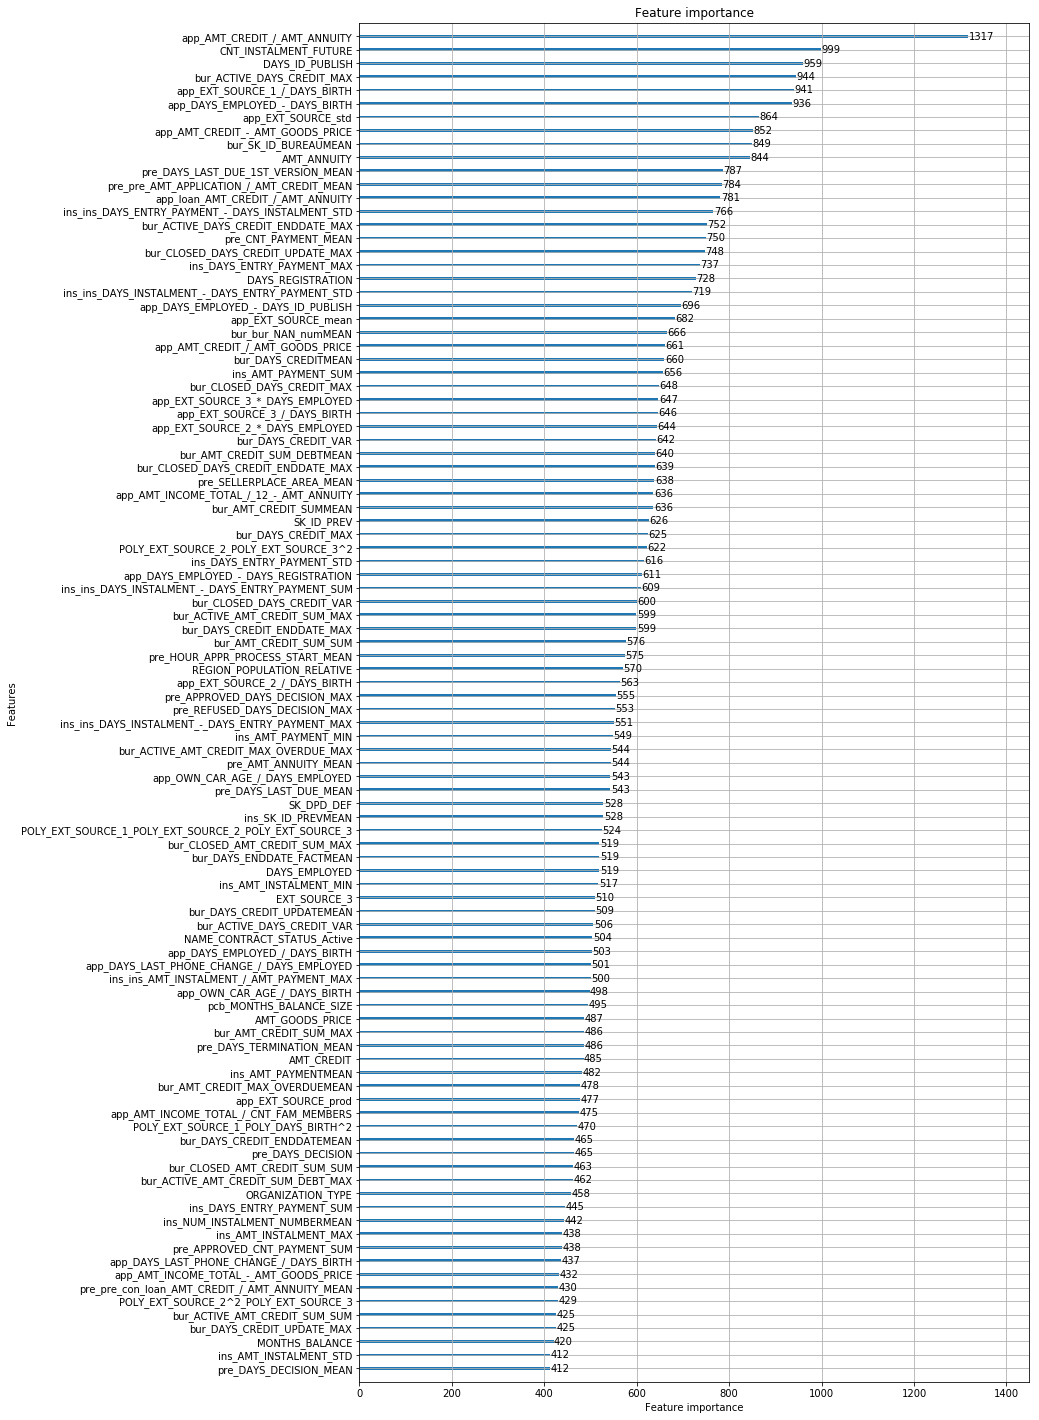

In [23]:
lgb.plot_importance(clf, figsize=(12, 25), max_num_features=100);


### <a id="5.1">5.1 Predict</a>

In [24]:
preds = np.mean(list_preds, axis=0)

#preds = None

    
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("../output/10.csv", index=False)
sub_lgb.head()

SK_ID_CURR    TARGET
0      100001  0.041778
1      100005  0.128262
2      100013  0.017079
3      100028  0.025375
4      100038  0.155522

In [25]:
print('my base lgbm + probause, app domain, poly, data clean, agg feature, category feature')
print(sc_auc_score, ',' ,max_score)

my base lgbm + probause, app domain, poly, data clean, agg feature, category feature
0.7890496924011965 , 0.7907917762495982


In [26]:
print('result: ???')

result: ???
